# General

The spatially-adaptive-combi framework aims at providing a generalized interface for calculating the Combination Technique with spatial adaptive strategies.

Currently this is restricted to the calculation of an integral over a function $f$:

$$\int_{x \in D} f(x) dx$$

where $x$ is an d-dimensional vector and D is the d-dimensional Domain which is defined by the lower bound $a$ and the upper bound $b$. Usually one defines $D=[0,1]^d$ but other rectangular domains are also possible.

# Functions

So let's first look at the pre-defined functions that we can use in the framework. All implemented funcitons can be found in Functions.py and they typically offer the functionality to evaluate the function at a certain point and to return the analytic integral value for a specified domain. Furthermore plotting a function is already available directly in the framework. So let's try one of the functions namely $GenzCornerPeak$.

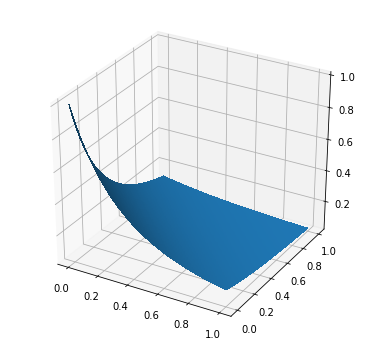

The function value at (0,0.5) is 0.296296296296
The analytical integral value in the Domain [0,1]^d is 0.166666666667


In [1]:
%matplotlib inline
from Function import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
f = GenzCornerPeak(coeffs=coeffs)
f.plot(a, b)
print("The function value at (0,0.5) is", f.eval((0,0.5)))
print("The analytical integral value in the Domain [0,1]^d is", 
      f.getAnalyticSolutionIntegral(np.zeros(dim), np.ones(dim)))

There are many more functions pre-defined in Function.py. It is also possible to compose functions and create combined and scaled functions.

# Standard Combination Technique

So now let's first look at the Truncated Combination Technique with a predefined maximum und minimum level and let's integrate the GenzCornerPeak from before with it. For this purpose we also have to select a grid on which we want to perform the combi. We will use here the equidistant Trapezoidal grid that applies the trapezoidal rule to integrate the function. There are more grids available such as Leja, Clenshaw-Curtis, Gauss-Legendre...

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution 0.166628181093
Analytic Solution 0.166666666667
Difference 3.84855732446e-05


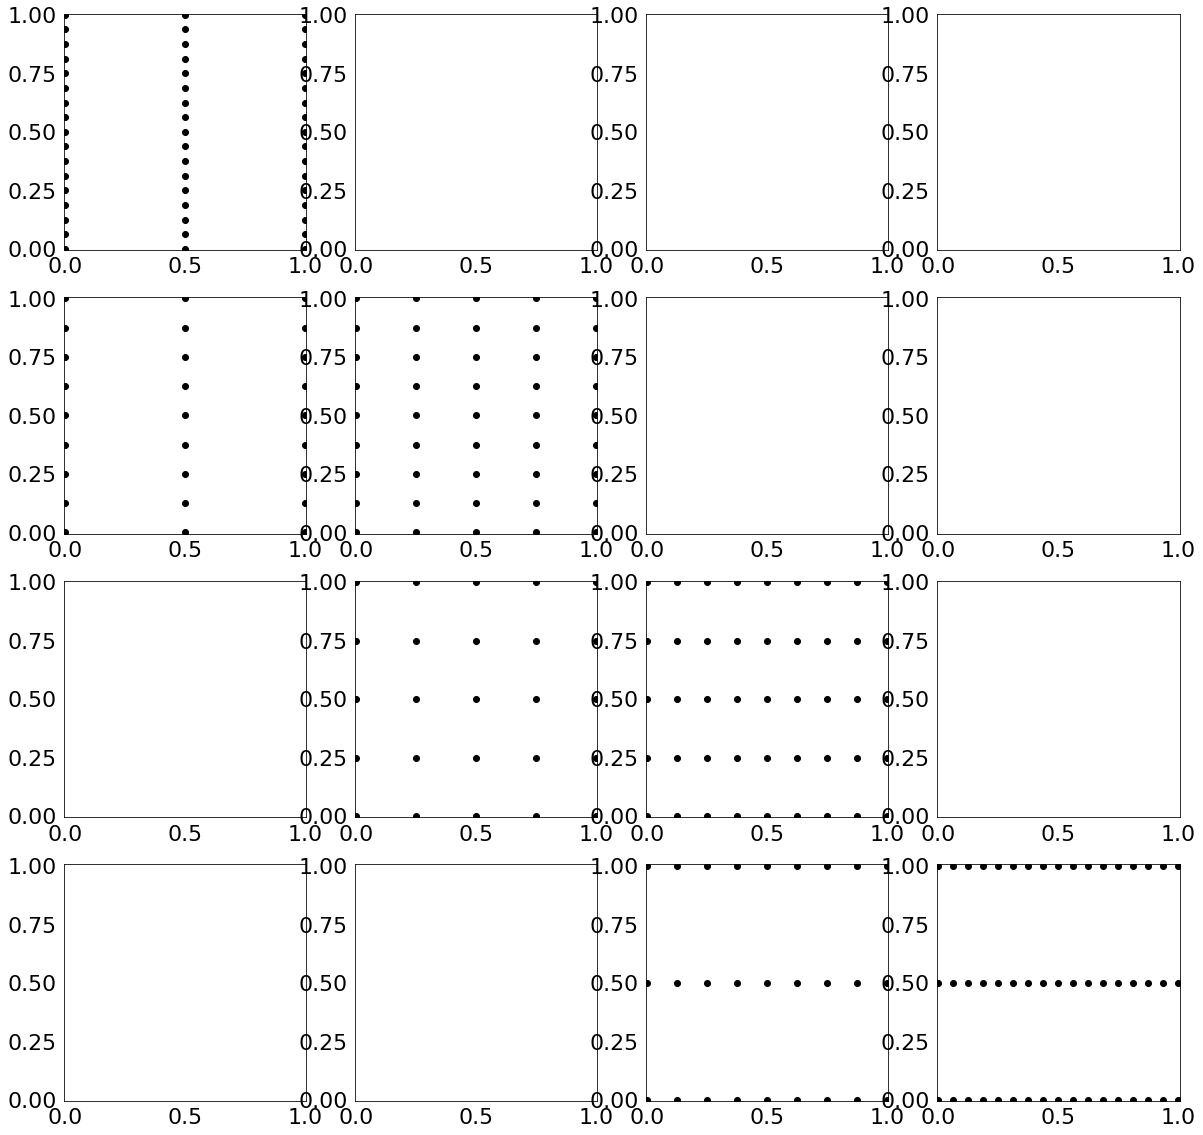

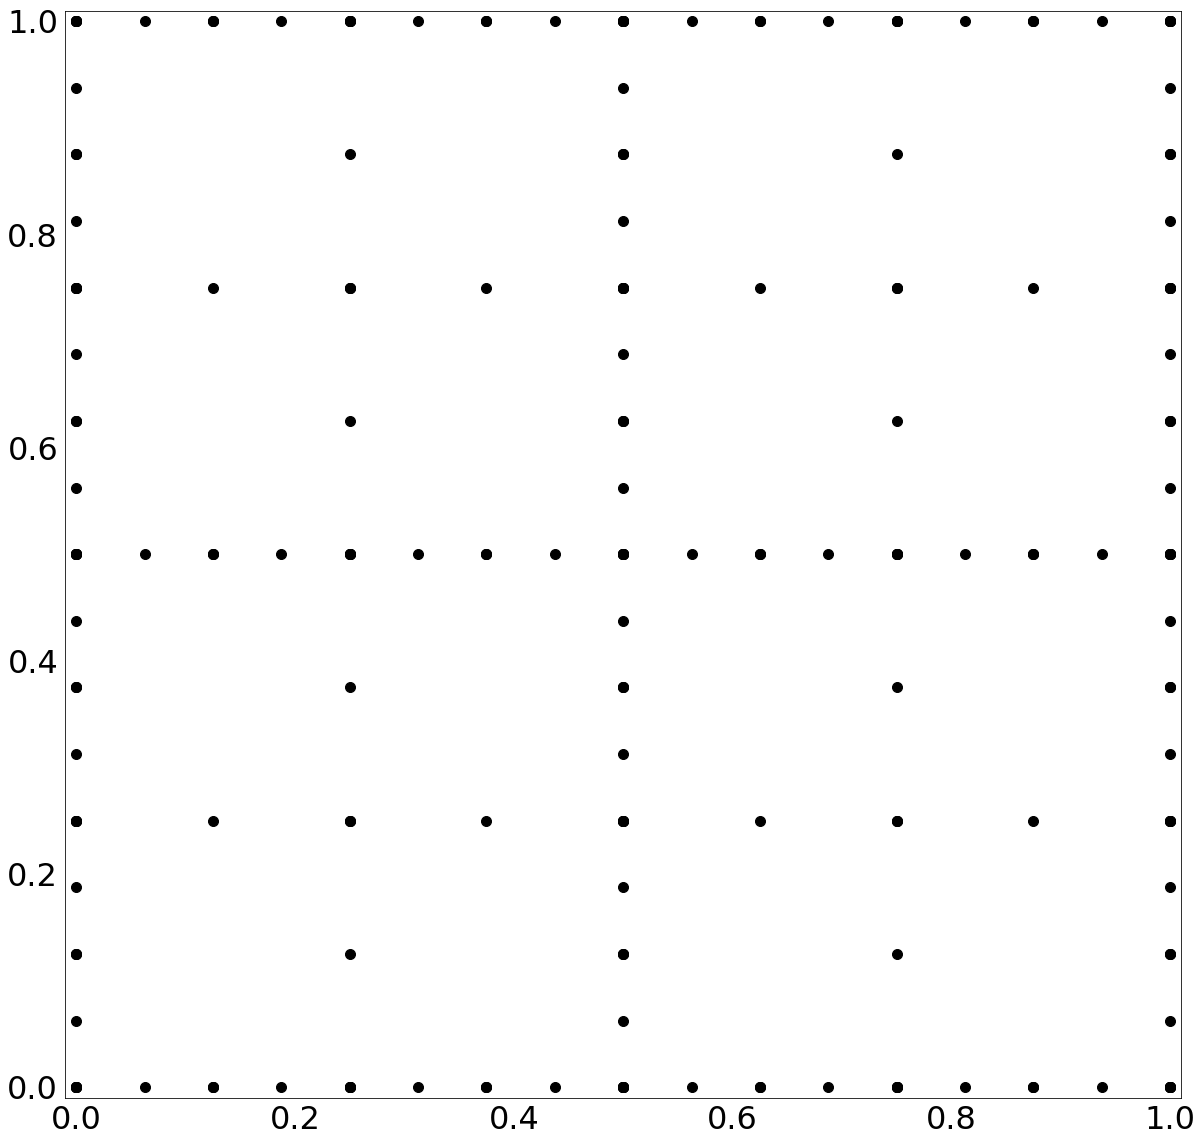

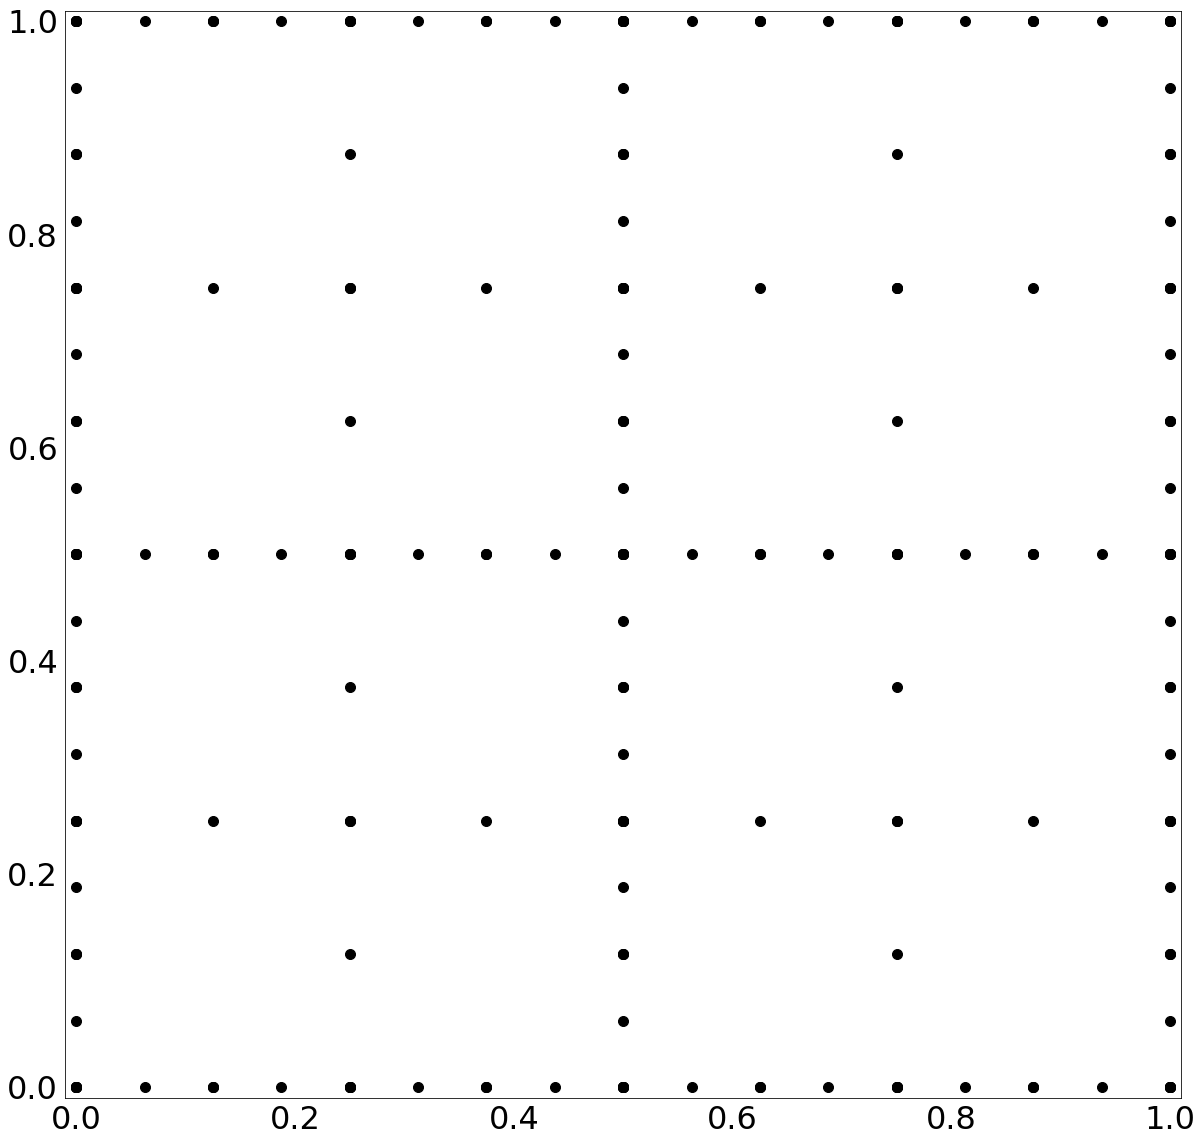

In [2]:
%matplotlib inline
from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, dim=dim)
f = GenzCornerPeak(coeffs=coeffs)
combiObject = StandardCombi(a, b, grid)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f, reference_solution=f.getAnalyticSolutionIntegral(a,b))
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()


The output shows for the combination Scheme that is used which defines the level vectors and the coefficients of the grids. Then the solution of the combination integral is listed followed by the analytic solution and the absolute error. Finally the graphical plot of the combination scheme and the resulting sparse grid is shown.

# Dimension Adaptive Combination Technique

An often used variant of the Standard Combination Technique is the dimension adaptive Combination Technique. An implementation which applies this method is now available within the framework. It is called similarly to the Standard Combination Technique but now we also have to define a tolerance to indicate how long we want to adapt the scheme. The adaptation stops once the relative error of the integration falls below this tolerance threshold.

[(1, 4), (2, 3), (3, 2), (4, 1)]
[(1, 3), (2, 2), (3, 1)]
0 [3, 2] 1
1 [2, 2] -1
2 [3, 1] -1
3 [1, 3] -1
4 [2, 3] 1
5 [4, 1] 1
6 [1, 4] 1
Current combi integral: 0.166628181093
Currentrelative error: 0.000230913439468
Current error: 0.000230913439468
Refining ((4, 1), 1) True
Current combi integral: 0.166384719417
Currentrelative error: 0.00169168349915
Current error: 0.00169168349915
Refining ((1, 4), 1) True
Current combi integral: 0.16614125774
Currentrelative error: 0.00315245355884
Current error: 0.00315245355884
Refining ((1, 5), 1) True
Current combi integral: 0.166080327471
Currentrelative error: 0.00351803517475
Current error: 0.00351803517475
Refining ((5, 1), 1) True
Current combi integral: 0.166019397202
Currentrelative error: 0.00388361679066
Current error: 0.00388361679066
Refining ((2, 3), 1) True
Current combi integral: 0.166168920548
Currentrelative error: 0.0029864767114
Current error: 0.0029864767114
Refining ((3, 2), 1) True
Current combi integral: 0.16647827546
Cur

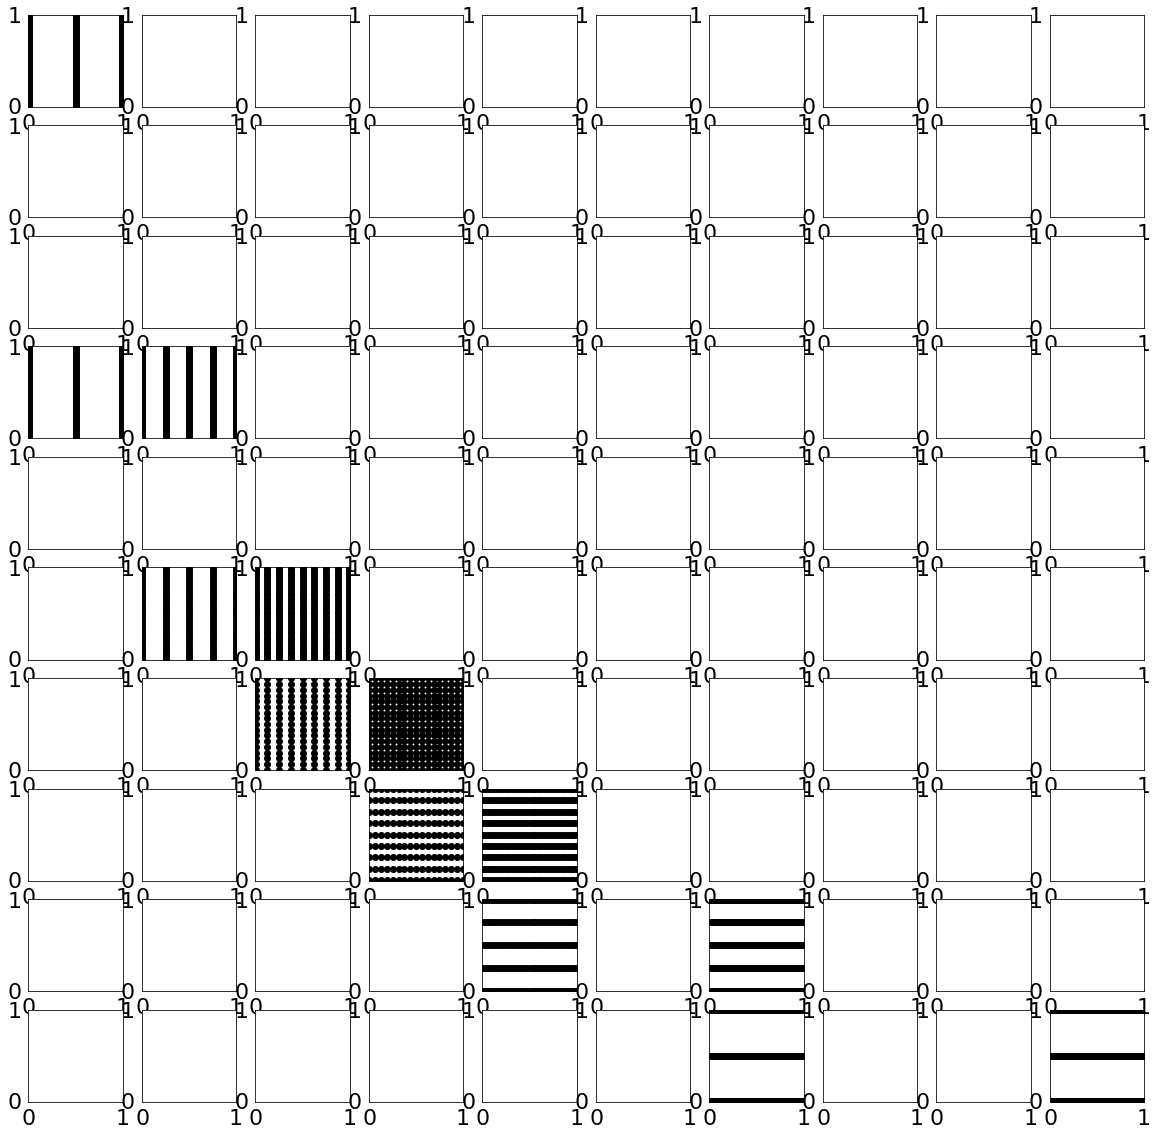

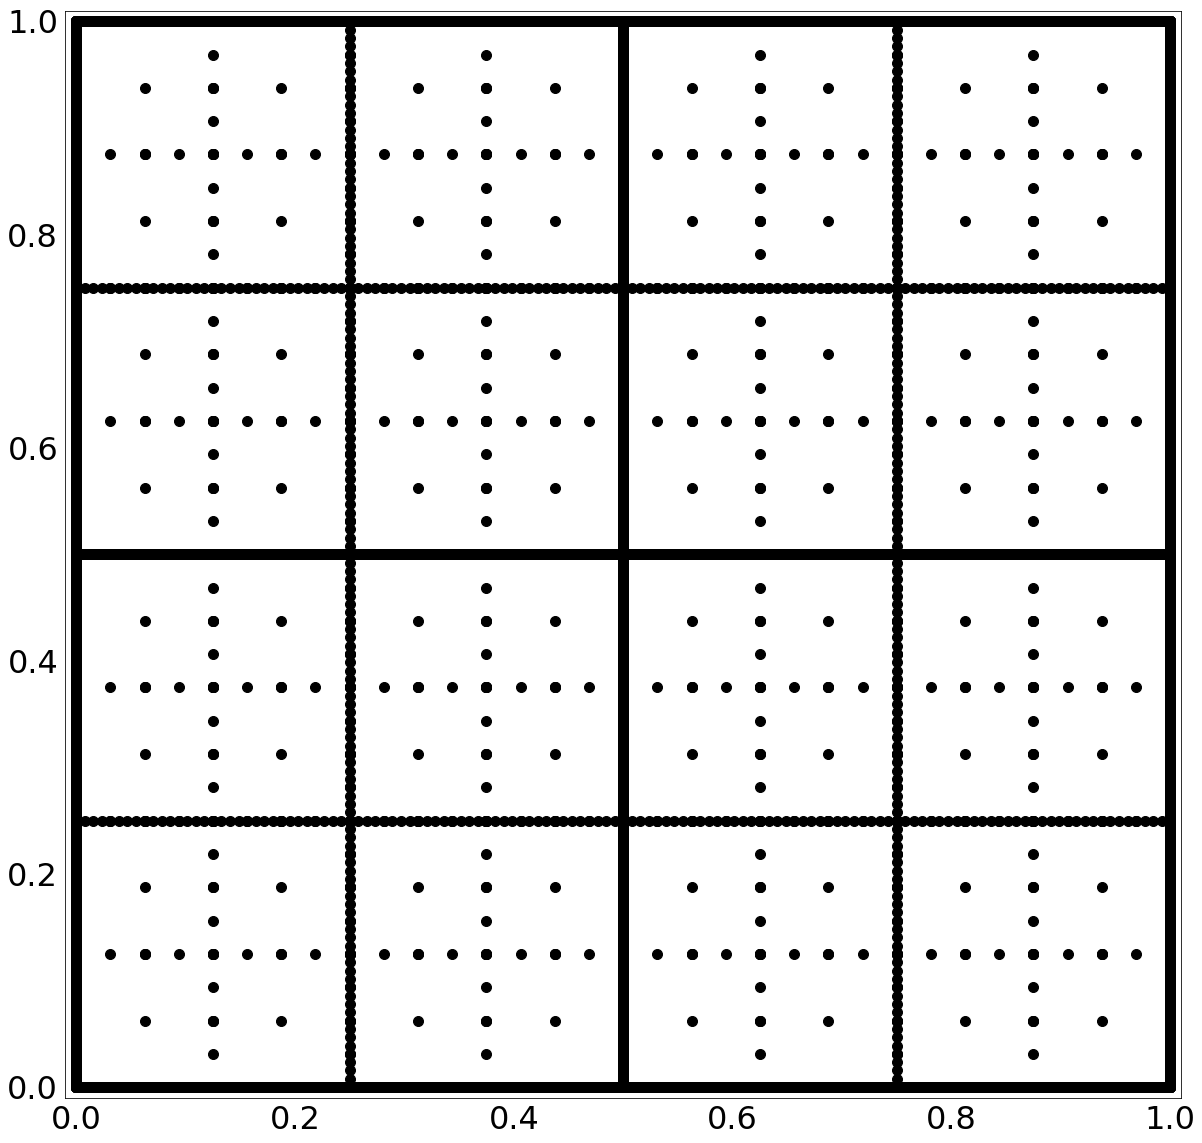

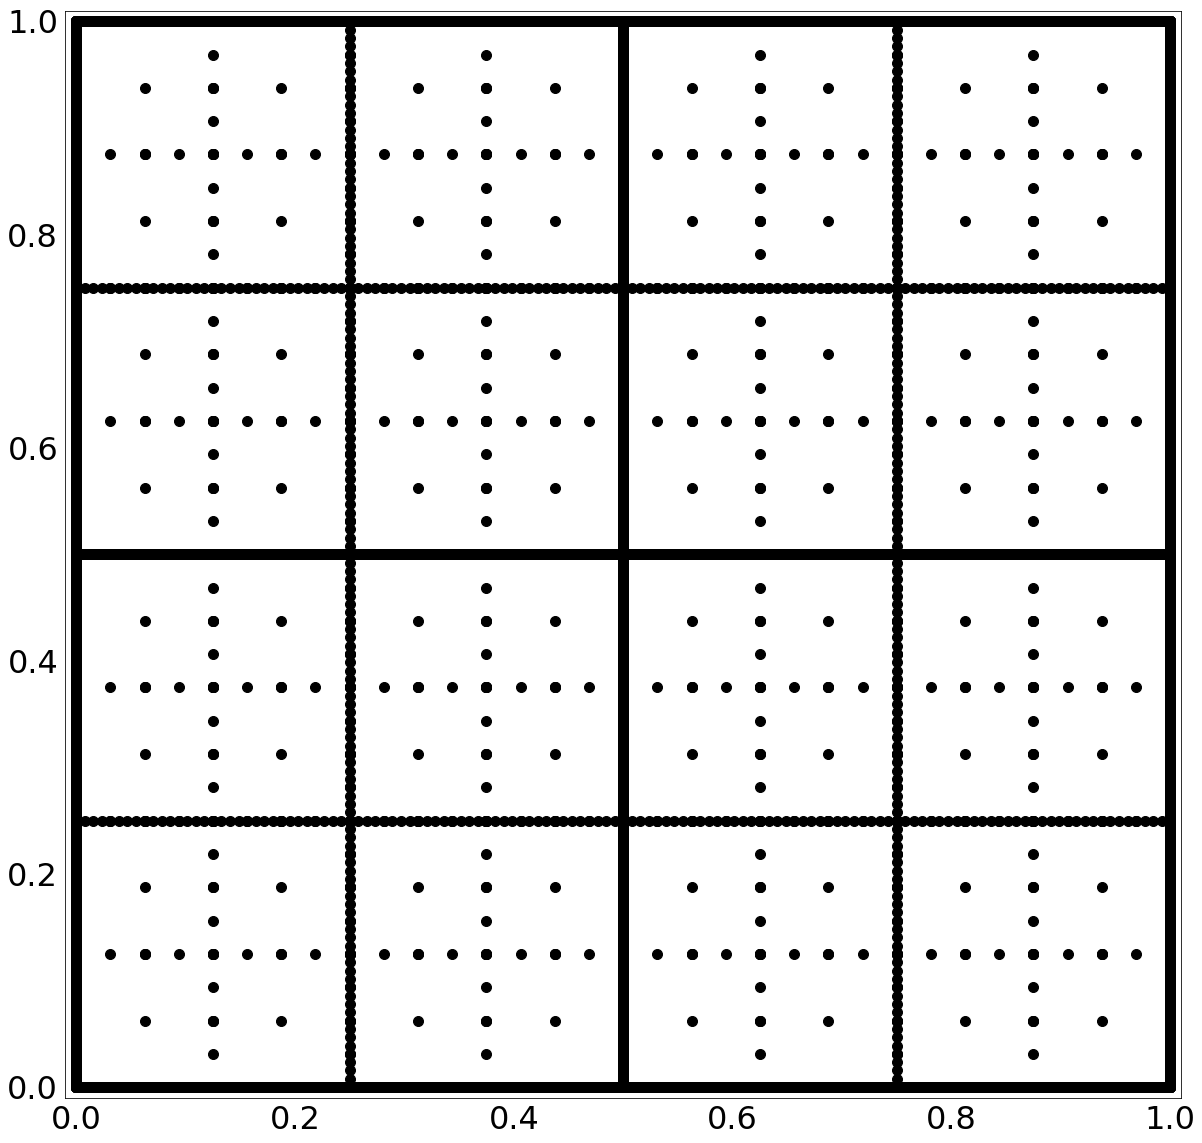

In [3]:
%matplotlib inline
from Function import *
from DimAdaptiveCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b, dim=dim)
f = GenzCornerPeak(coeffs=coeffs)
combiObject = DimAdaptiveCombi(a, b, grid)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f, 10**-4, reference_solution=f.getAnalyticSolutionIntegral(a,b))
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()

# SpatiallyAdaptiveCombi

Now we come to the core element of this framework: The spatially adaptive Combination Technique. Here several techniques are implemented and can be tested for all test functions. After configuring the grid, the function, and the dimension we need to create the object for the respective strategy (currently we have the $SpatiallyAdaptiveFixedScheme$, the $SpatiallyAdaptiveExtendScheme$, the $SpatiallyAdaptiveCellScheme$ and the currently in construction $SpatiallyAdaptiveSingleDimensions$). The different Schemes have different configuration parameters one can choose. For further information have a look in the respective class file. The calling conventions for the spatially adaptive combi slightly differe from those of the standard combis and also include and $errorOperator$ which controls the error estimations and we also have the oportunity to plot the sparse grid and the combination scheme after each refinement step by setting $do\_plot$ to $true$. In the following we will demonstrate the refinement for to schemes including the respective plots.

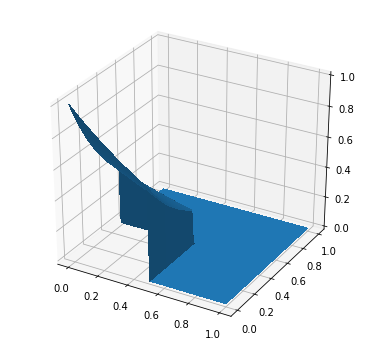

Reference solution: 0.124360029632
0 [2, 2] 1.0
split dimension 0
split dimension 0
split dimension 1
split dimension 1
max surplus error: 0.0446515311801 total surplus error: 0.0884395171333
combiintegral: 0.0884395171333
Current error: 0.288842907203
Finished refinement
Refinement Graph:


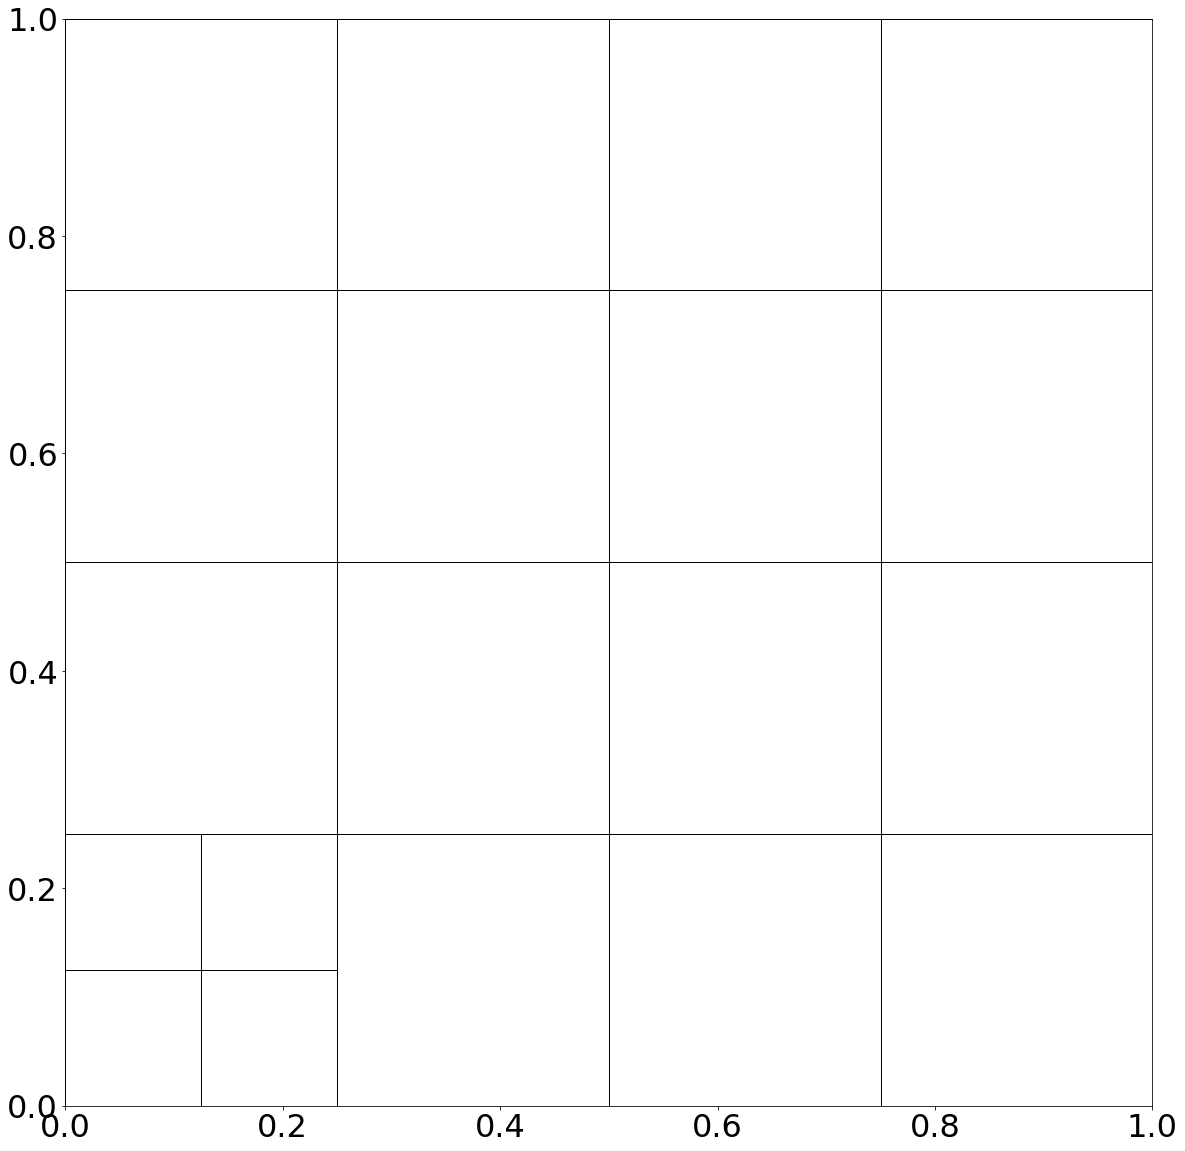

Combi Scheme:


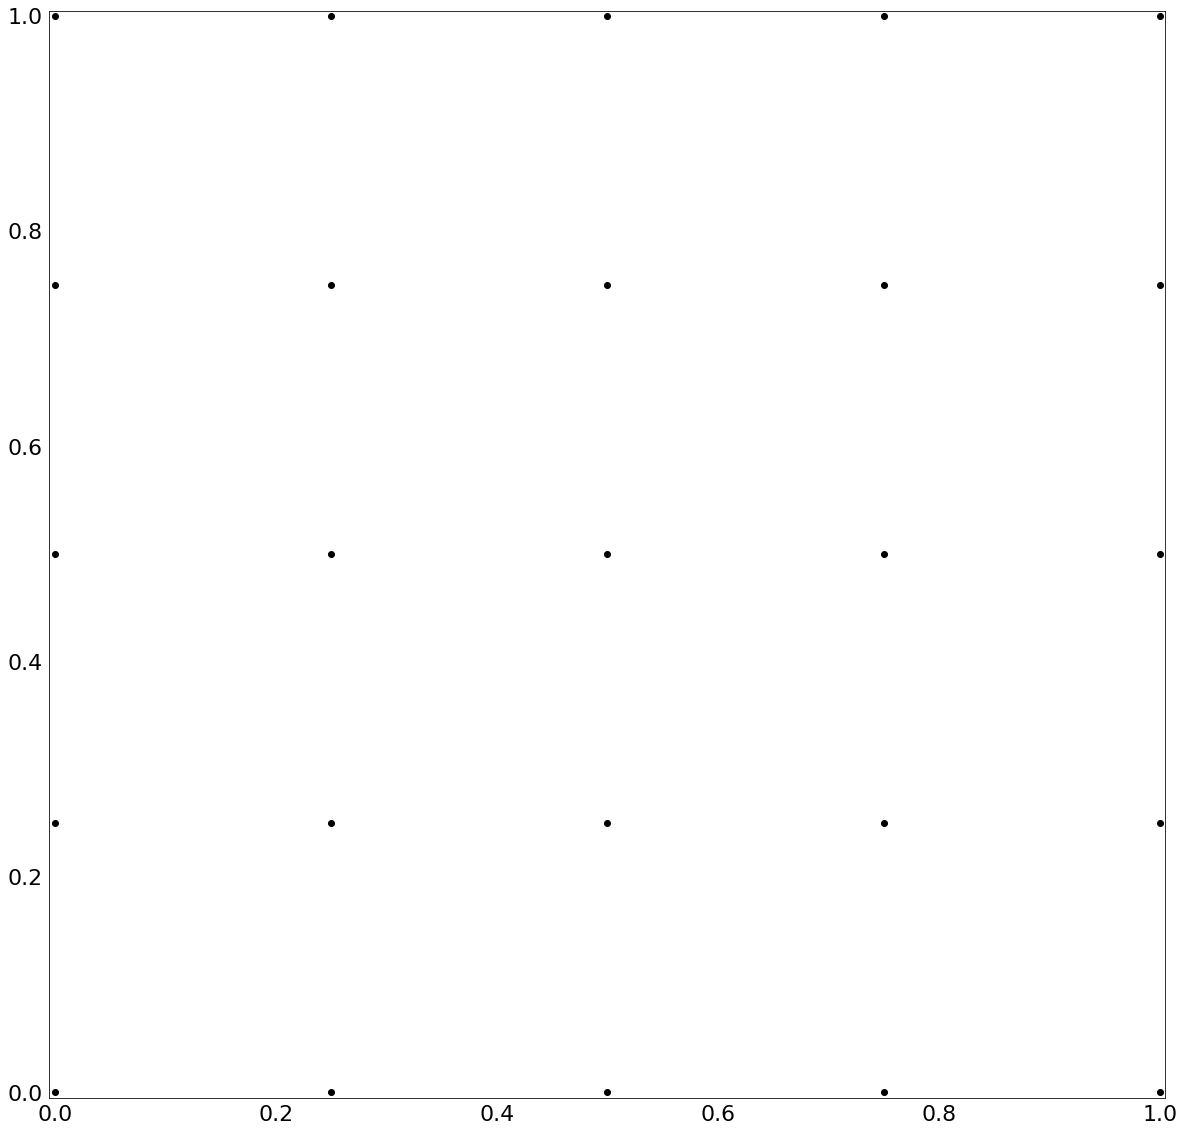

Resulting Sparse Grid:


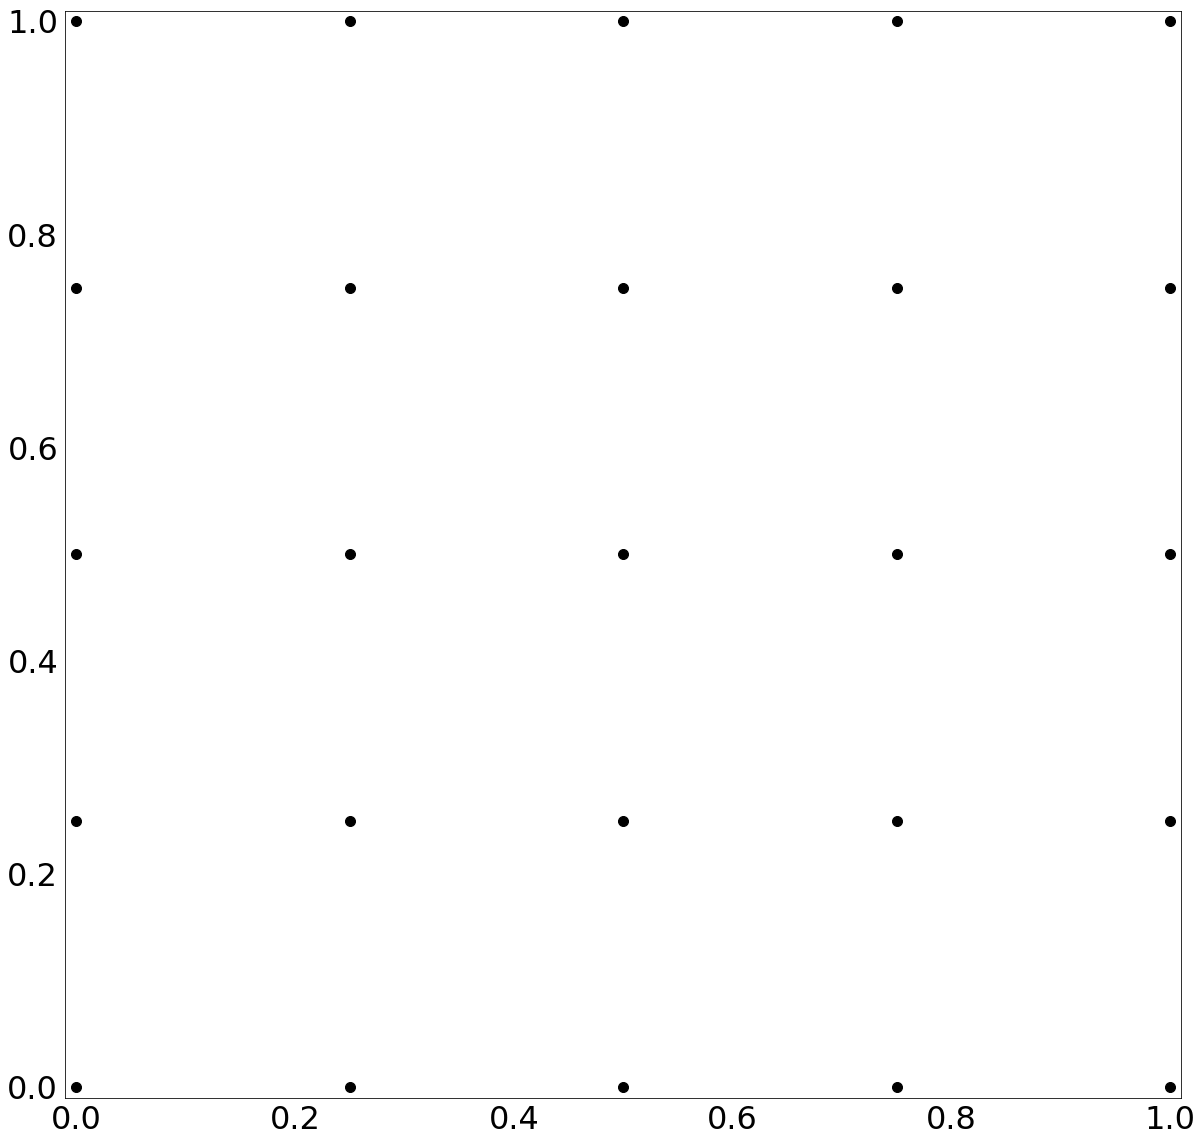

max surplus error: 0.0195494896221 total surplus error: 0.0446412394163
combiintegral: 0.0875862636702
Current error: 0.295704062396
Finished refinement
Refinement Graph:


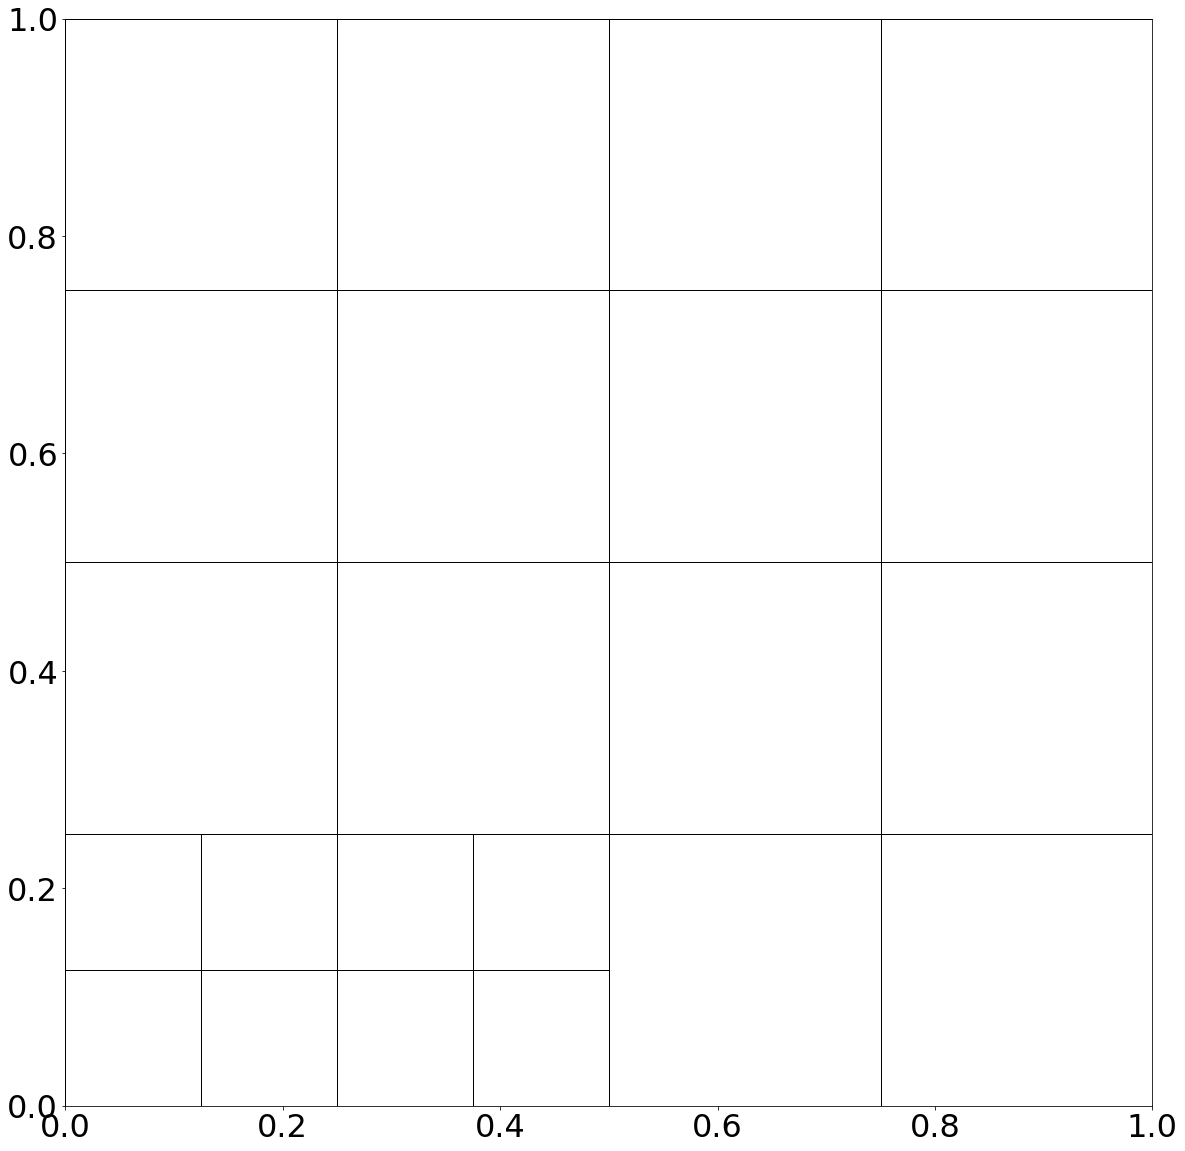

Combi Scheme:


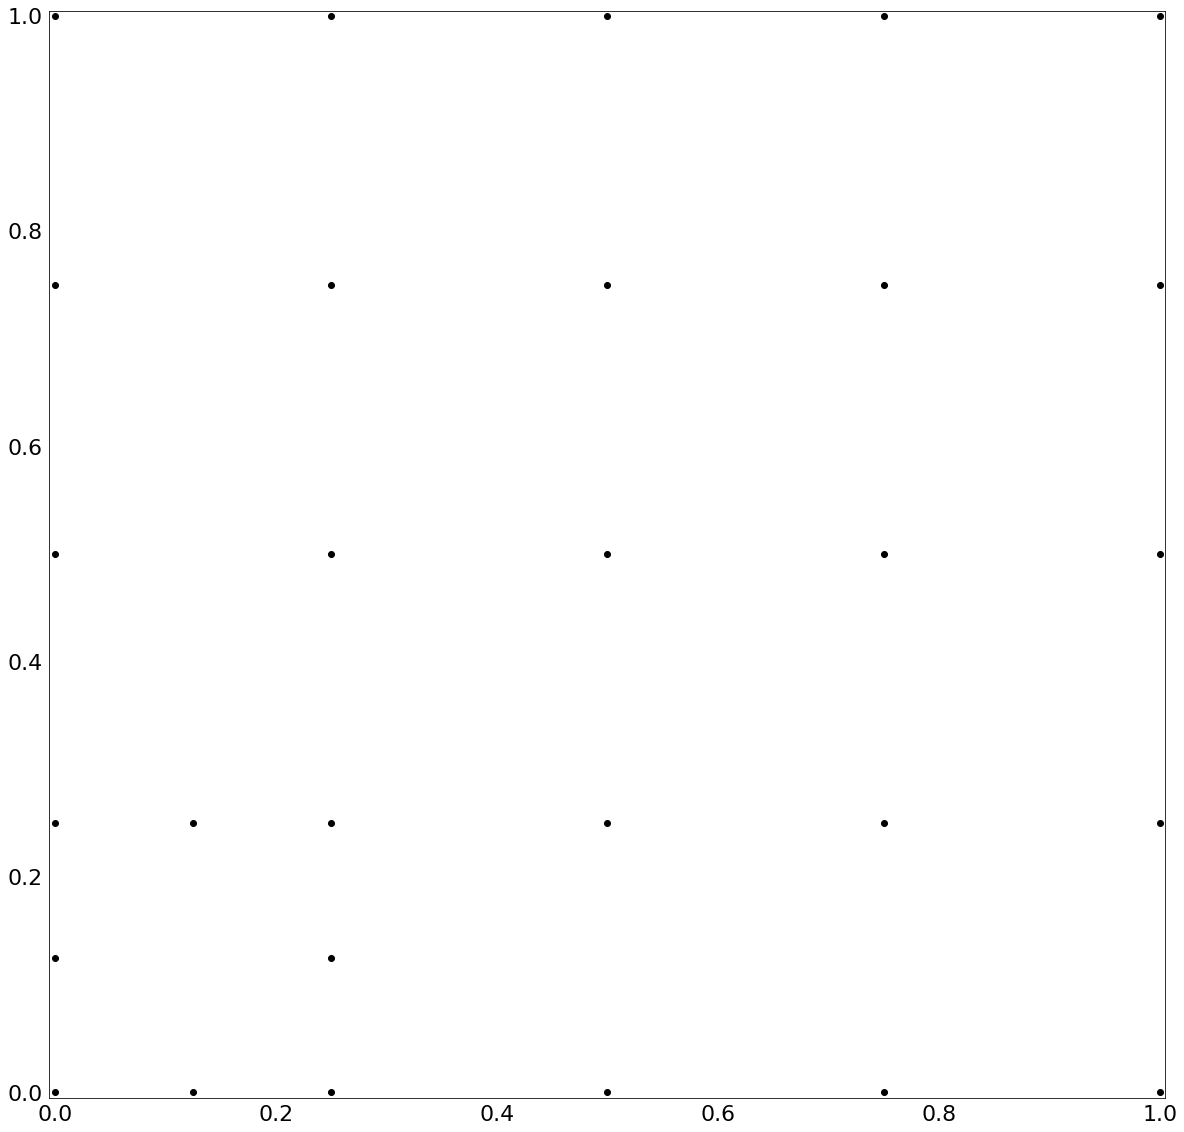

Resulting Sparse Grid:


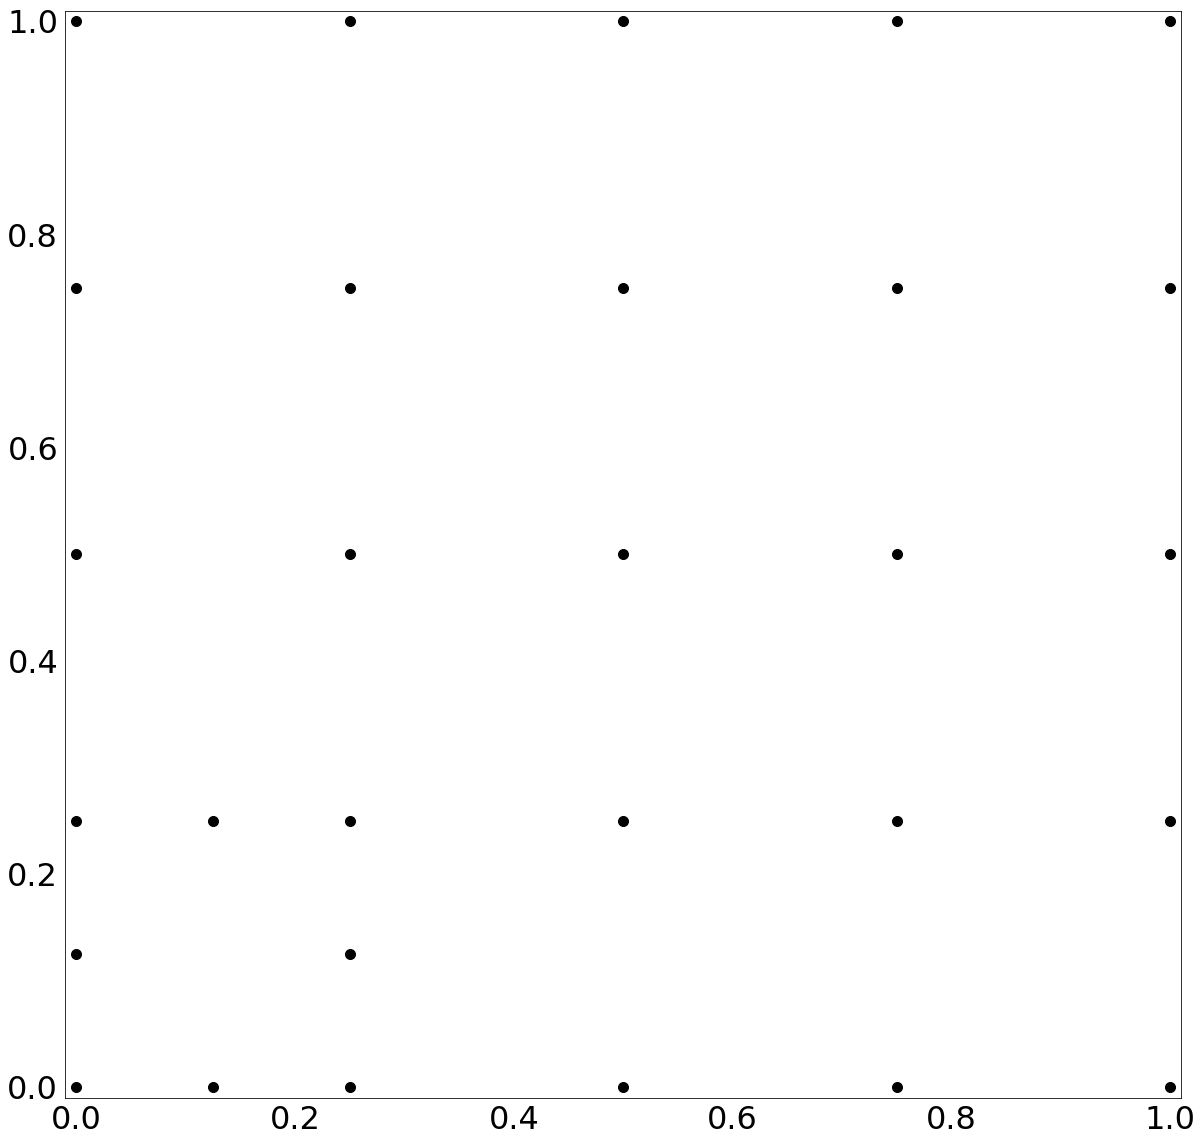

max surplus error: 0.0168577689446 total surplus error: 0.0328670722748
combiintegral: 0.0947661796448
Current error: 0.237969145512
Finished refinement
Refinement Graph:


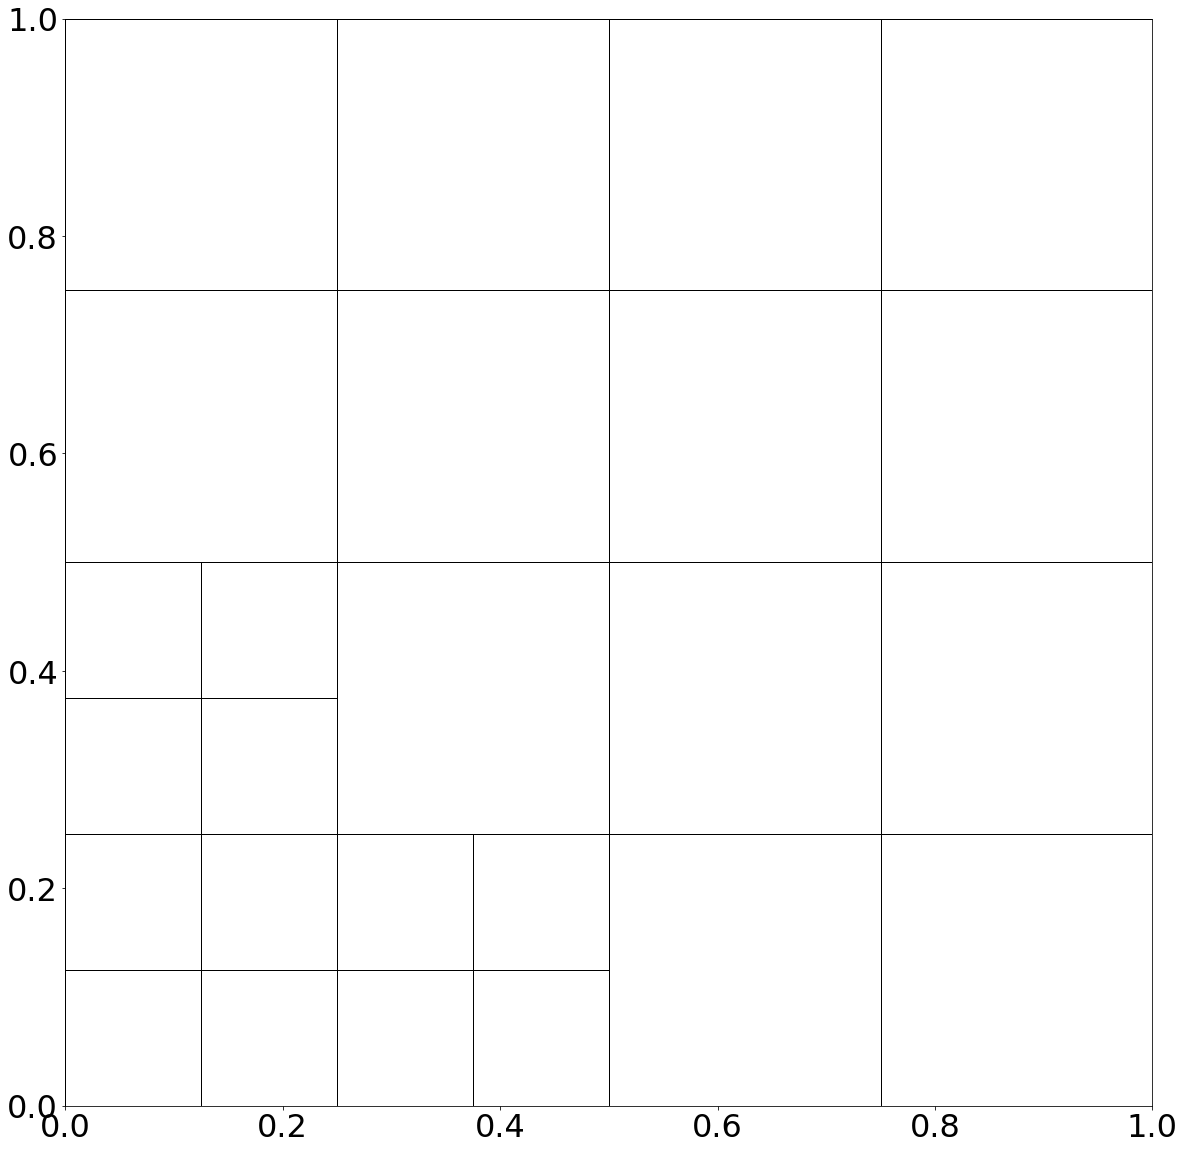

Combi Scheme:


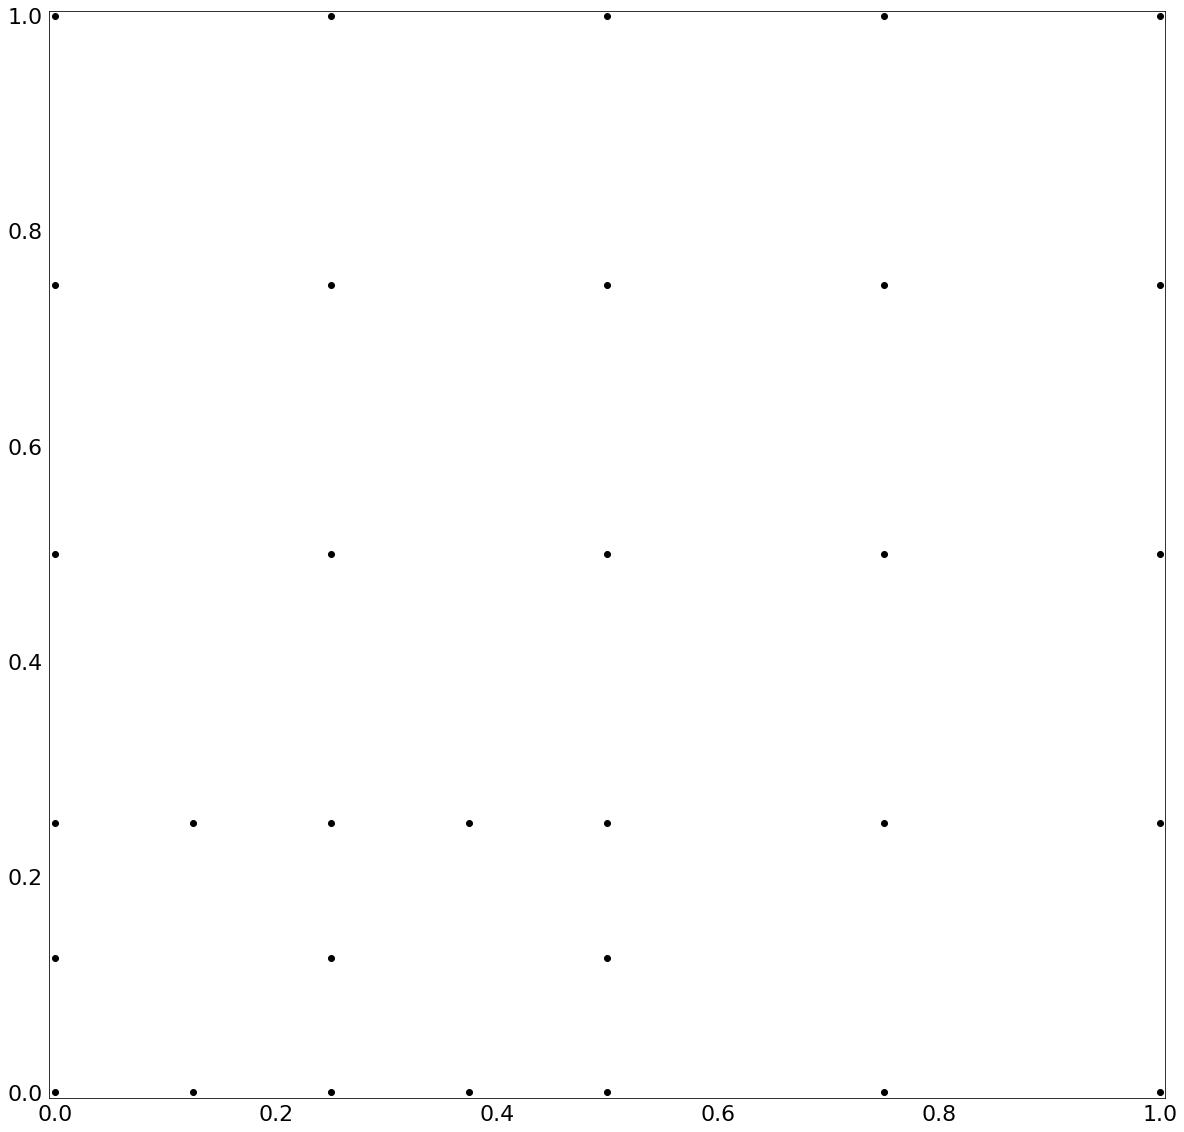

Resulting Sparse Grid:


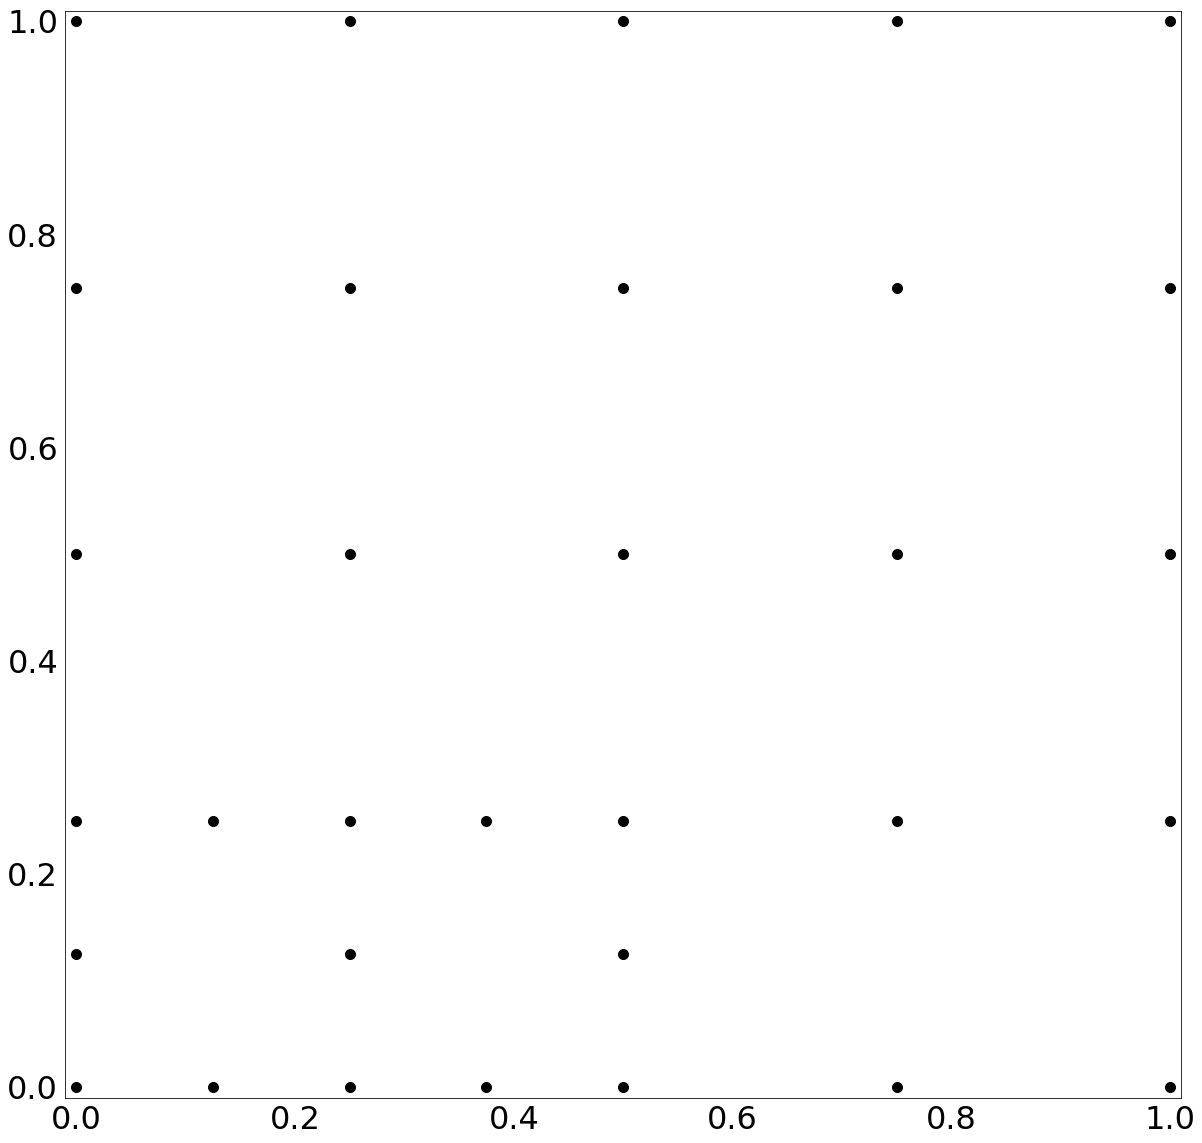

max surplus error: 0.00738072738658 total surplus error: 0.0207746871645
combiintegral: 0.0994007141757
Current error: 0.200702070676
Finished refinement
Refinement Graph:


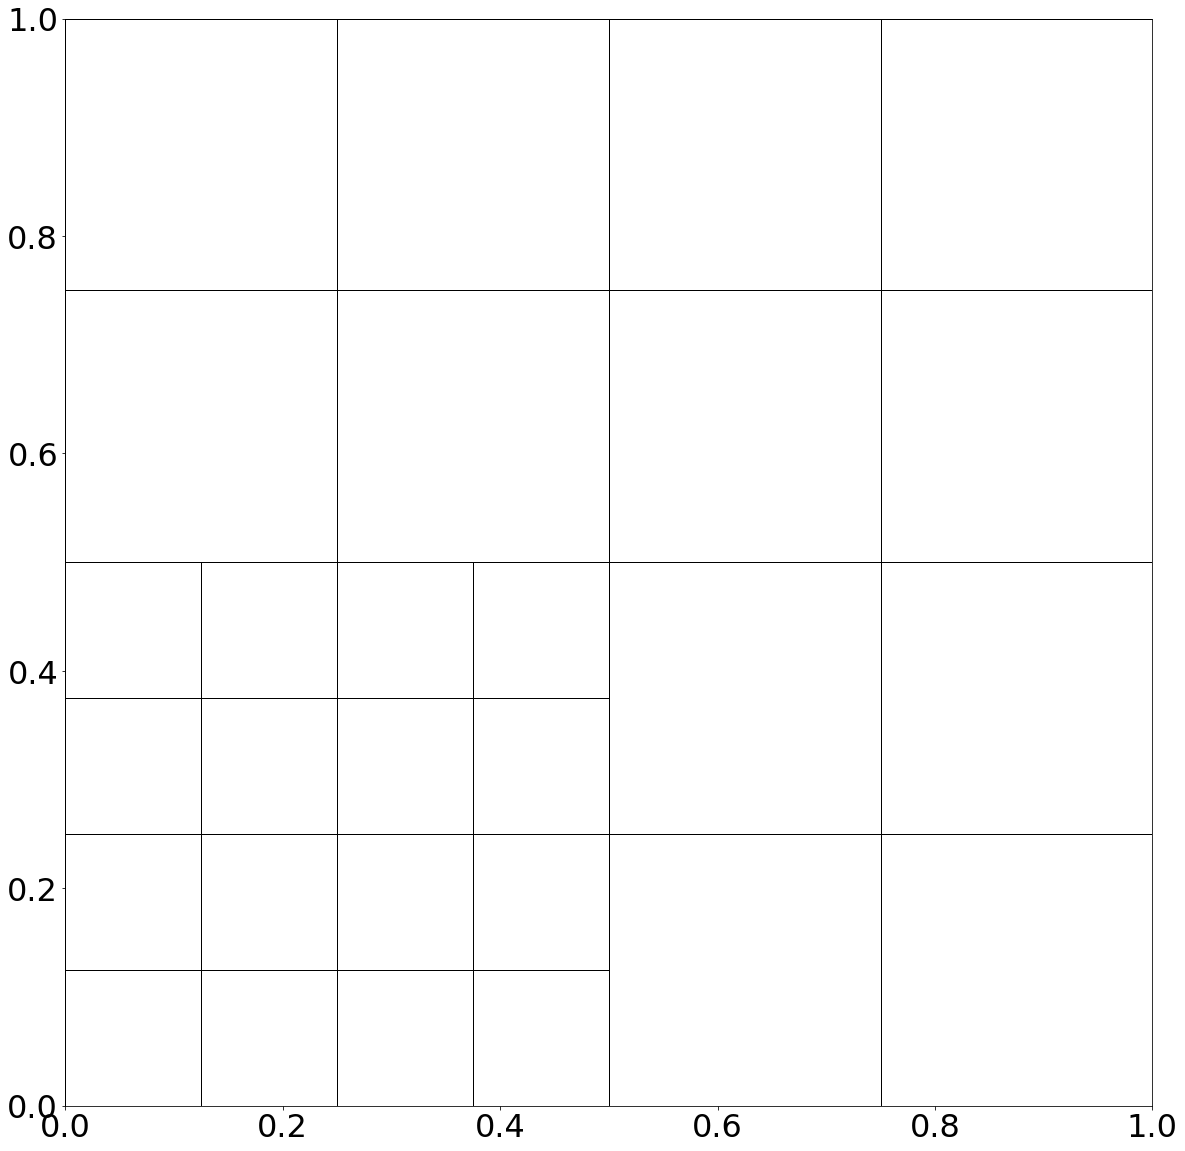

Combi Scheme:


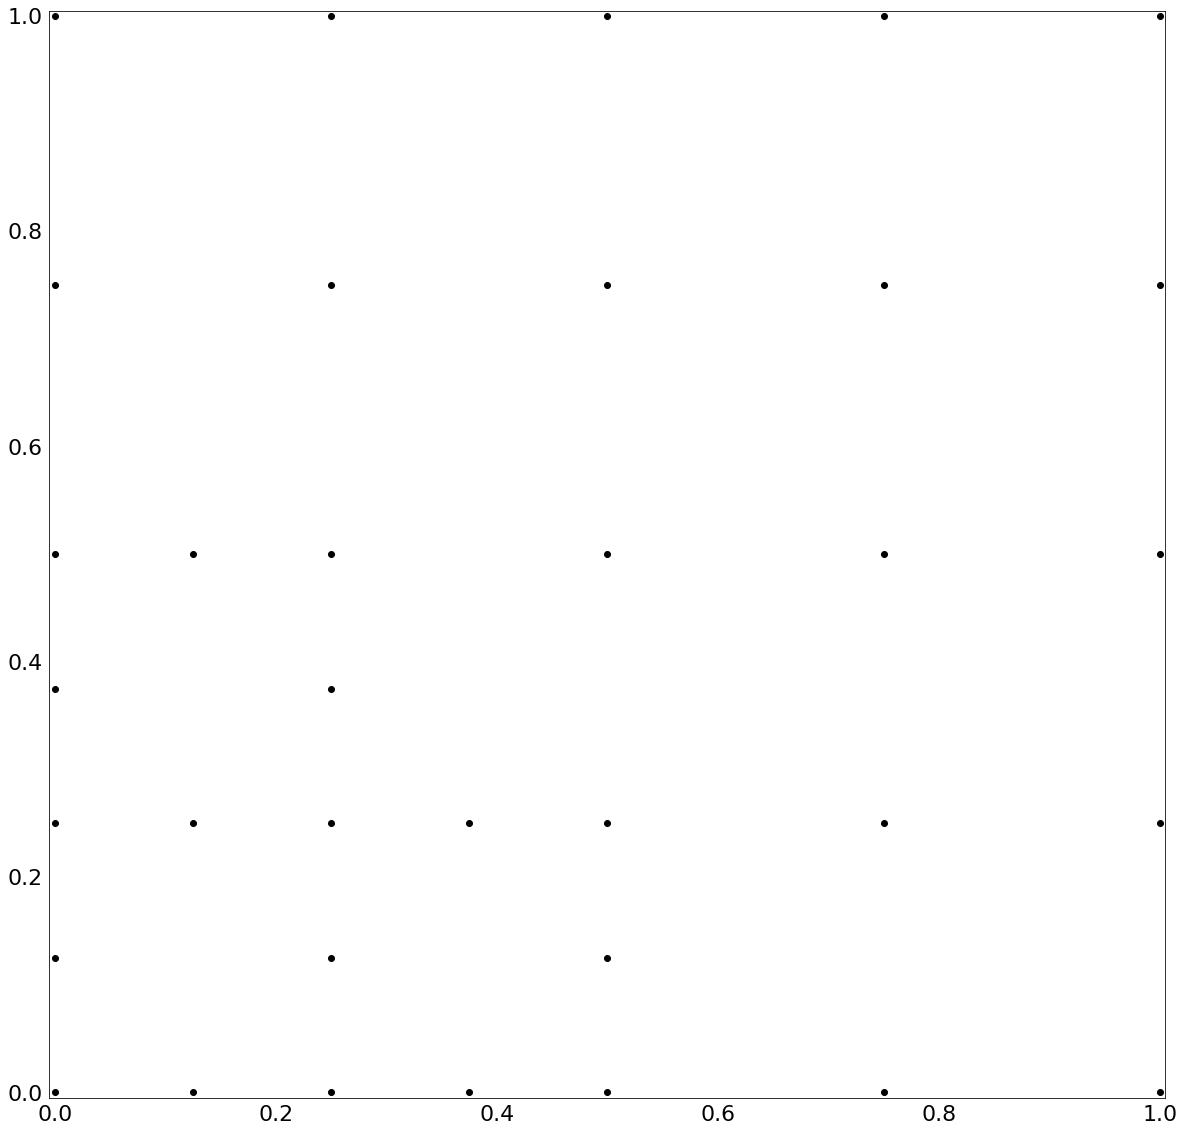

Resulting Sparse Grid:


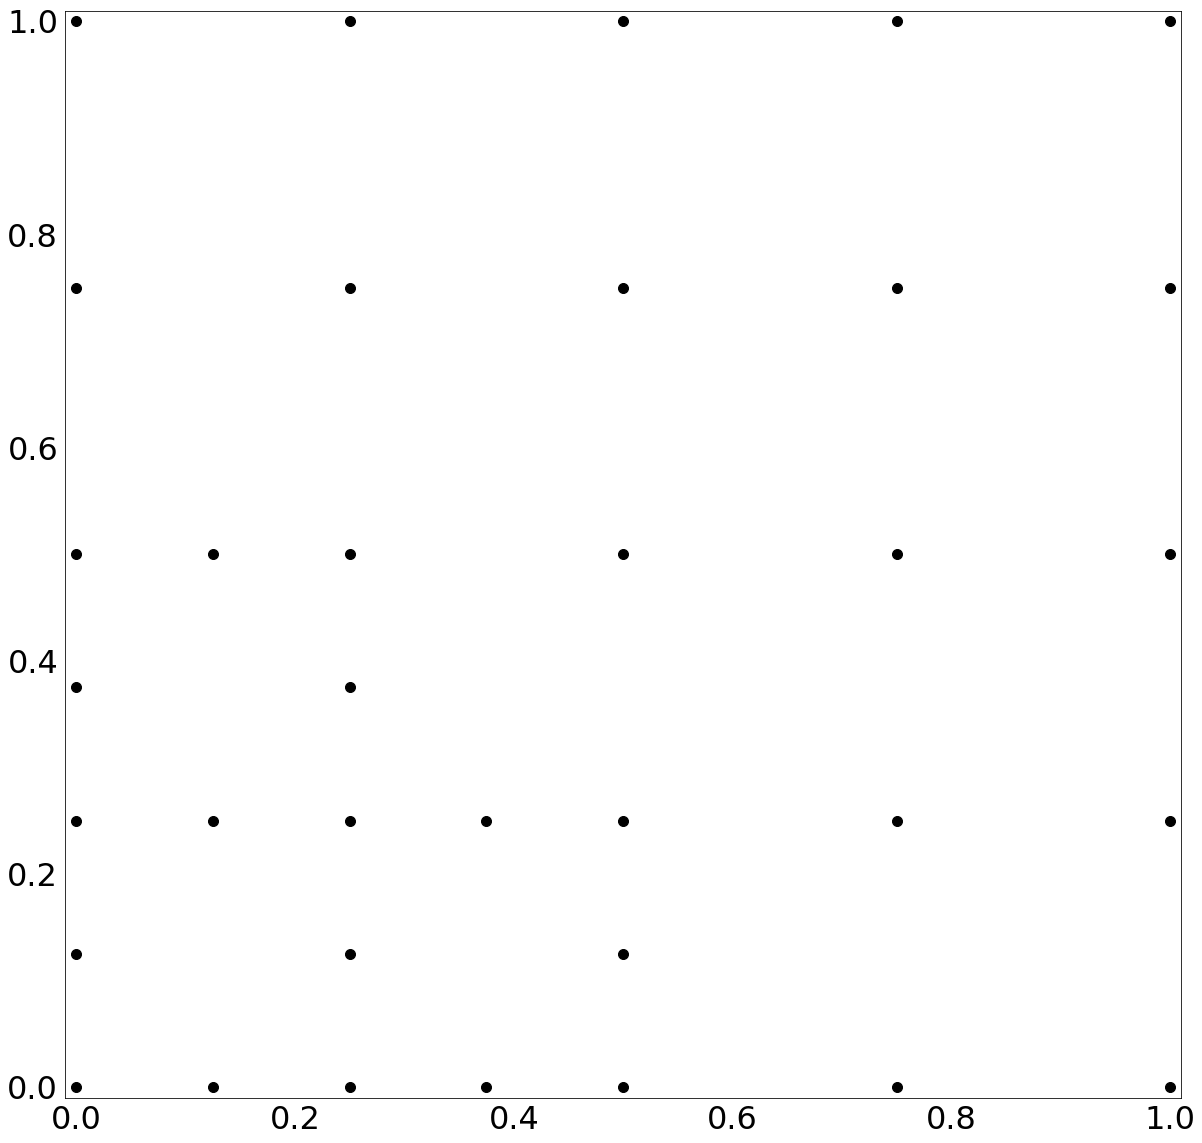

max surplus error: 0.00373880961378 total surplus error: 0.0182748177171
combiintegral: 0.104281572115
Current error: 0.161454267715
Finished refinement
Refinement Graph:


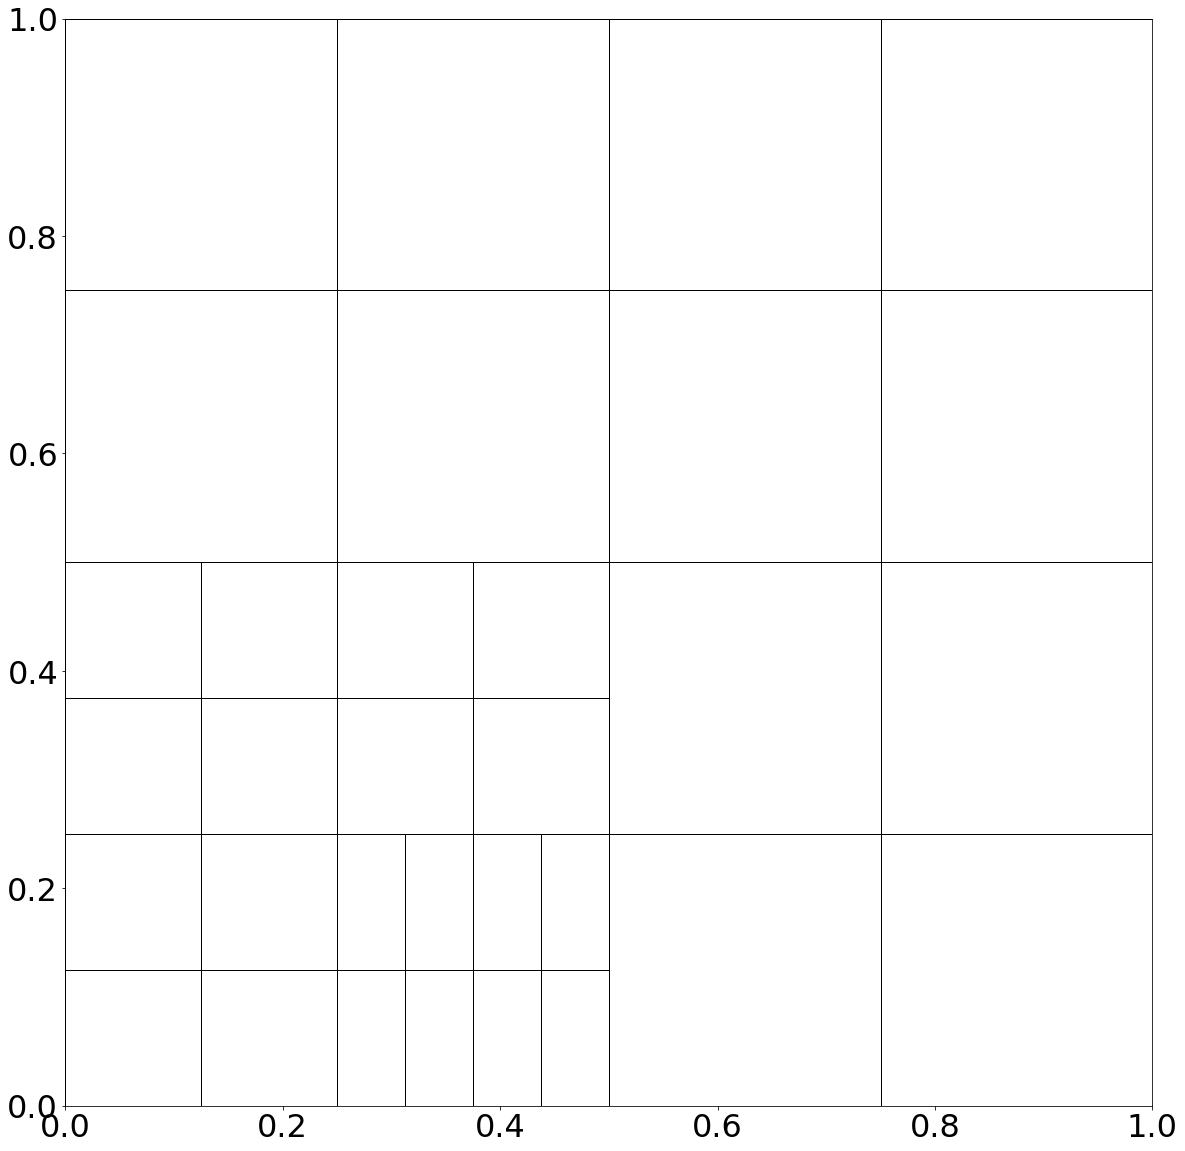

Combi Scheme:


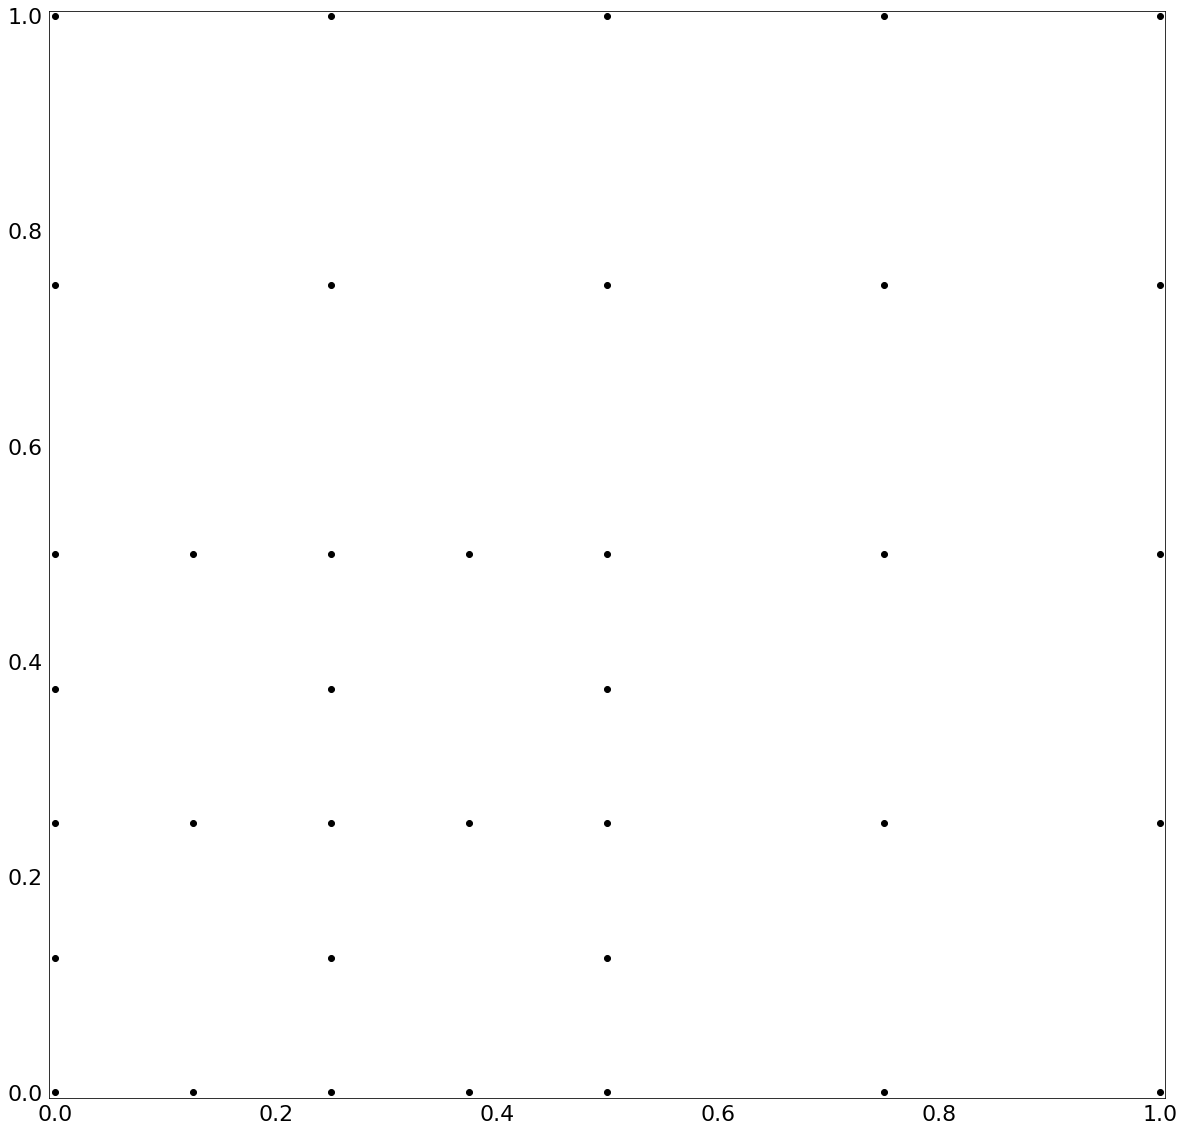

Resulting Sparse Grid:


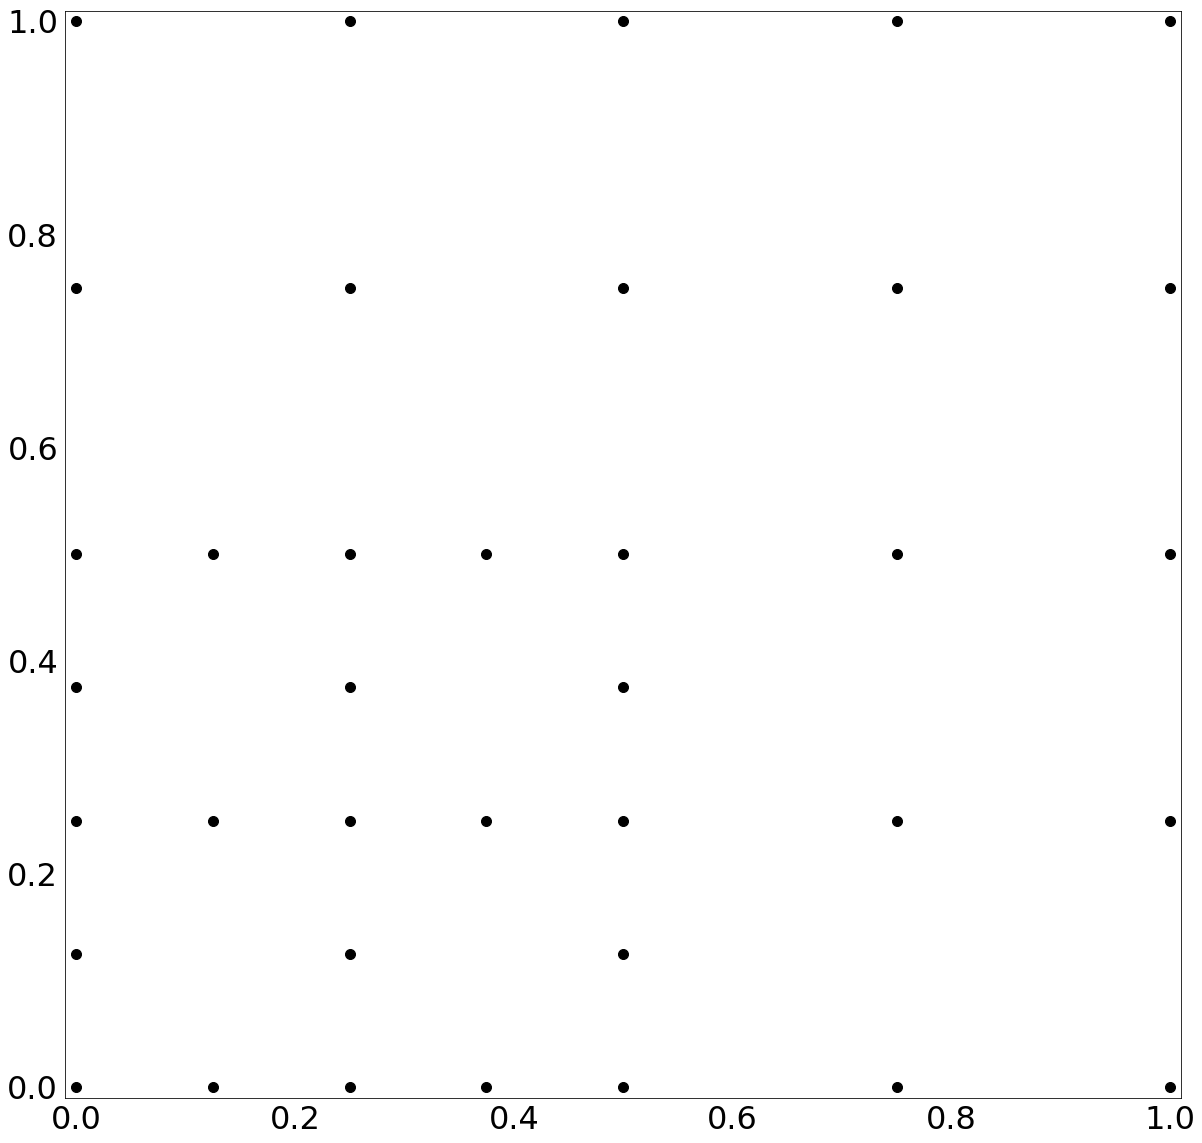

max surplus error: 0.00234997959129 total surplus error: 0.0146055960051
combiintegral: 0.108054088722
Current error: 0.131118824578
Finished refinement
Refinement Graph:


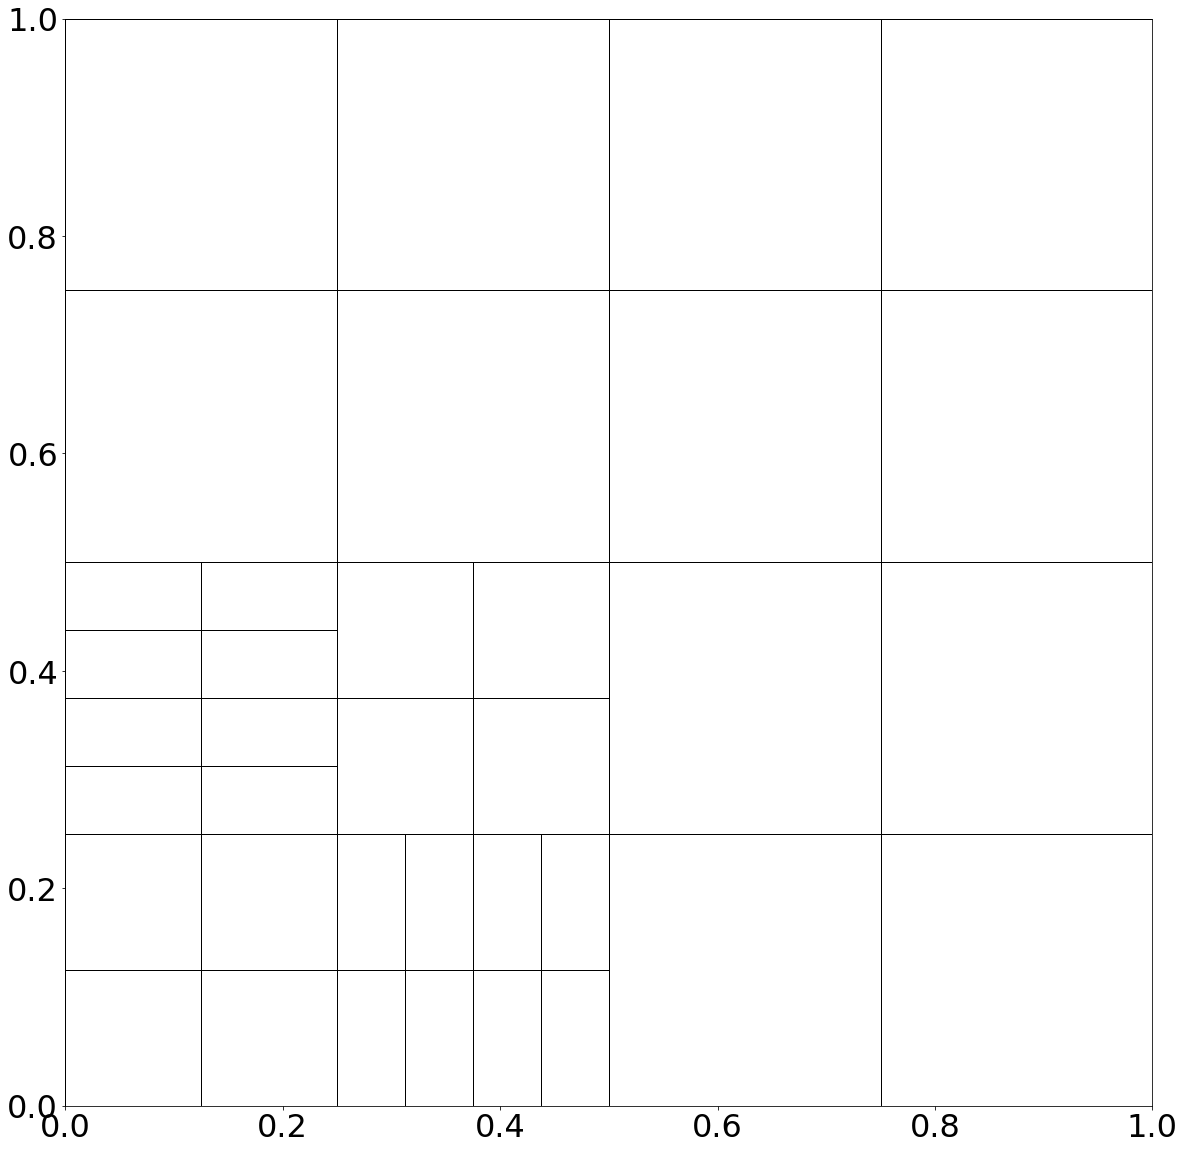

Combi Scheme:


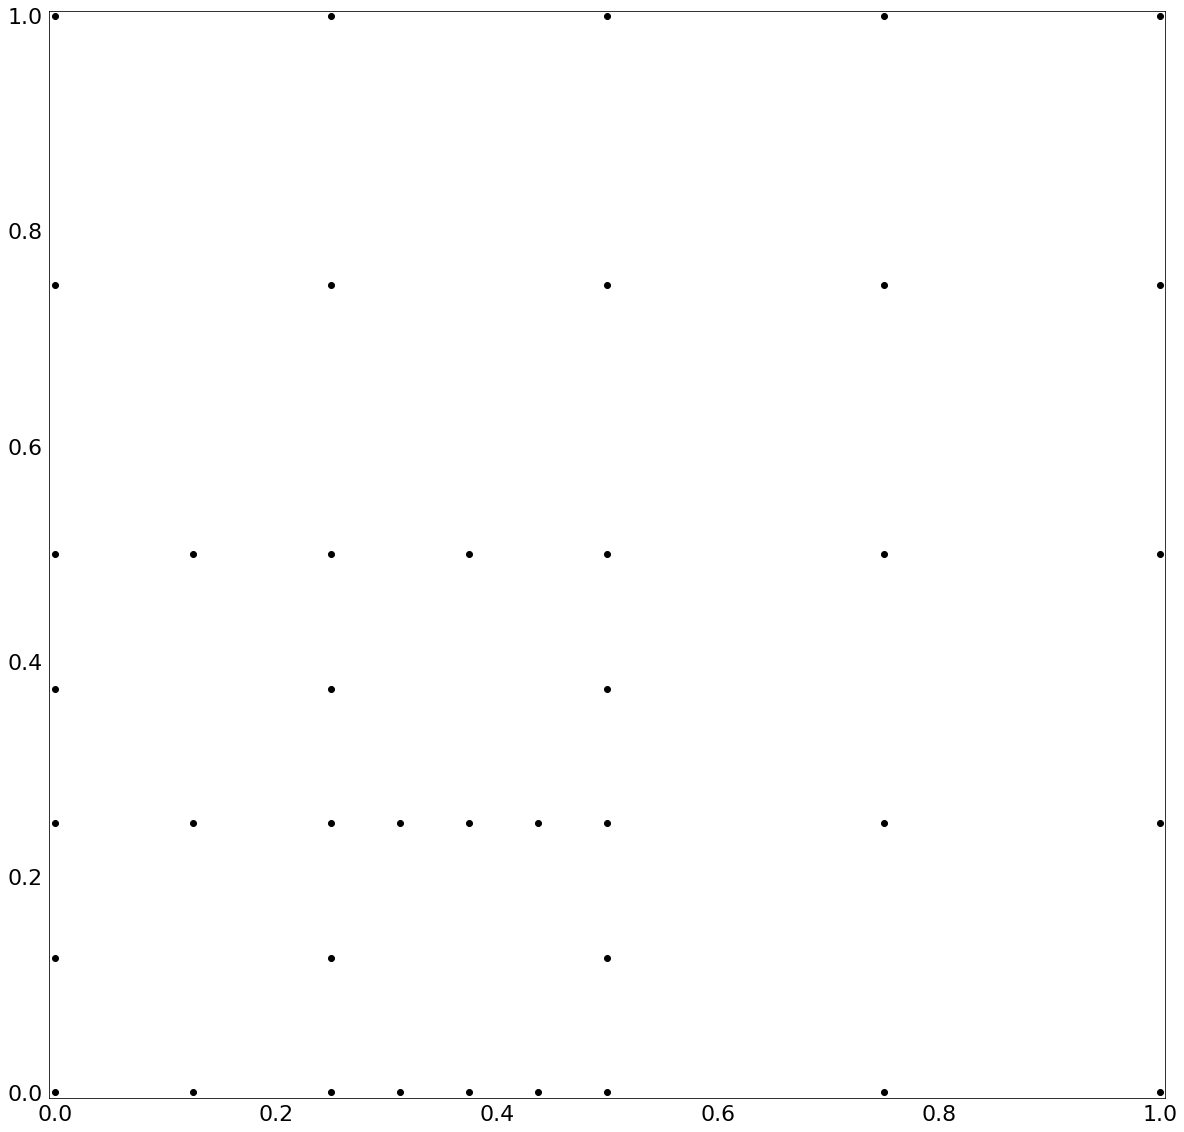

Resulting Sparse Grid:


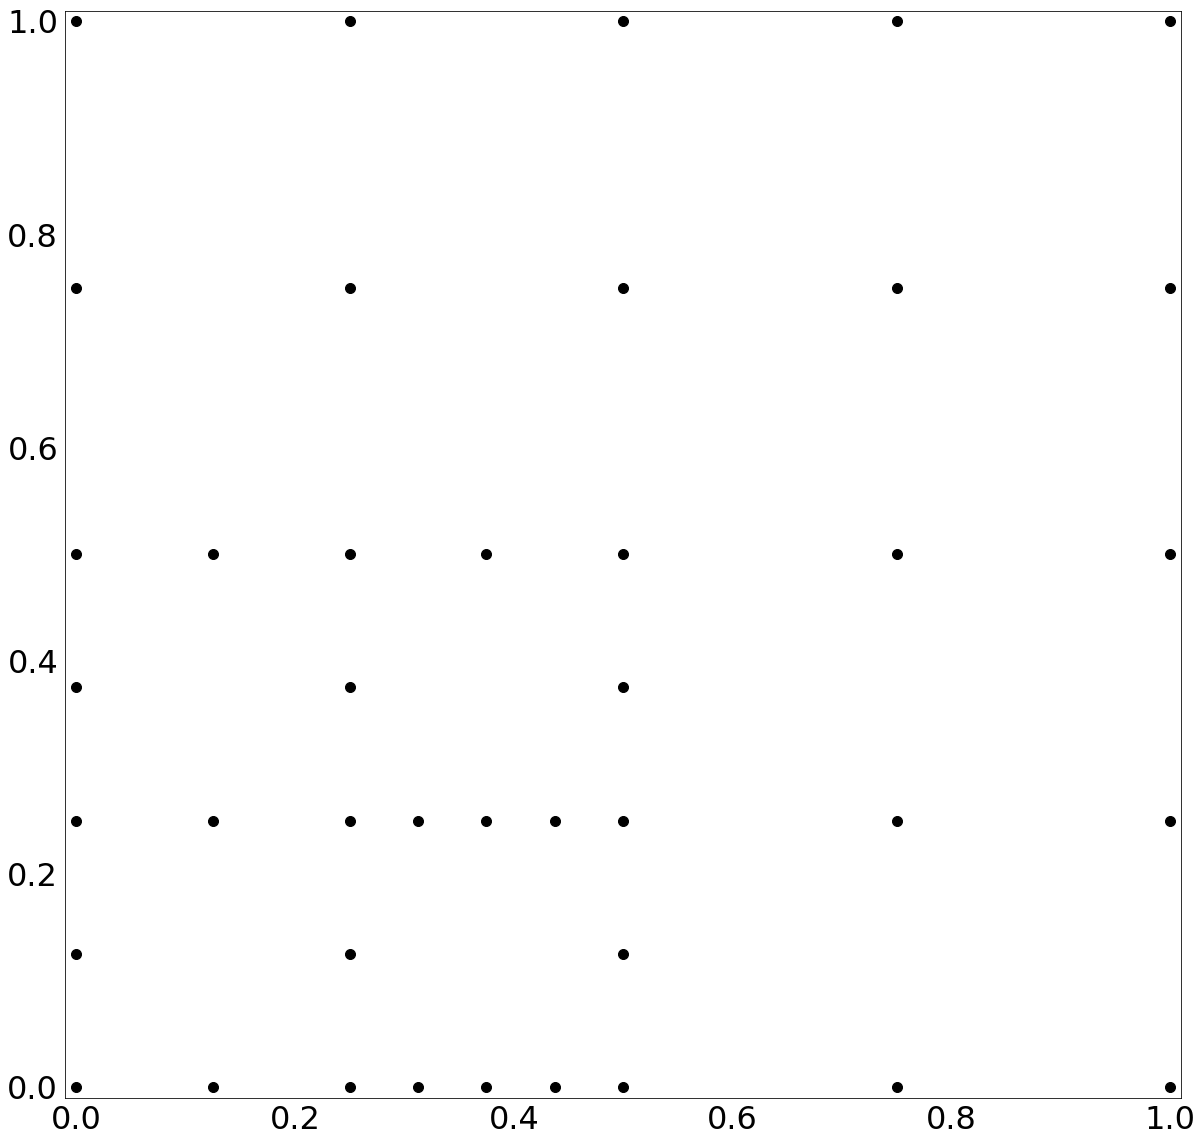

max surplus error: 0.00189522853074 total surplus error: 0.0124746965496
combiintegral: 0.110506771028
Current error: 0.111396391955
Finished refinement
Refinement Graph:


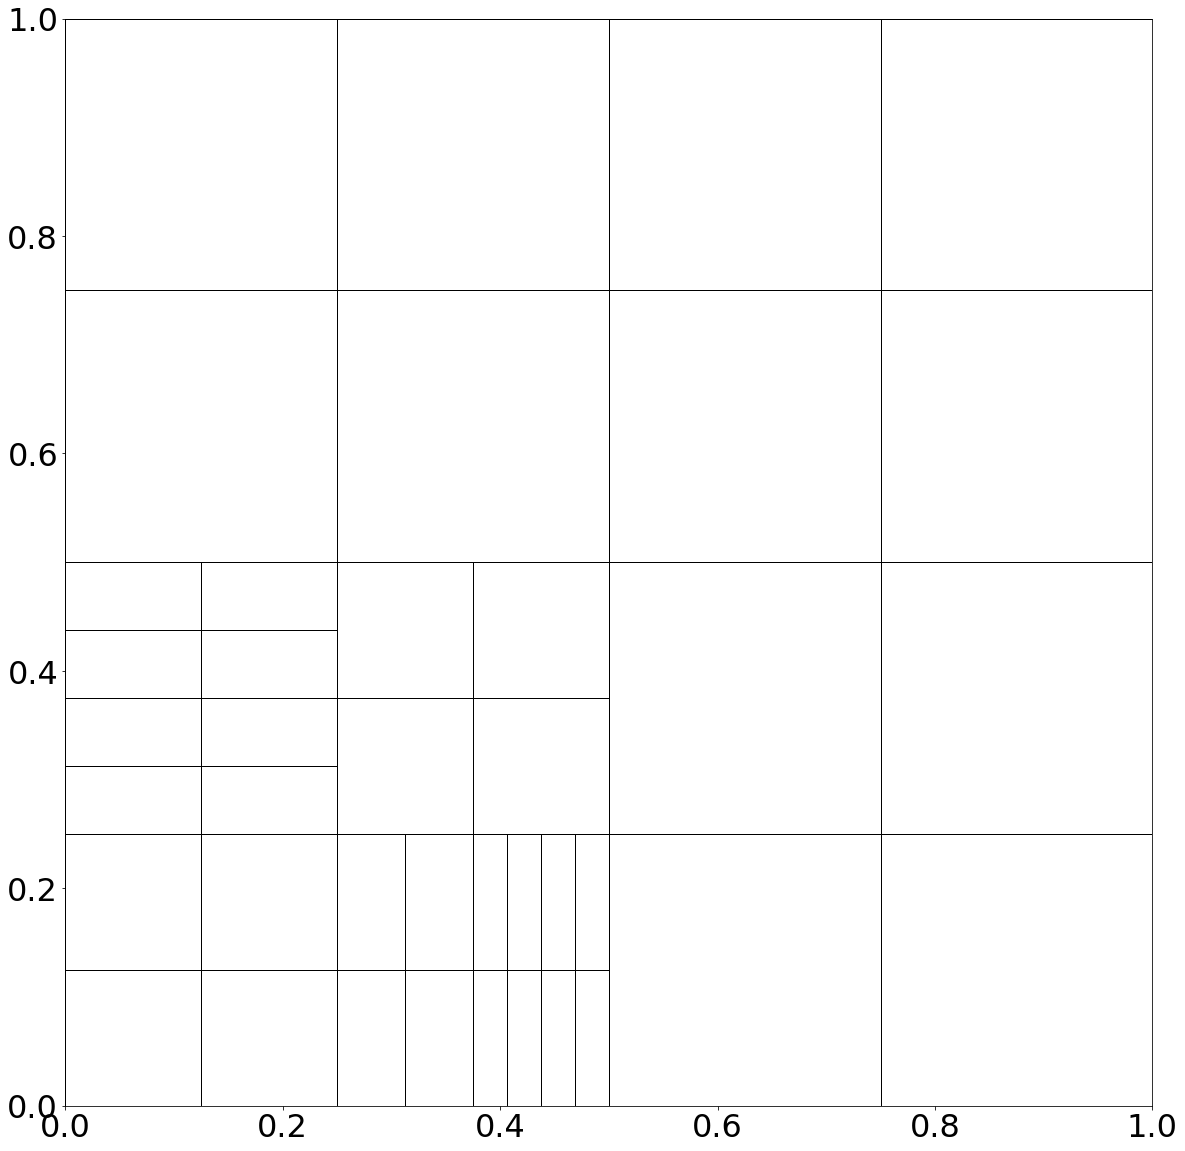

Combi Scheme:


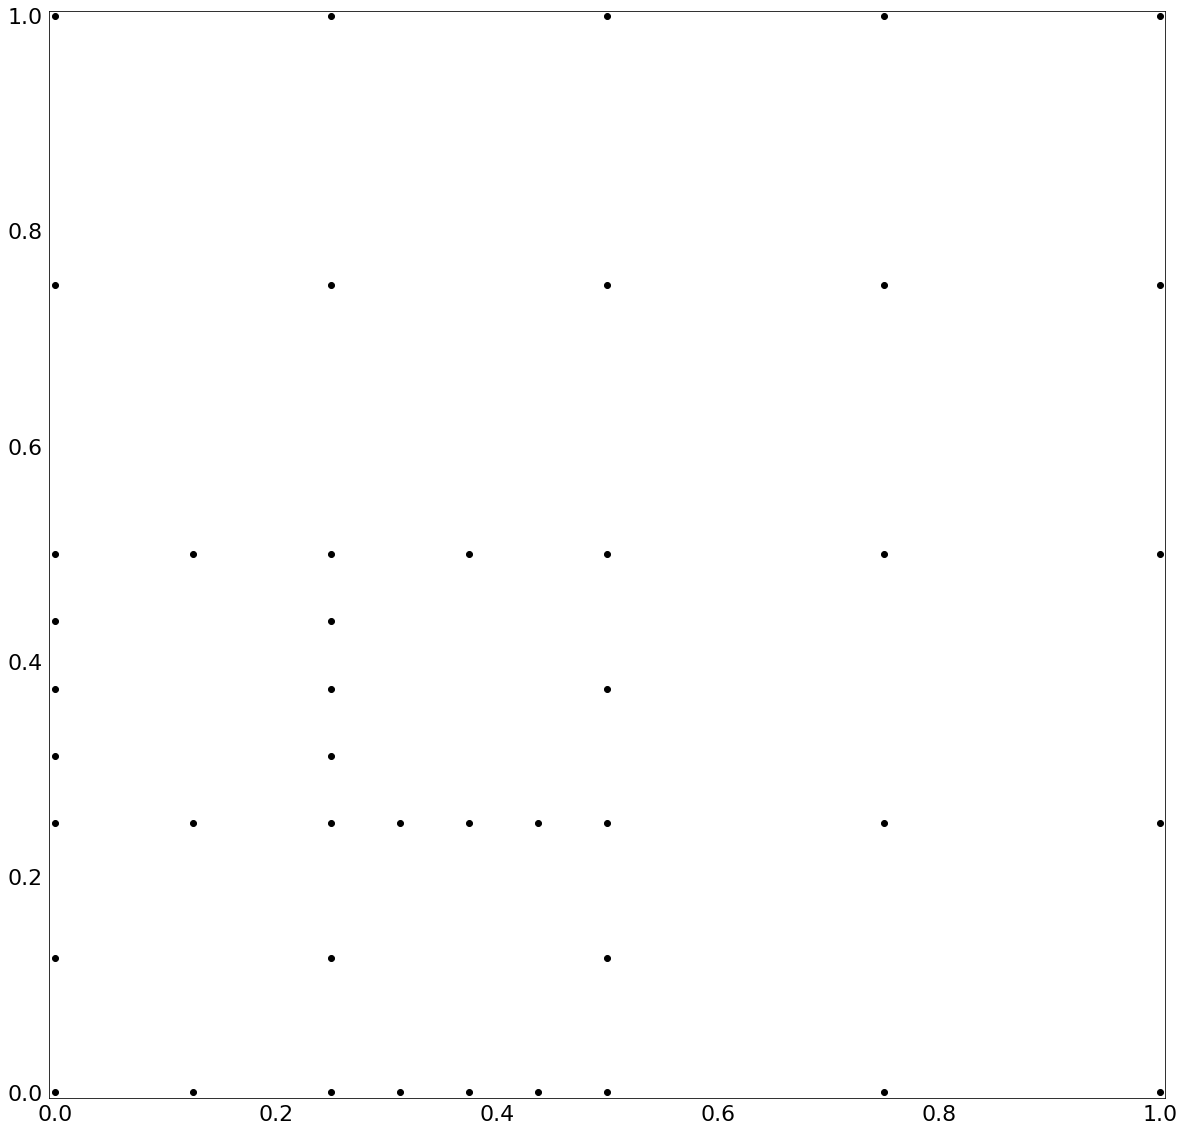

Resulting Sparse Grid:


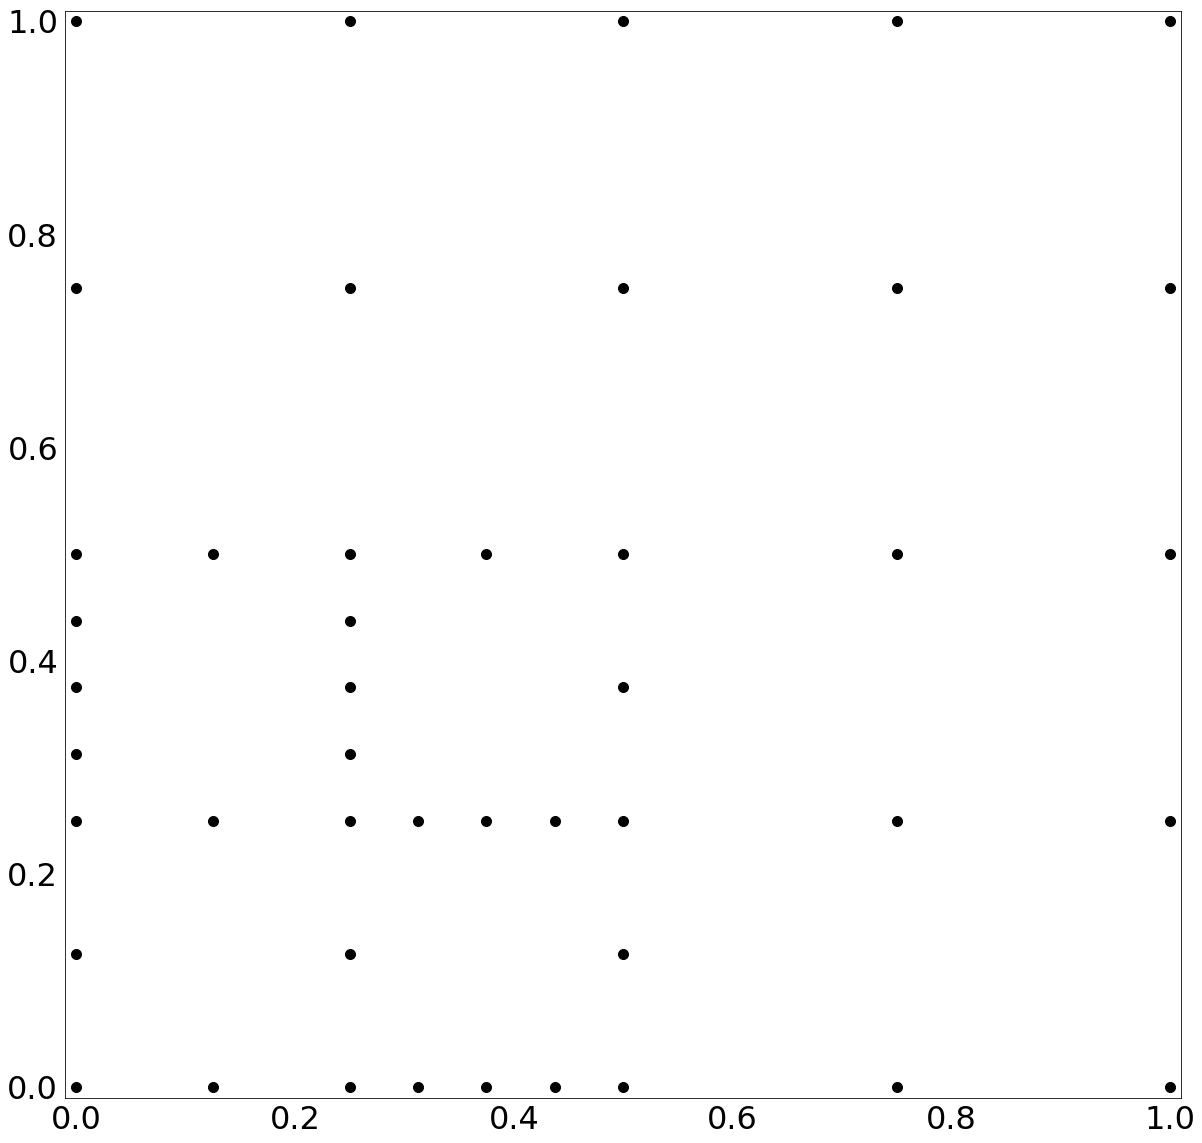

max surplus error: 0.00141155268209 total surplus error: 0.0105875078969
combiintegral: 0.112405956691
Current error: 0.0961247193043
Finished refinement
Refinement Graph:


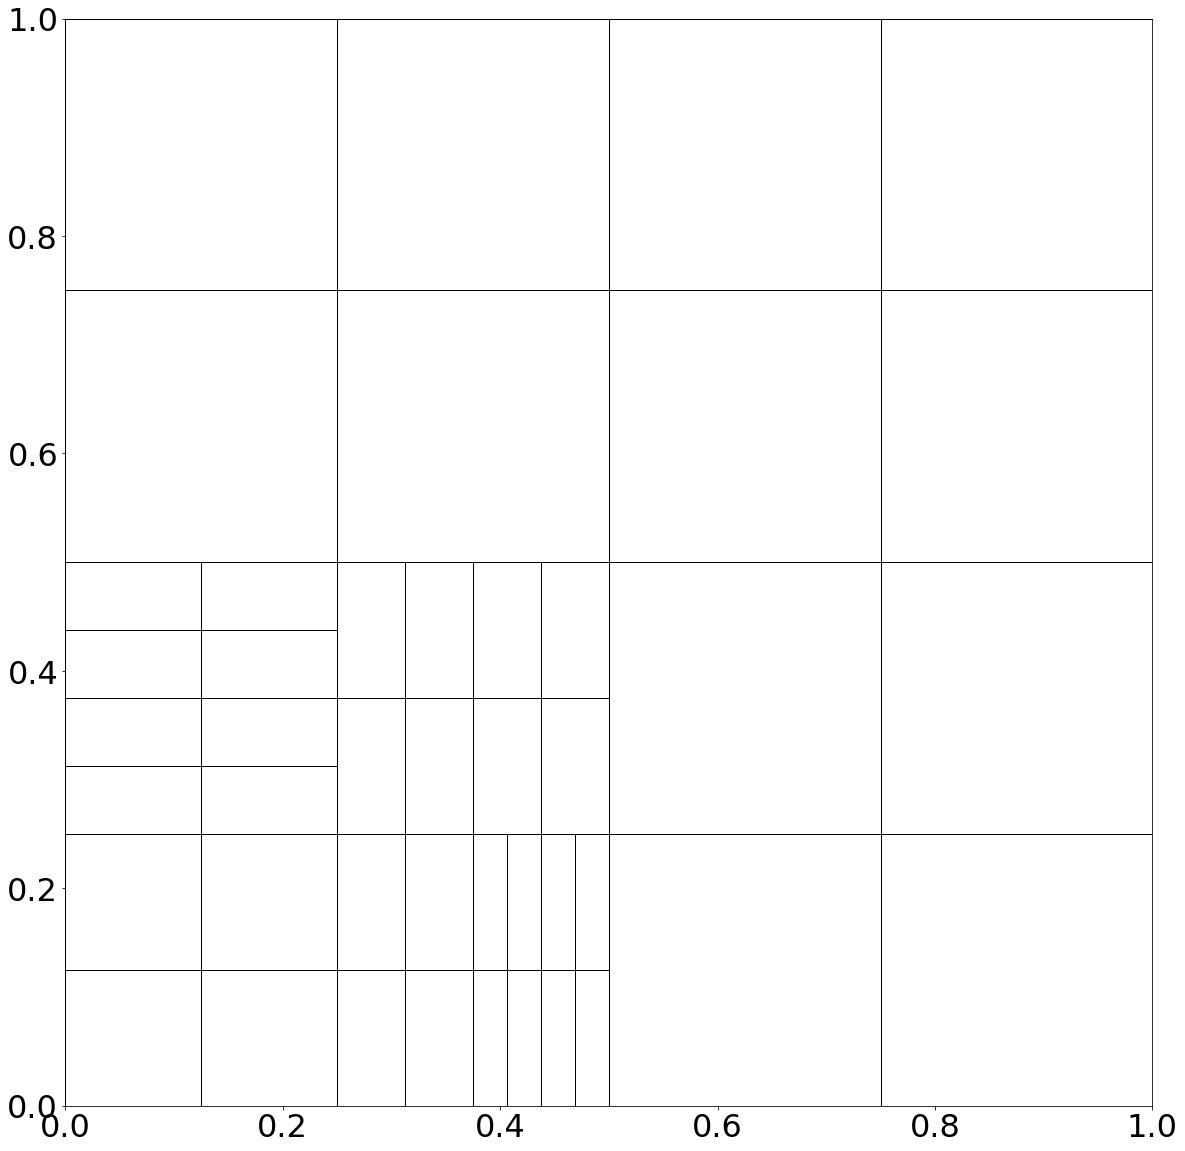

Combi Scheme:


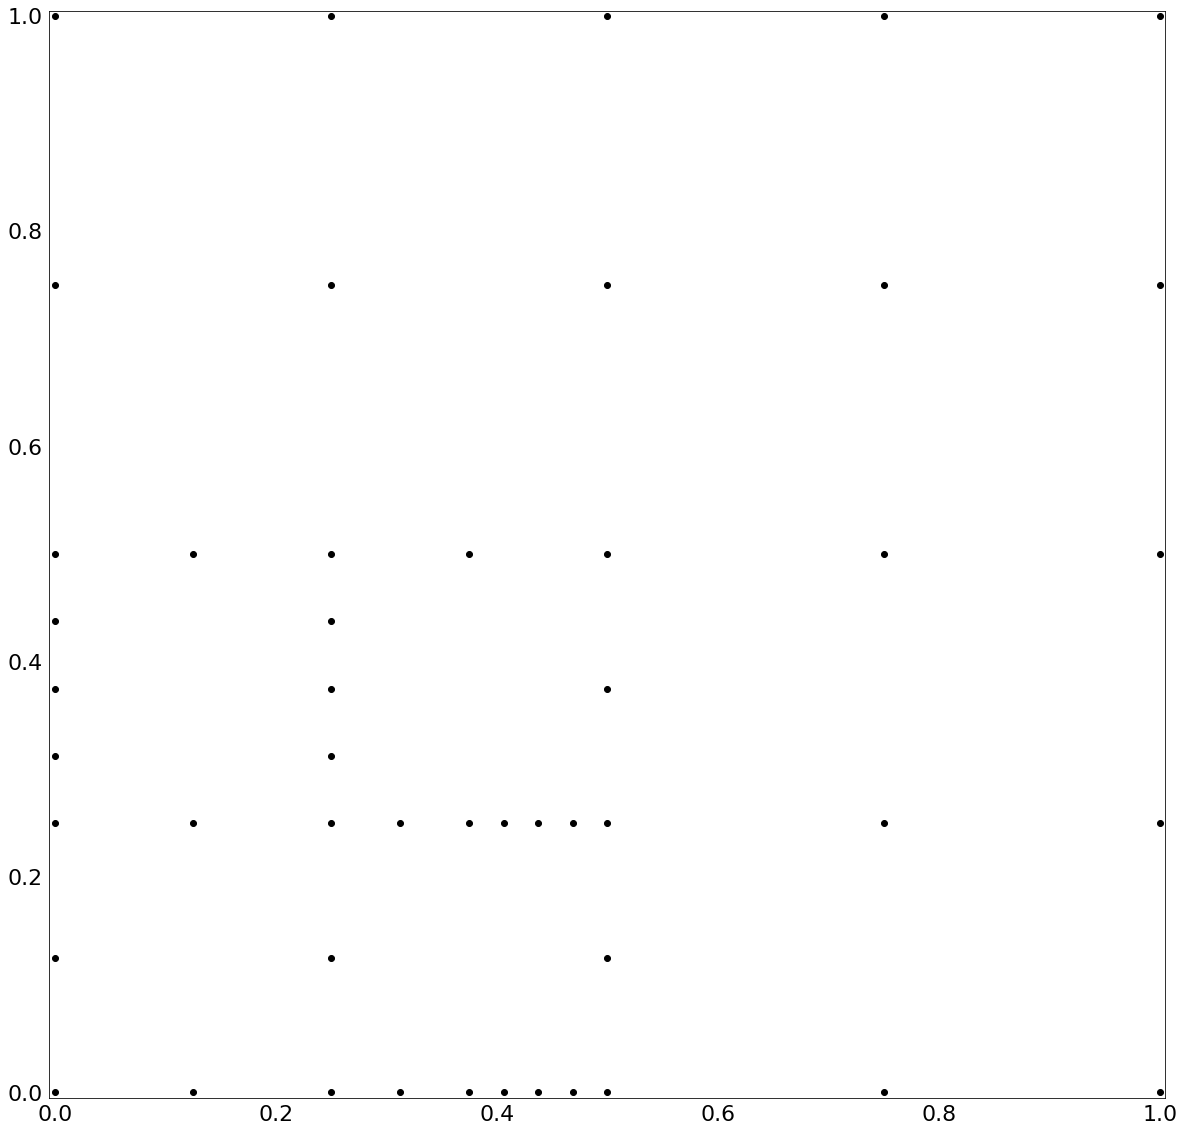

Resulting Sparse Grid:


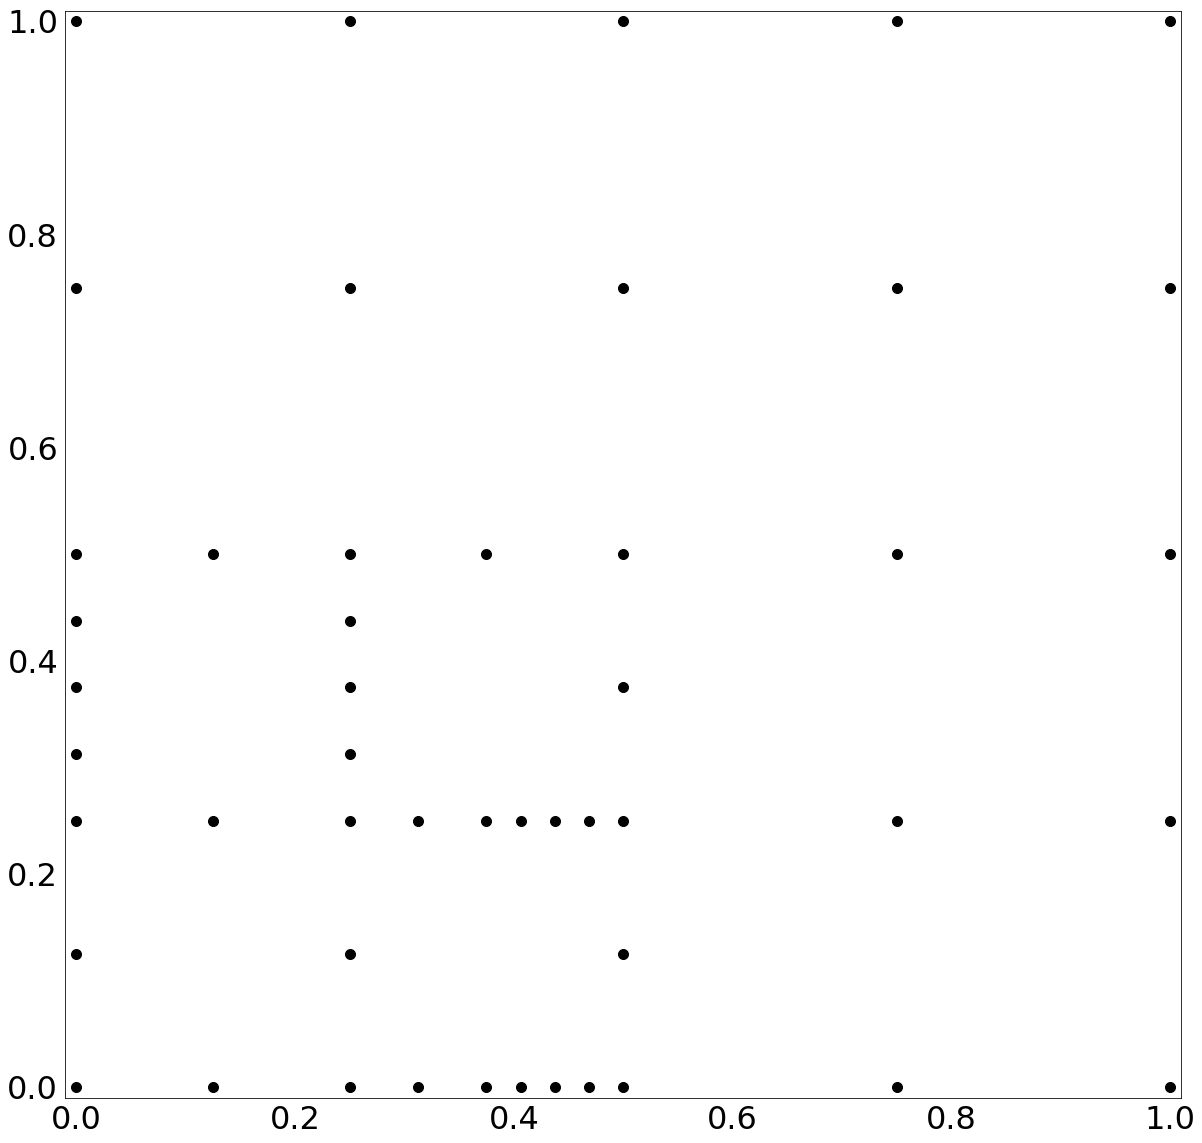

max surplus error: 0.00125543550813 total surplus error: 0.00920222747776
combiintegral: 0.113830235134
Current error: 0.0846718558139
Finished refinement
Refinement Graph:


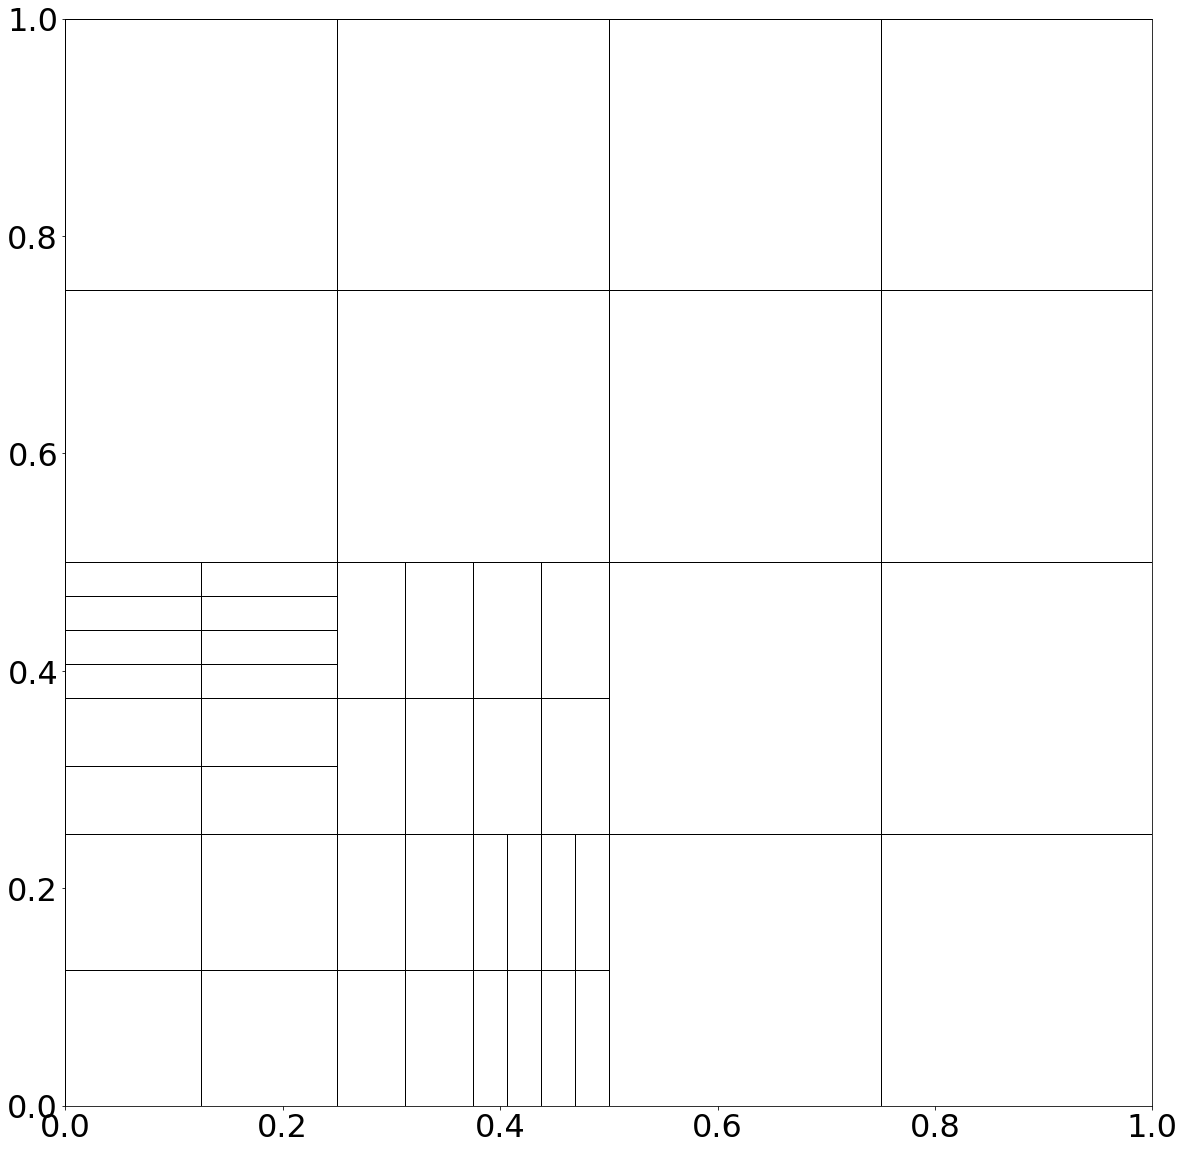

Combi Scheme:


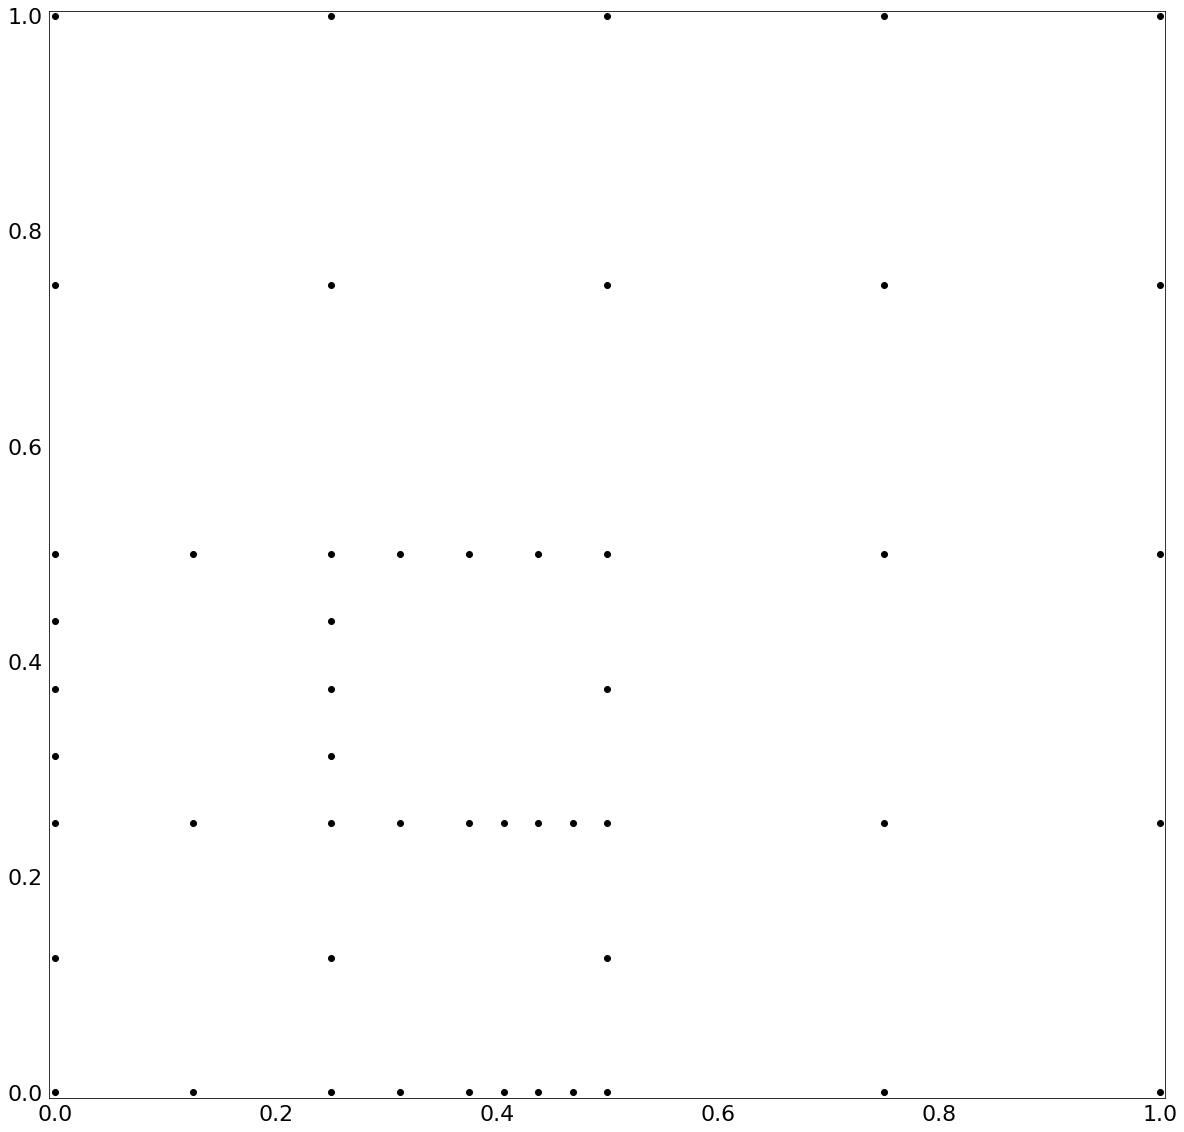

Resulting Sparse Grid:


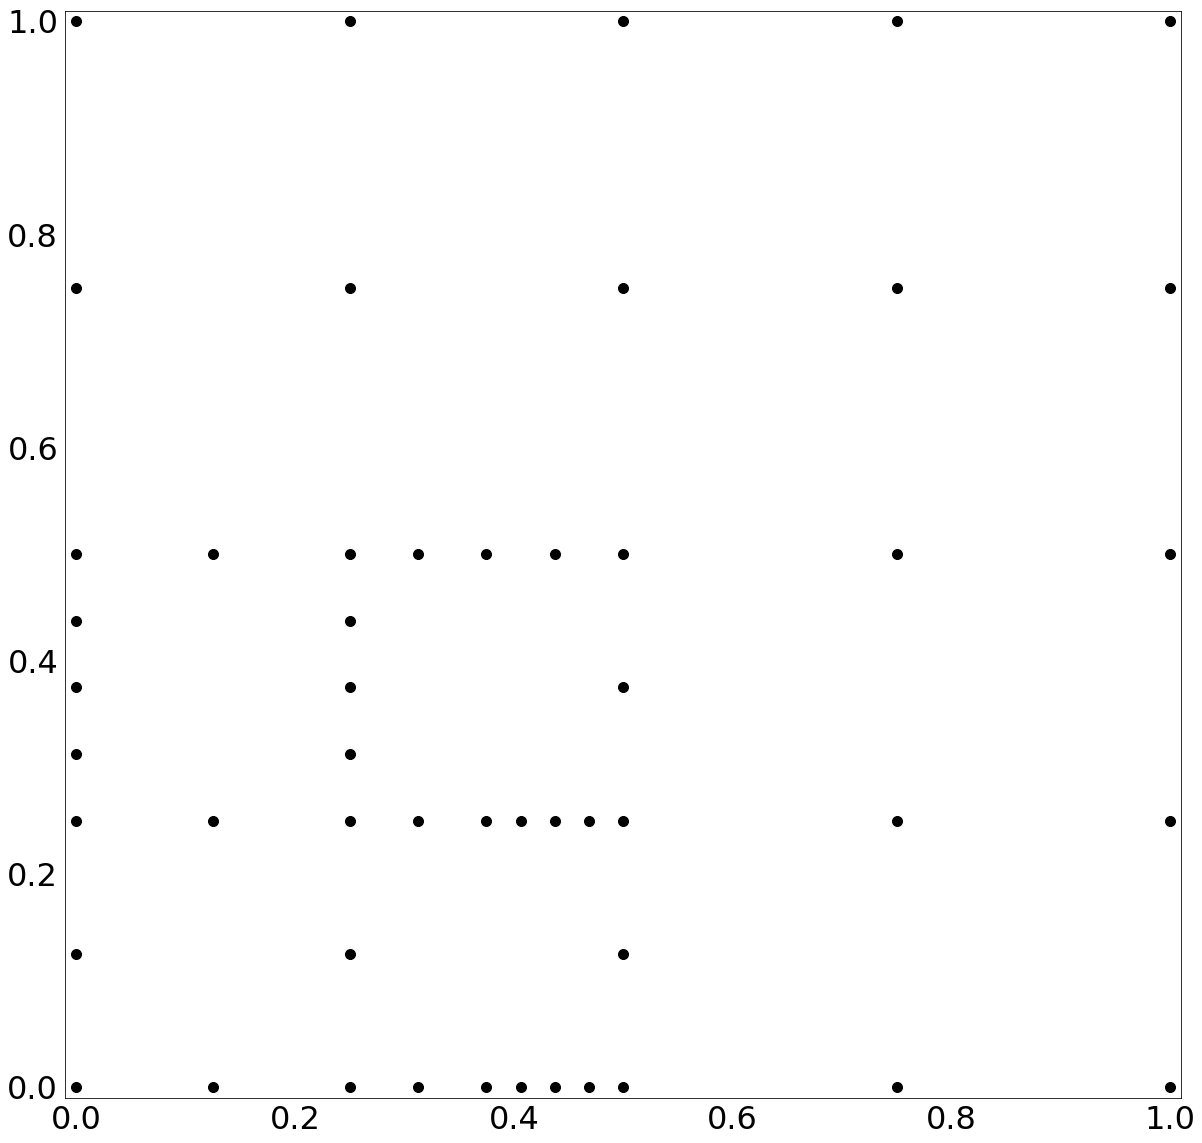

max surplus error: 0.00102887628751 total surplus error: 0.00797015853059
combiintegral: 0.115096988939
Current error: 0.0744856745414
Finished refinement
Refinement Graph:


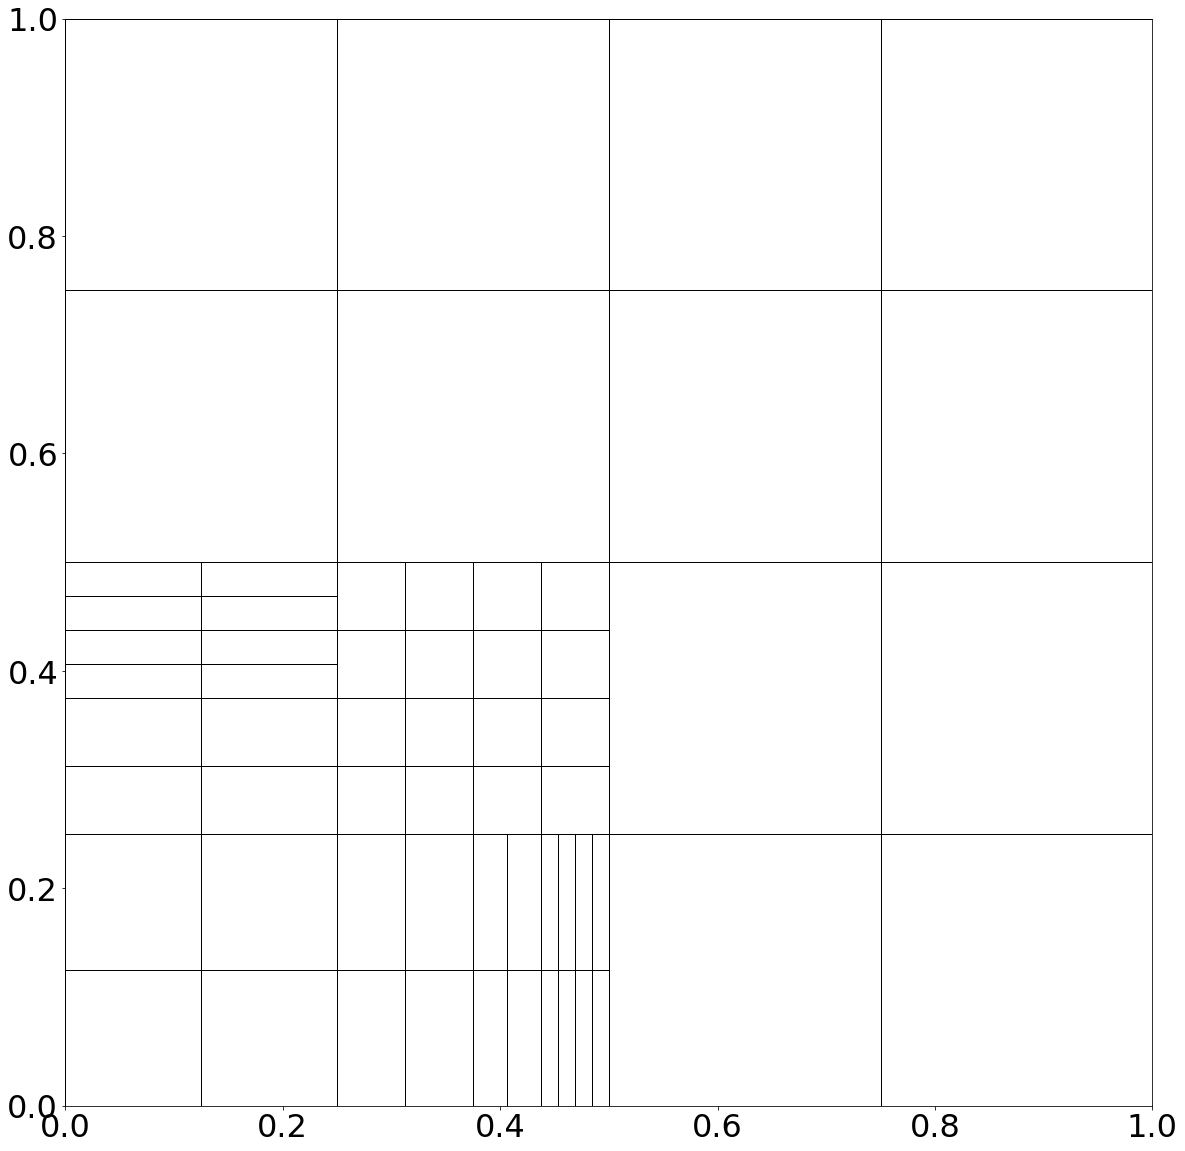

Combi Scheme:


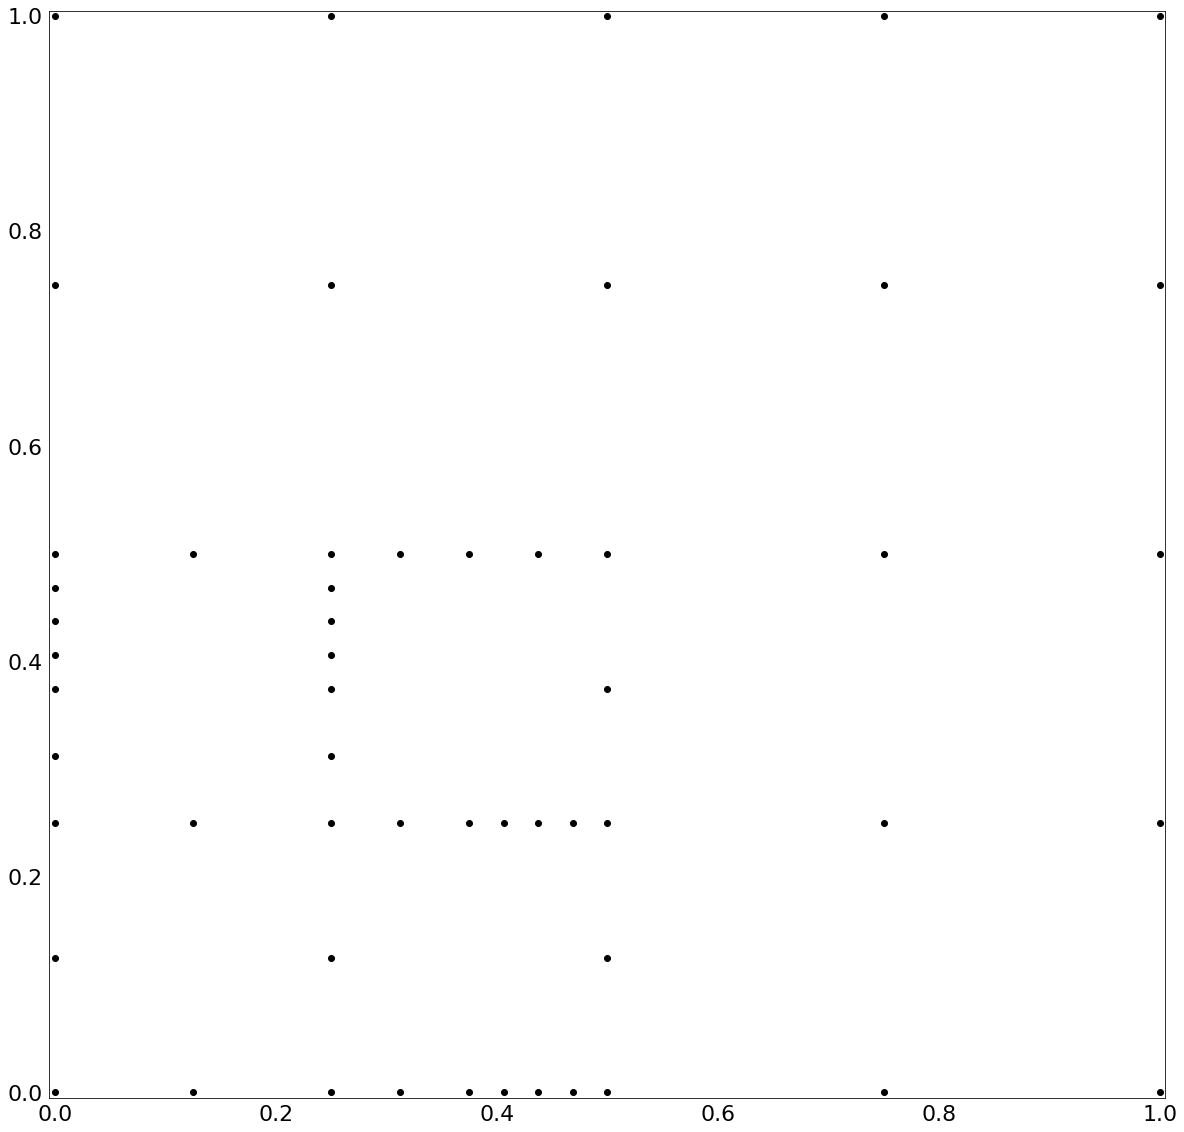

Resulting Sparse Grid:


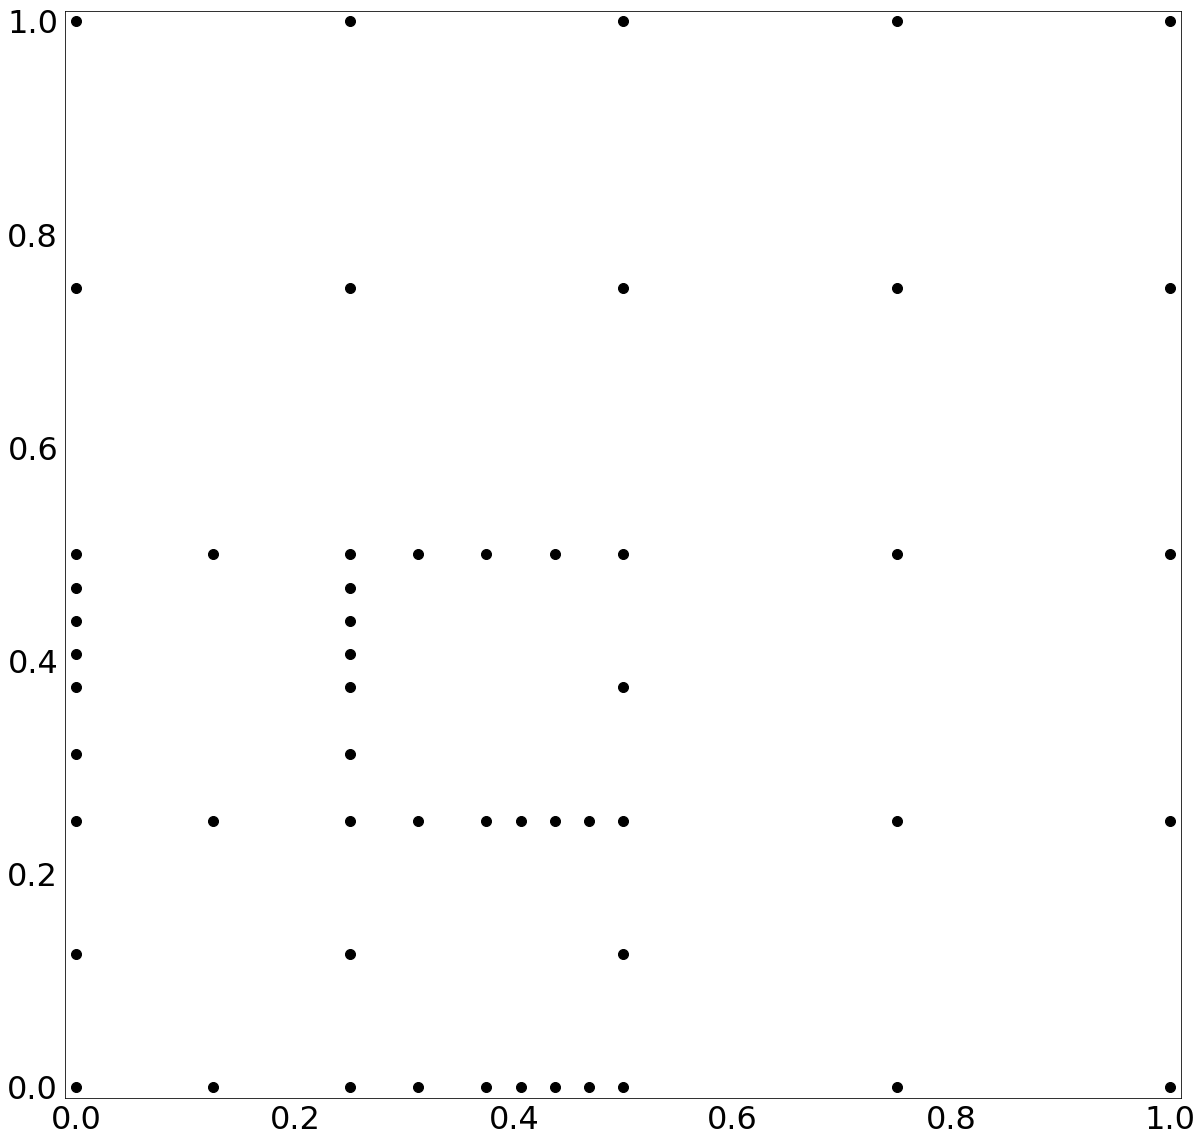

max surplus error: 0.000715525847022 total surplus error: 0.00687463747985
combiintegral: 0.117909007786
Current error: 0.0518737561014
Finished refinement
Refinement Graph:


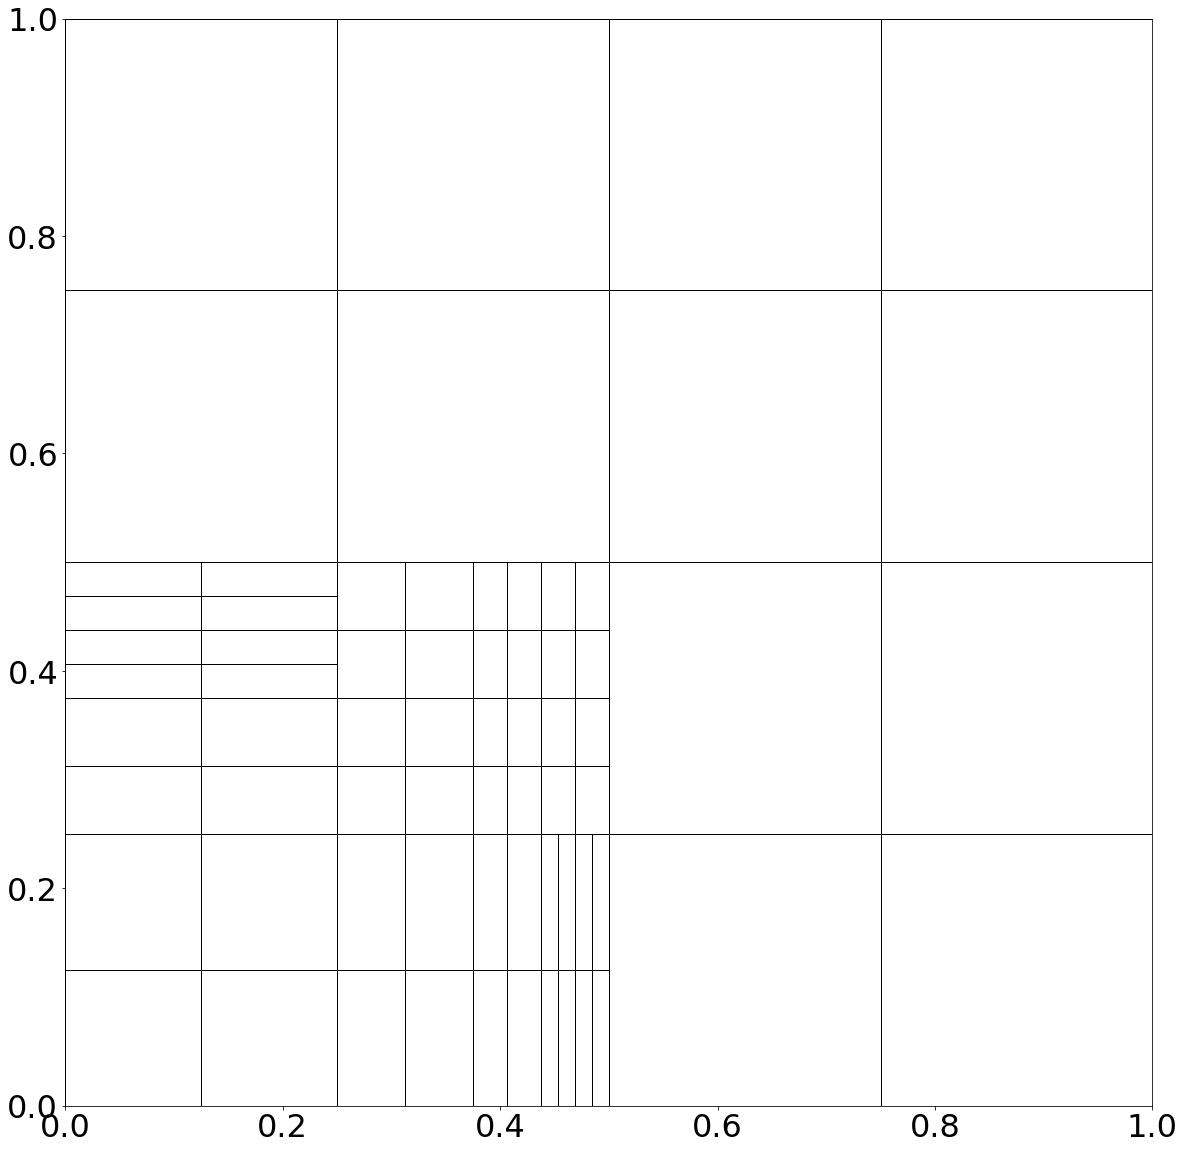

Combi Scheme:


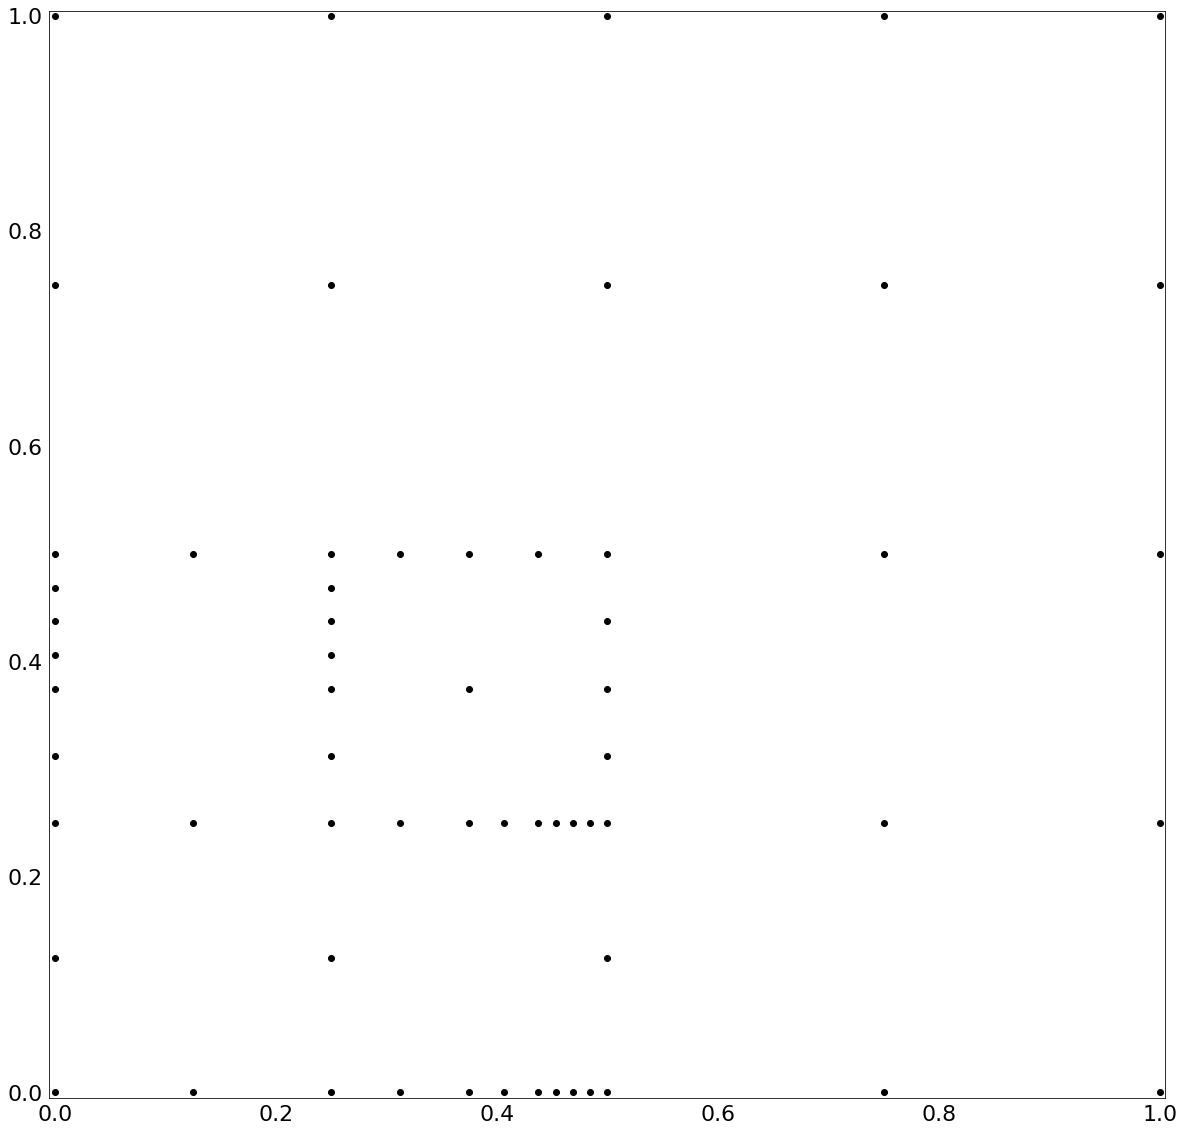

Resulting Sparse Grid:


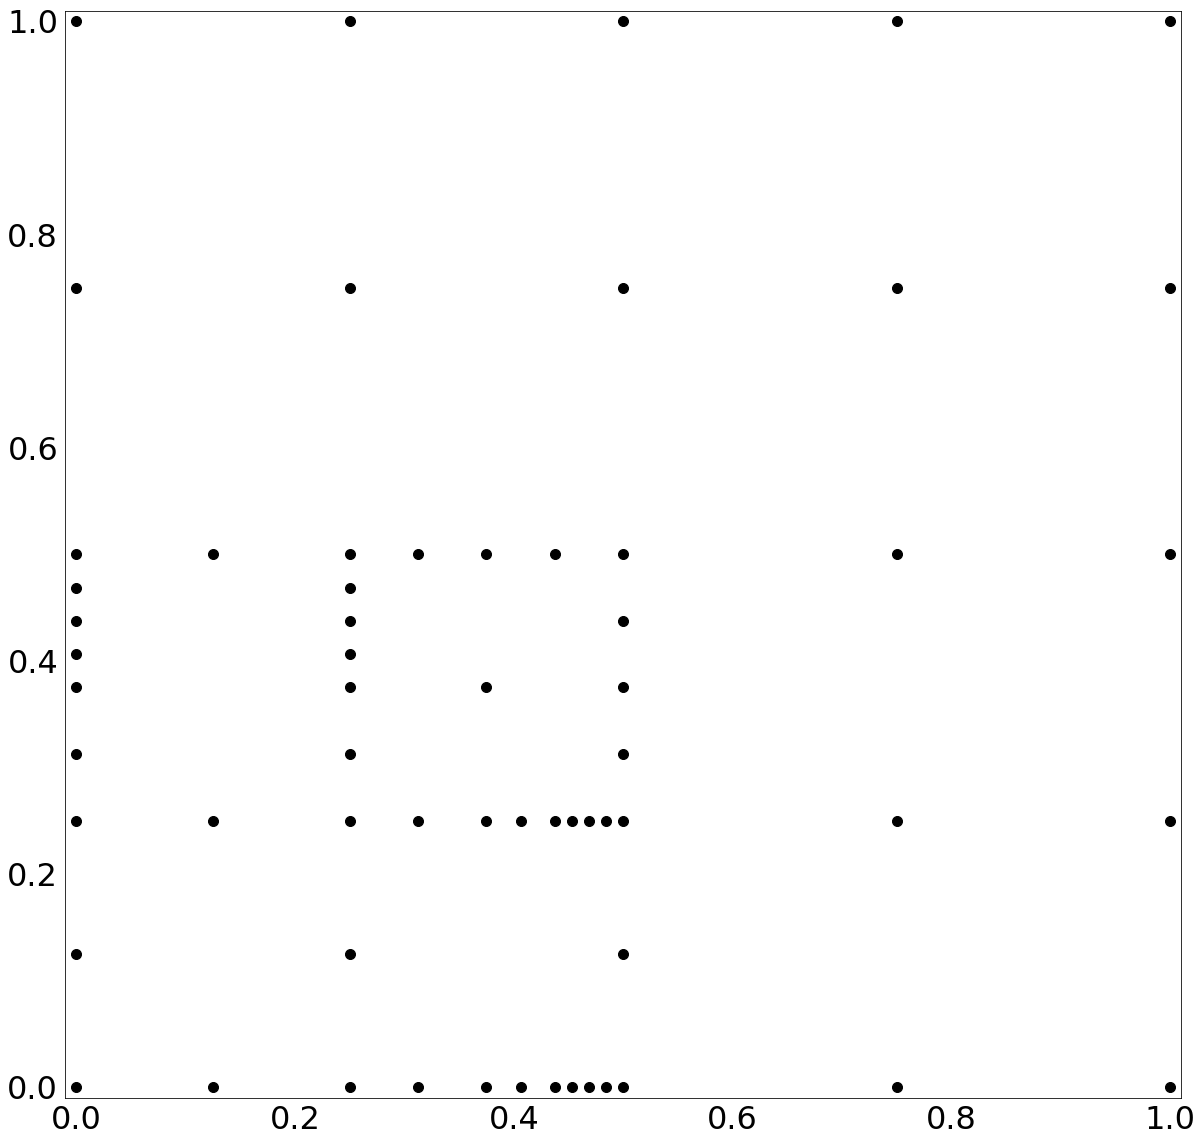

max surplus error: 0.000636388968495 total surplus error: 0.00616214701377
combiintegral: 0.118626027612
Current error: 0.0461080785953
Finished refinement
Refinement Graph:


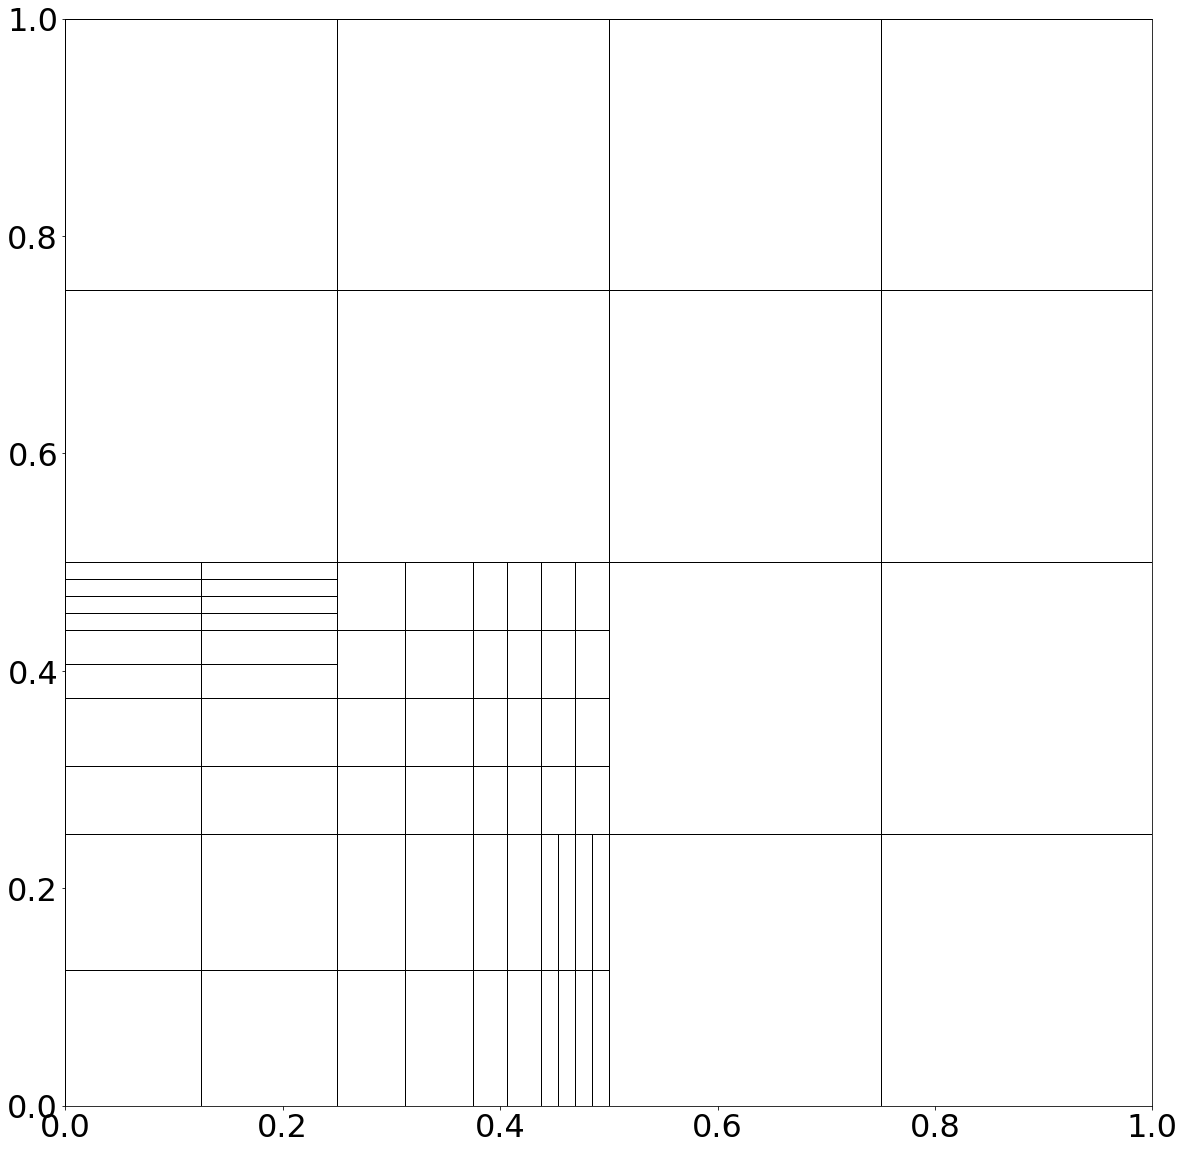

Combi Scheme:


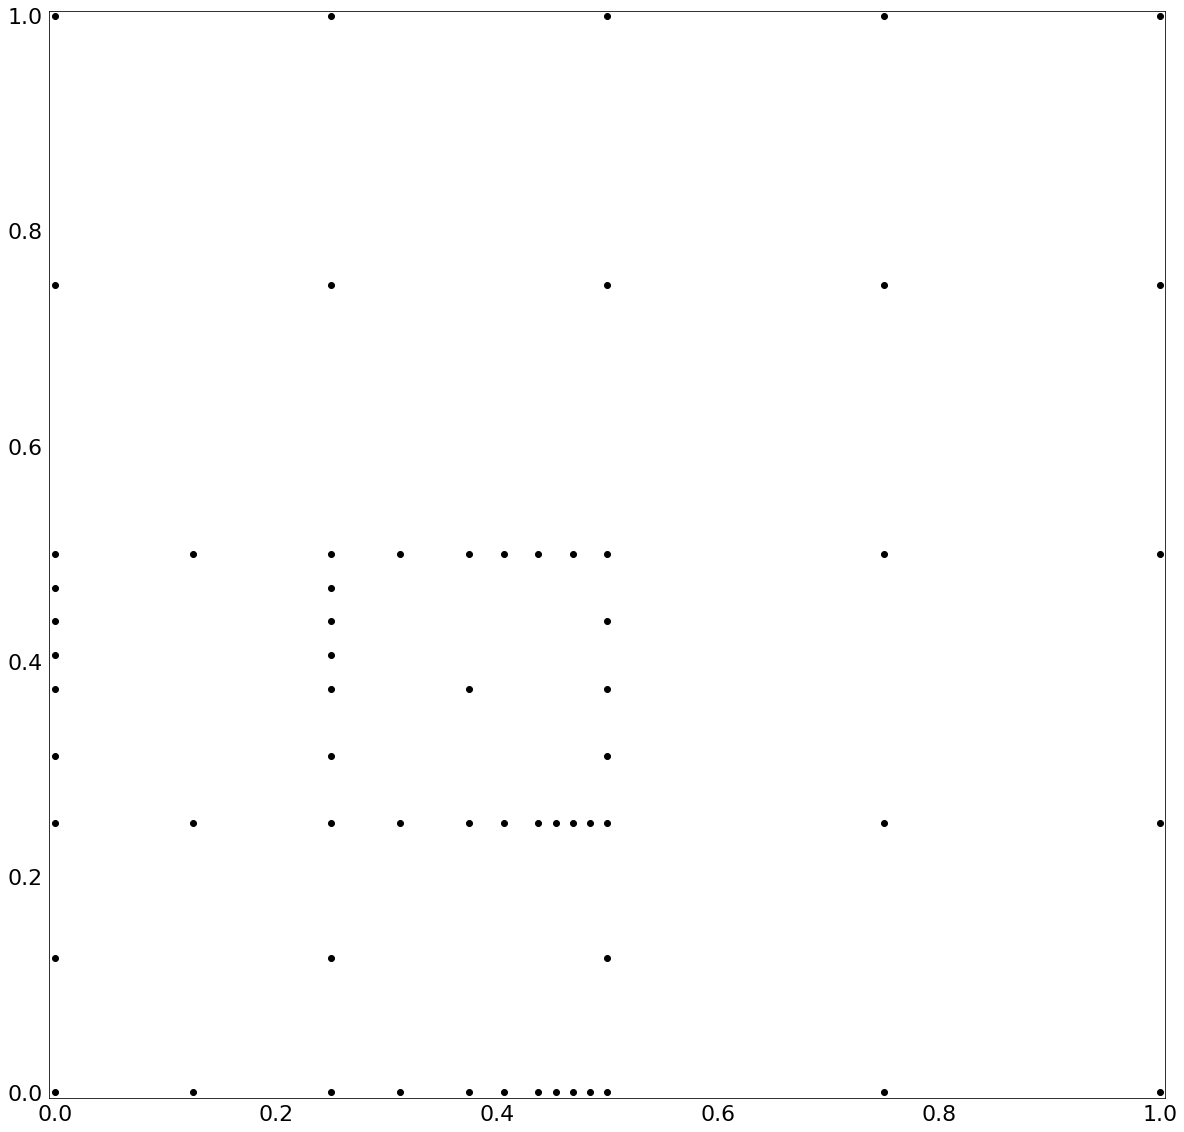

Resulting Sparse Grid:


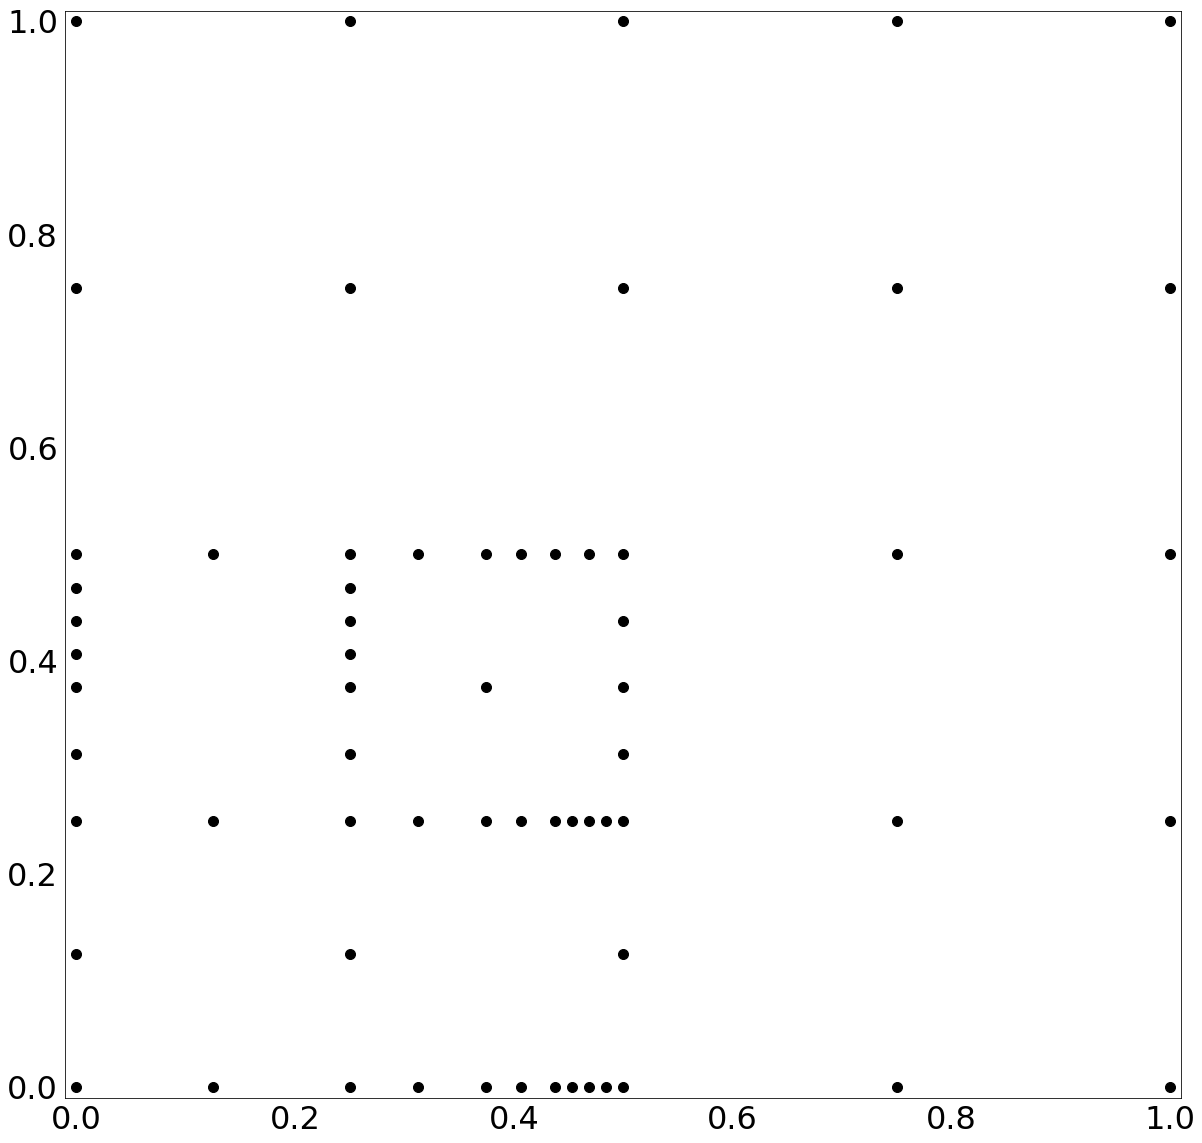

max surplus error: 0.000549659167081 total surplus error: 0.00552845771427
combiintegral: 0.119263745325
Current error: 0.0409800827639
Finished refinement
Refinement Graph:


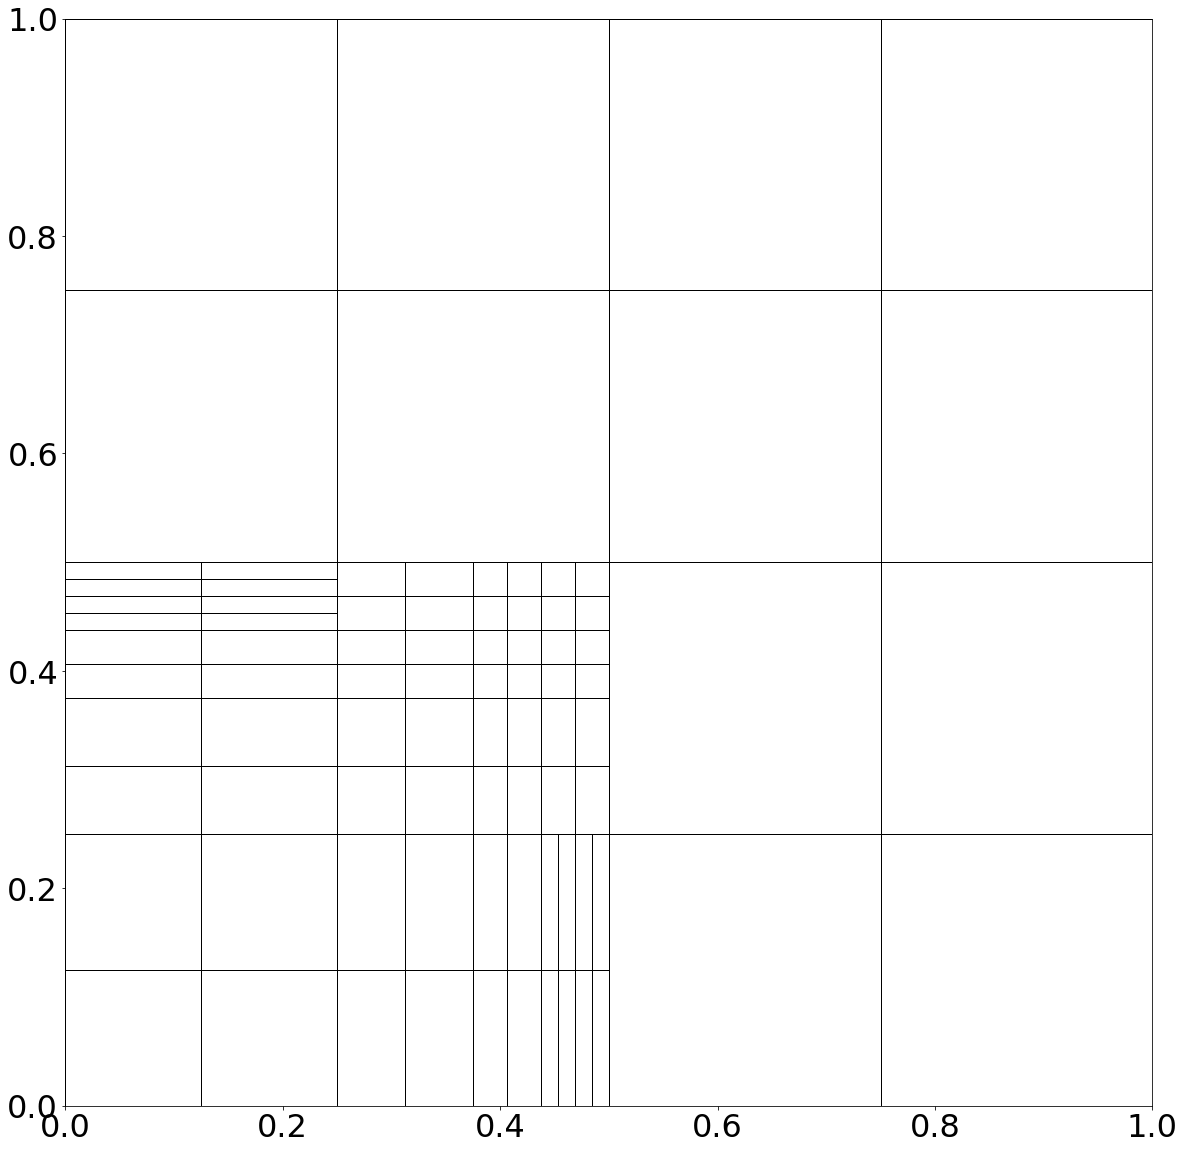

Combi Scheme:


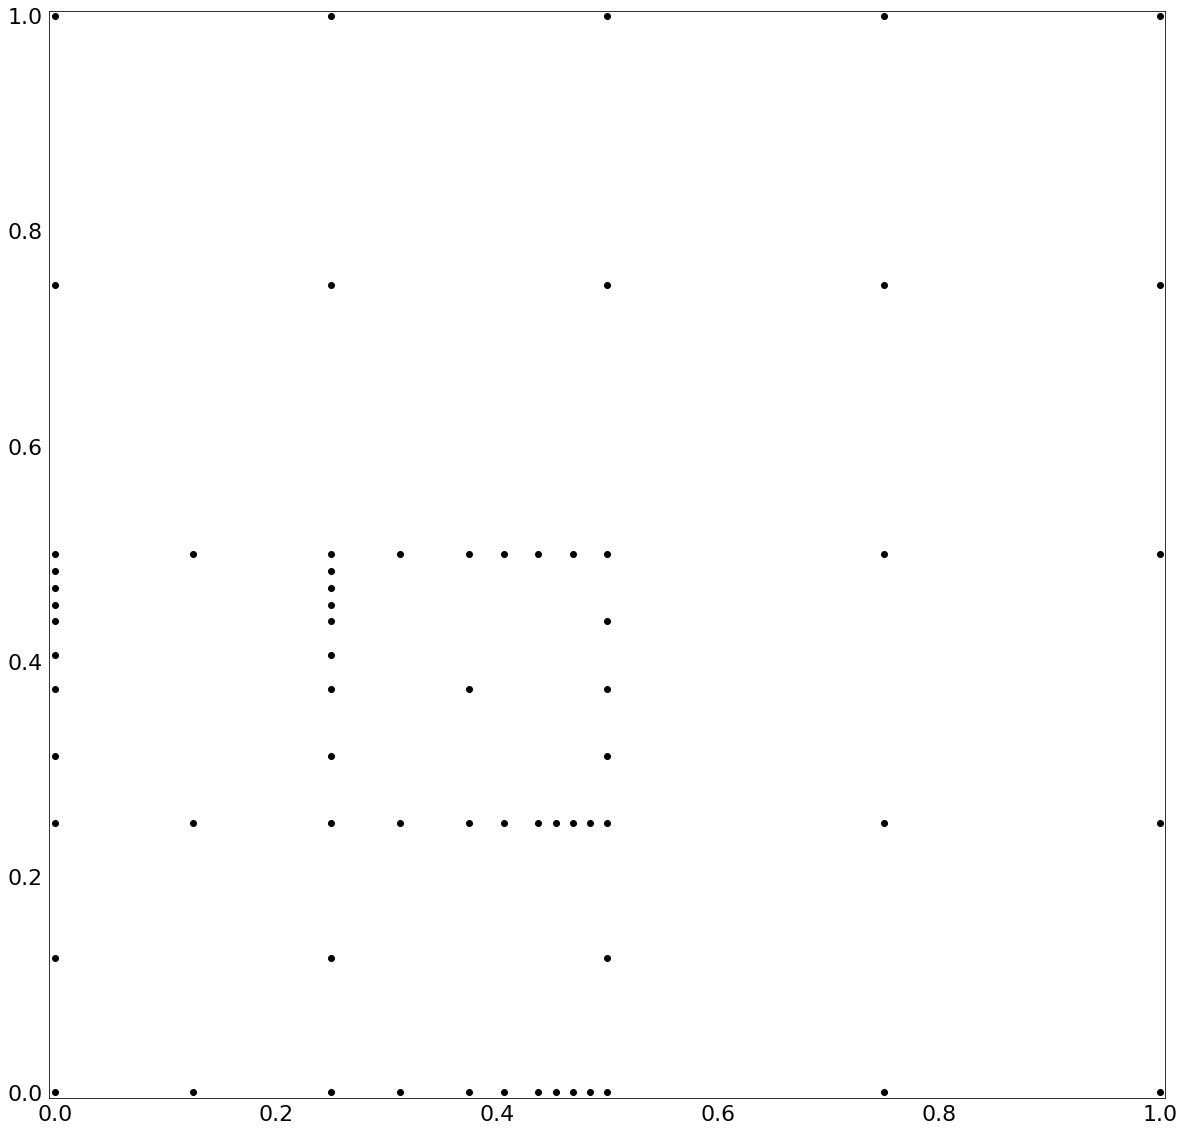

Resulting Sparse Grid:


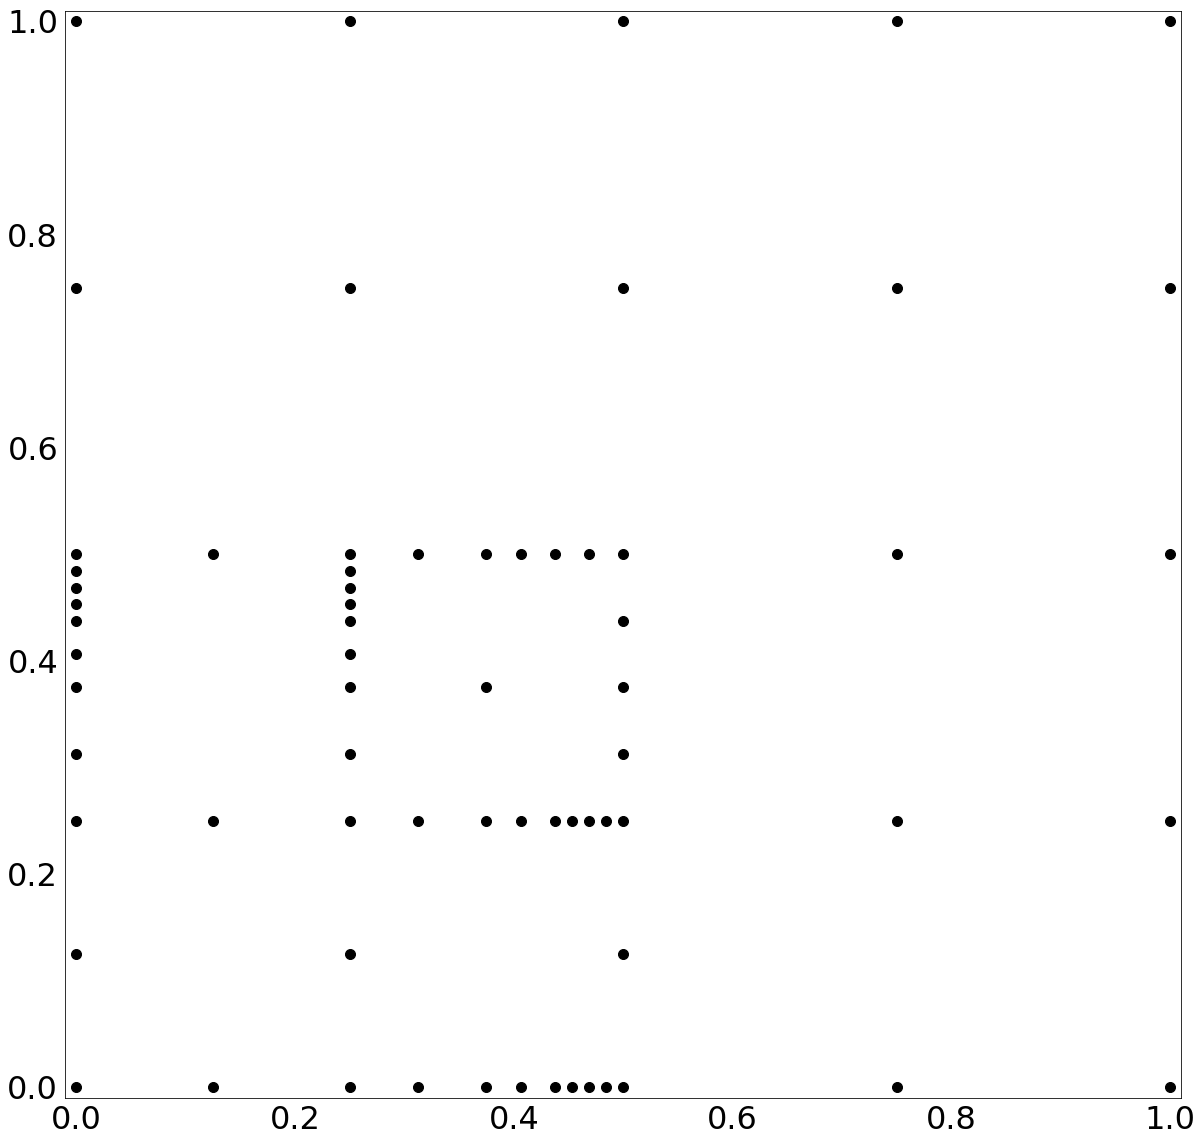

max surplus error: 0.000475668191702 total surplus error: 0.00498902897667
combiintegral: 0.119818359909
Current error: 0.0365203332365
Finished refinement
Refinement Graph:


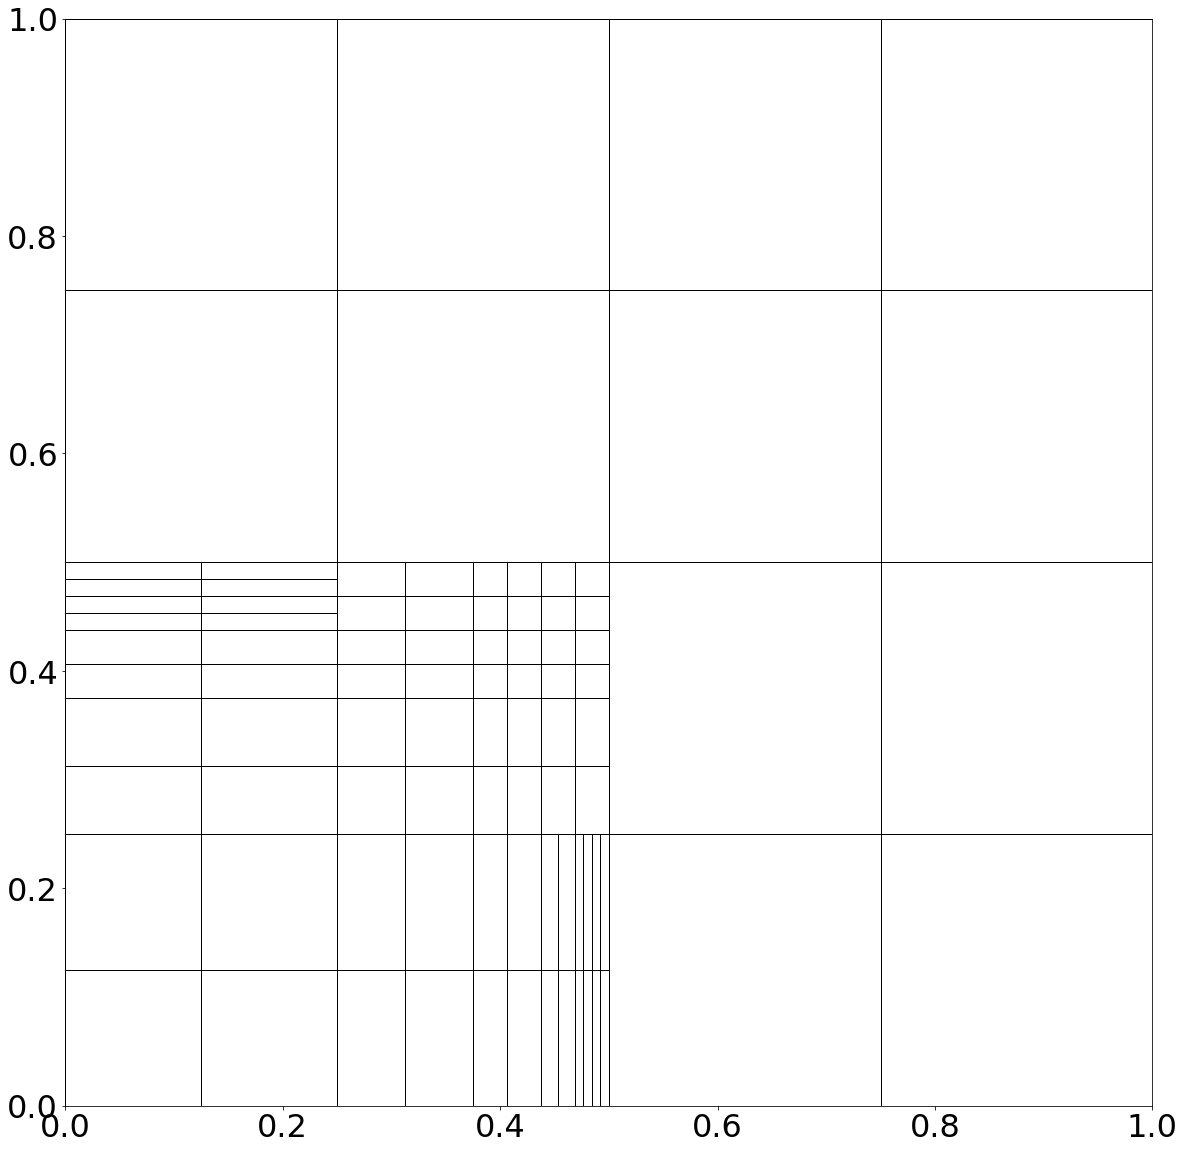

Combi Scheme:


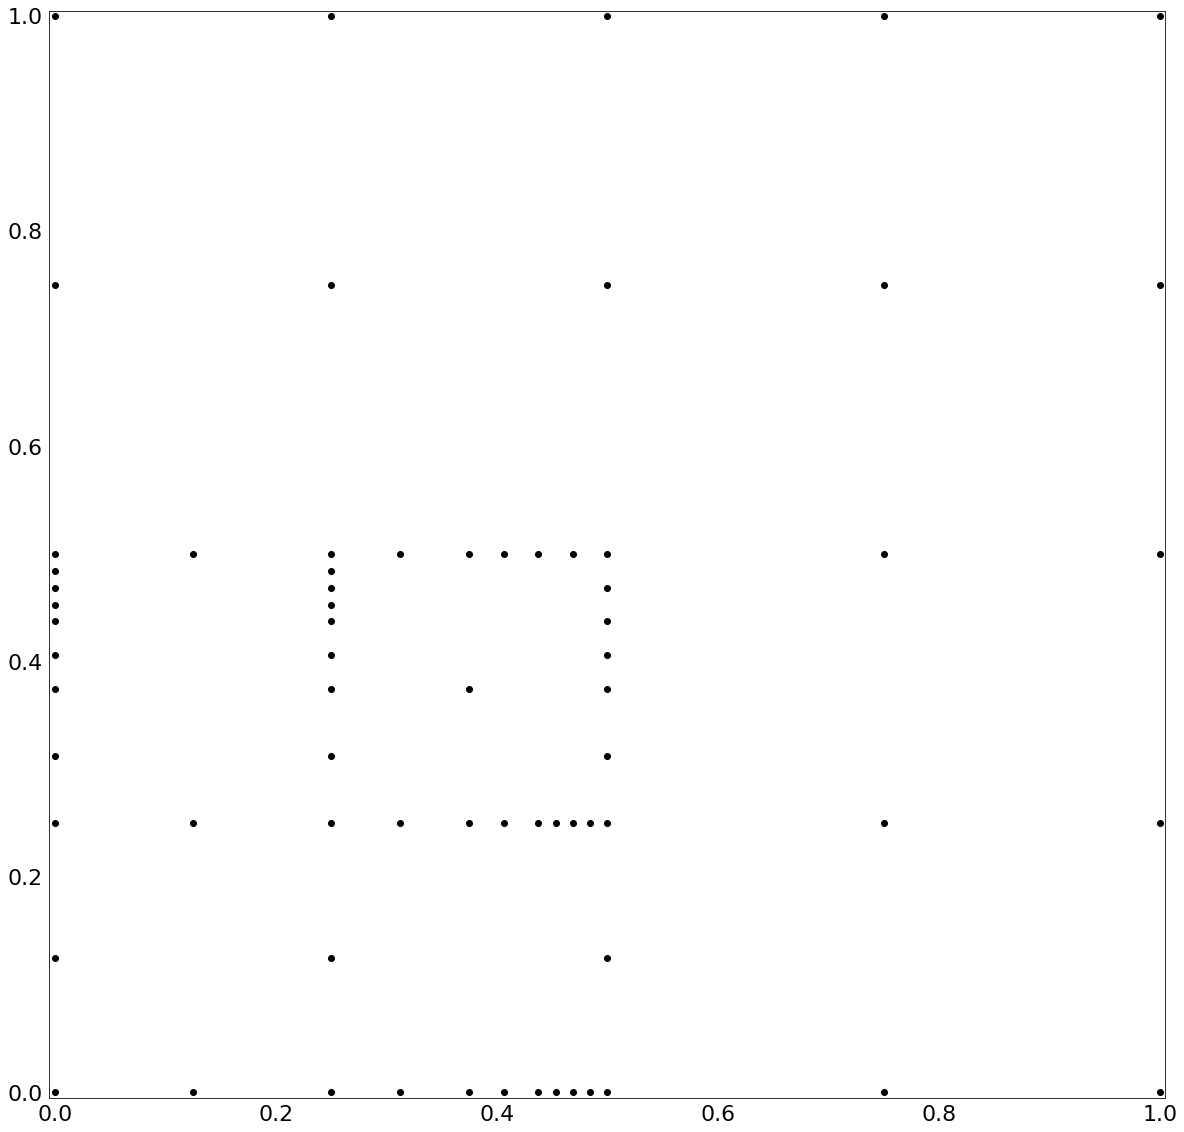

Resulting Sparse Grid:


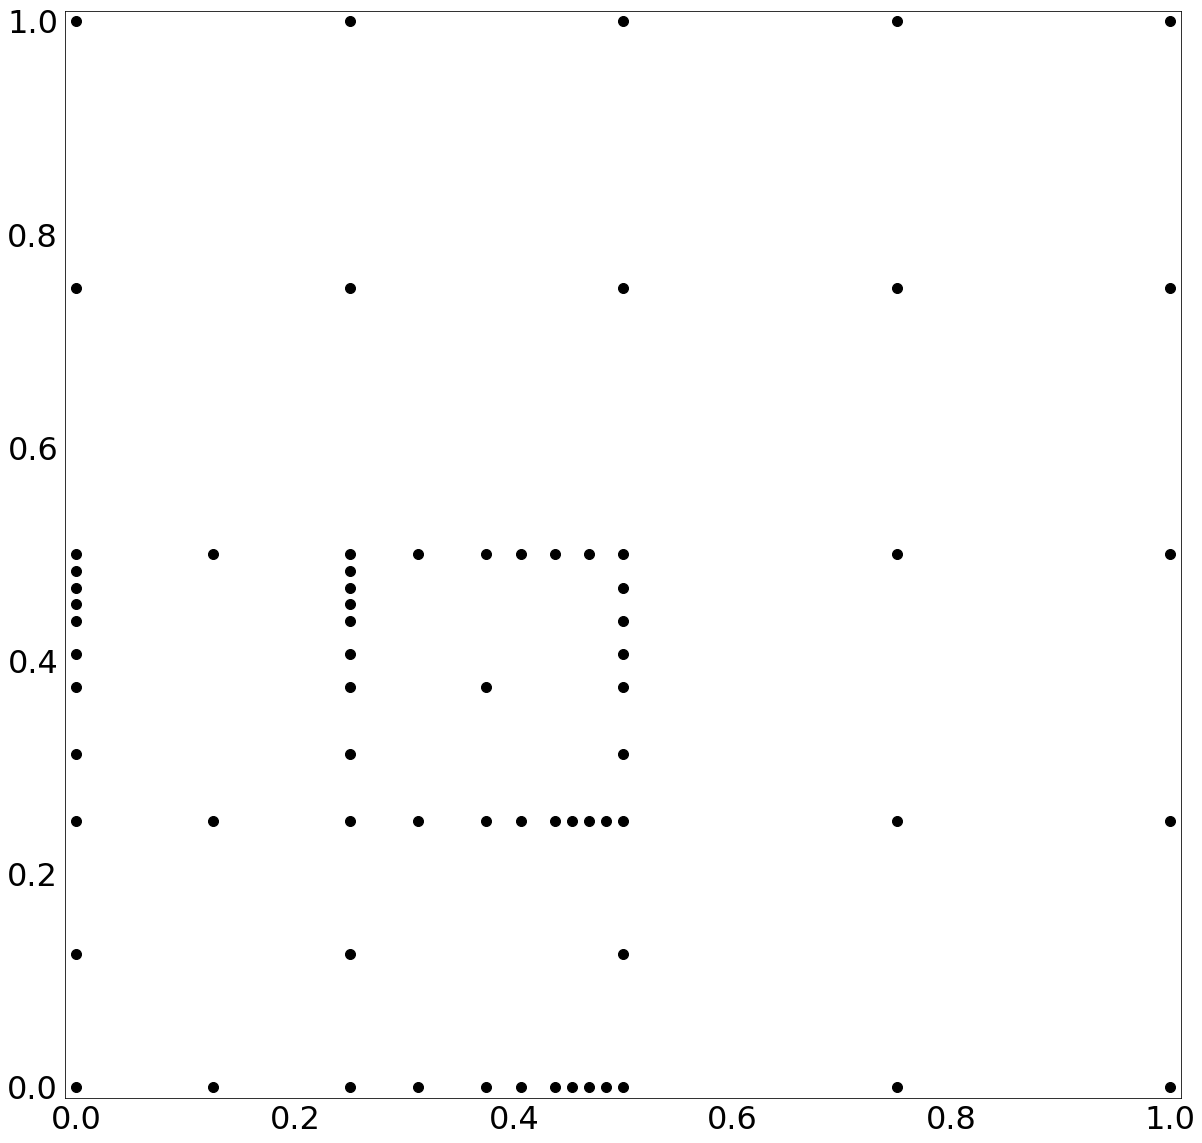

max surplus error: 0.000358895263369 total surplus error: 0.00451347923624
combiintegral: 0.120294087095
Current error: 0.0326949305939
Finished refinement
Refinement Graph:


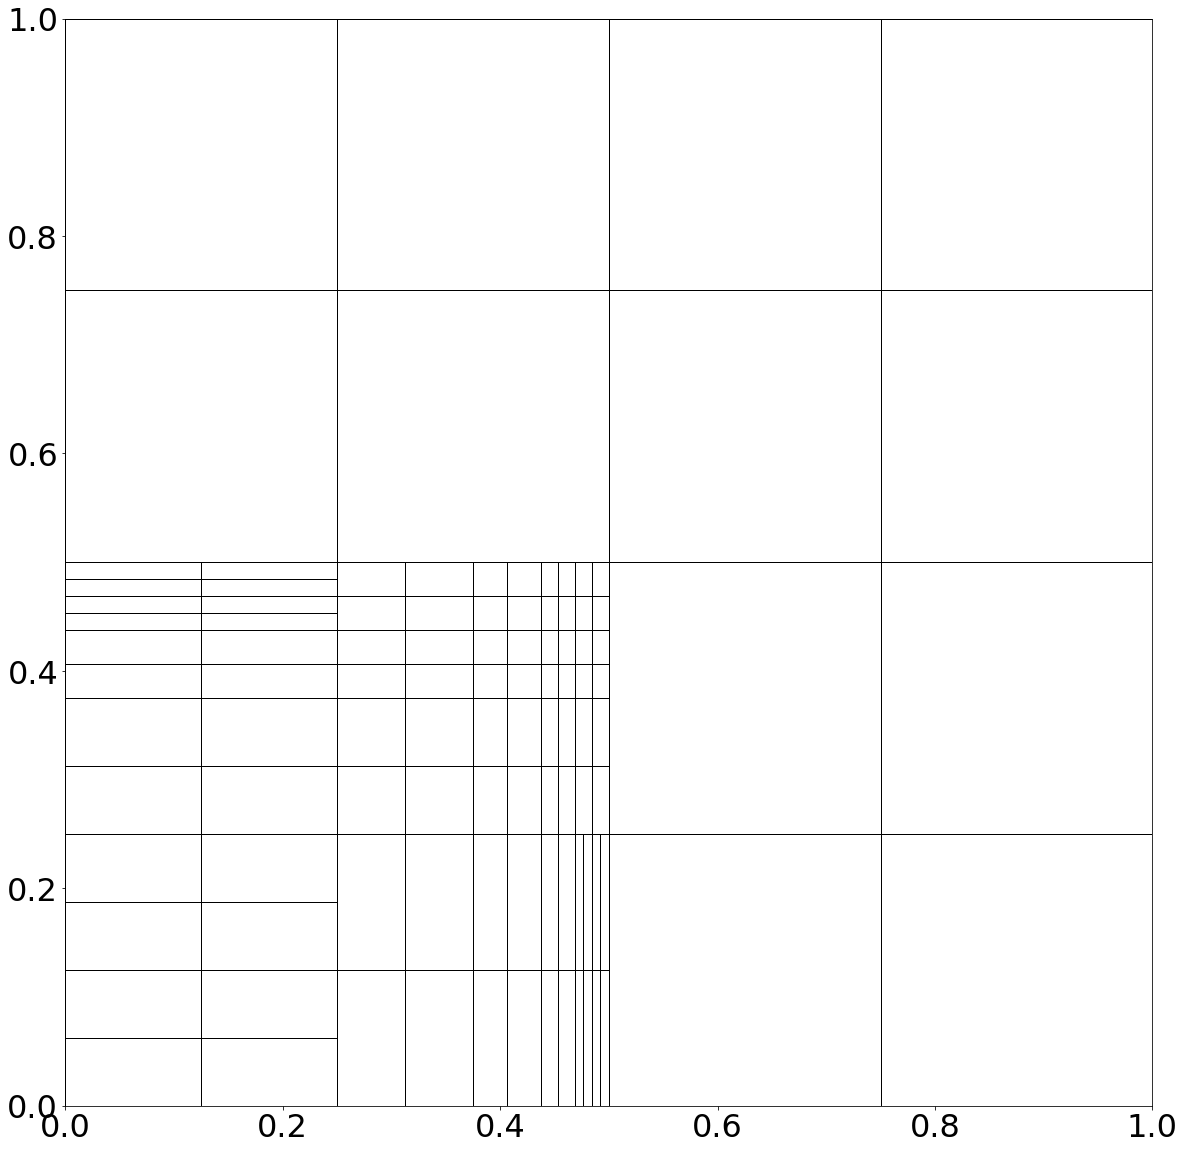

Combi Scheme:


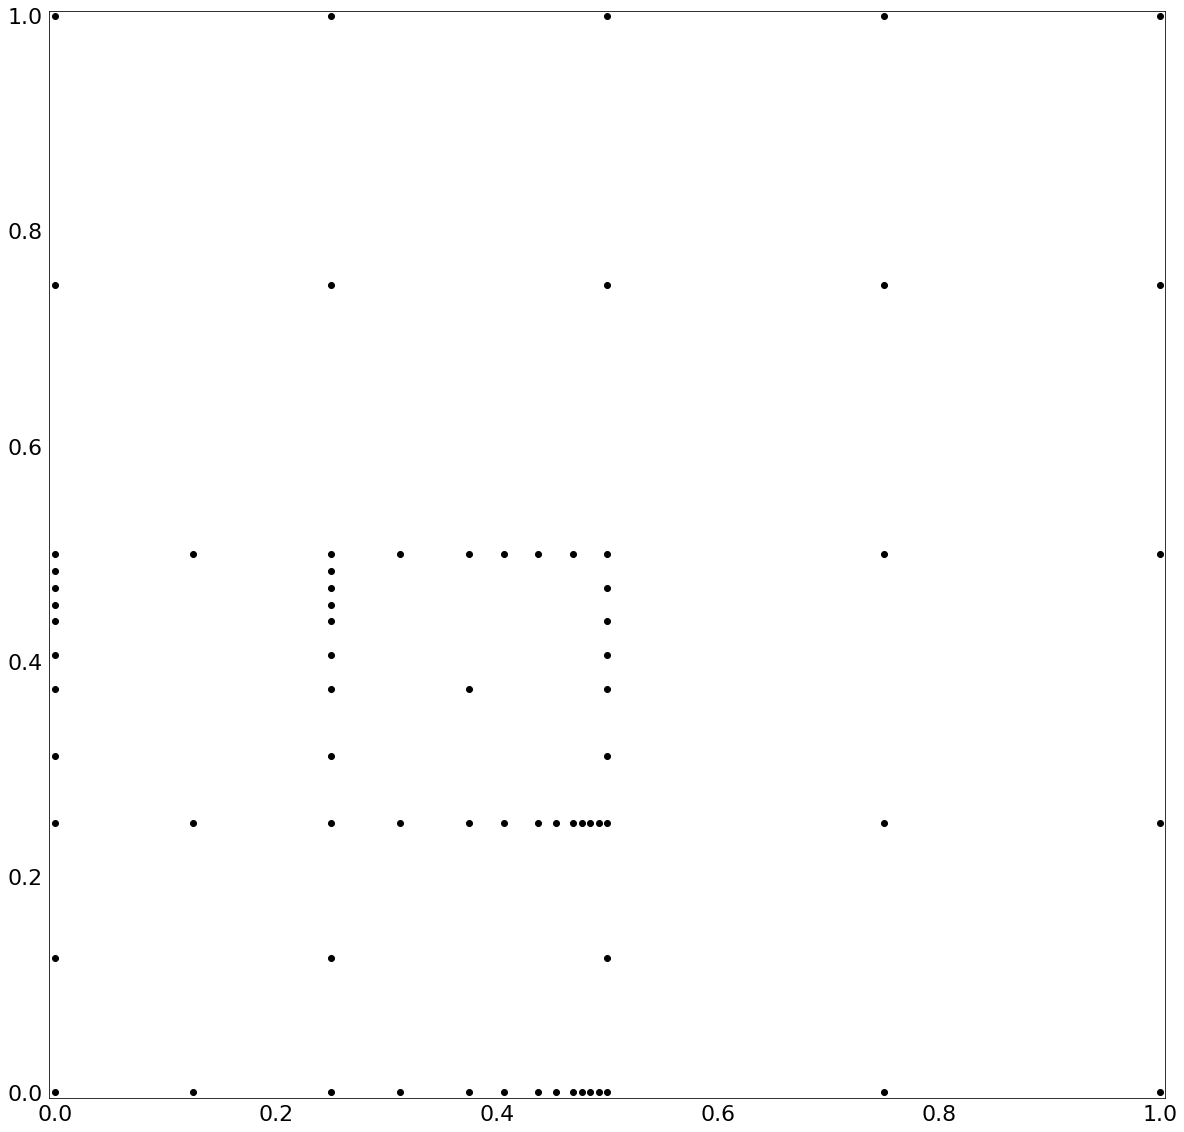

Resulting Sparse Grid:


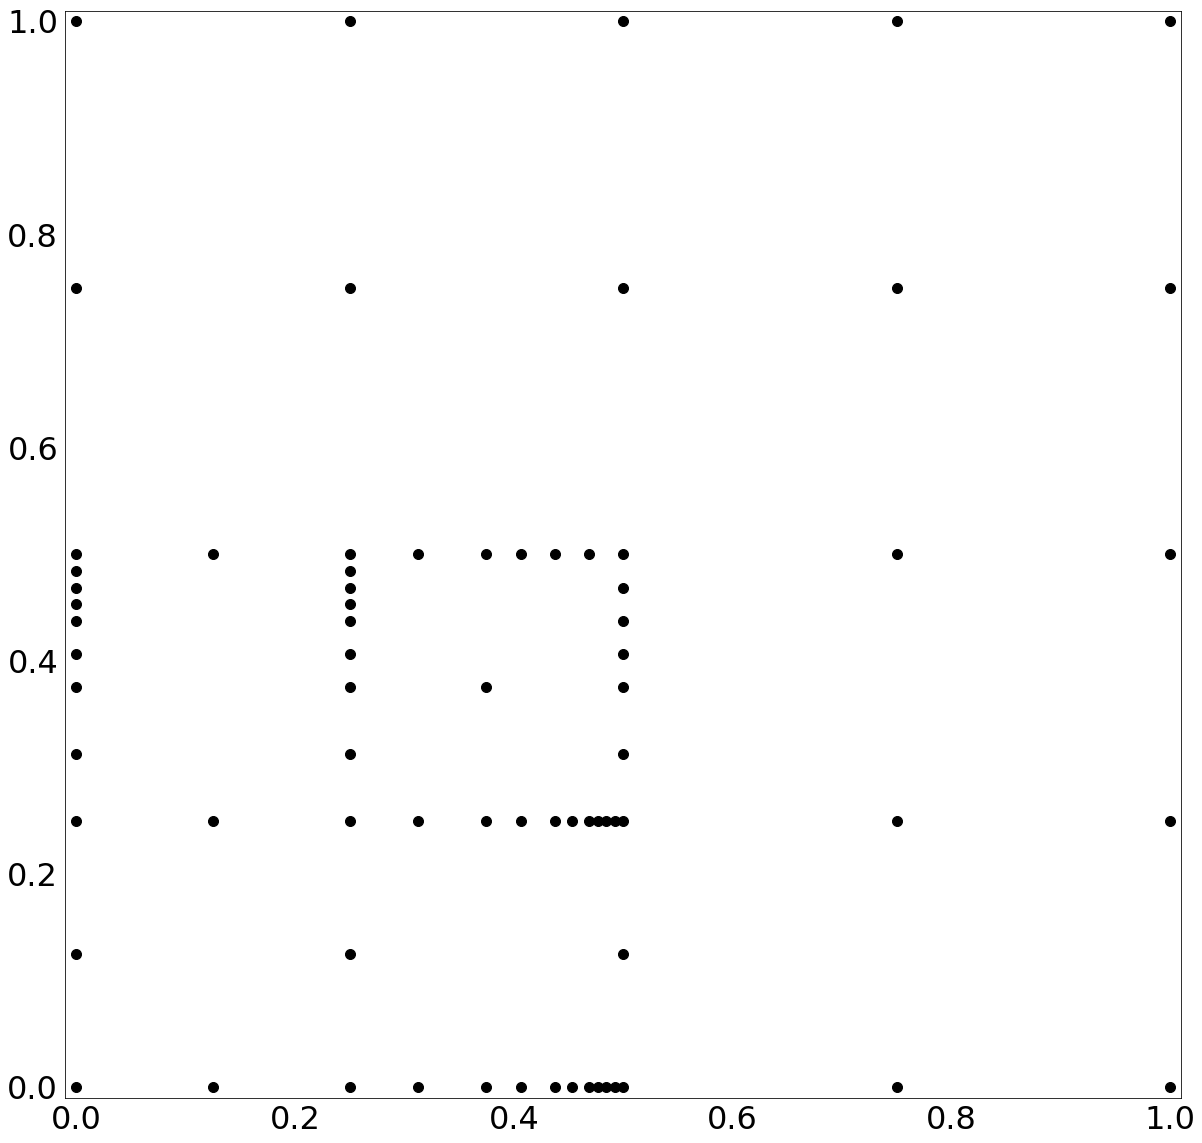

max surplus error: 0.00031920158776 total surplus error: 0.00364563975674
combiintegral: 0.1204825106
Current error: 0.0311797853687
Finished refinement
Refinement Graph:


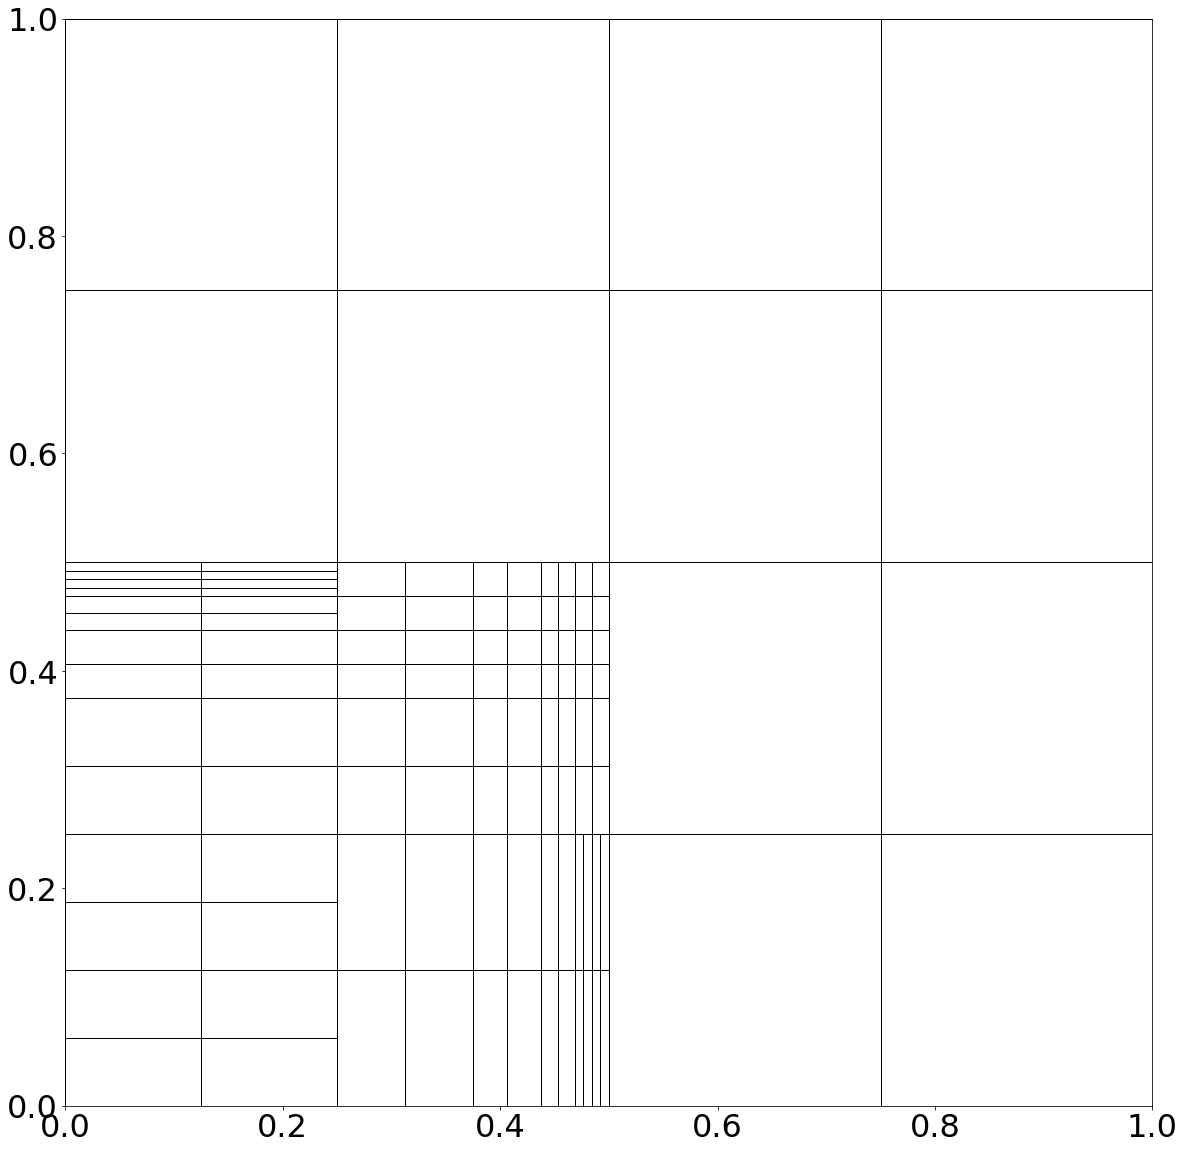

Combi Scheme:


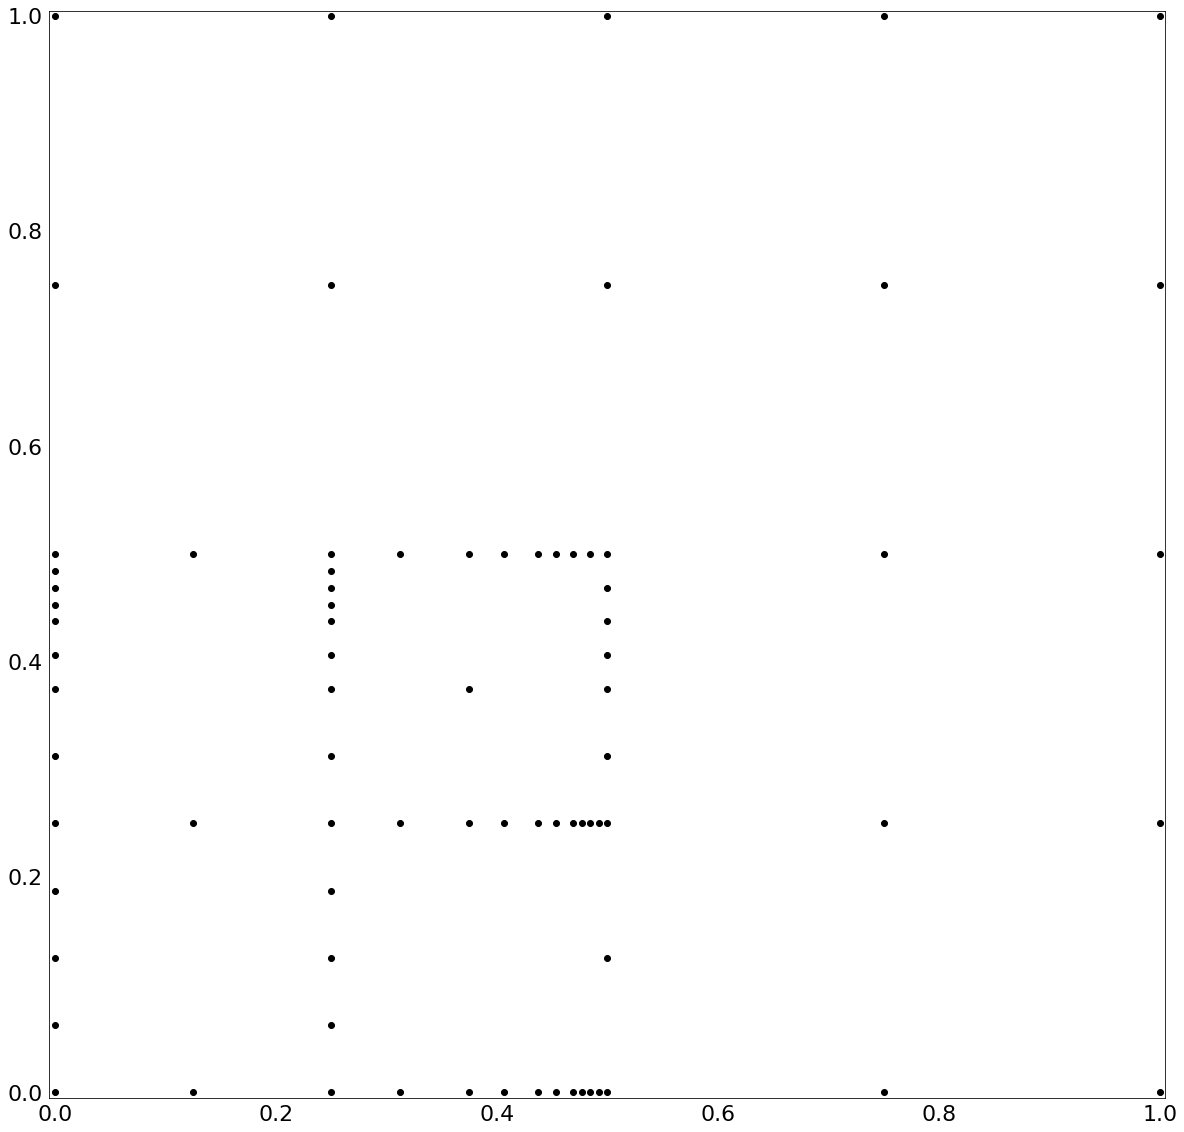

Resulting Sparse Grid:


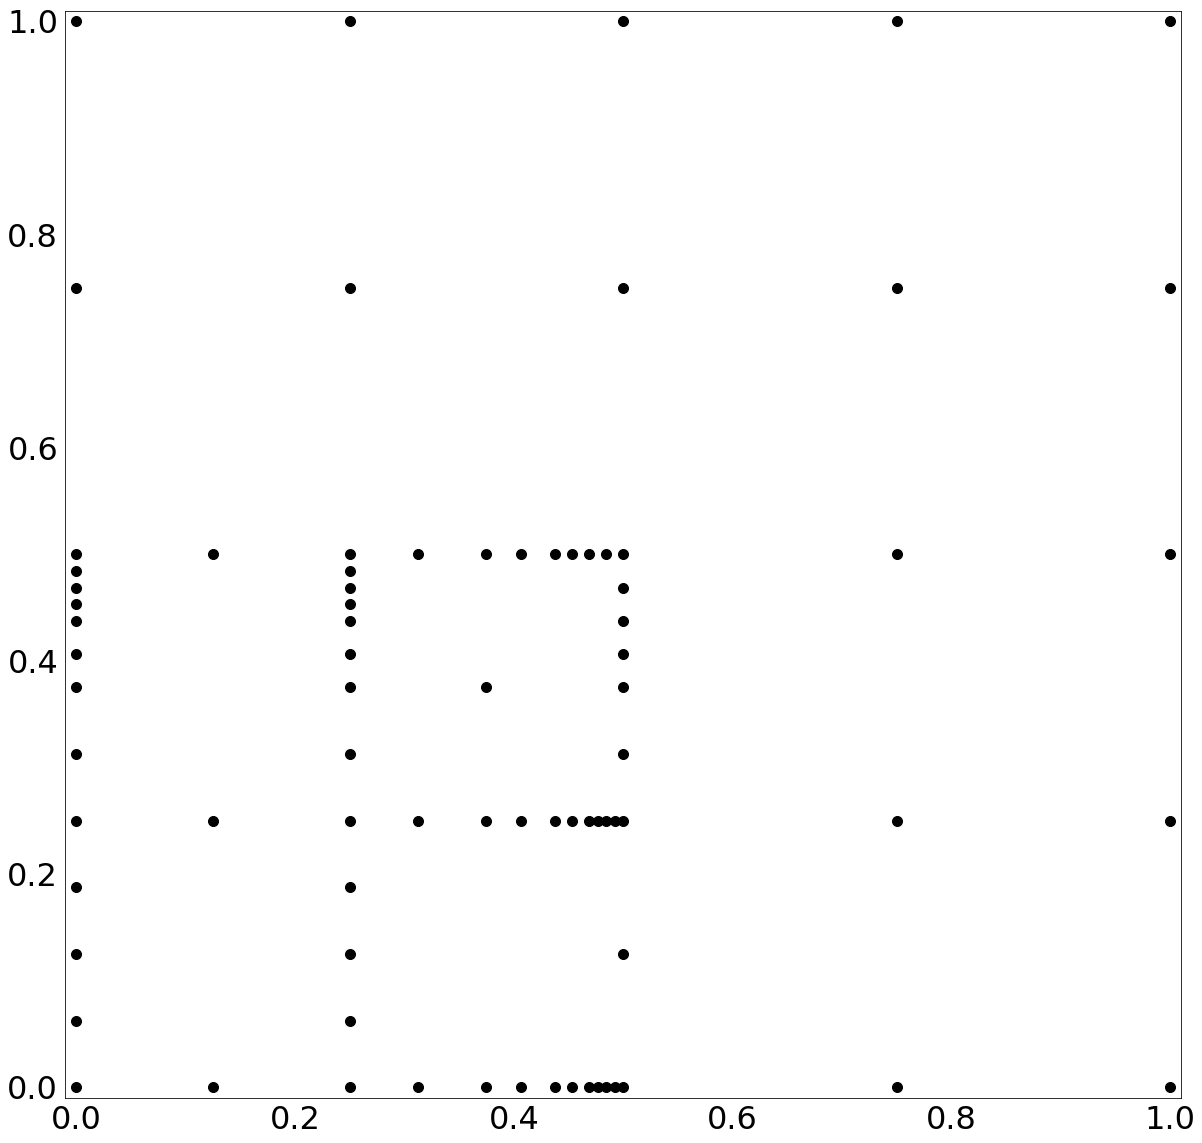

max surplus error: 0.000278626044984 total surplus error: 0.00332676265026
combiintegral: 0.120801873161
Current error: 0.0286117370829
Finished refinement
Refinement Graph:


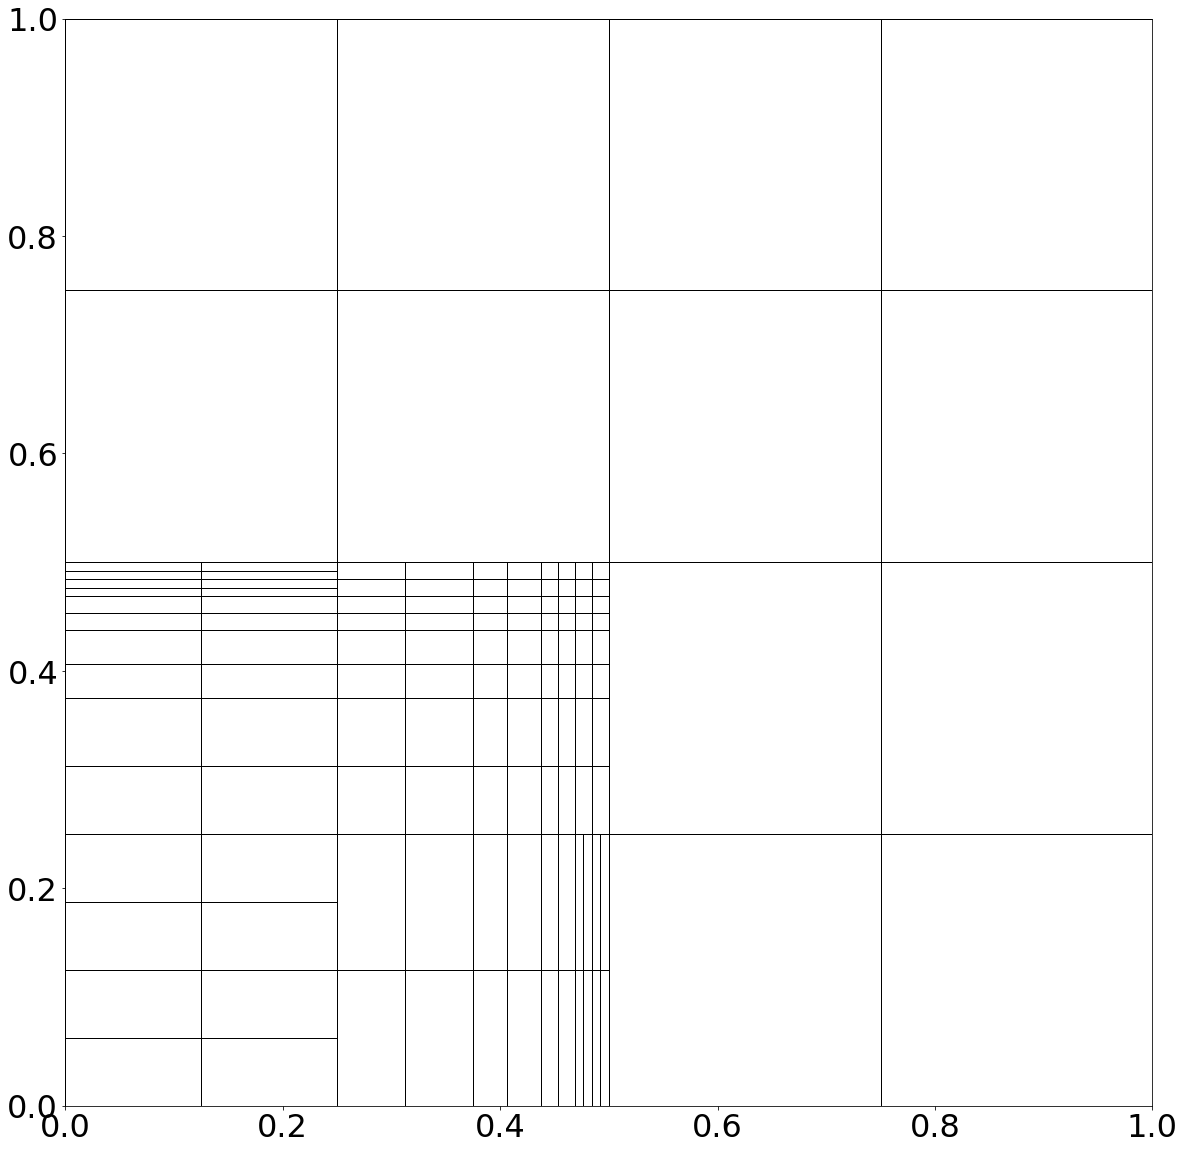

Combi Scheme:


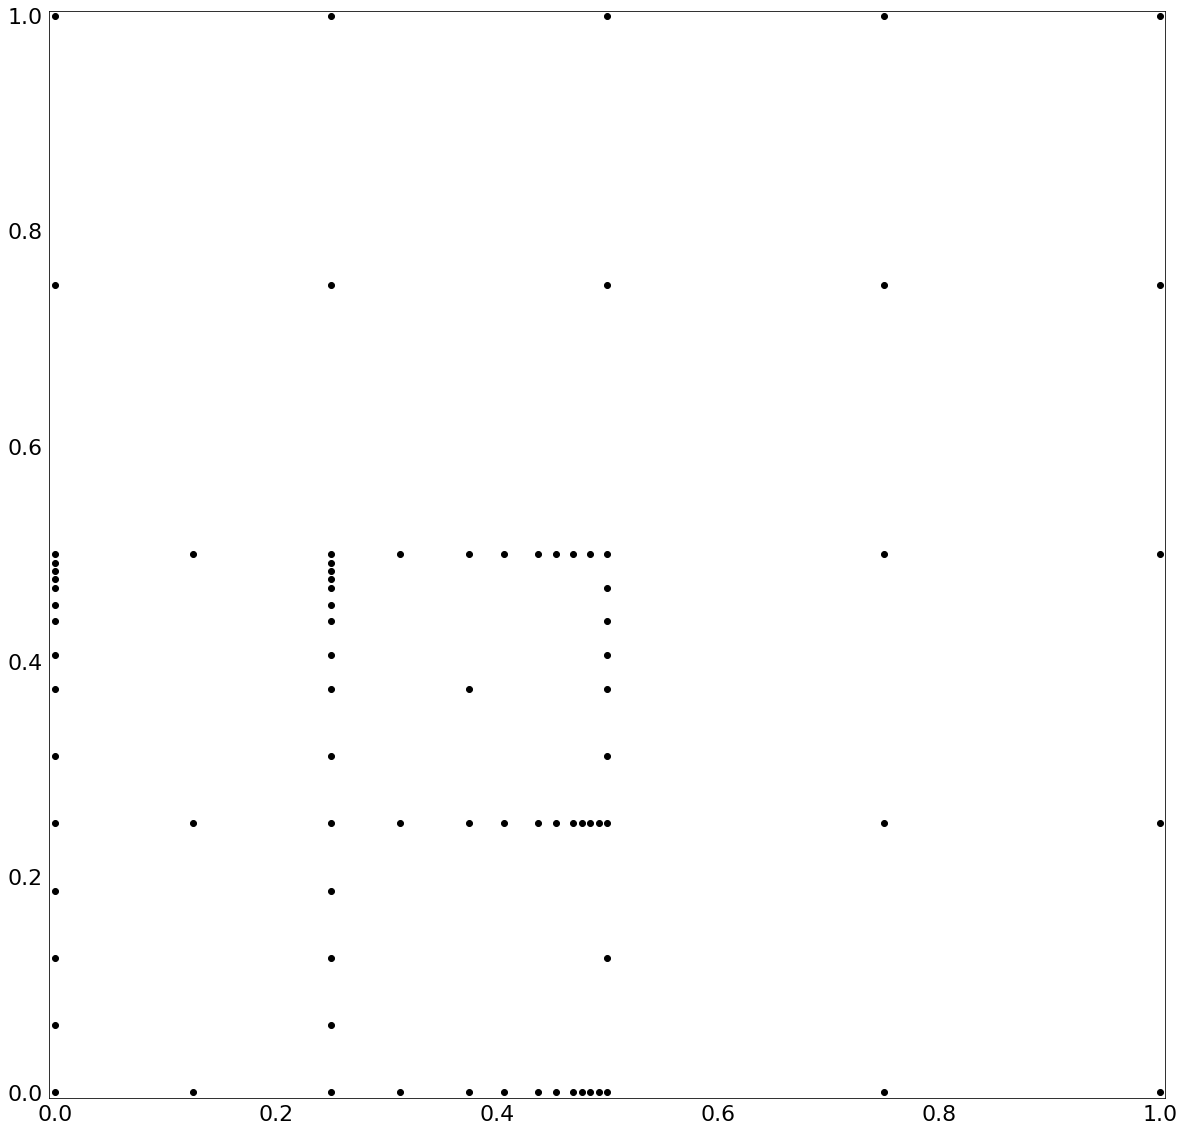

Resulting Sparse Grid:


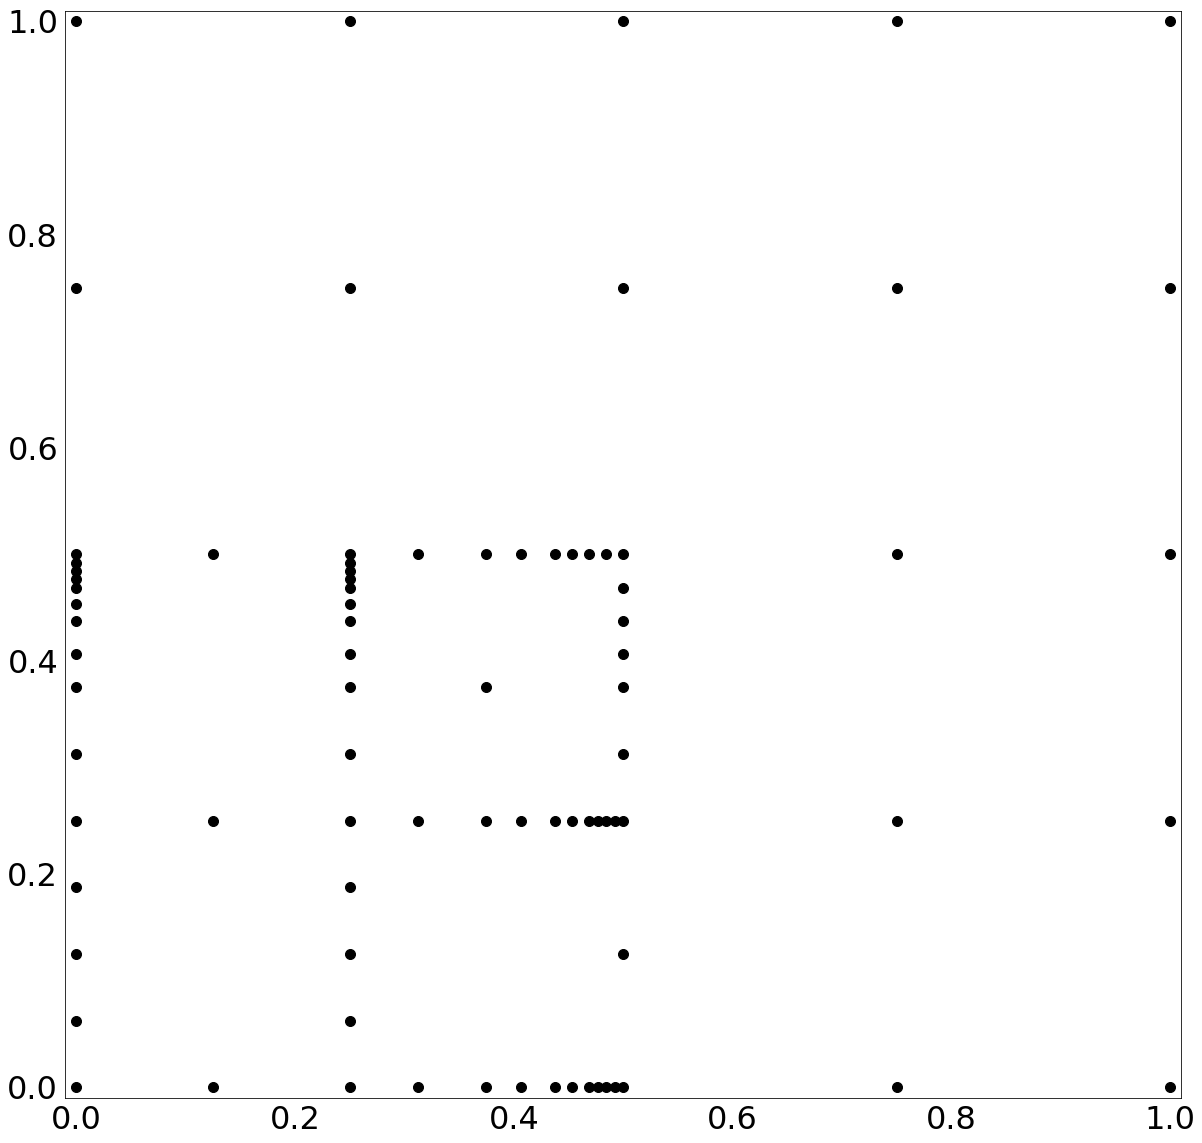

max surplus error: 0.000237878457239 total surplus error: 0.0030493185838
combiintegral: 0.121081080962
Current error: 0.0263665800045
Finished refinement
Refinement Graph:


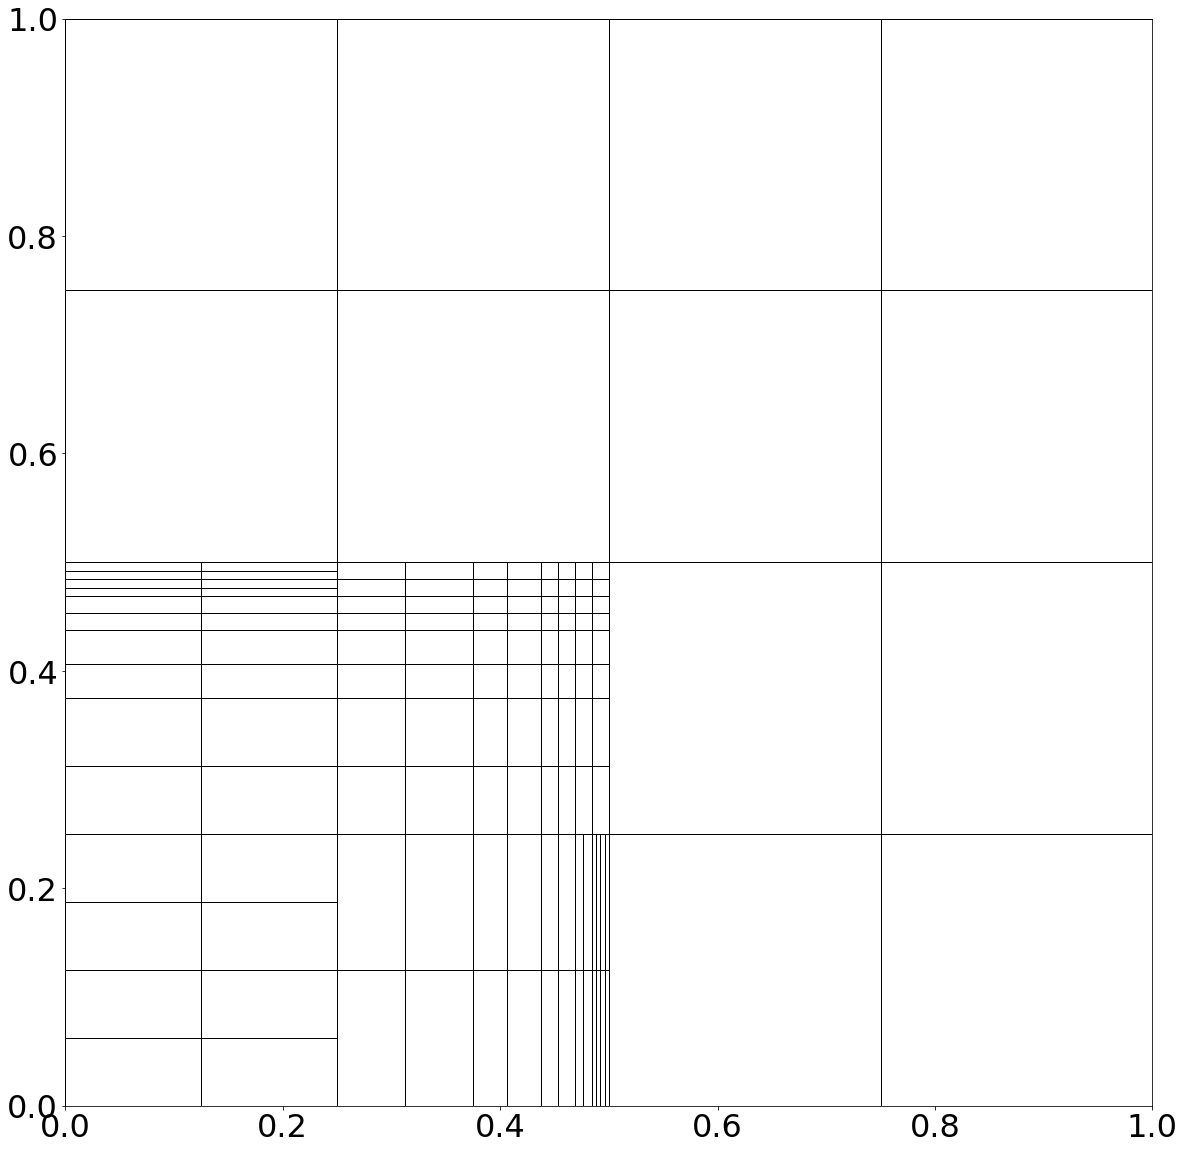

Combi Scheme:


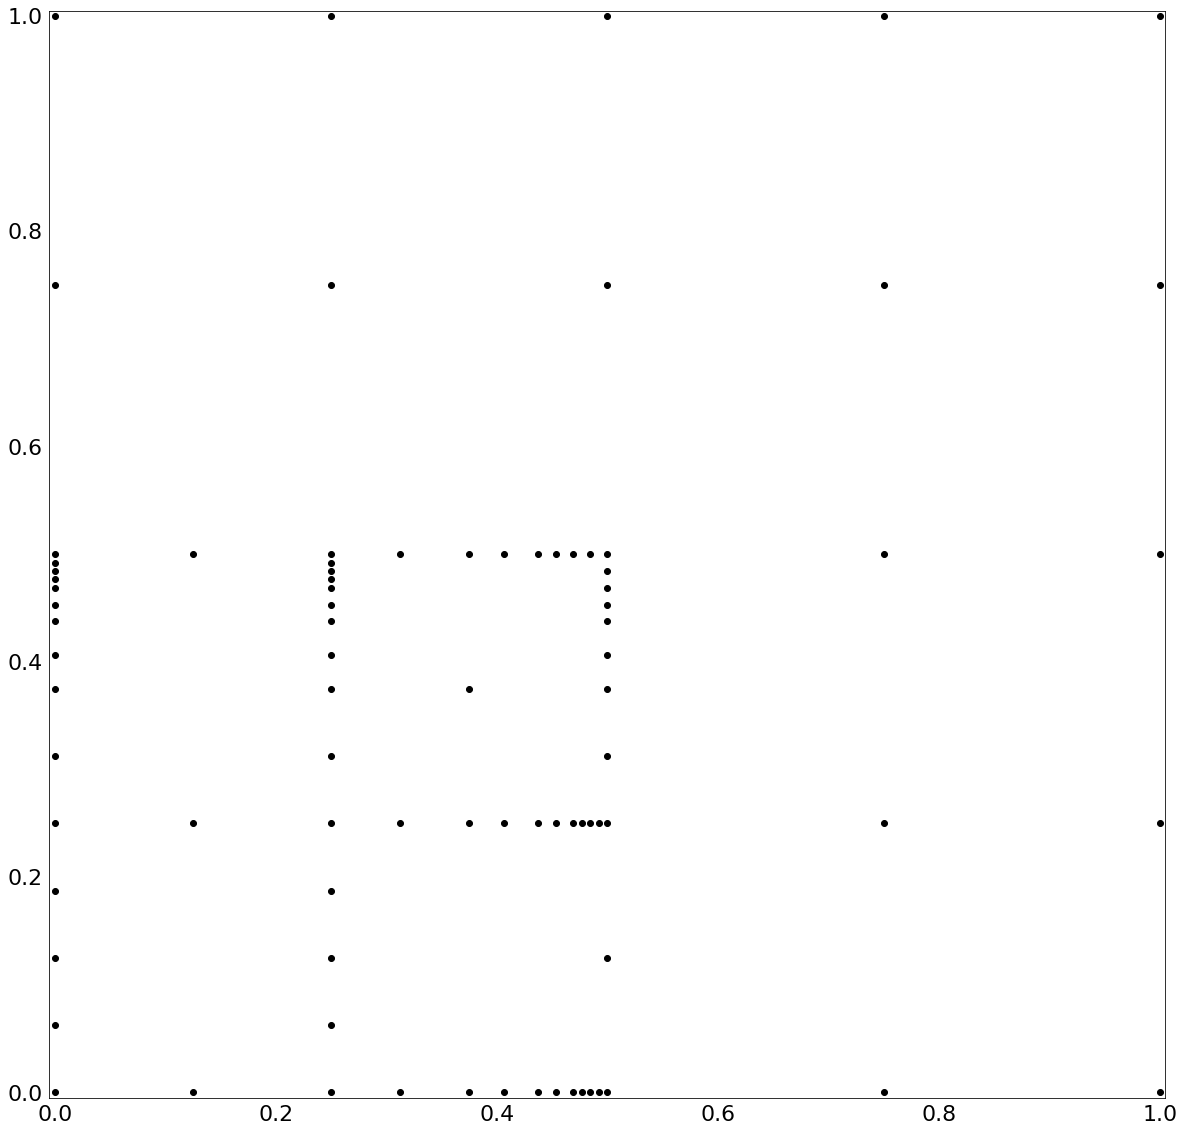

Resulting Sparse Grid:


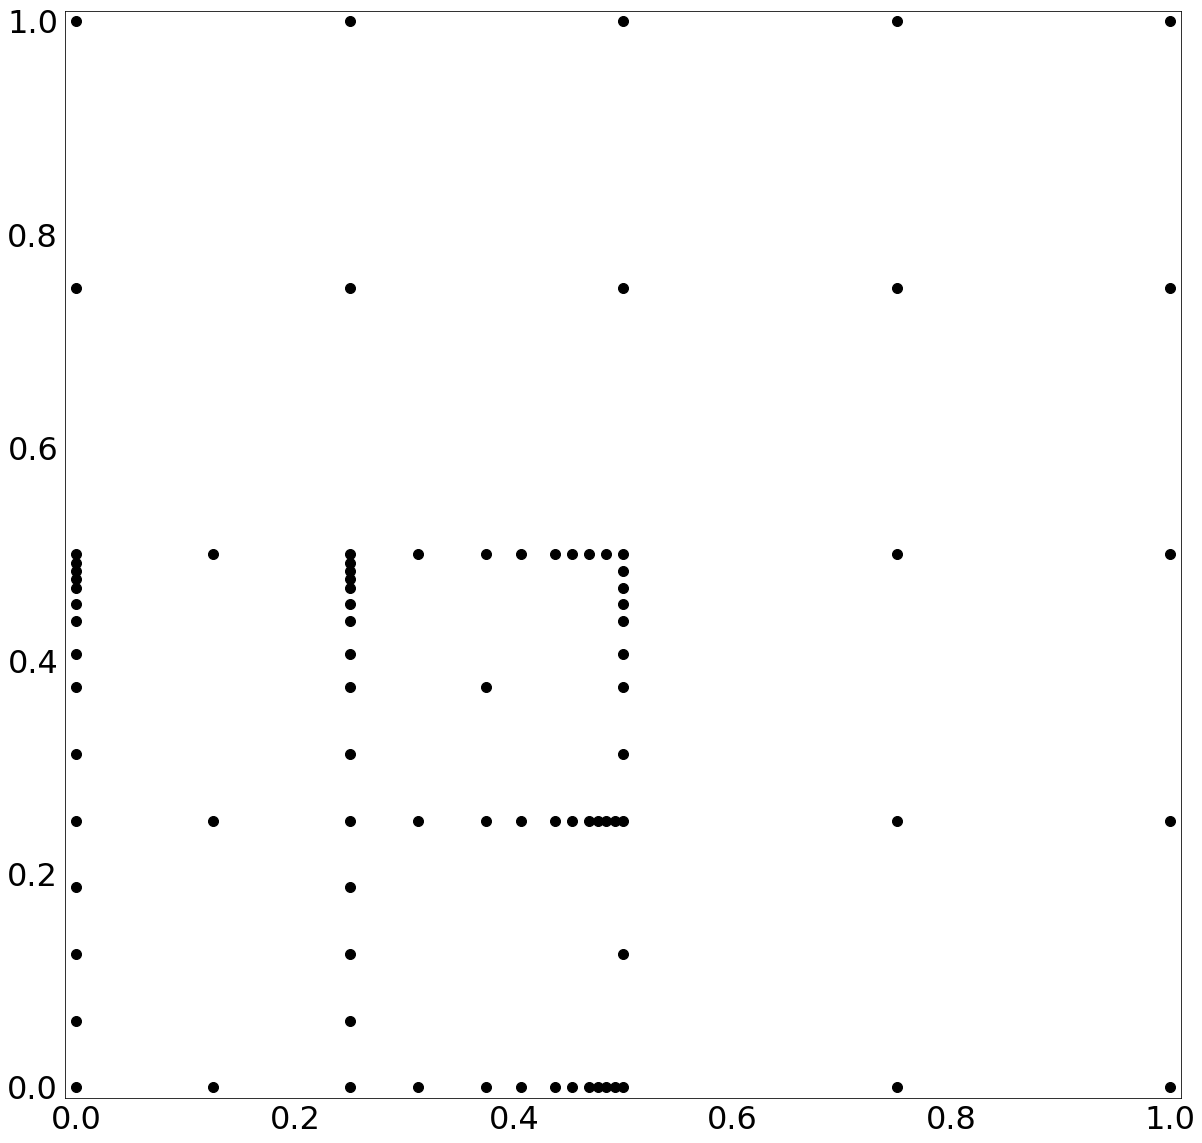

max surplus error: 0.000196770996557 total surplus error: 0.00281145478894
combiintegral: 0.121318966736
Current error: 0.0244537003212
Finished refinement
Refinement Graph:


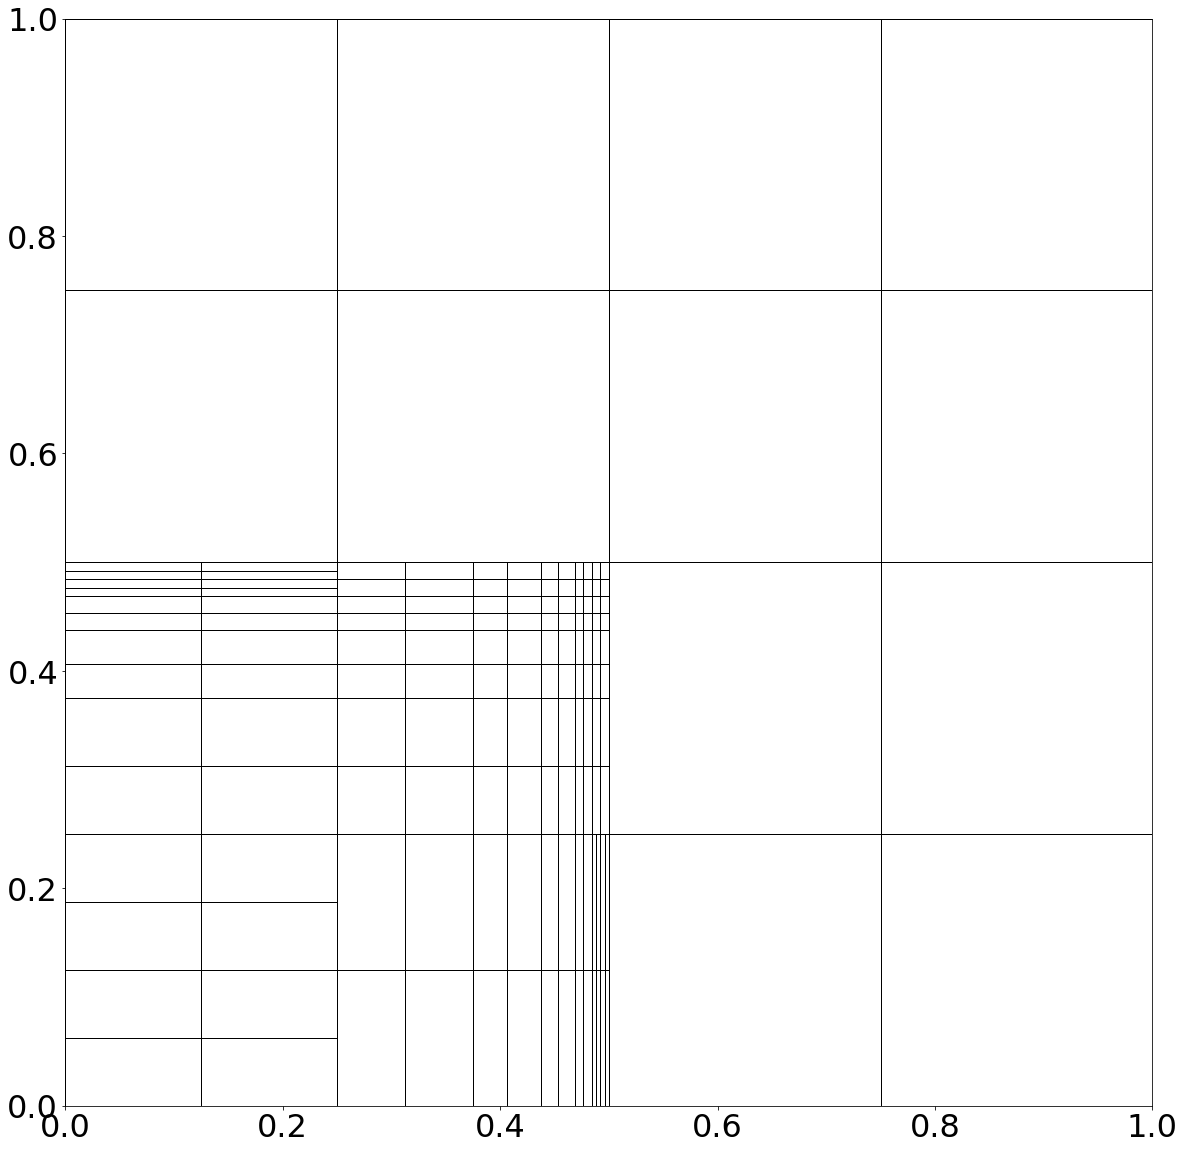

Combi Scheme:


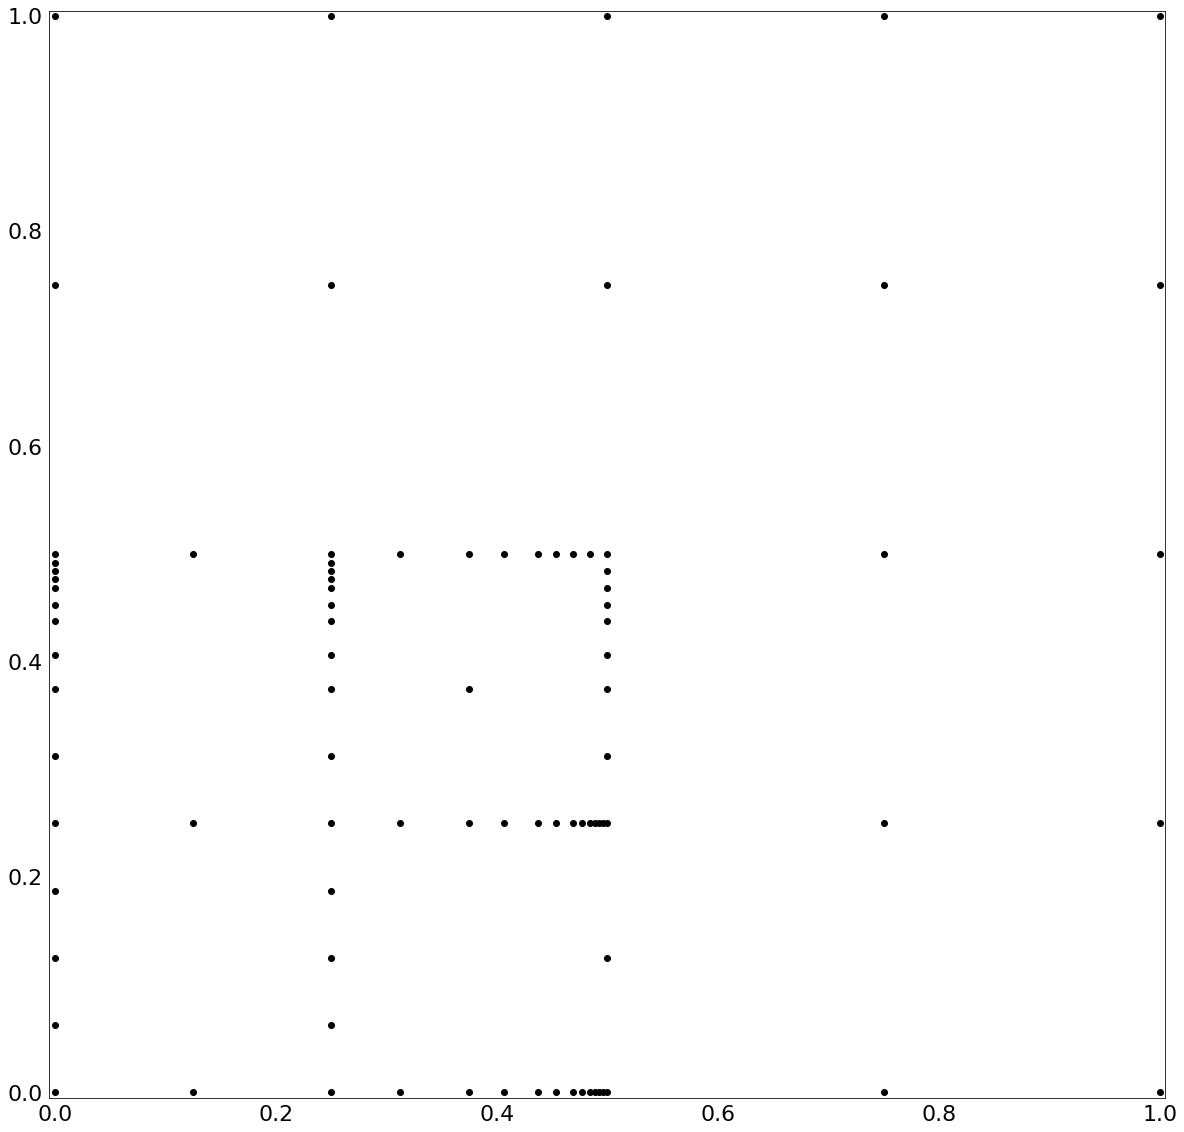

Resulting Sparse Grid:


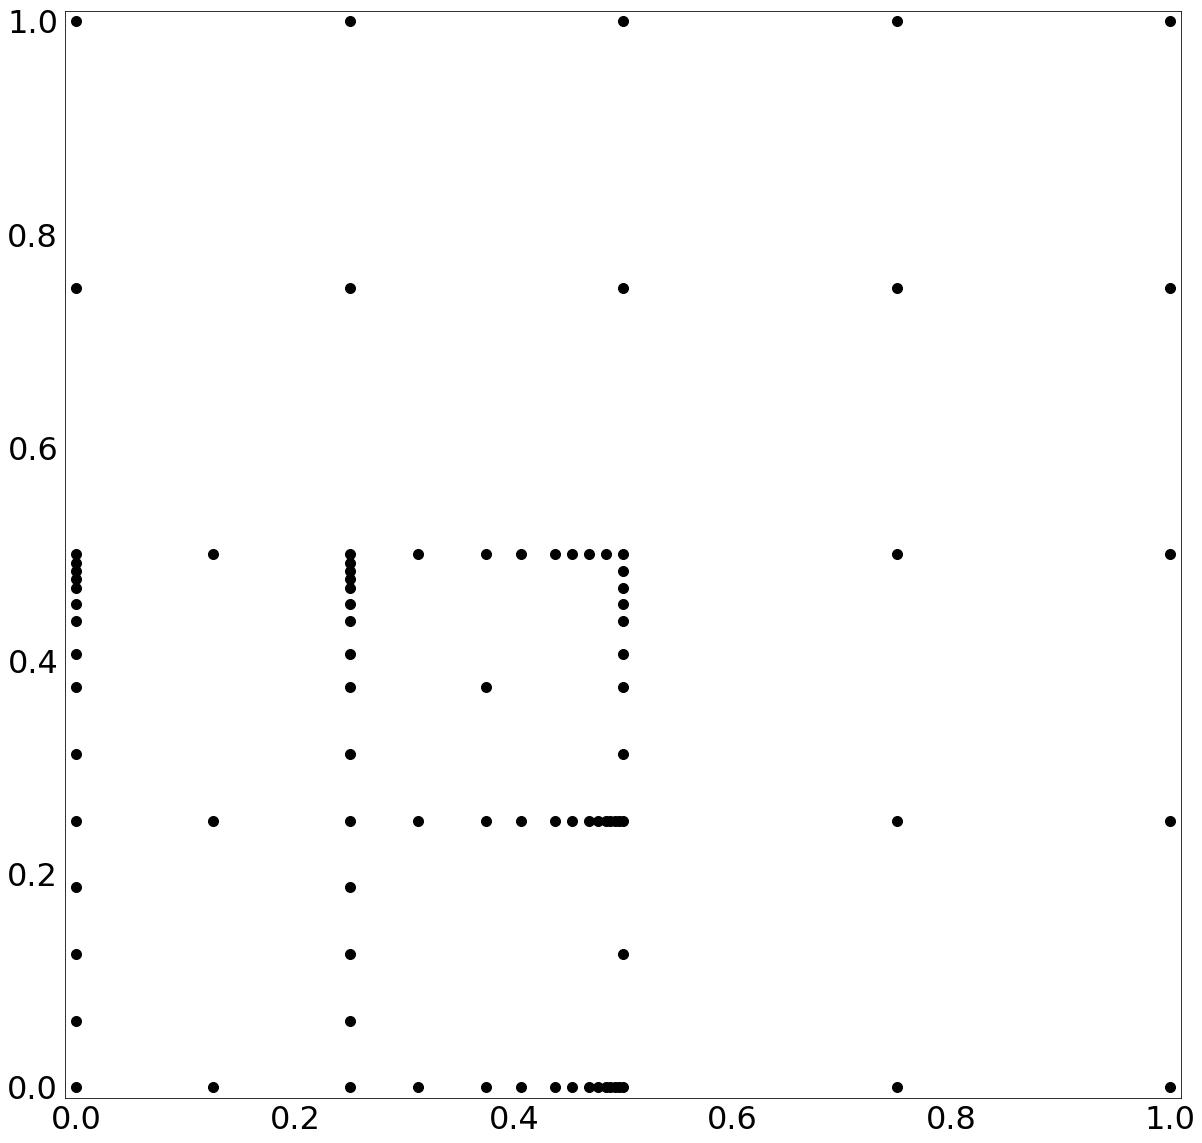

max surplus error: 0.000159722157488 total surplus error: 0.00266429562635
combiintegral: 0.122318037286
Current error: 0.0164200053019
Finished refinement
Refinement Graph:


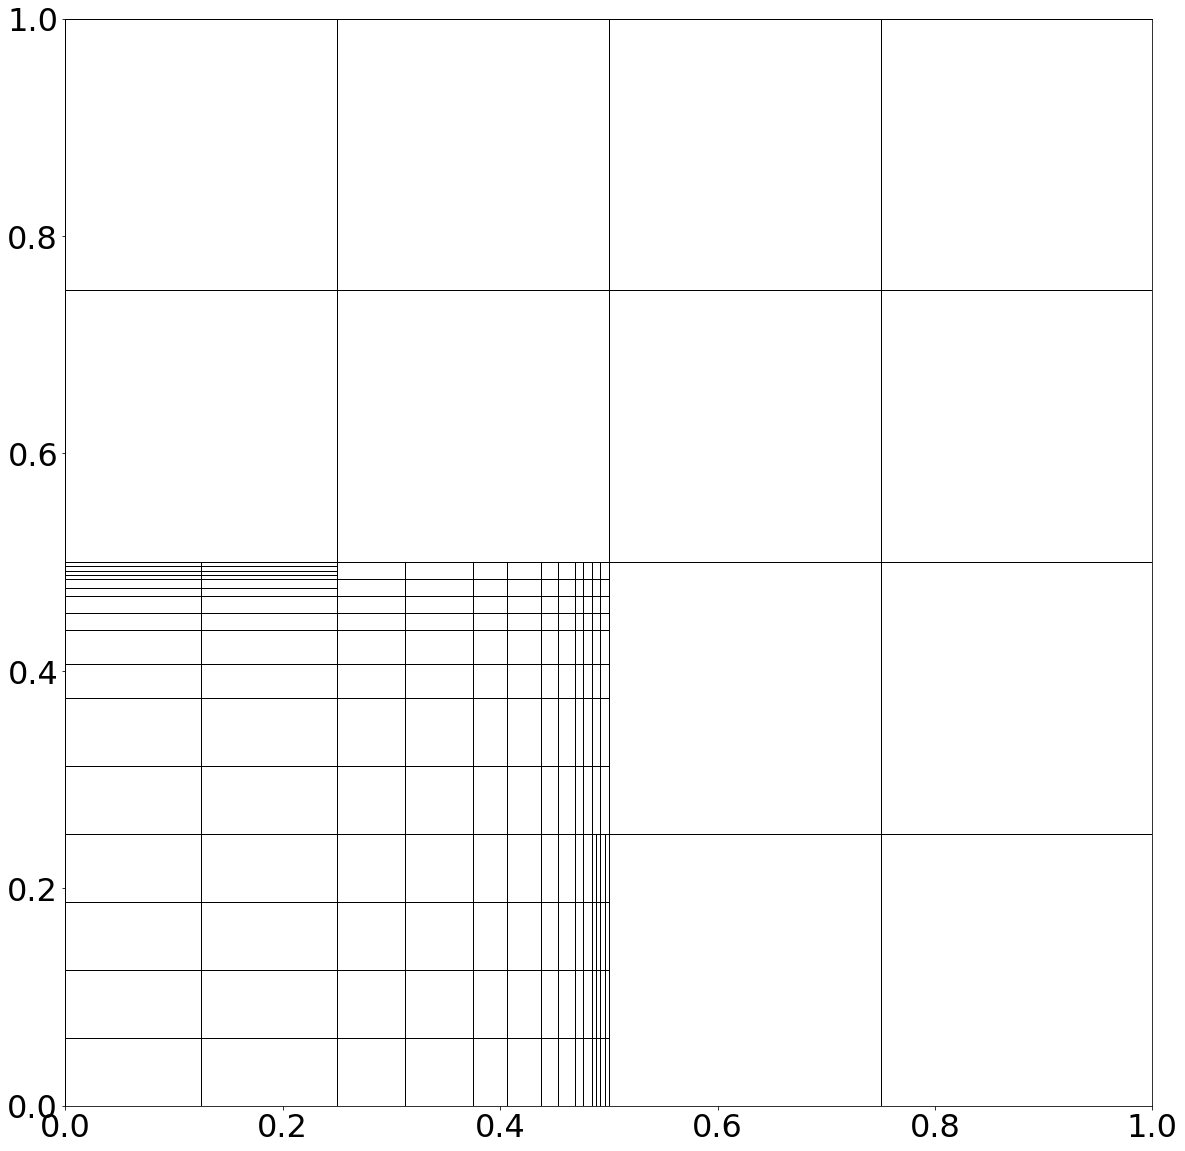

Combi Scheme:


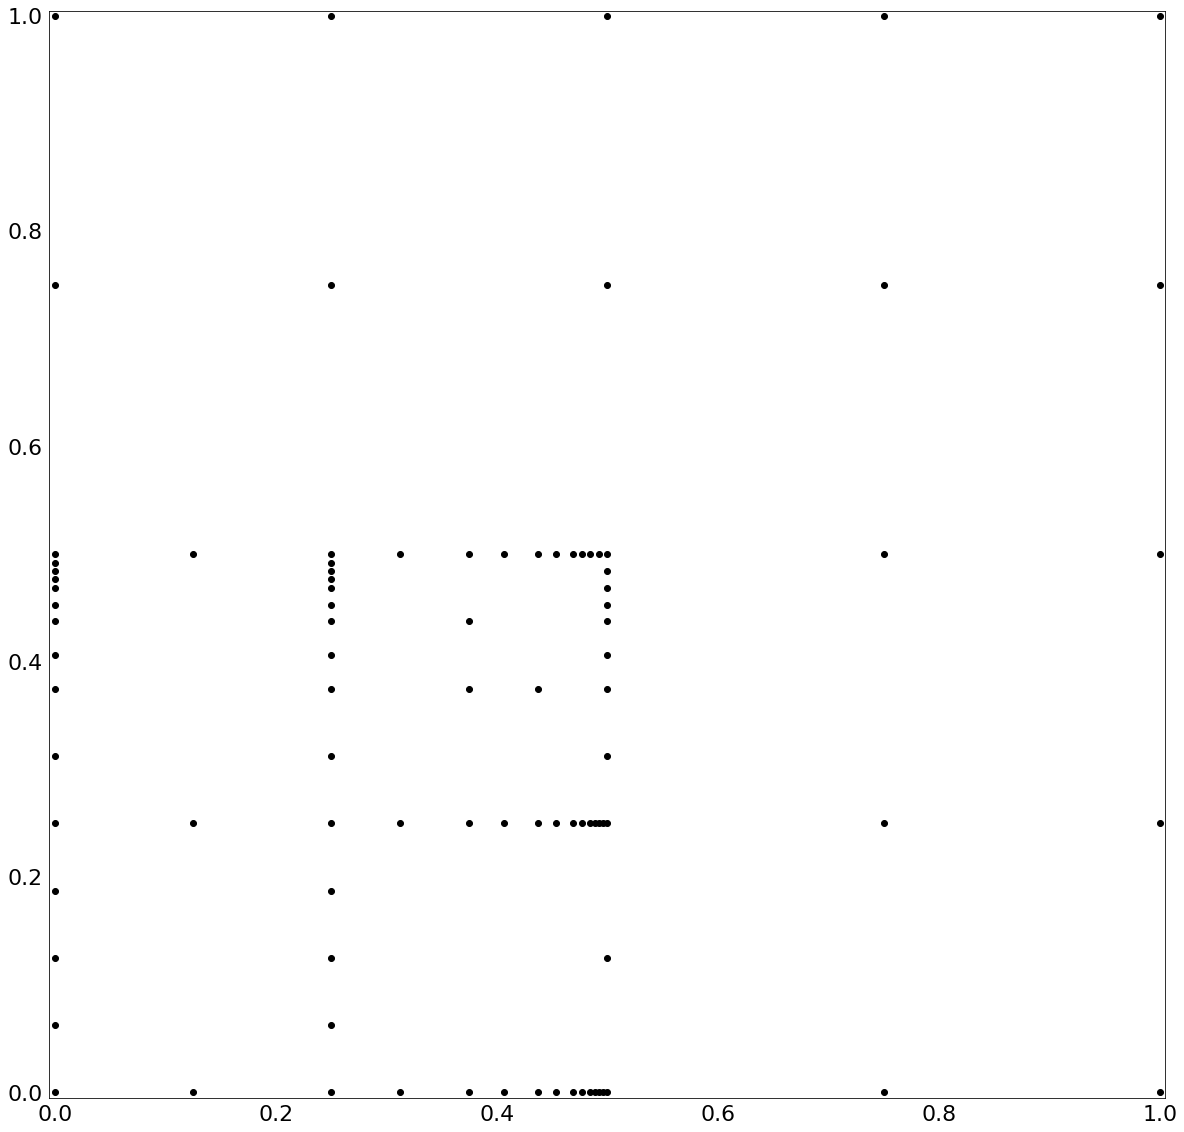

Resulting Sparse Grid:


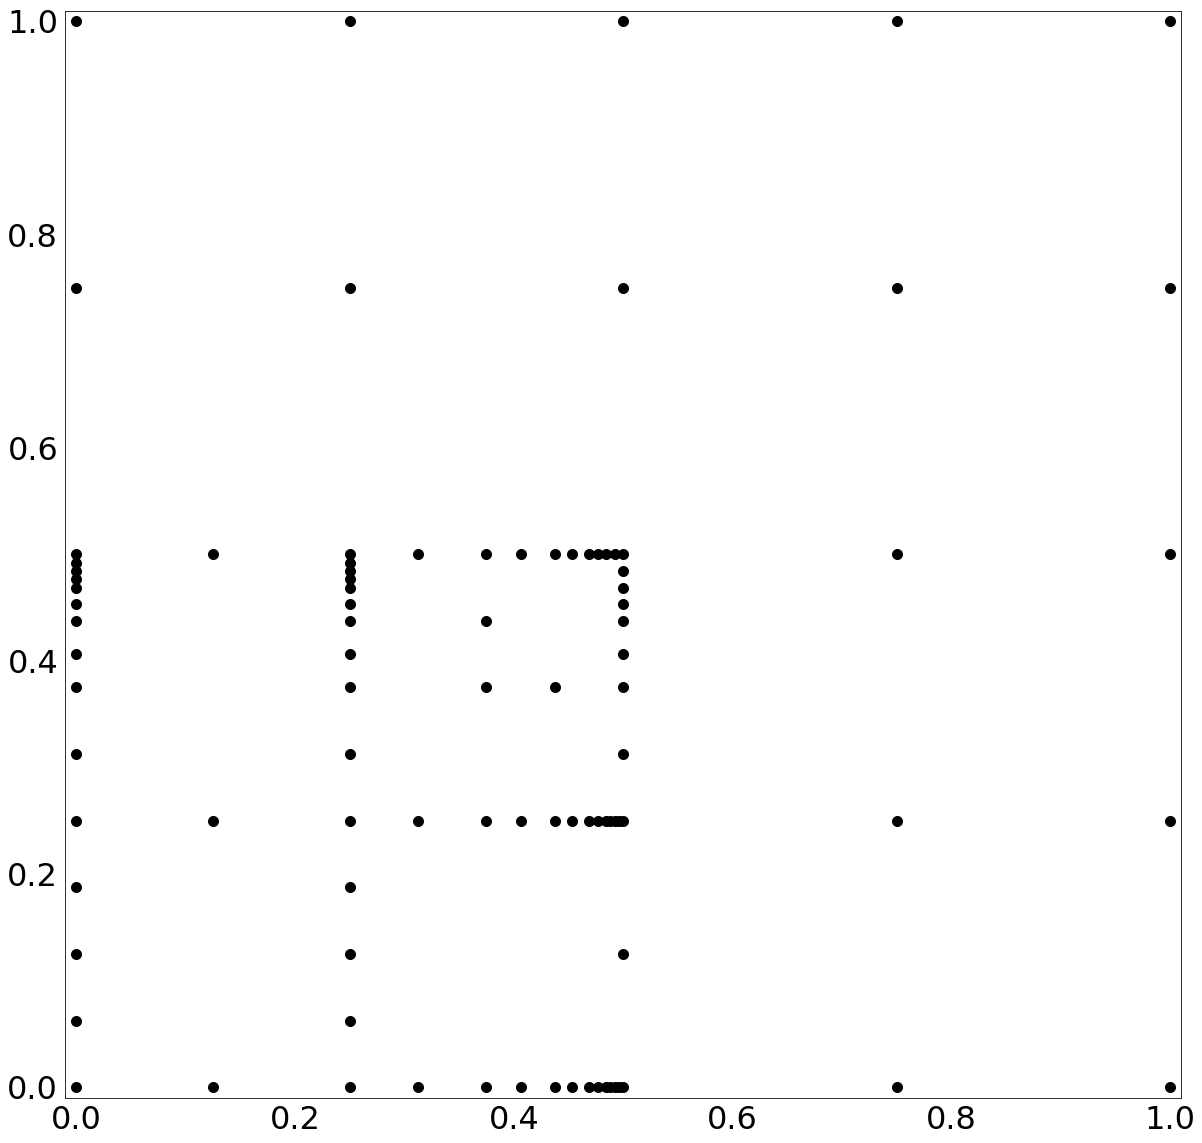

max surplus error: 0.000139753956076 total surplus error: 0.0023954963458
combiintegral: 0.122289192897
Current error: 0.0166519479047
Finished refinement
Refinement Graph:


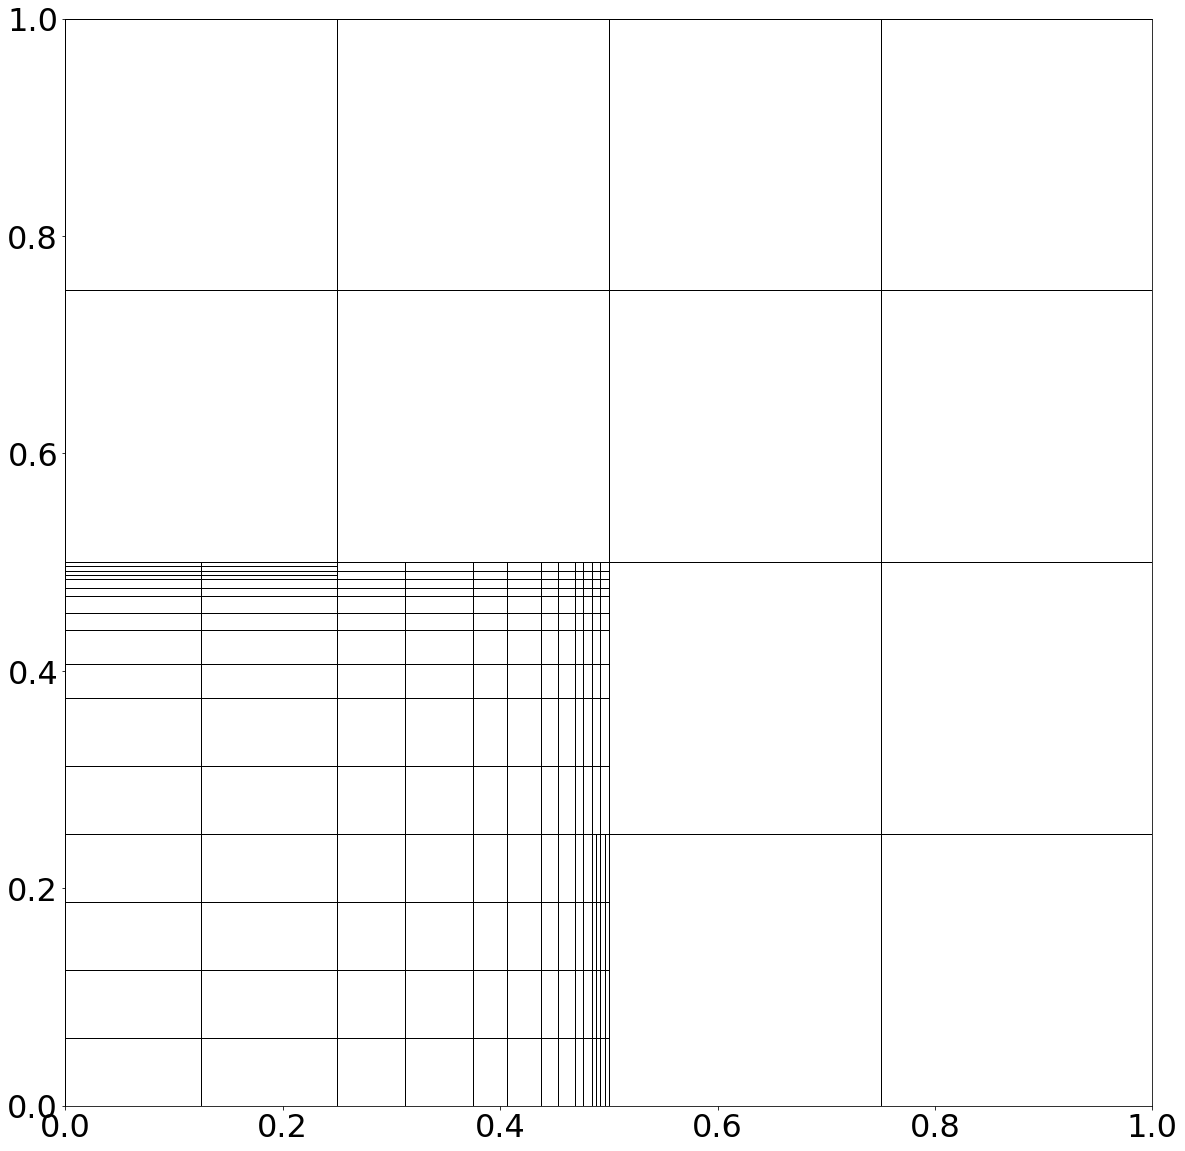

Combi Scheme:


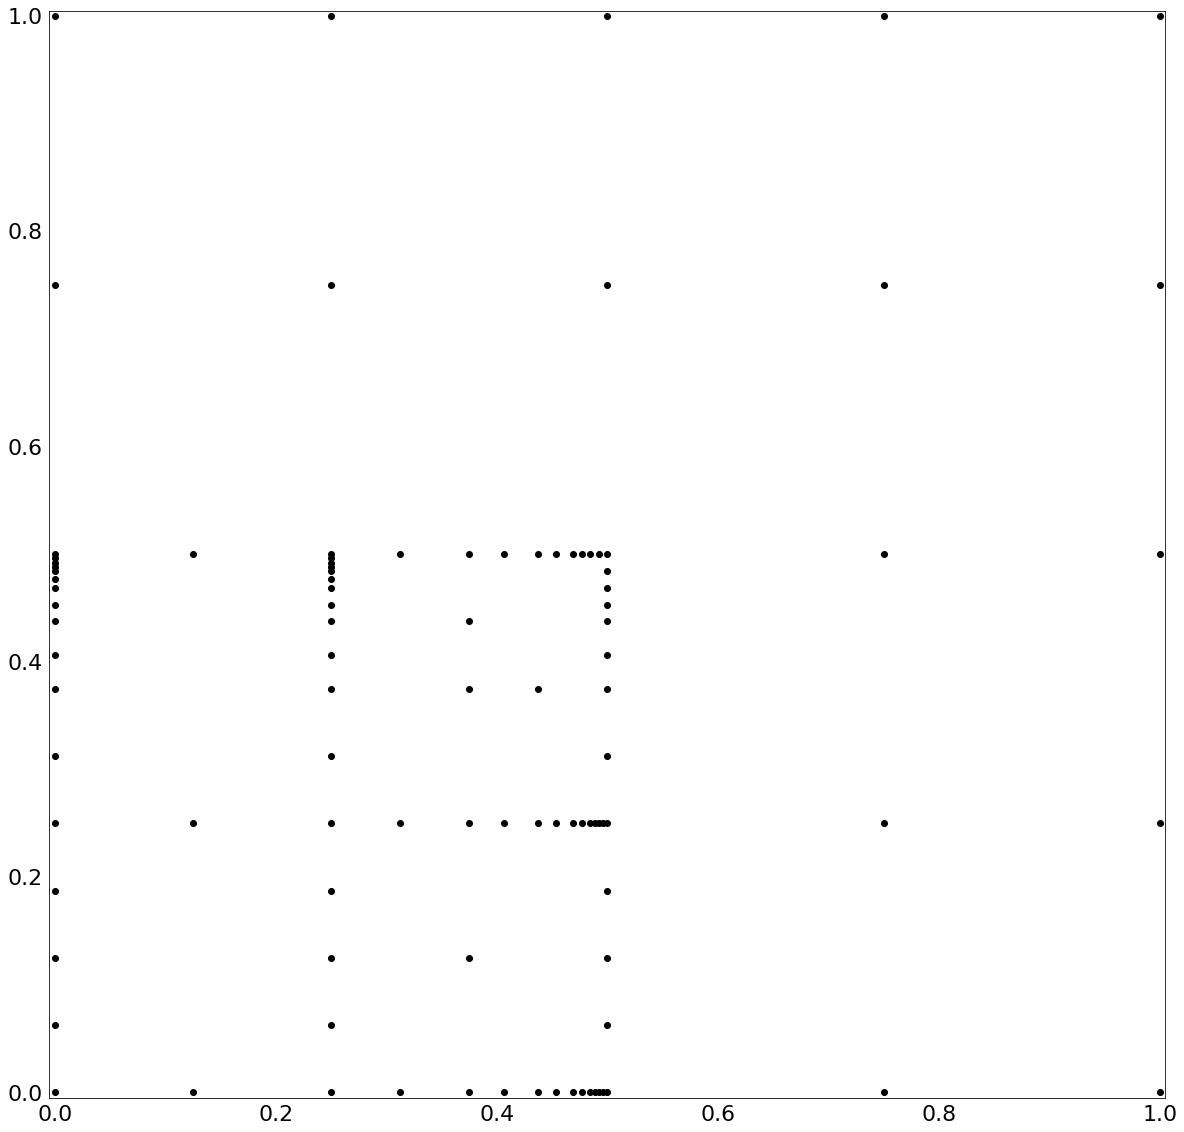

Resulting Sparse Grid:


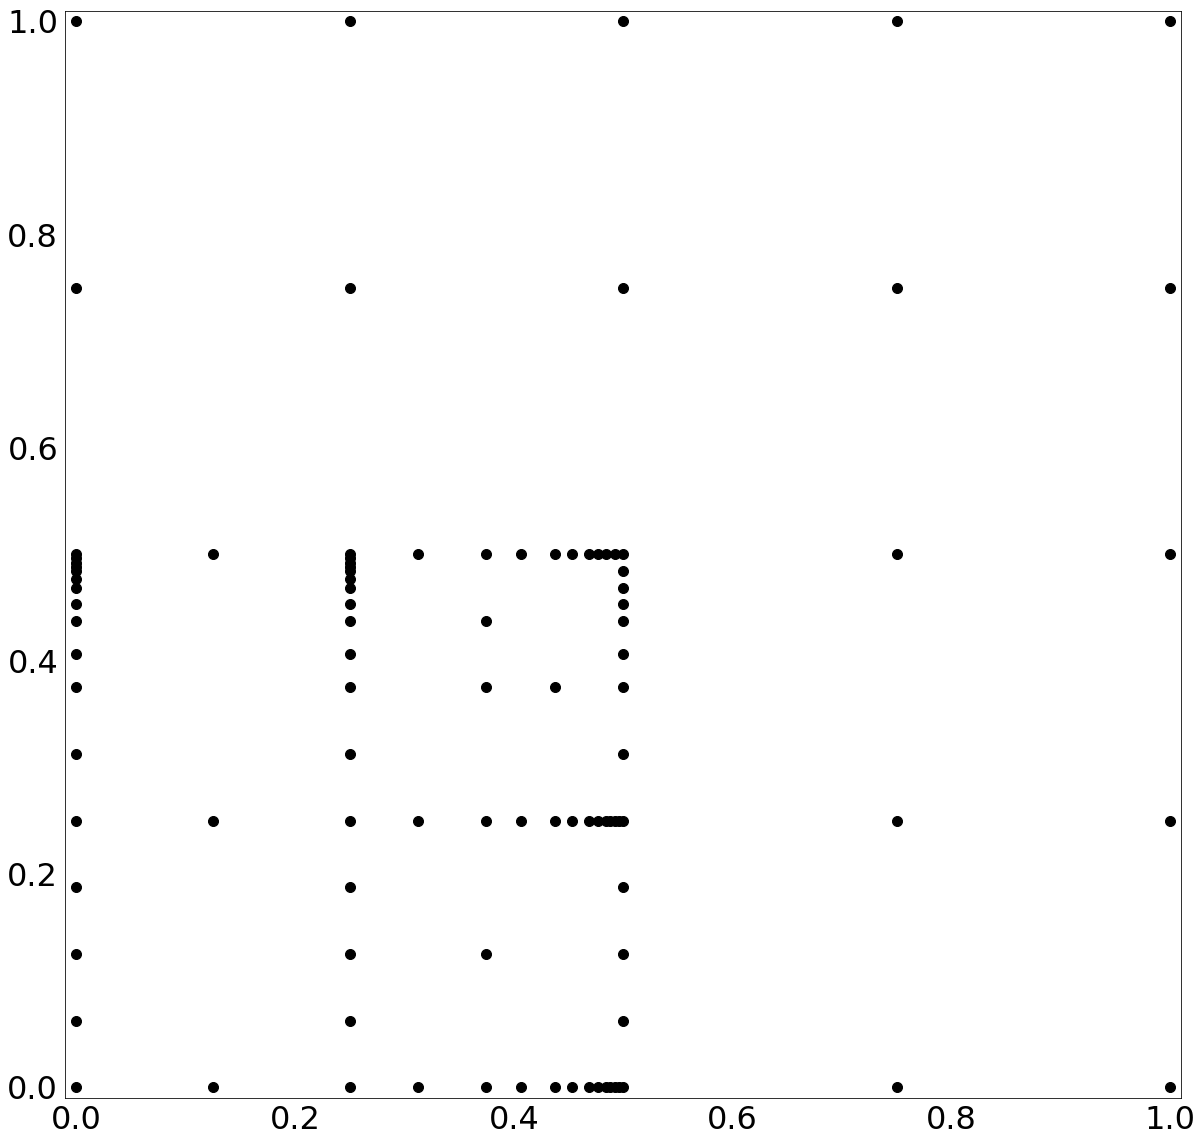

max surplus error: 0.000118944723432 total surplus error: 0.00225588445526
combiintegral: 0.122429017331
Current error: 0.0155275960184
Finished refinement
Refinement Graph:


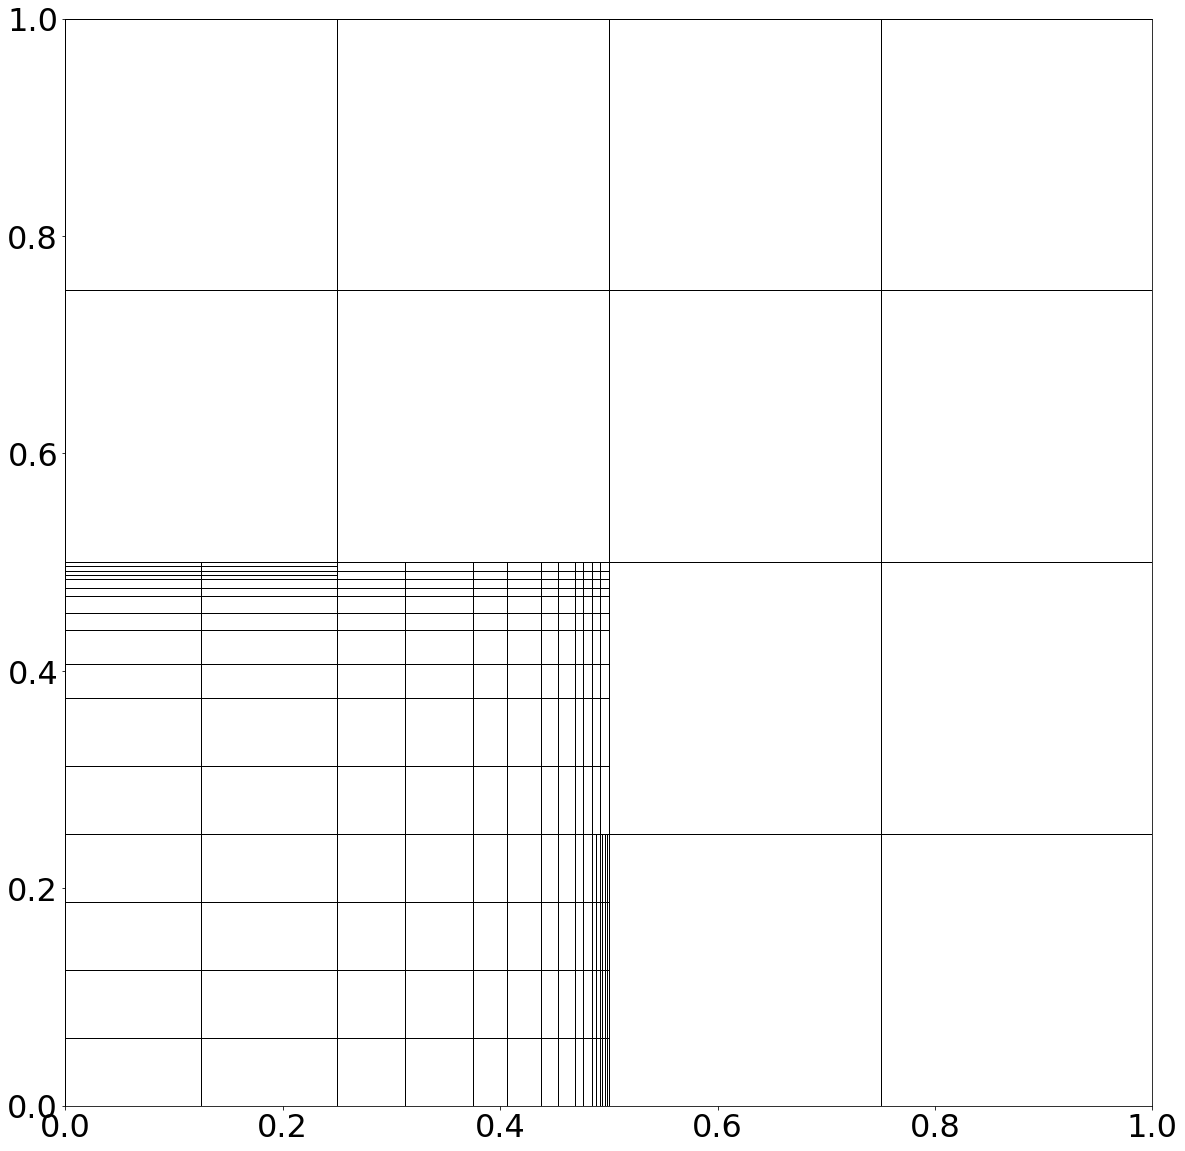

Combi Scheme:


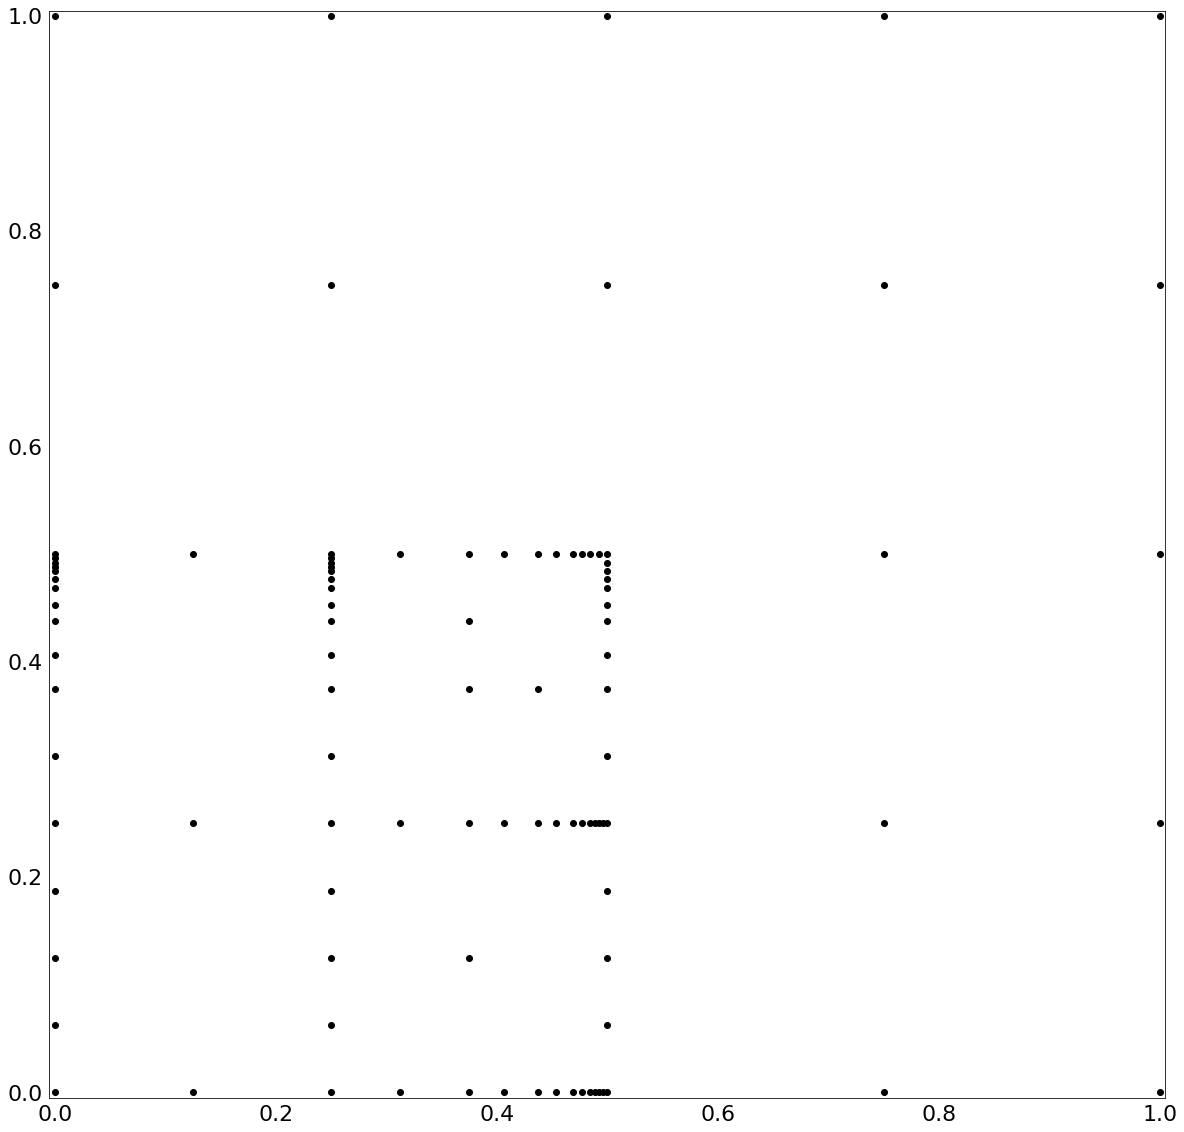

Resulting Sparse Grid:


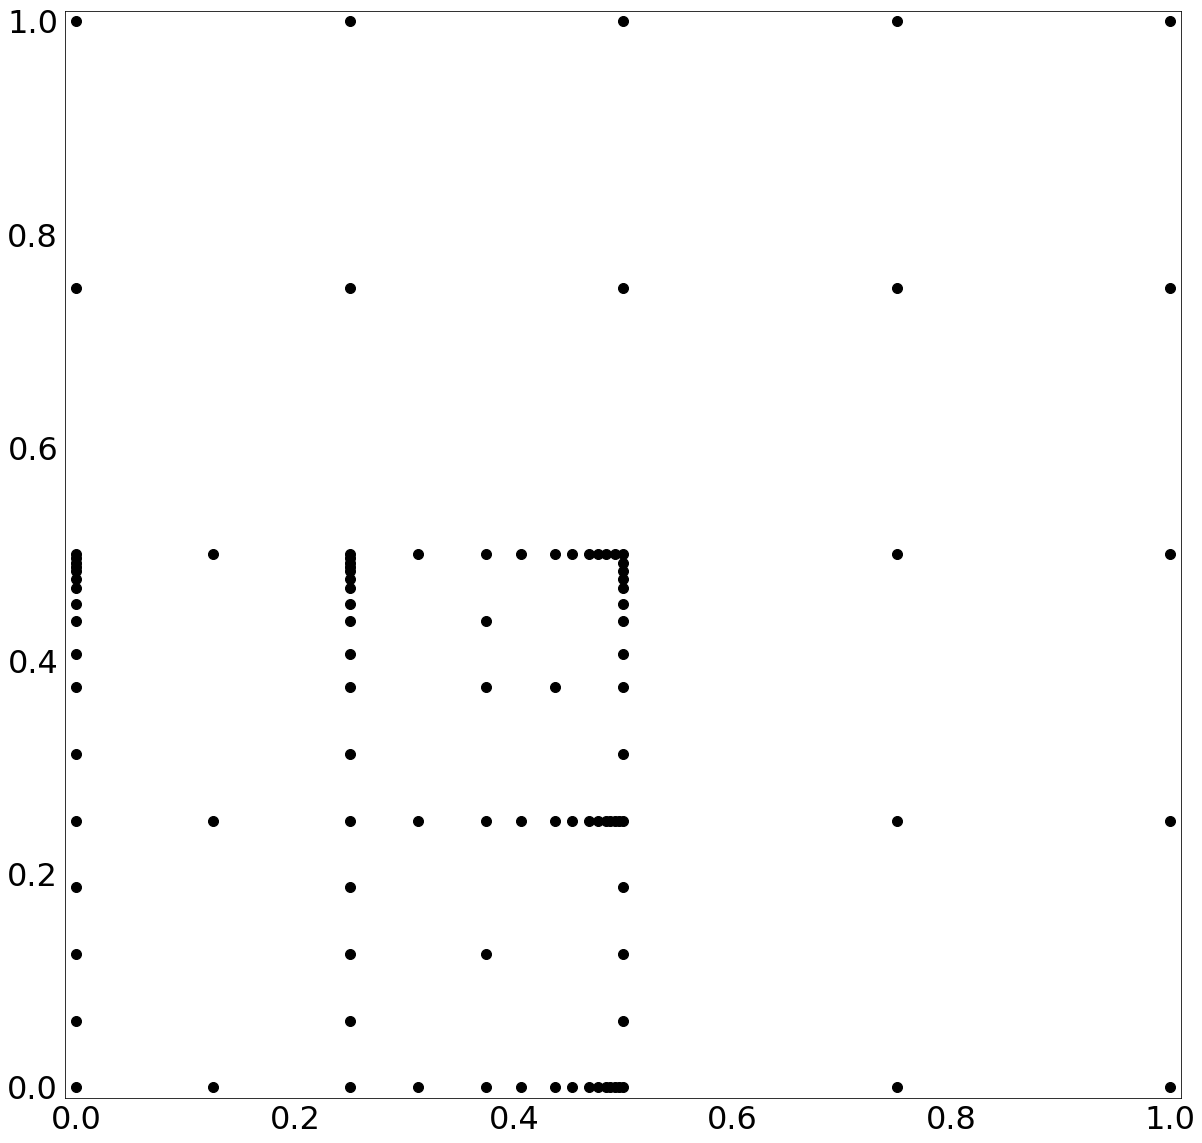

max surplus error: 0.000105121464443 total surplus error: 0.00213694155569
combiintegral: 0.122547962966
Current error: 0.0145711340842
Finished refinement
Refinement Graph:


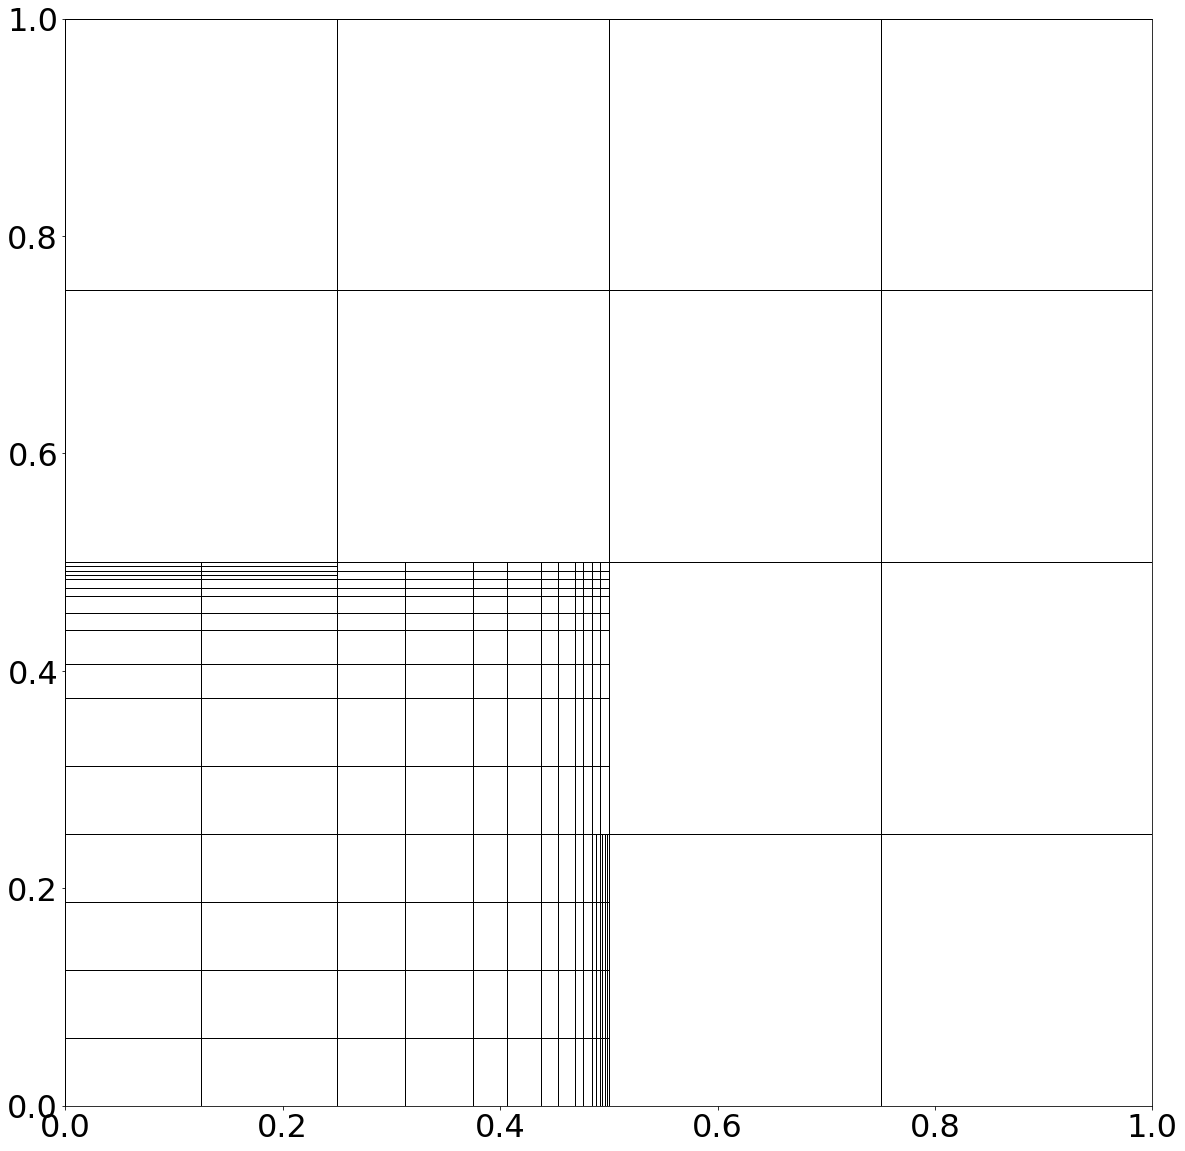

Combi Scheme:


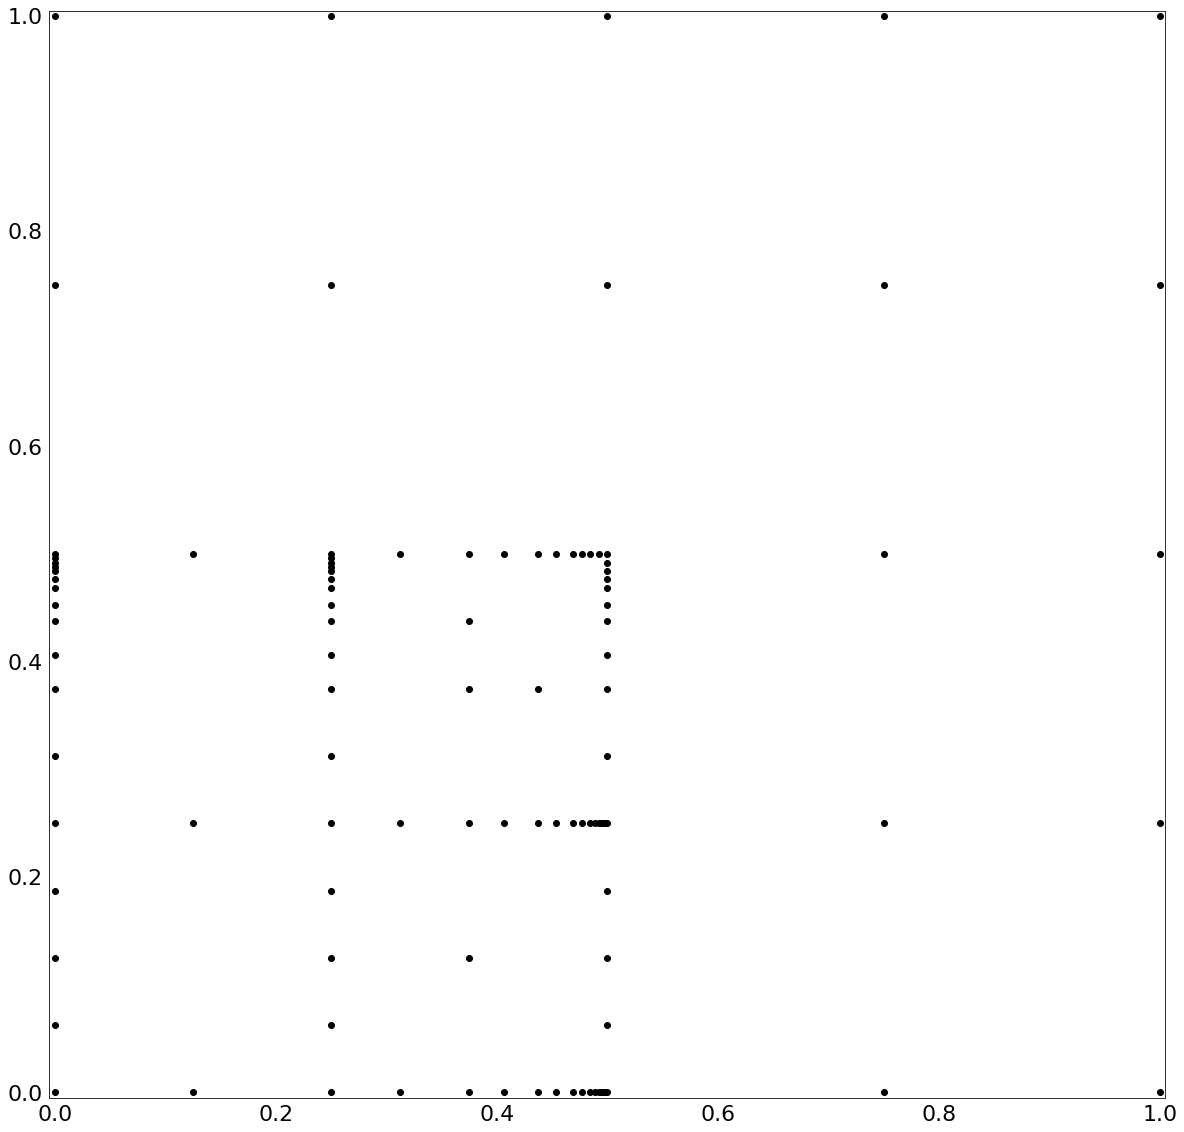

Resulting Sparse Grid:


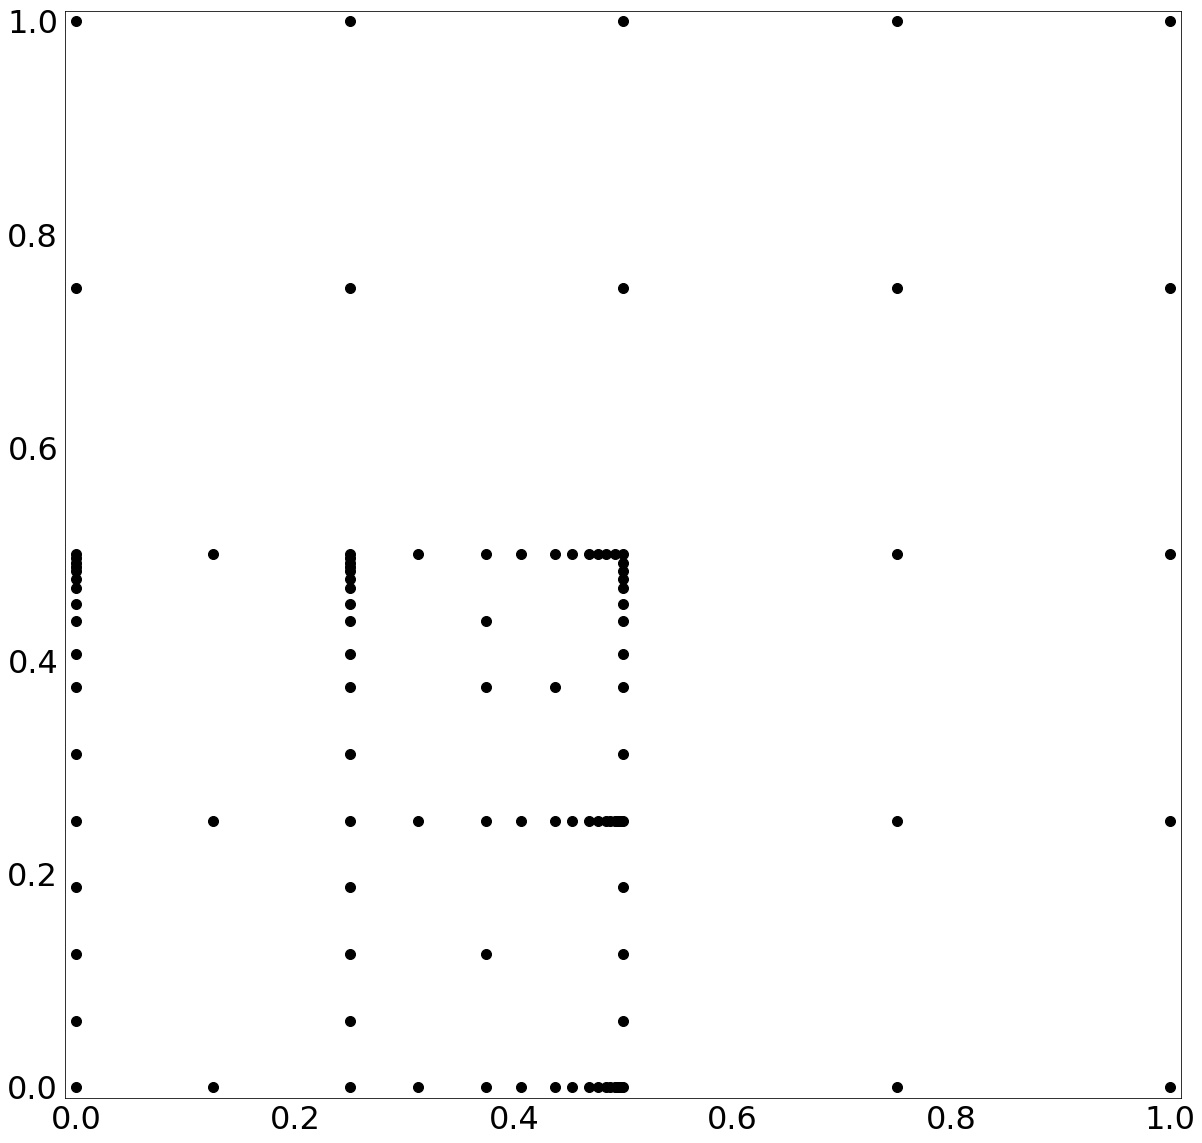

max surplus error: 8.98087918388e-05 total surplus error: 0.00194389232268
combiintegral: 0.123174377923
Current error: 0.00953402562153
Number of refinements 58


(<RefinementContainer.RefinementContainer at 0x7f4333a9ecc0>,
 [(array([2, 2]), 1.0)],
 [2, 2],
 0.12317437792337008,
 1312.0,
 [0.28884290720342765,
  0.2957040623962055,
  0.23796914551203702,
  0.20070207067608858,
  0.16145426771529511,
  0.13111882457787827,
  0.11139639195475459,
  0.096124719304326395,
  0.084671855813937866,
  0.074485674541381344,
  0.051873756101385525,
  0.046108078595276575,
  0.040980082763874499,
  0.036520333236512249,
  0.032694930593926398,
  0.031179785368690455,
  0.028611737082897225,
  0.026366580004549736,
  0.024453700321154914,
  0.016420005301911456,
  0.016651947904742254,
  0.015527596018361907,
  0.014571134084202658,
  0.0095340256215264724],
 [25,
  29,
  32,
  35,
  37,
  41,
  45,
  49,
  51,
  55,
  62,
  64,
  68,
  70,
  74,
  80,
  84,
  86,
  90,
  94,
  101,
  103,
  107,
  110])

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import path
import numpy as np

#from numpy import *
import scipy as sp
from spatiallyAdaptiveExtendSplit import *
from spatiallyAdaptiveSplit import *
from spatiallyAdaptiveSingleDimension import *
from spatiallyAdaptiveCell import *

from PerformTestCase import *
from Function import *
from ErrorCalculator import *
import math
dim = 2
a = np.zeros(dim)
b = np.ones(dim)
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorAnalytic()

grid=TrapezoidalGrid(a=a, b=b, dim=dim)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions(a, b,grid)
adaptiveCombiInstanceFixed = SpatiallyAdaptiveFixedScheme(a, b,grid)
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b,2,grid,False,version=0)
adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(a, b,grid)
reference_solution = f.getAnalyticSolutionIntegral(a,b)
#the cell method does not have component grids and therefore the sparse grid is printed twice per iteration!
adaptiveCombiInstanceCell.performSpatiallyAdaptiv(2,2,f,errorOperator,10**-2, do_plot=True, reference_solution=reference_solution)

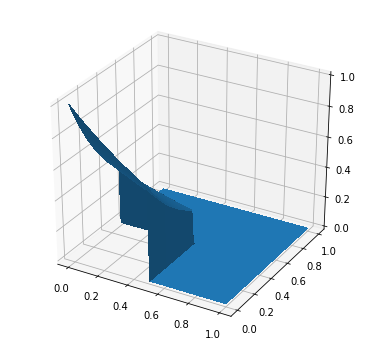

Reference solution: 0.124360029632
0 [1, 2] 1.0
1 [2, 1] 1.0
2 [1, 1] -1.0
max surplus error: 0.0625 total surplus error: 0.211583215174
combiintegral: 0.086583215174
Current error: 0.303769744748
Splitting [ 0.5  0. ] [ 1.   0.5]
Splitting [ 0.   0.5] [ 0.5  1. ]
Splitting [ 0.5  0.5] [ 1.  1.]
Finished refinement
Refinement Graph:


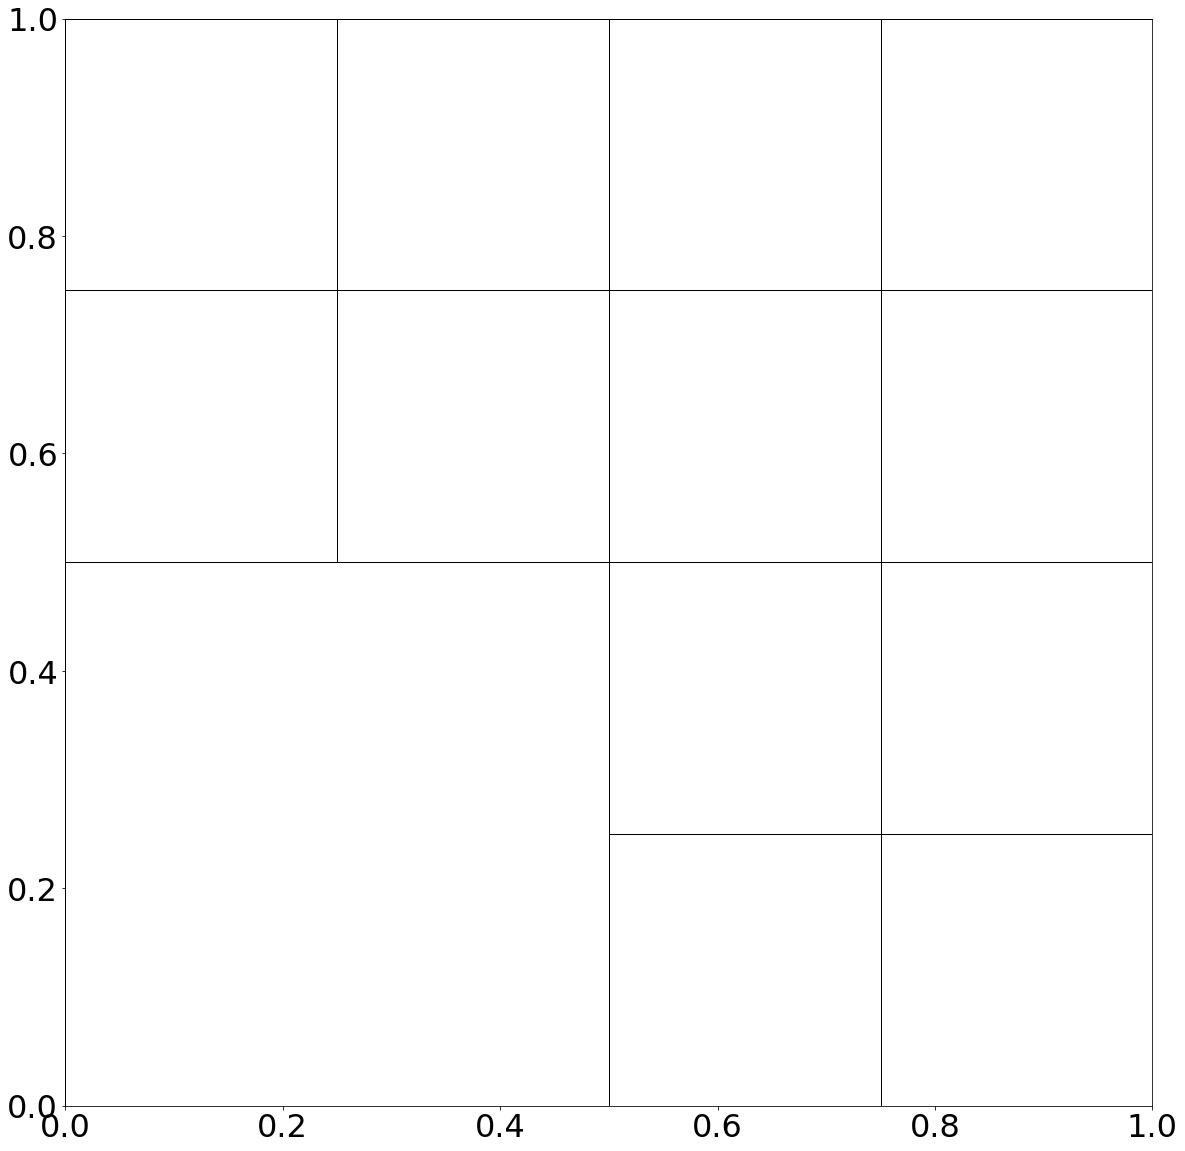

Combi Scheme:


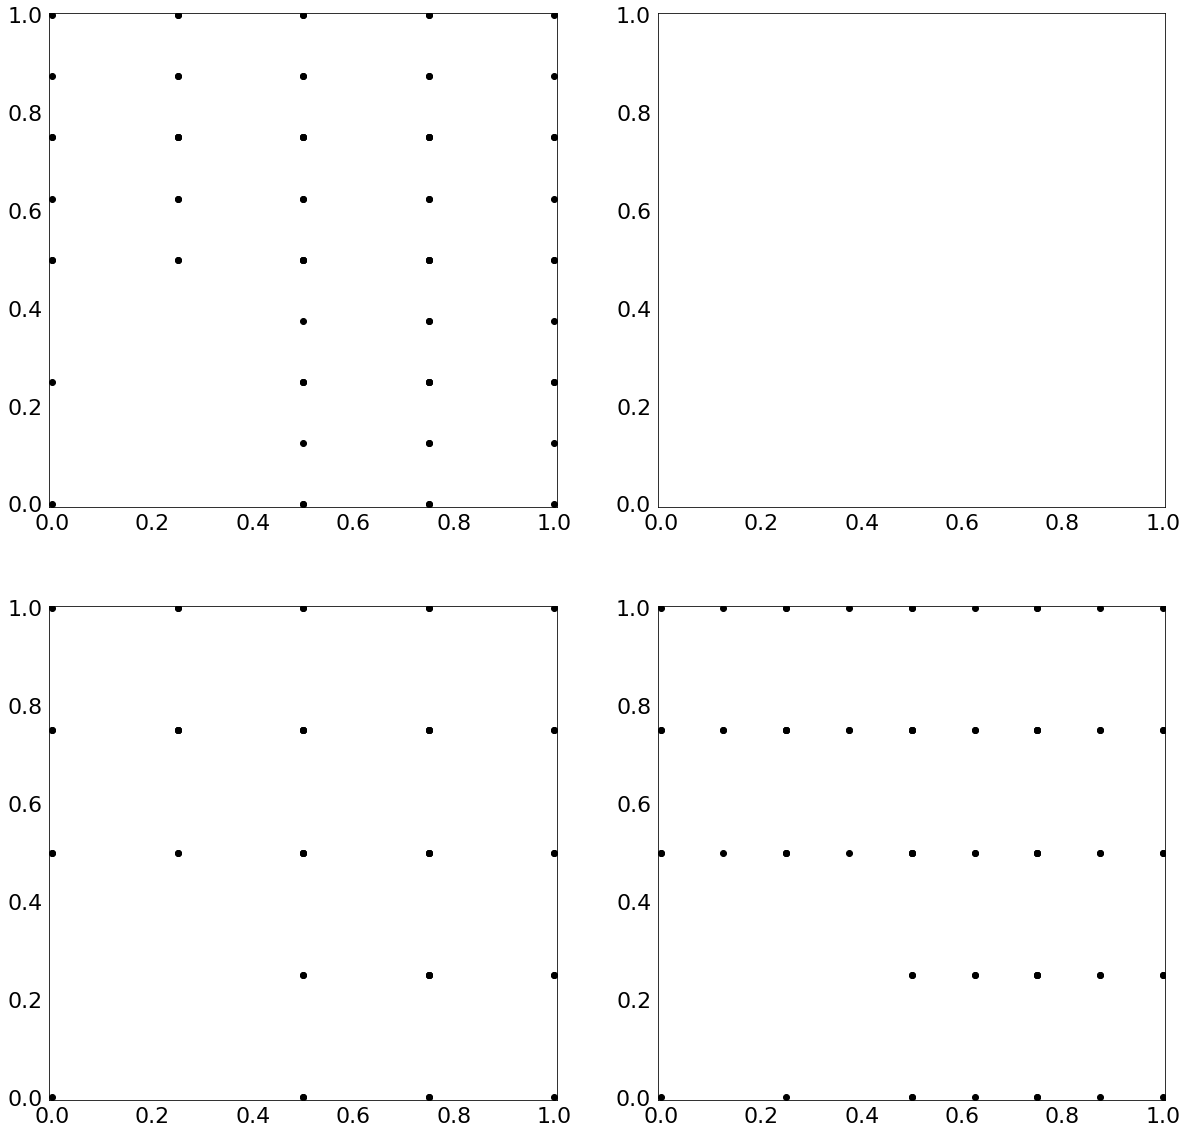

Resulting Sparse Grid:


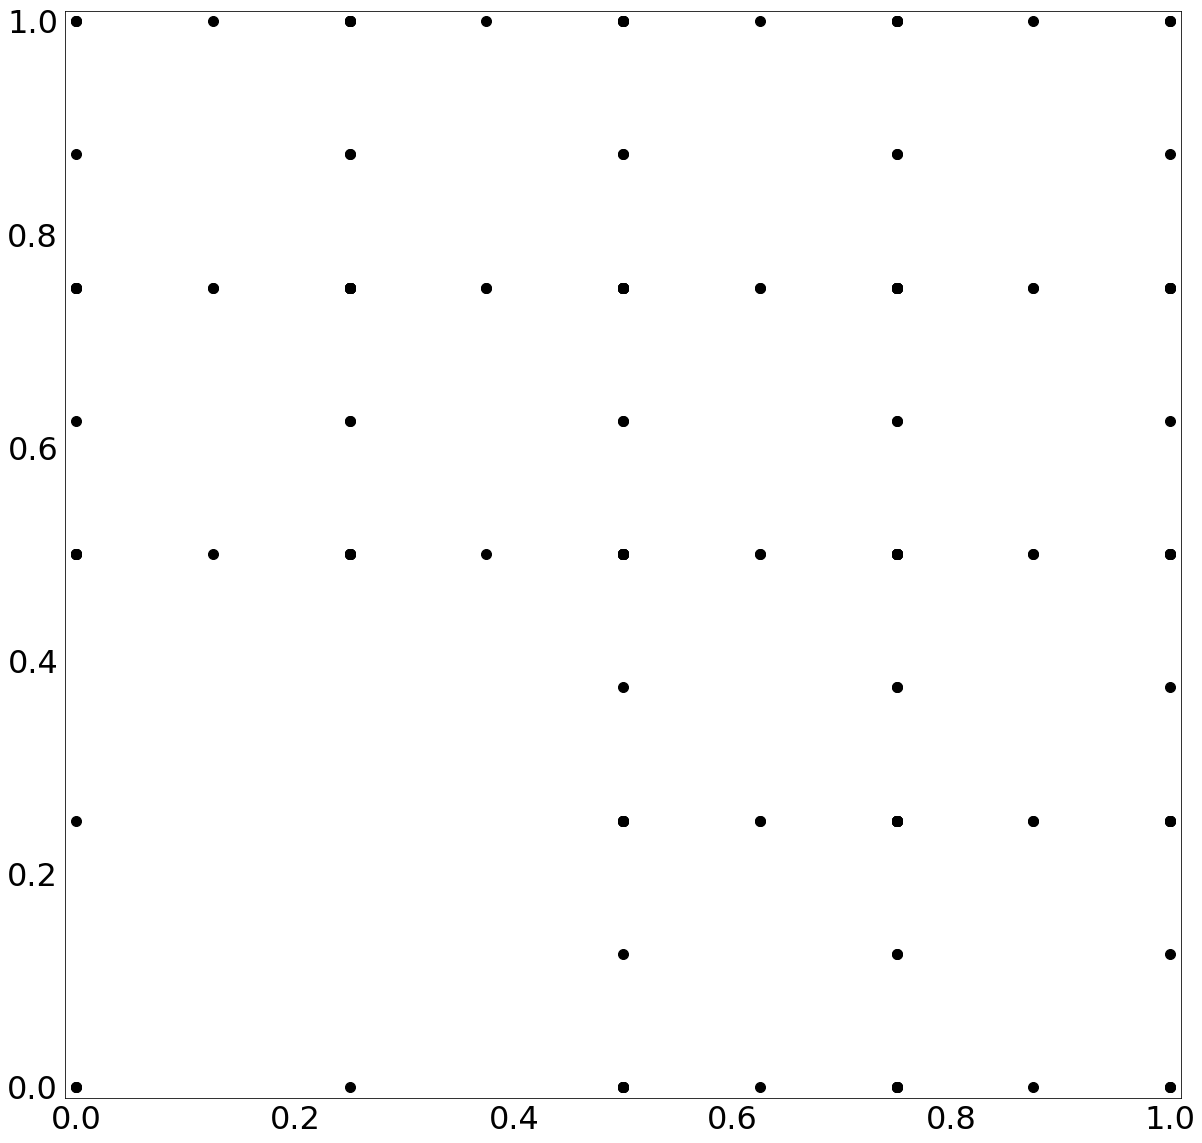

max surplus error: 0.024083215174 total surplus error: 0.024083215174
combiintegral: 0.086583215174
Current error: 0.303769744748
Splitting [ 0.  0.] [ 0.5  0.5]
Finished refinement
Refinement Graph:


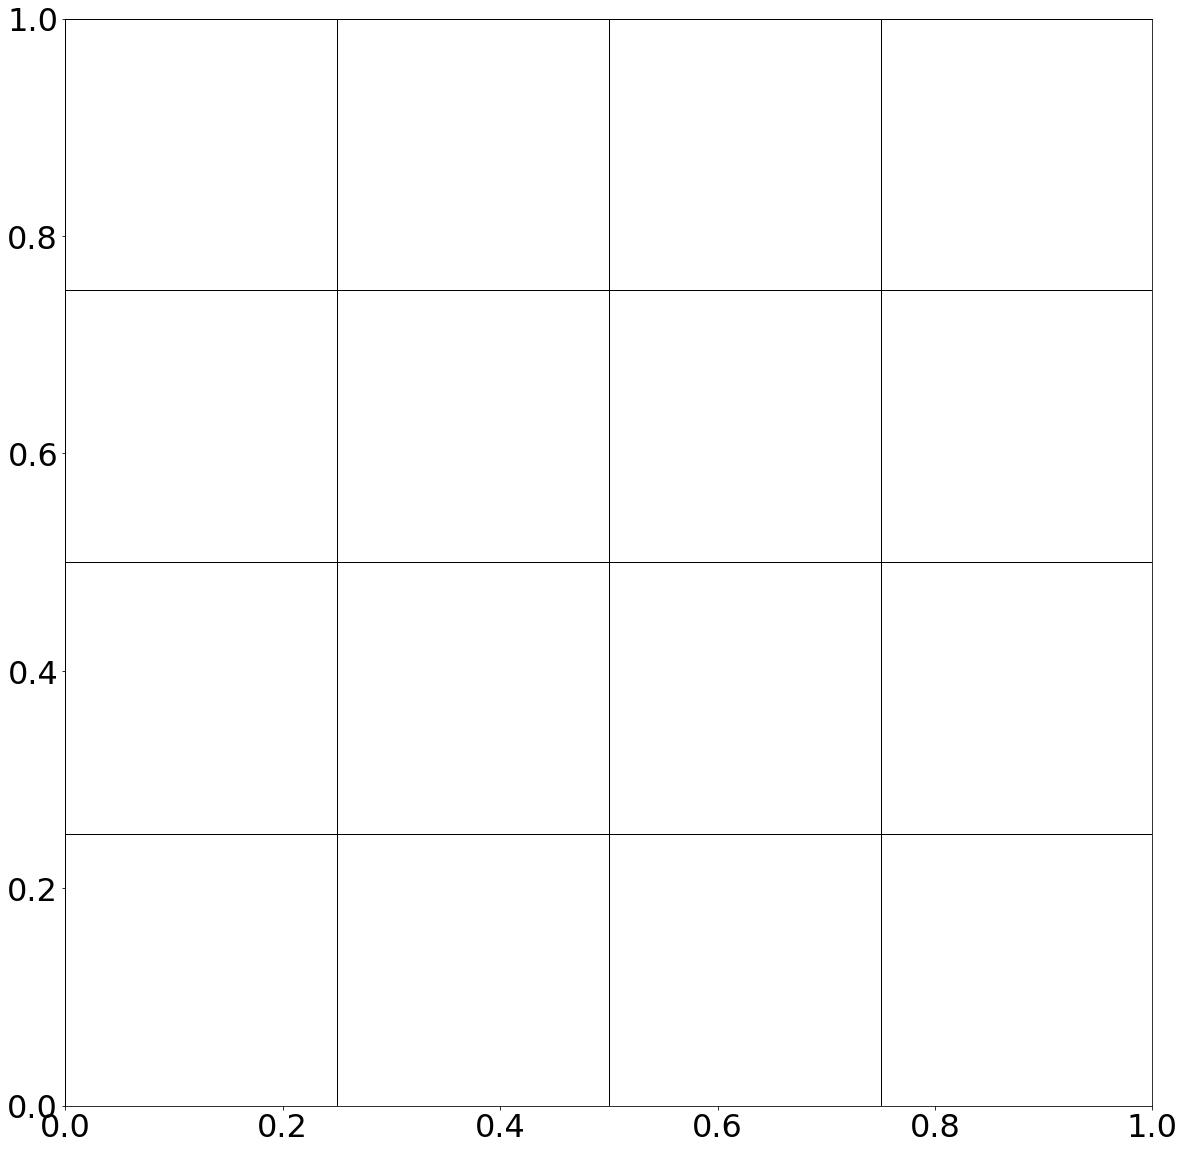

Combi Scheme:


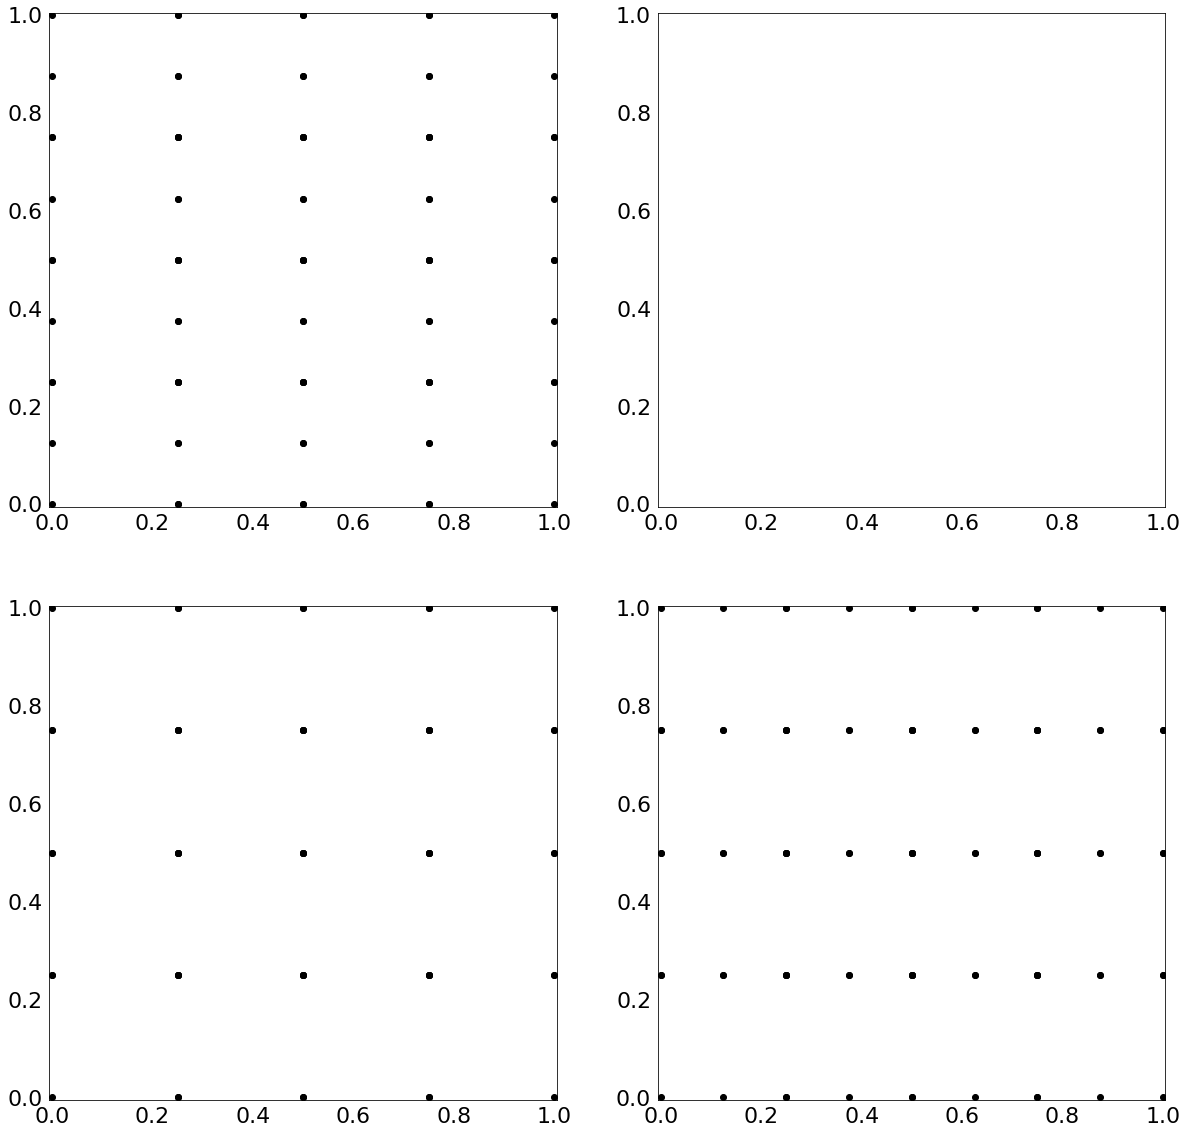

Resulting Sparse Grid:


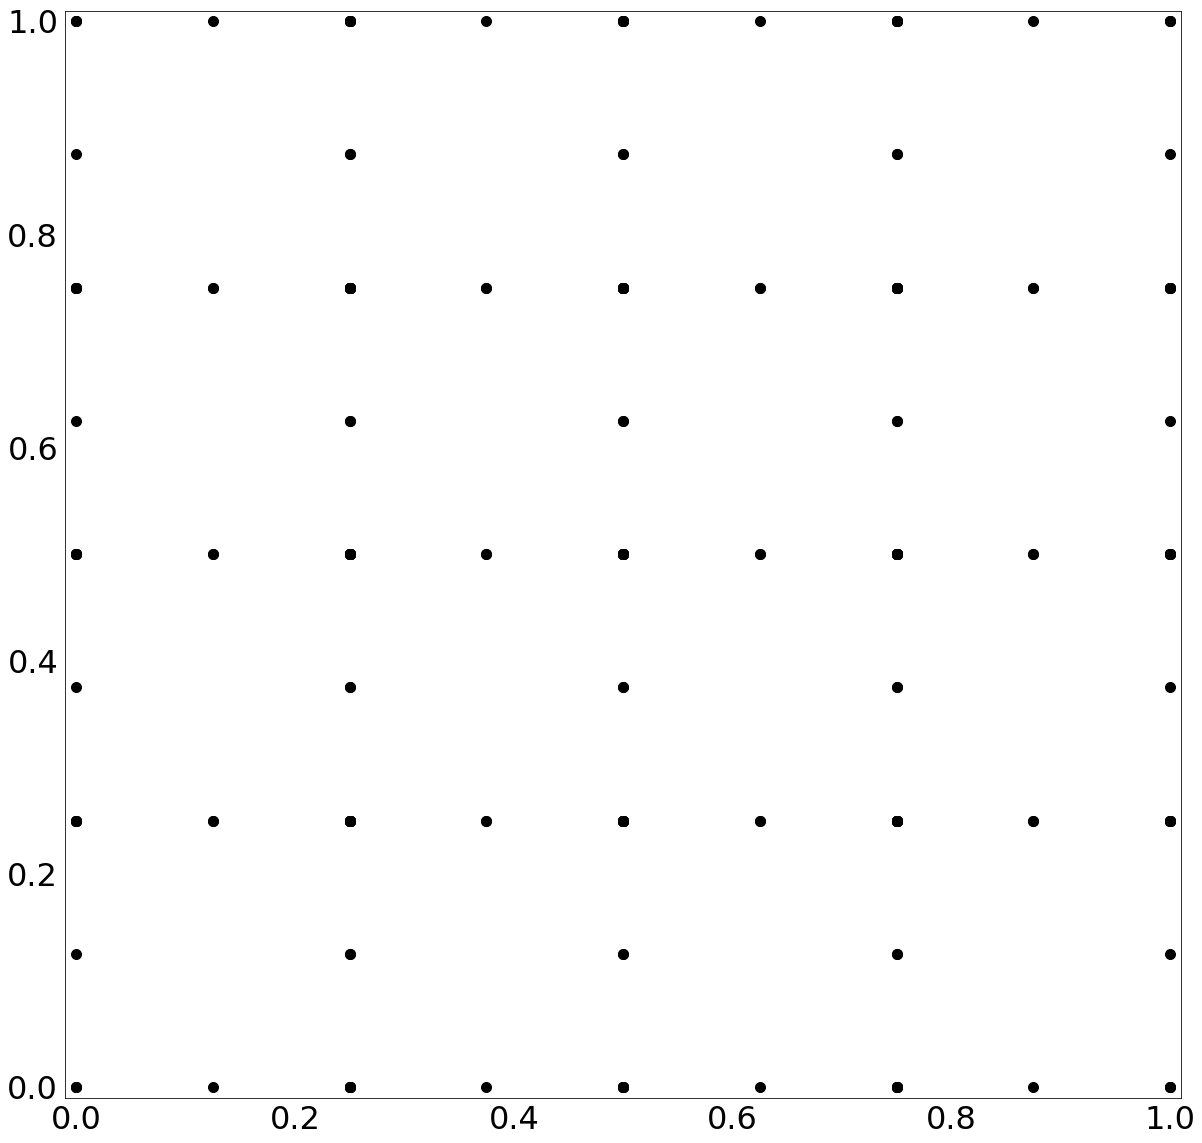

max surplus error: 0.0221524739235 total surplus error: 0.0367737945123
combiintegral: 0.104281572115
Current error: 0.161454267715
Splitting [ 0.  0.] [ 0.25  0.25]
Finished refinement
Refinement Graph:


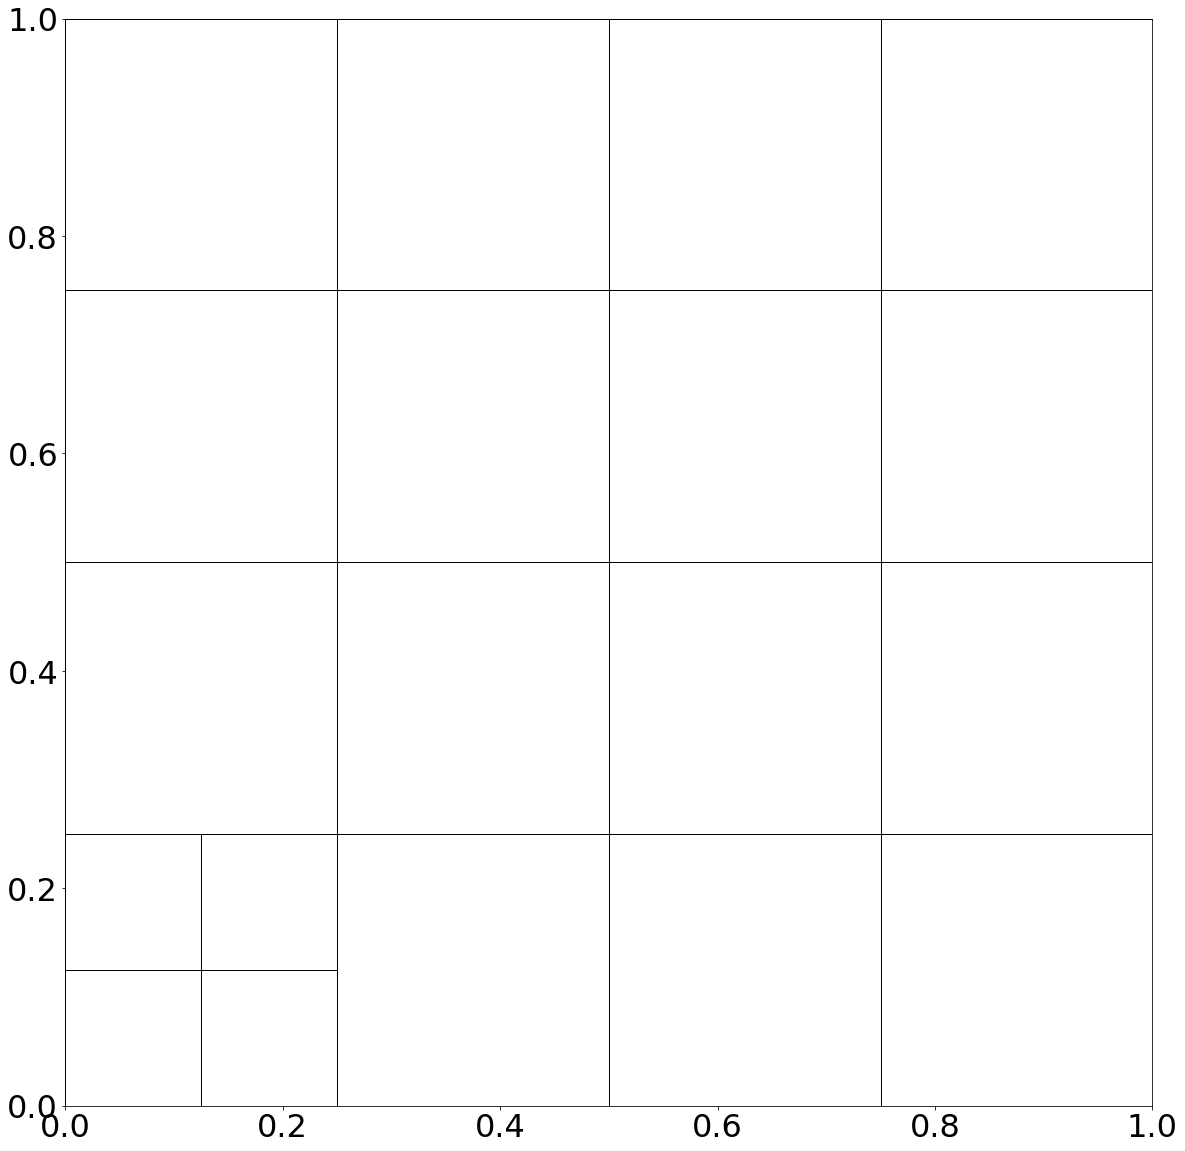

Combi Scheme:


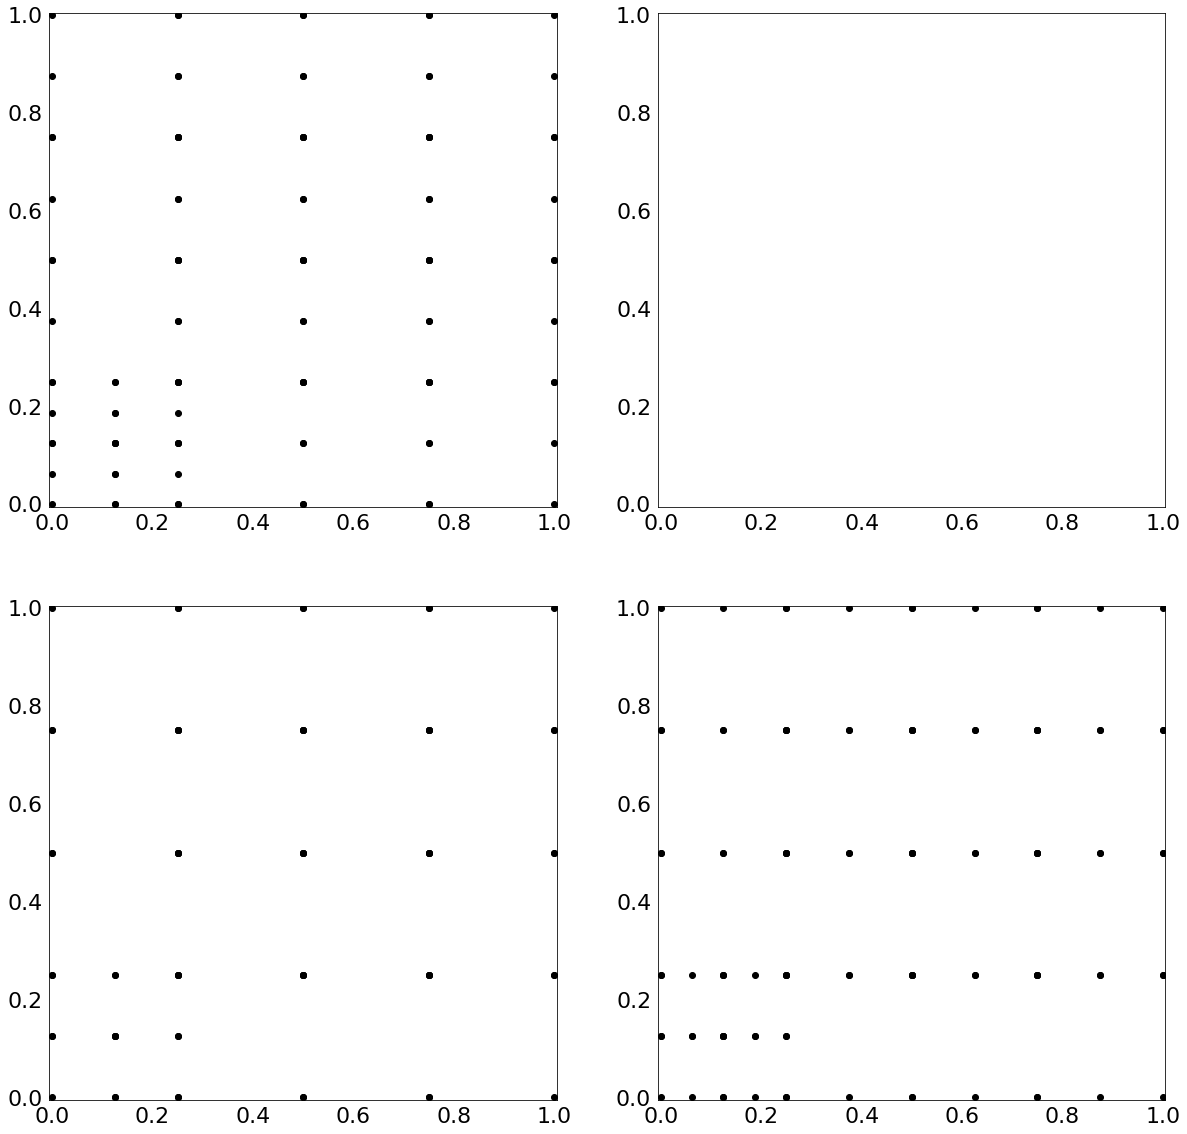

Resulting Sparse Grid:


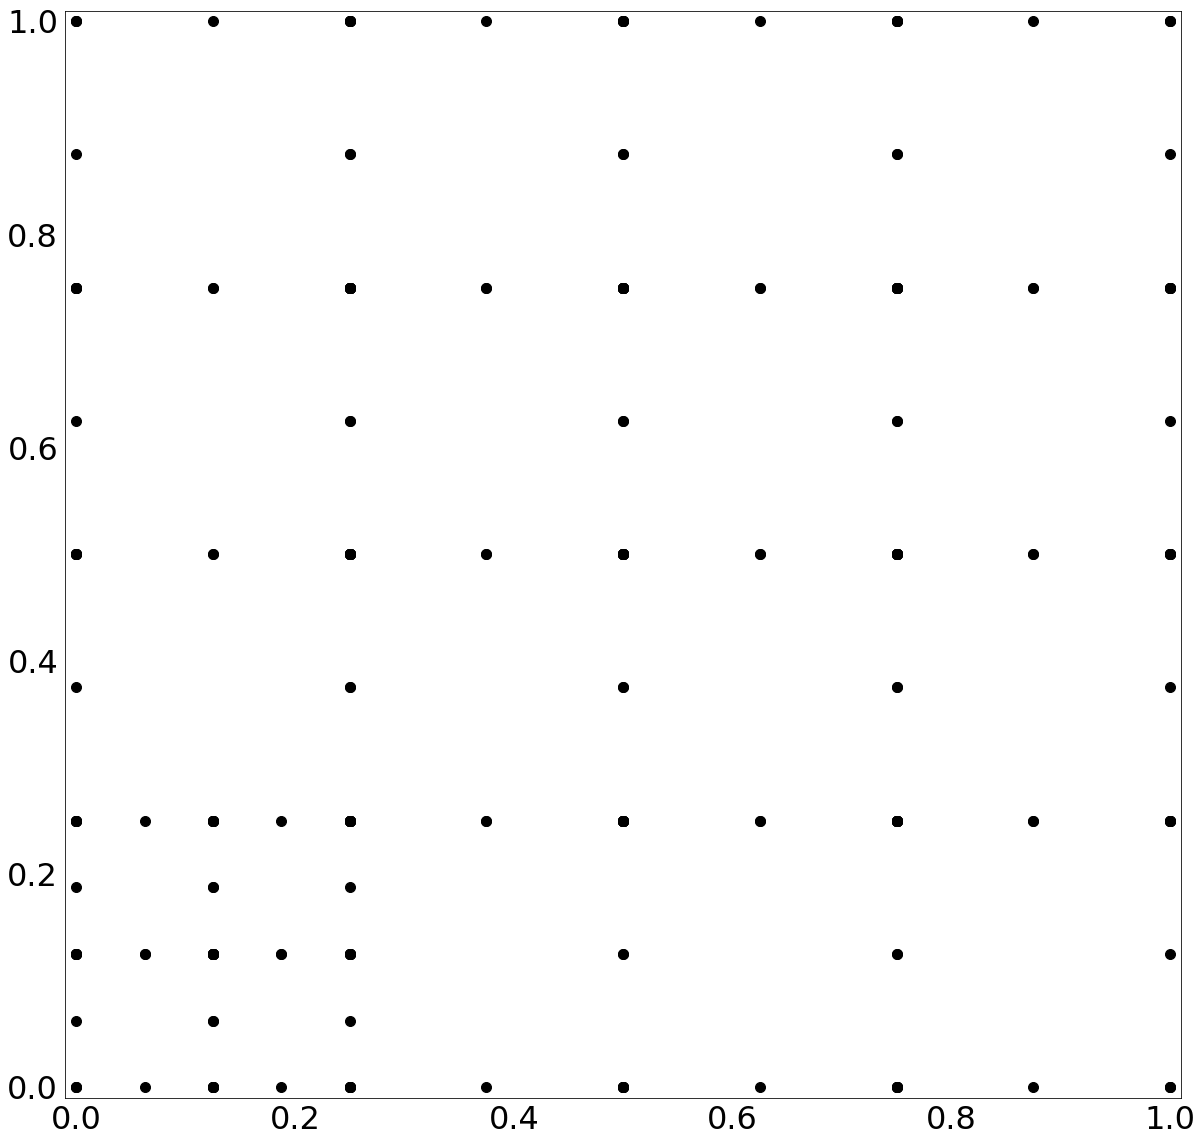

max surplus error: 0.00938421846772 total surplus error: 0.0200416467571
combiintegral: 0.10407151576
Current error: 0.163143366339
Splitting [ 0.25  0.25] [ 0.5  0.5]
Finished refinement
Refinement Graph:


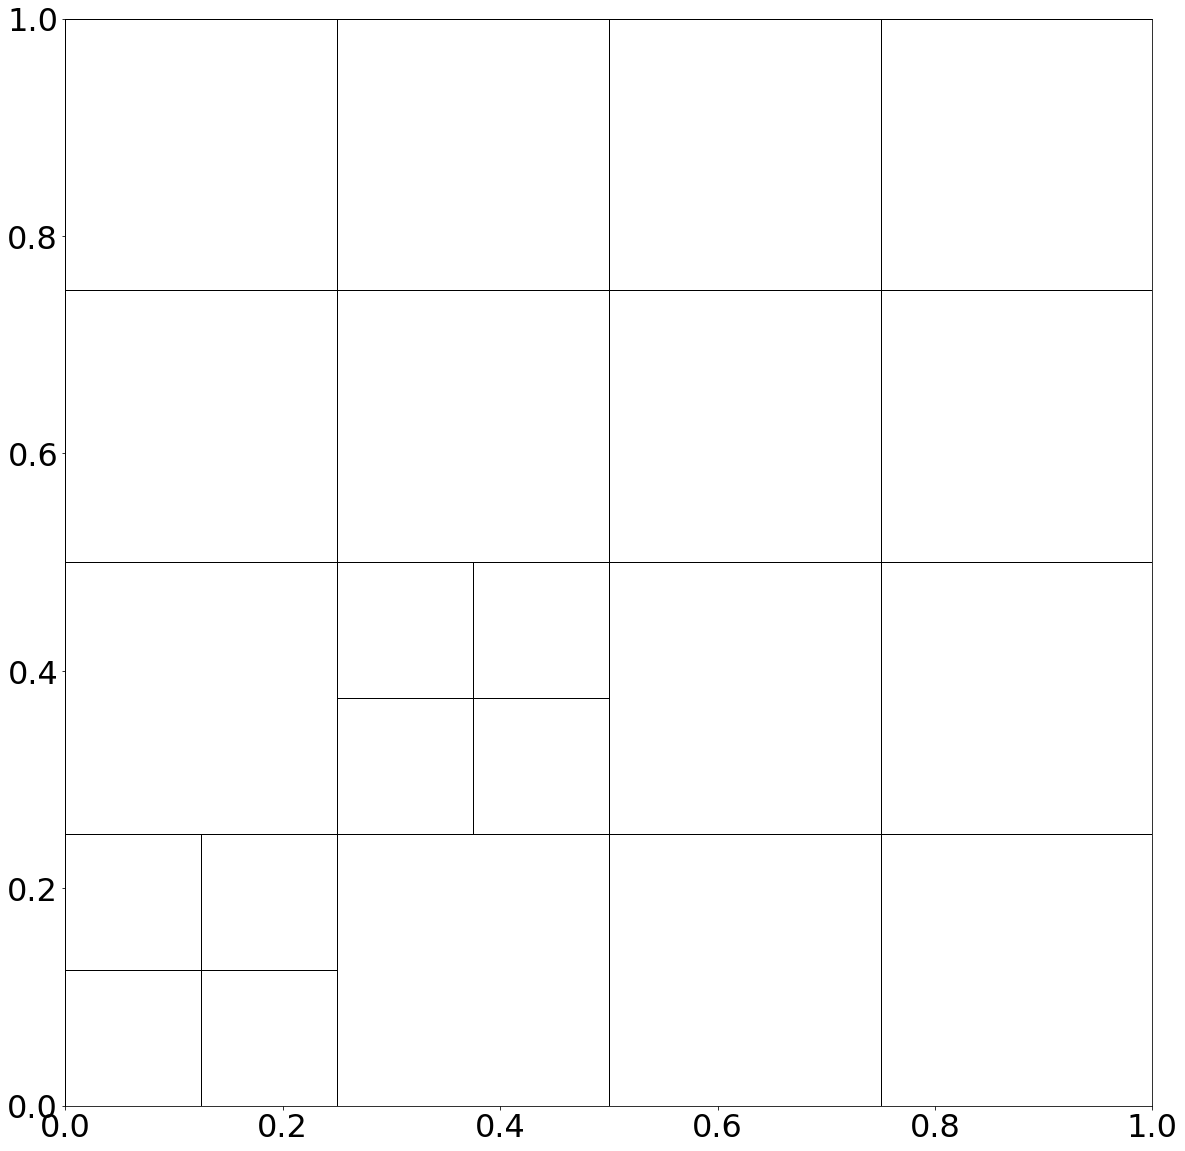

Combi Scheme:


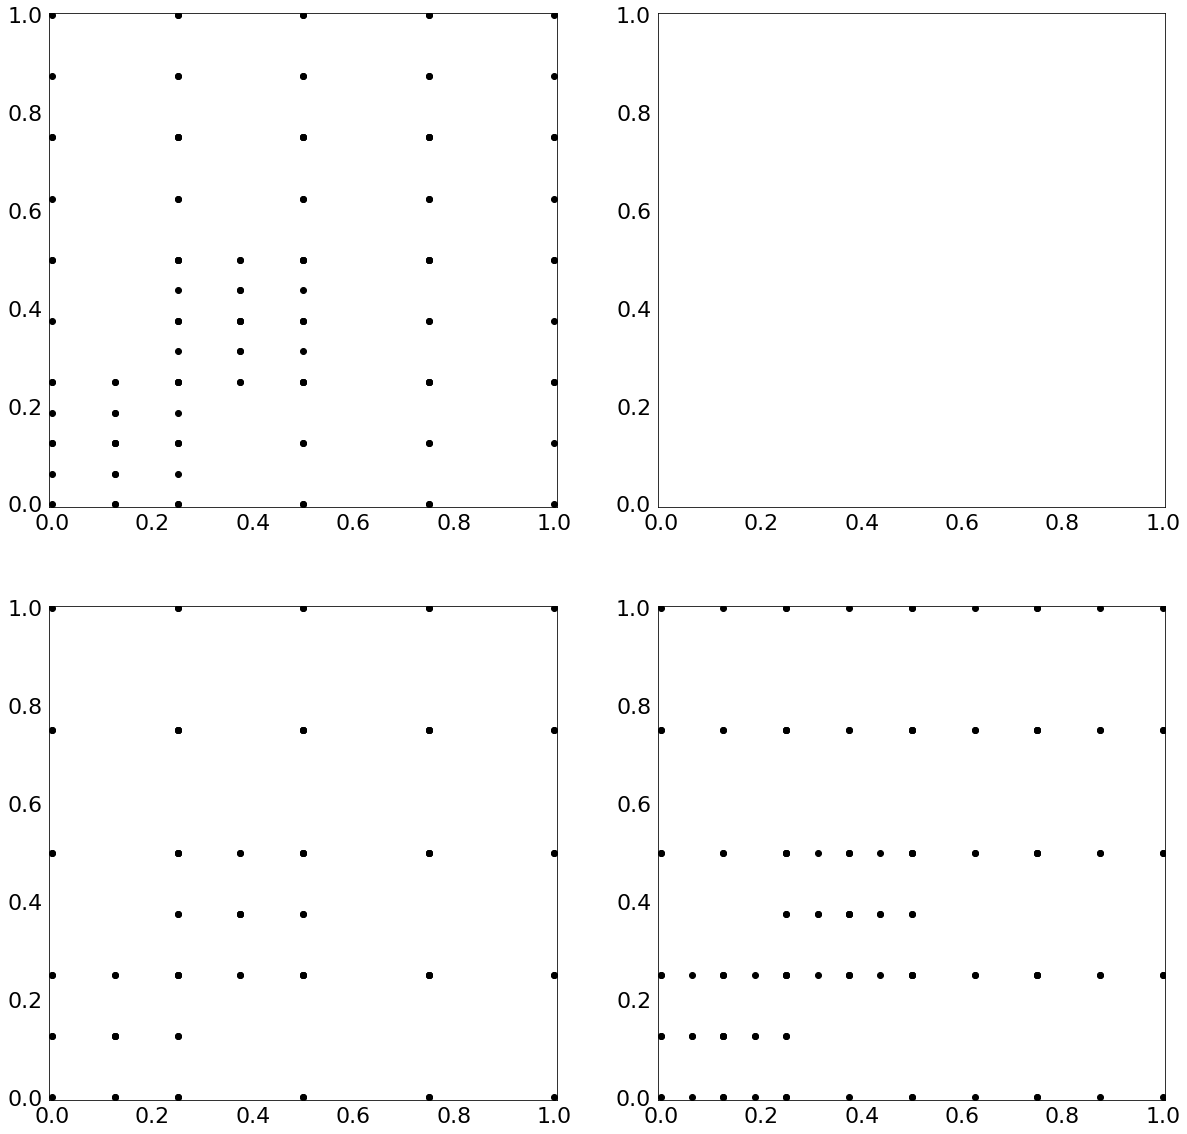

Resulting Sparse Grid:


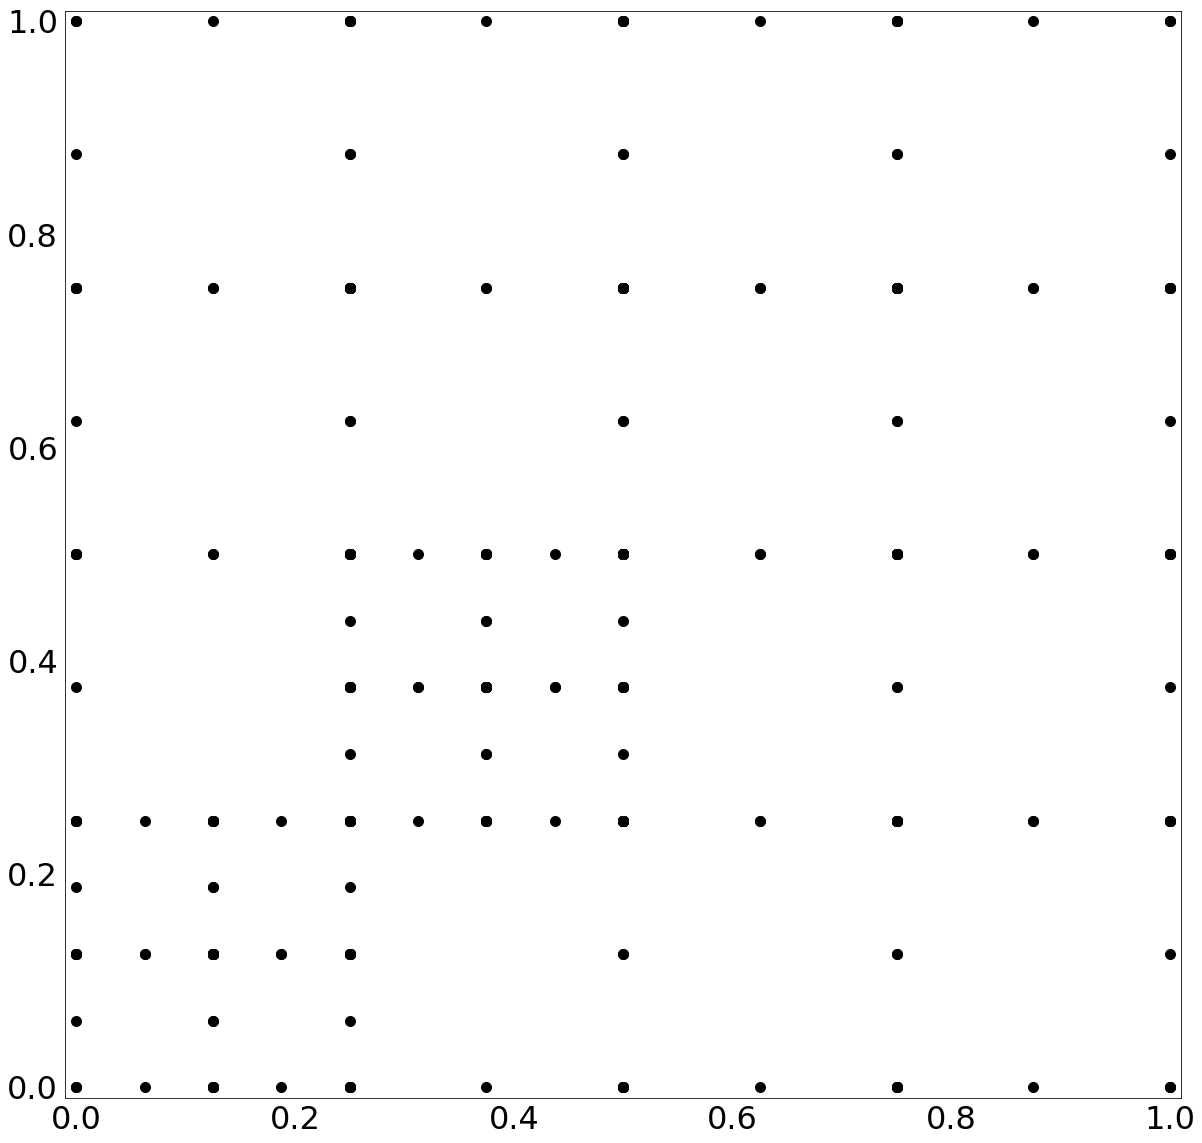

max surplus error: 0.00508360180309 total surplus error: 0.0162602598893
combiintegral: 0.108164551303
Current error: 0.130230576311
Splitting [ 0.25  0.  ] [ 0.5   0.25]
Finished refinement
Refinement Graph:


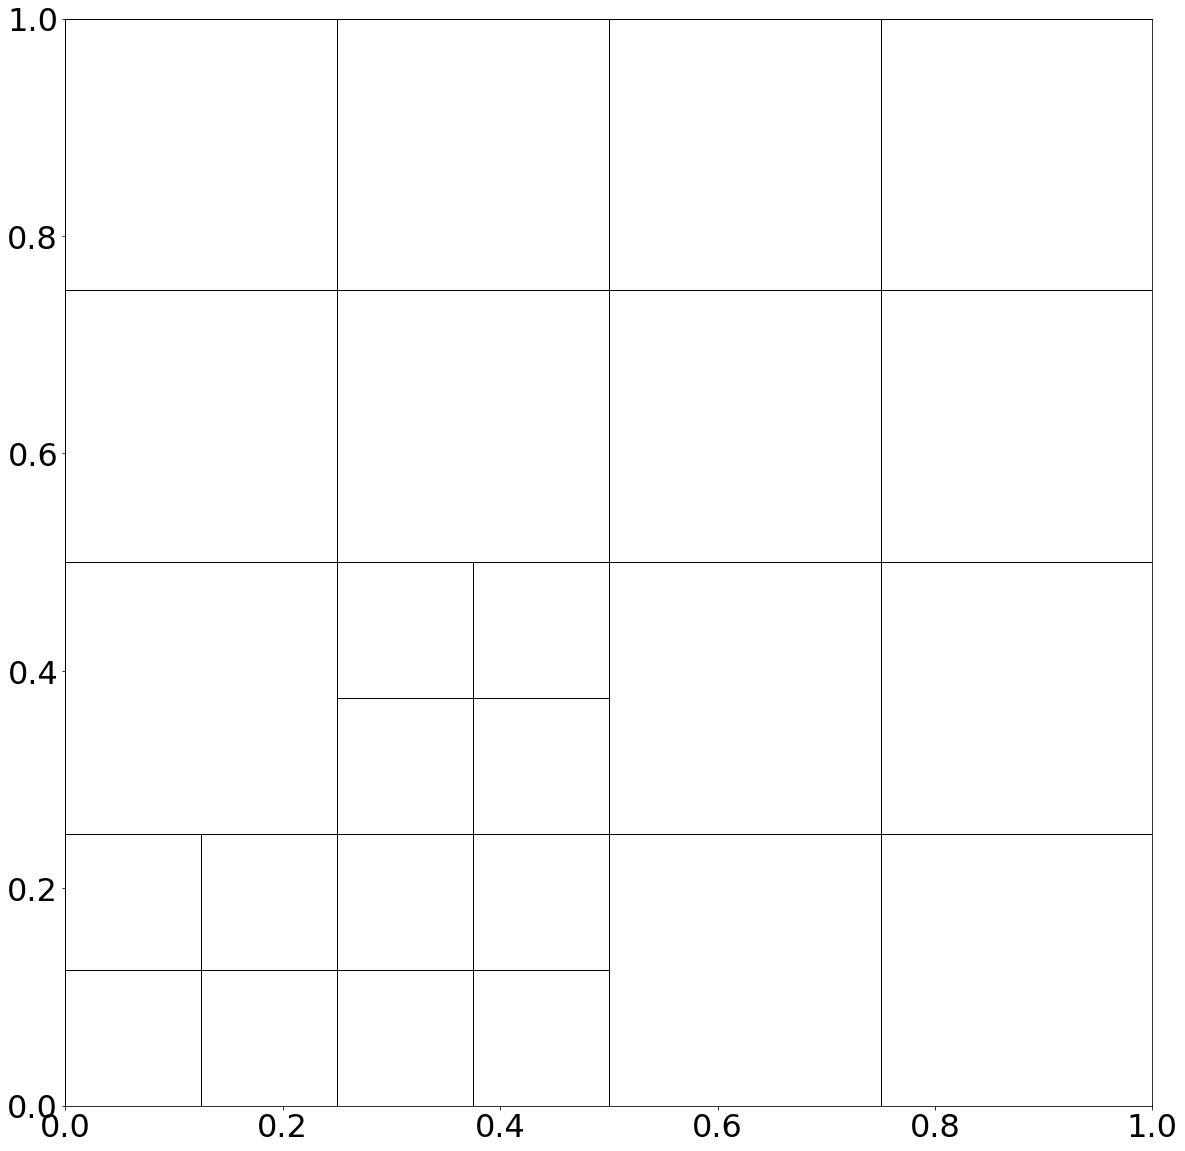

Combi Scheme:


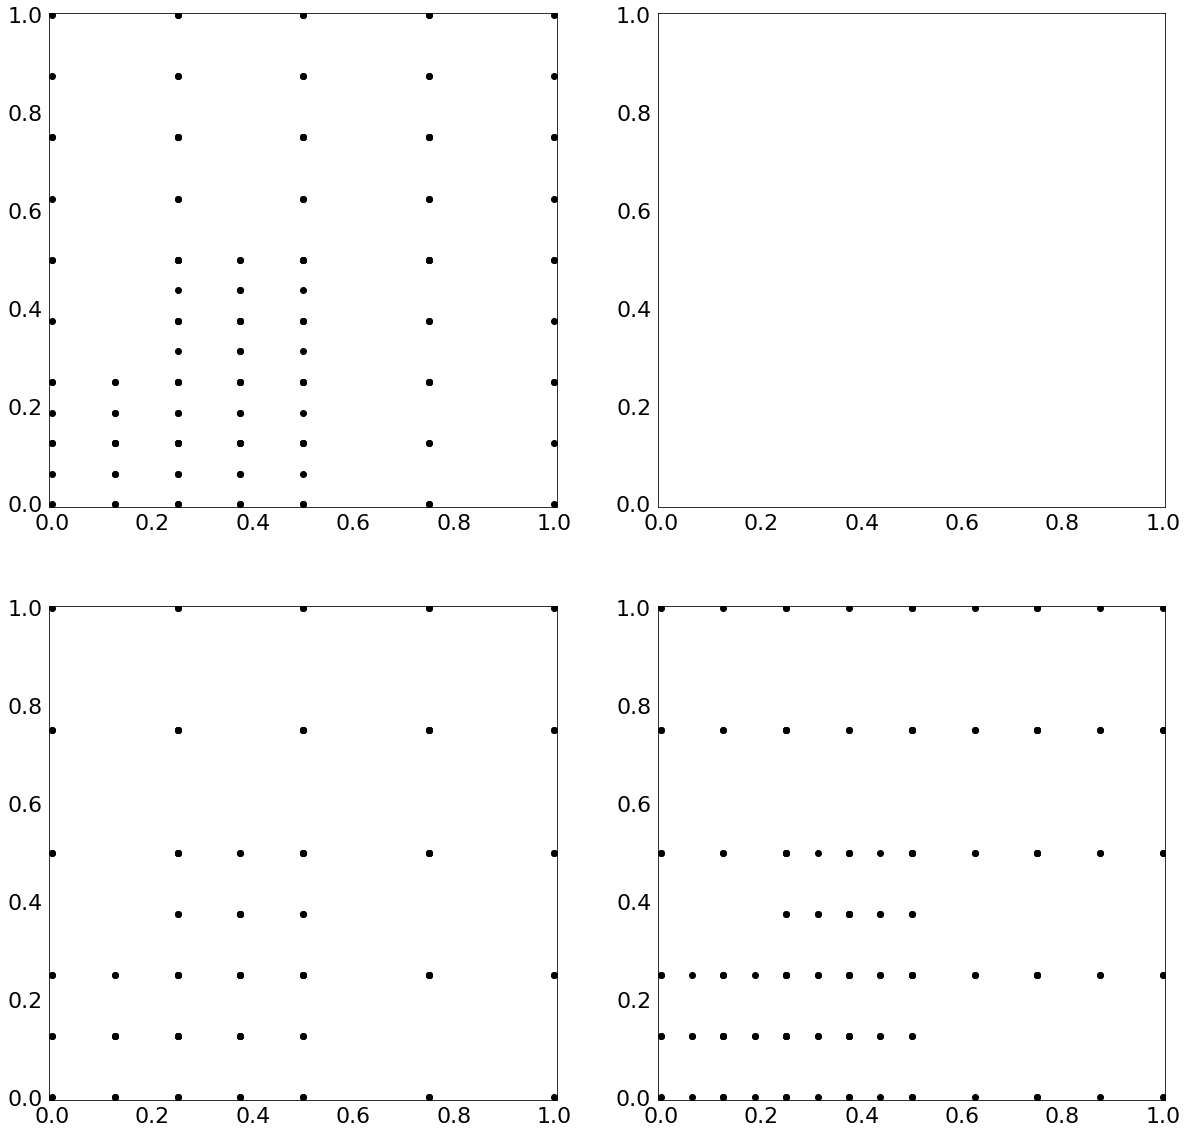

Resulting Sparse Grid:


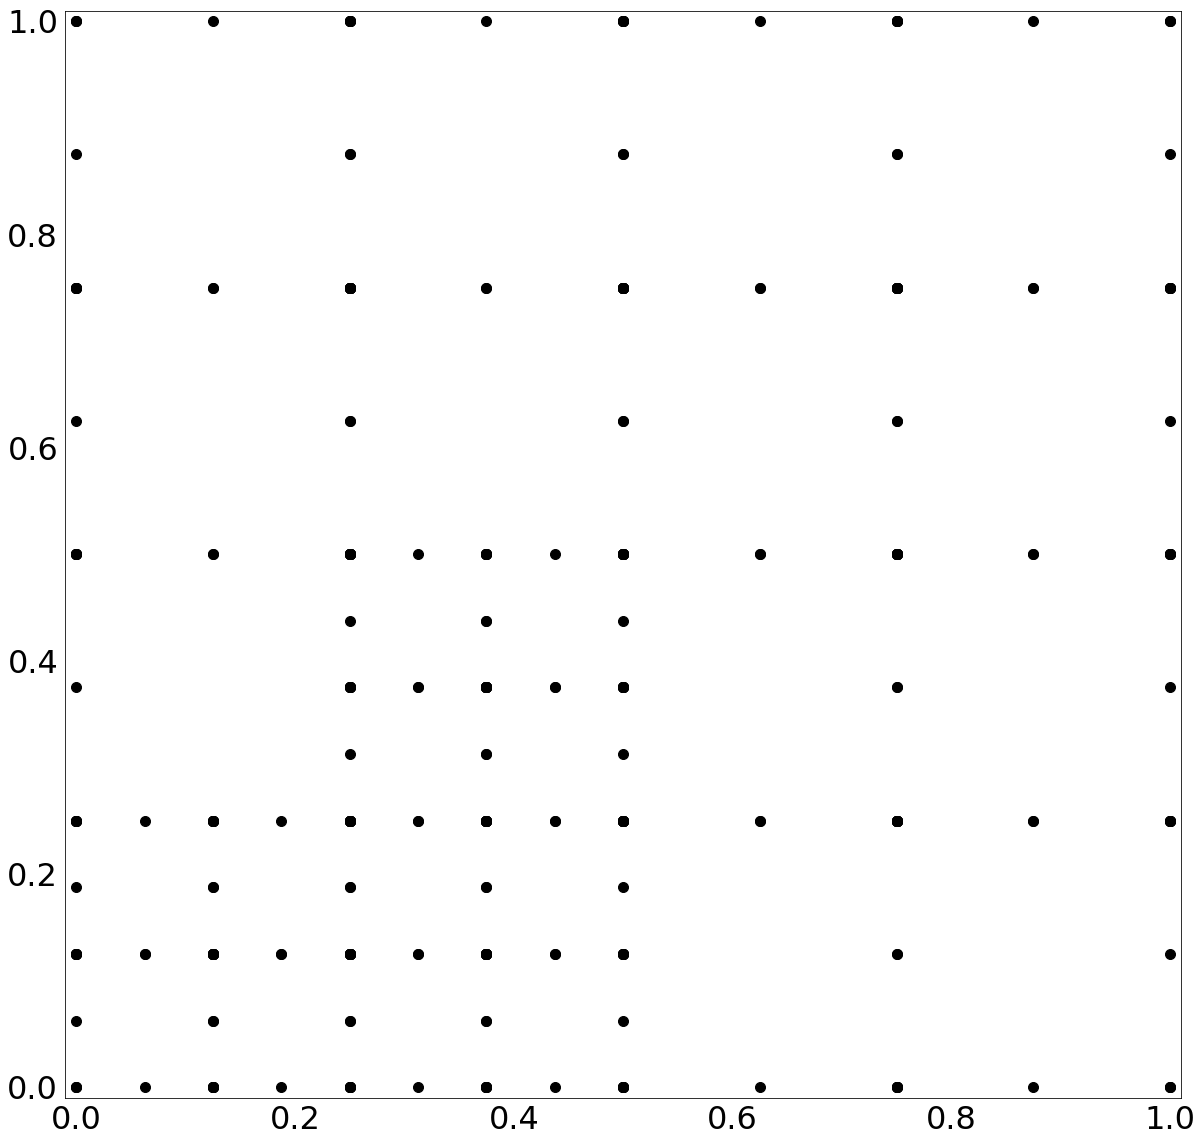

max surplus error: 0.00345522044531 total surplus error: 0.0173611096433
combiintegral: 0.111662454416
Current error: 0.102103346656
New scheme
0 [1, 3] 1.0
1 [2, 2] 1.0
2 [3, 1] 1.0
3 [1, 2] -1.0
4 [2, 1] -1.0
Finished refinement
Refinement Graph:


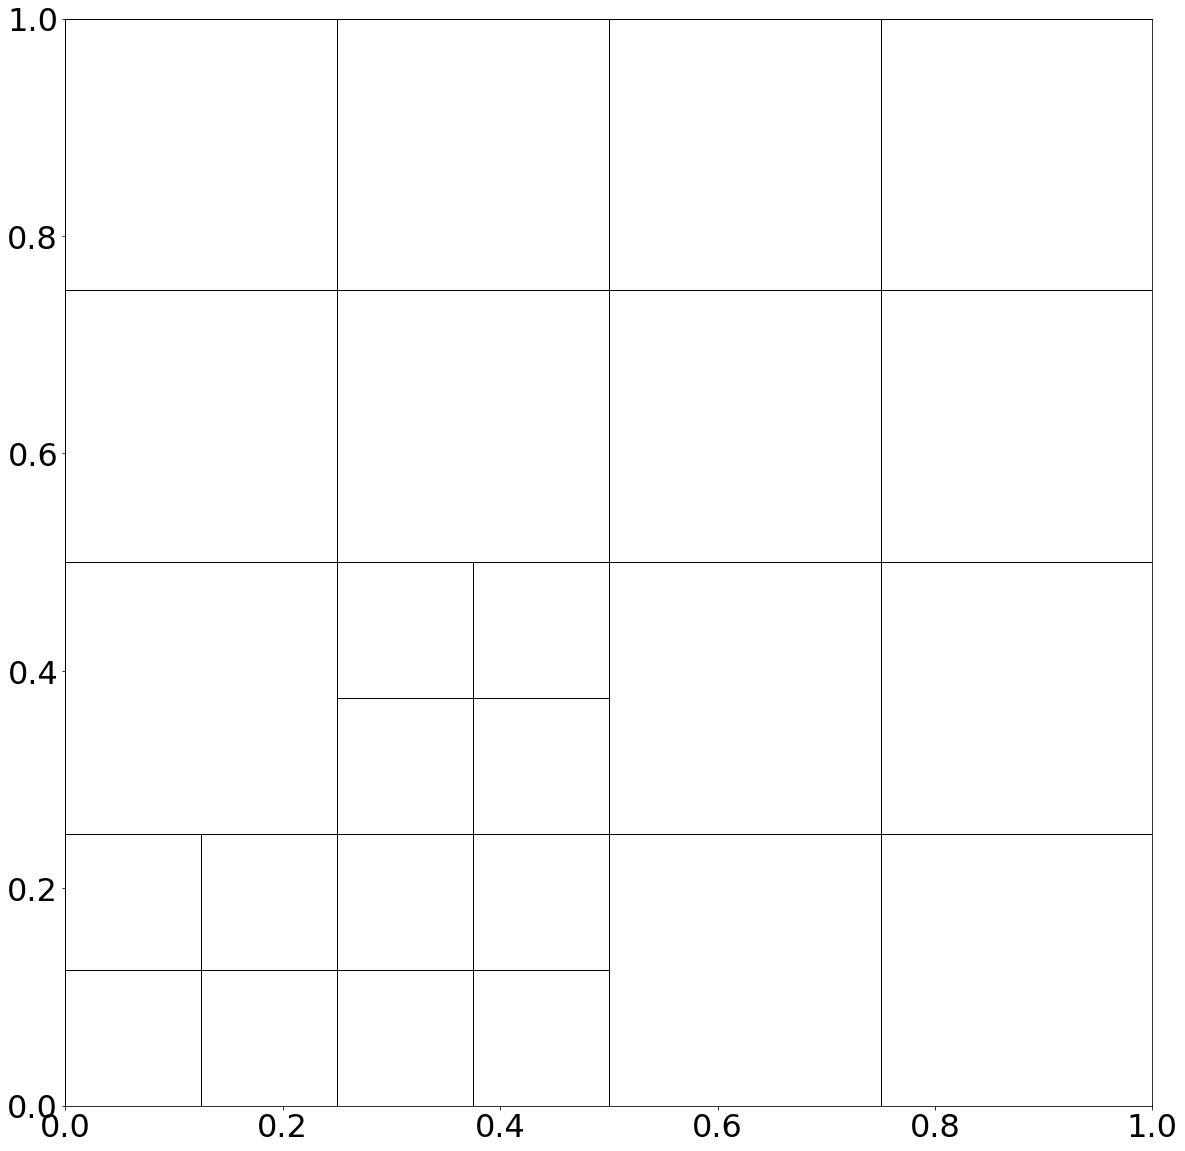

Combi Scheme:


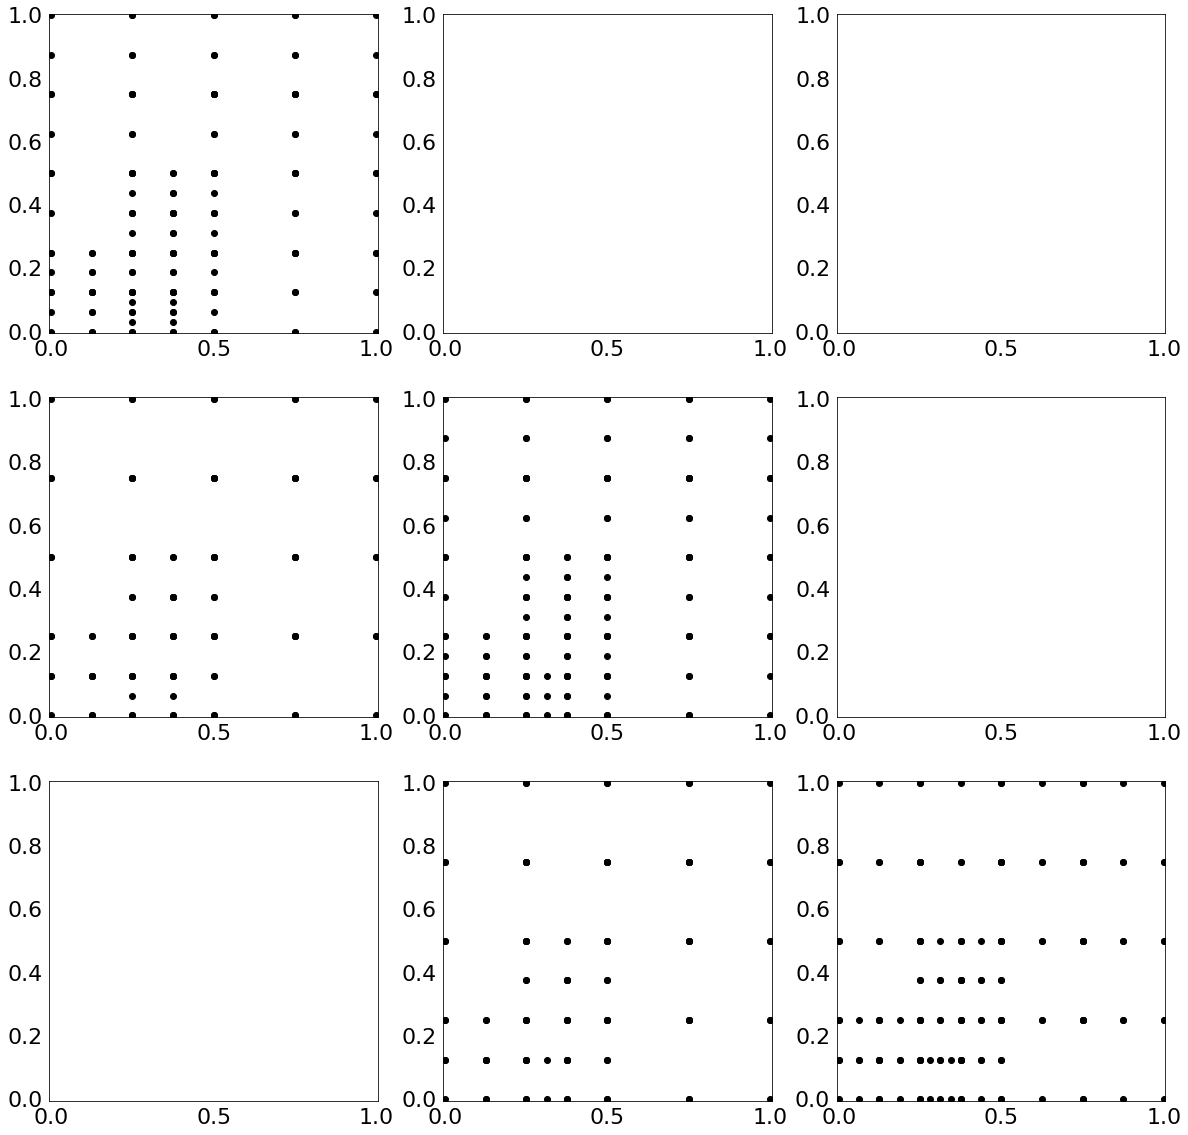

Resulting Sparse Grid:


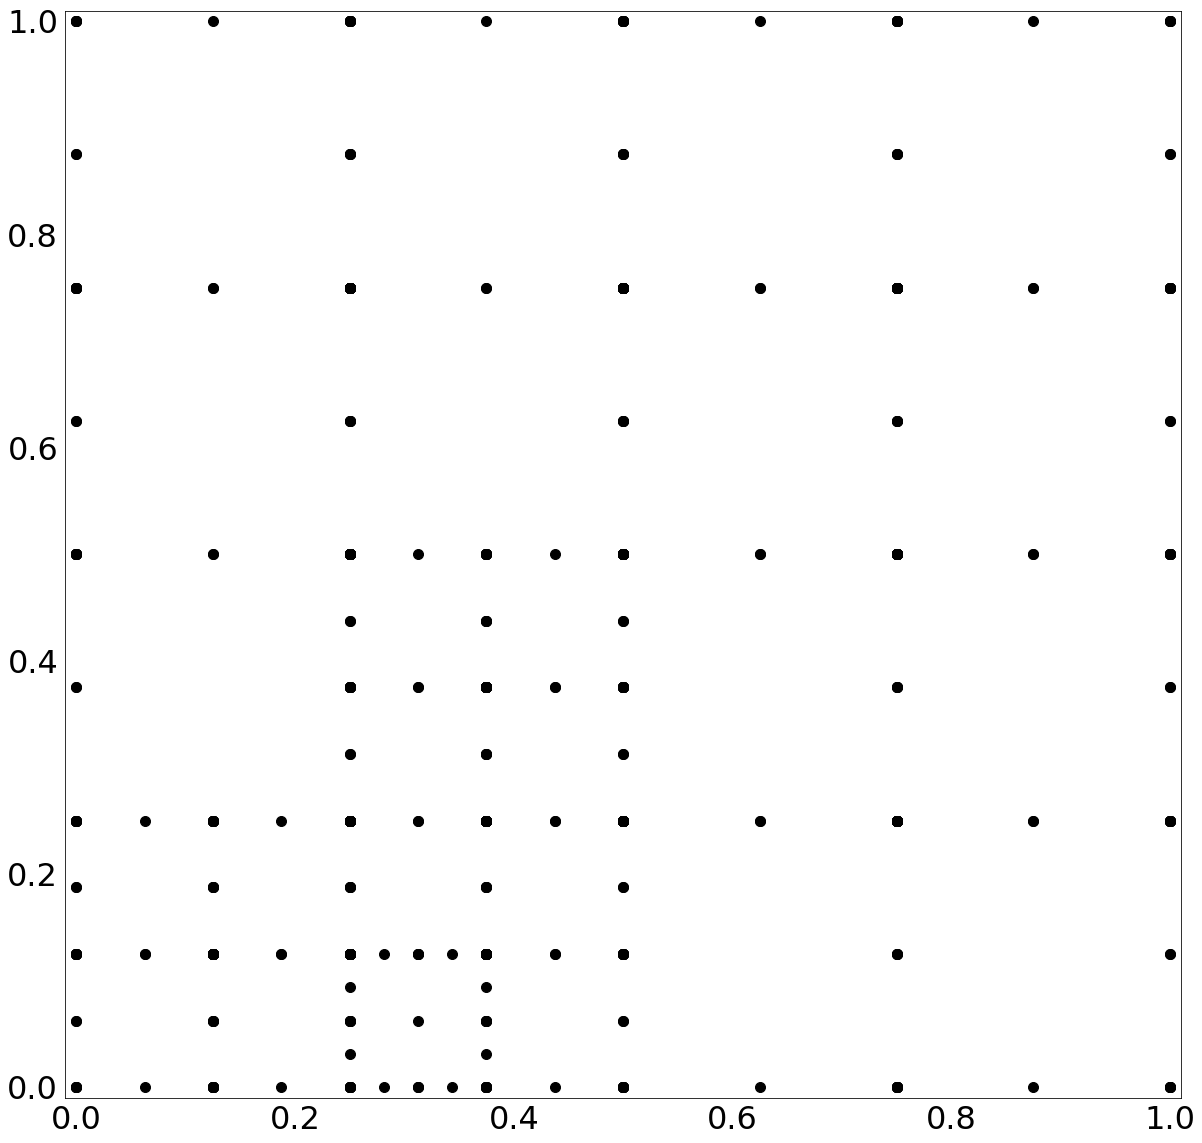

max surplus error: 0.00308335180726 total surplus error: 0.0139182278549
combiintegral: 0.11165011576
Current error: 0.10220256388
Finished refinement
Refinement Graph:


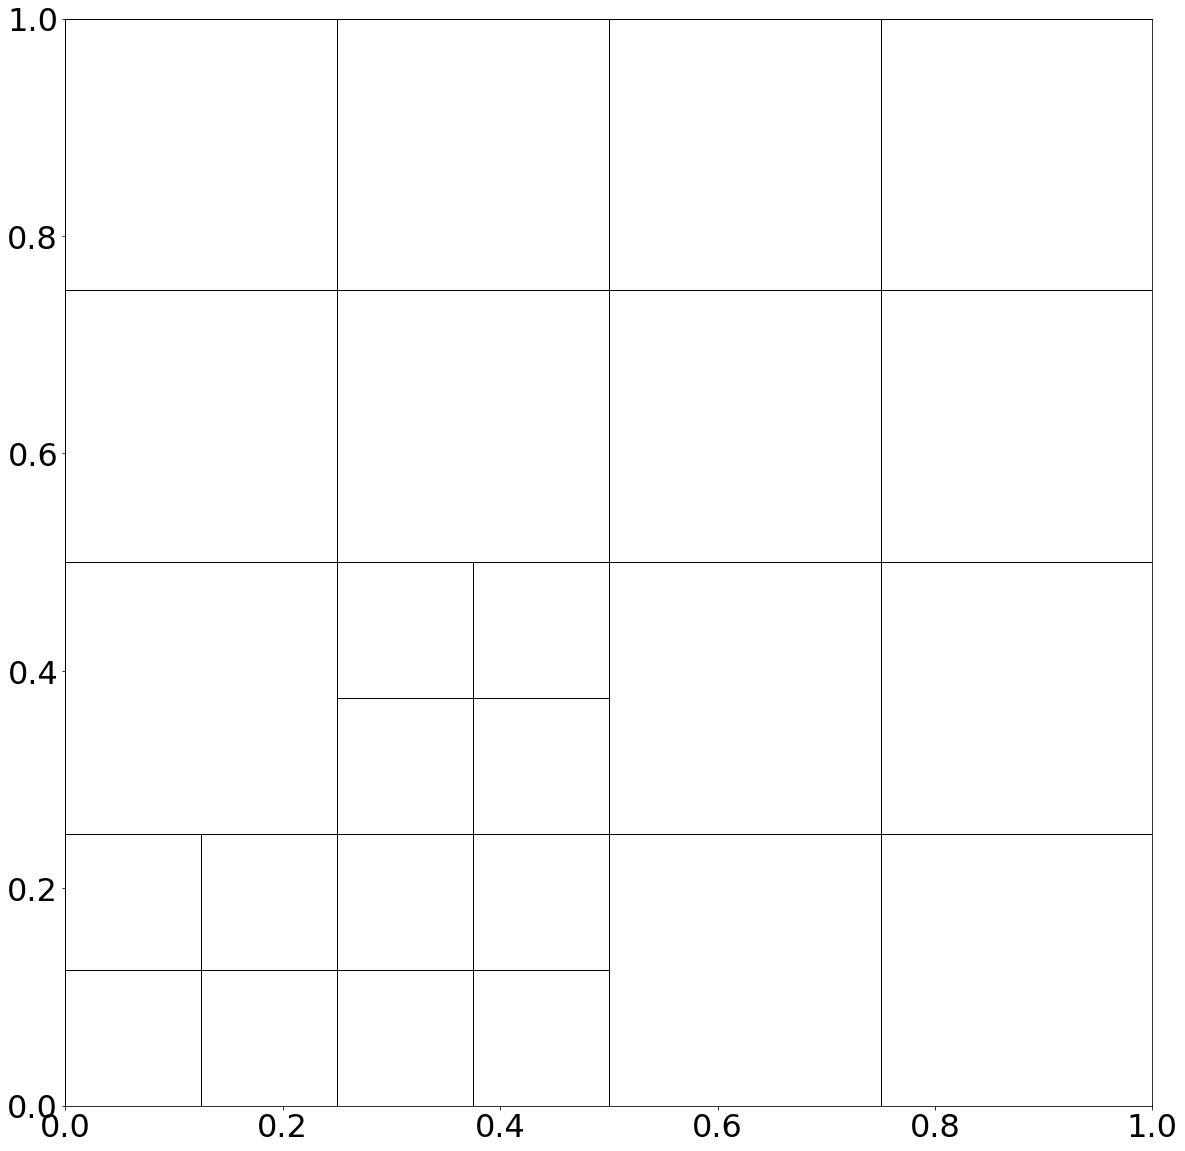

Combi Scheme:


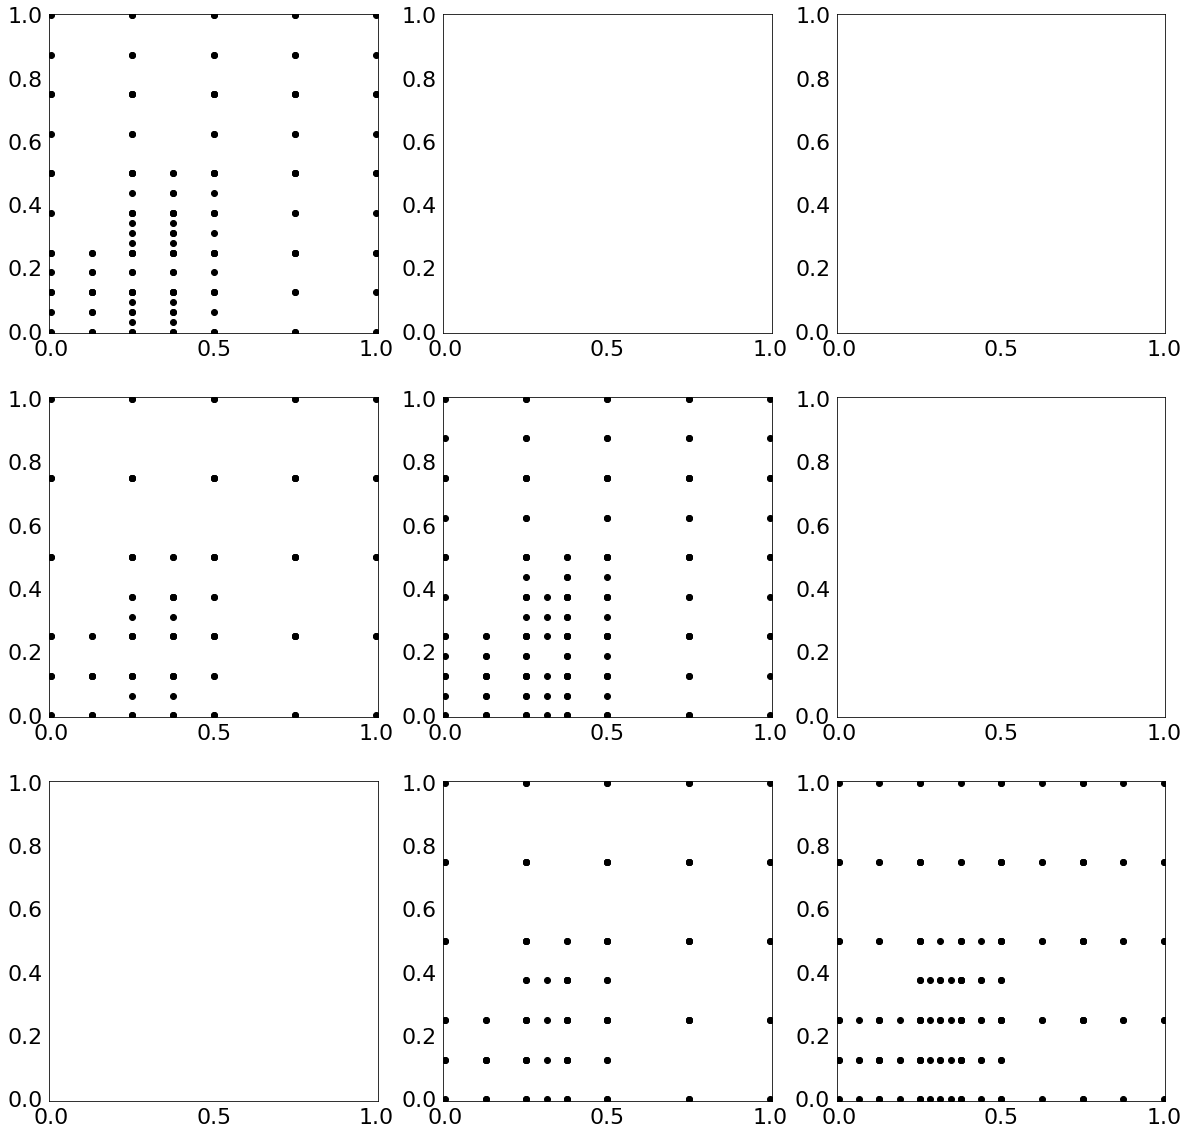

Resulting Sparse Grid:


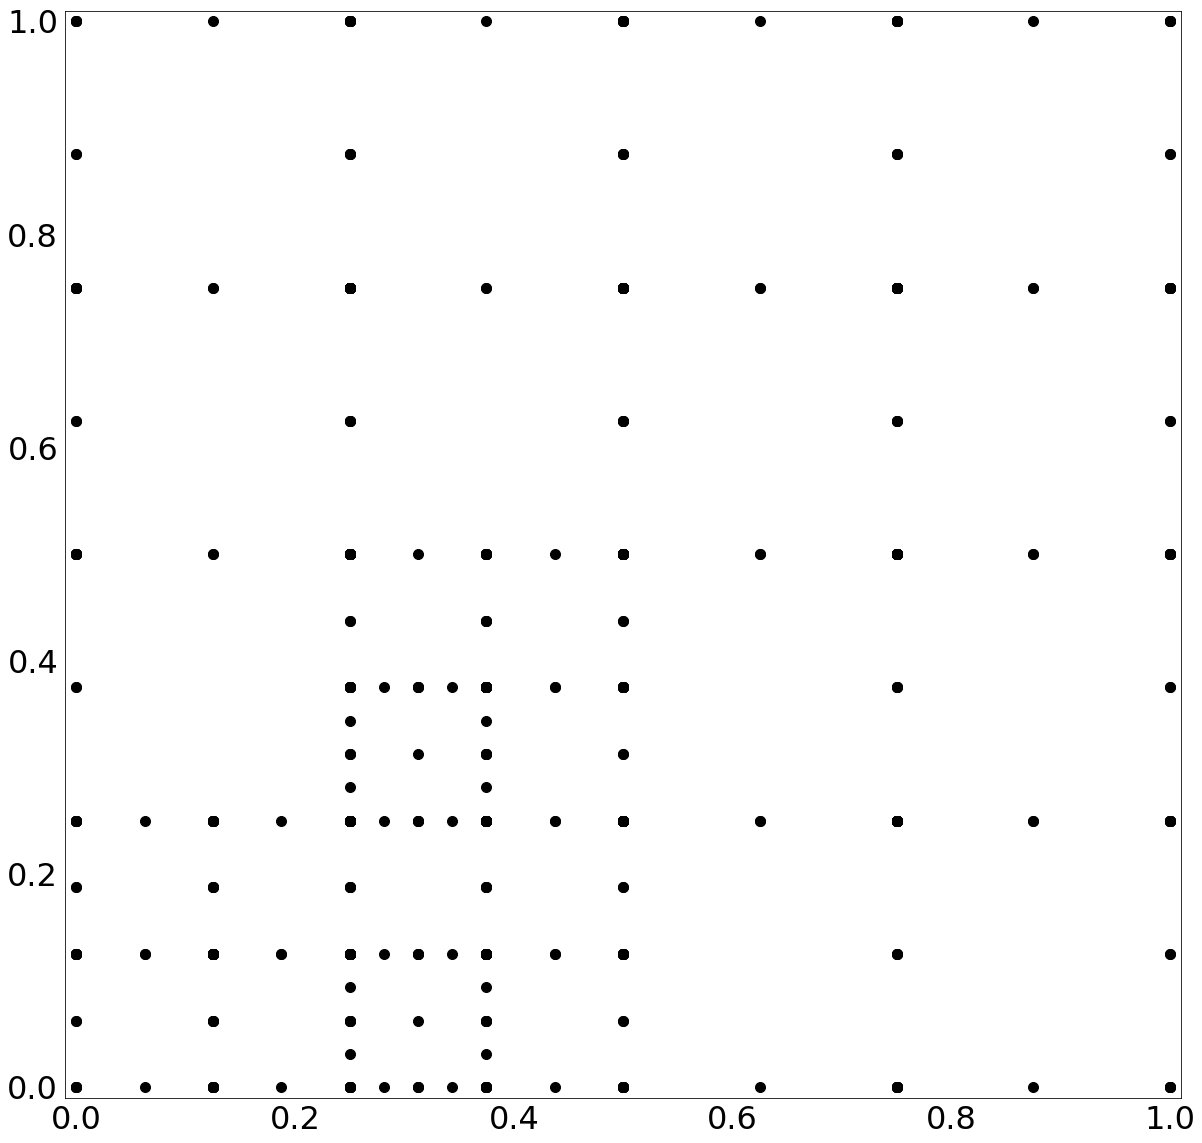

max surplus error: 0.00206733048253 total surplus error: 0.0108423598213
combiintegral: 0.111642631986
Current error: 0.102262742168
Finished refinement
Refinement Graph:


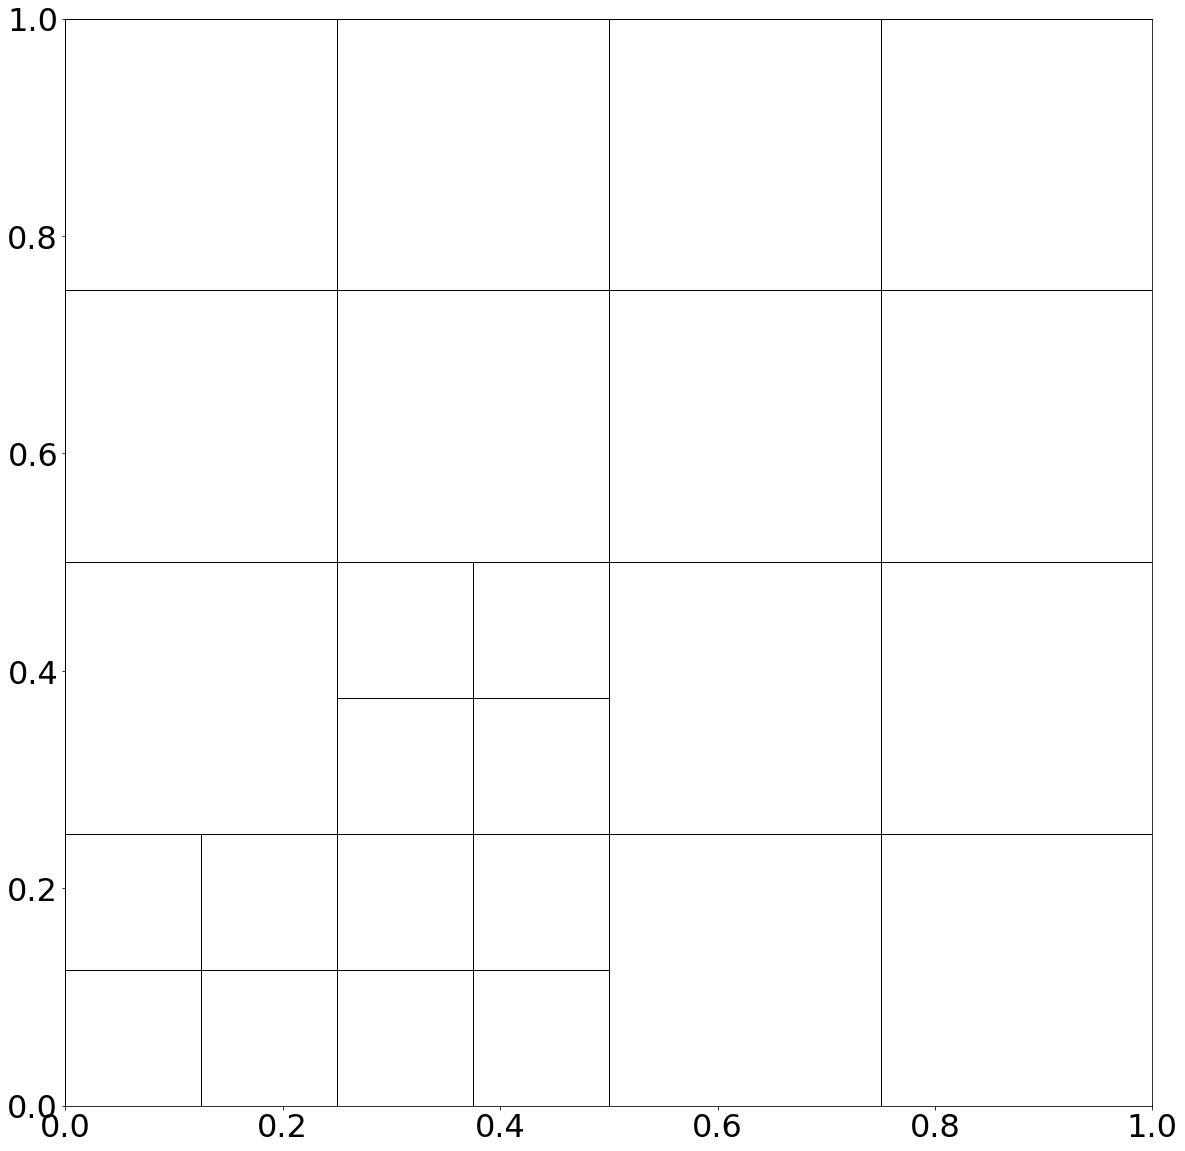

Combi Scheme:


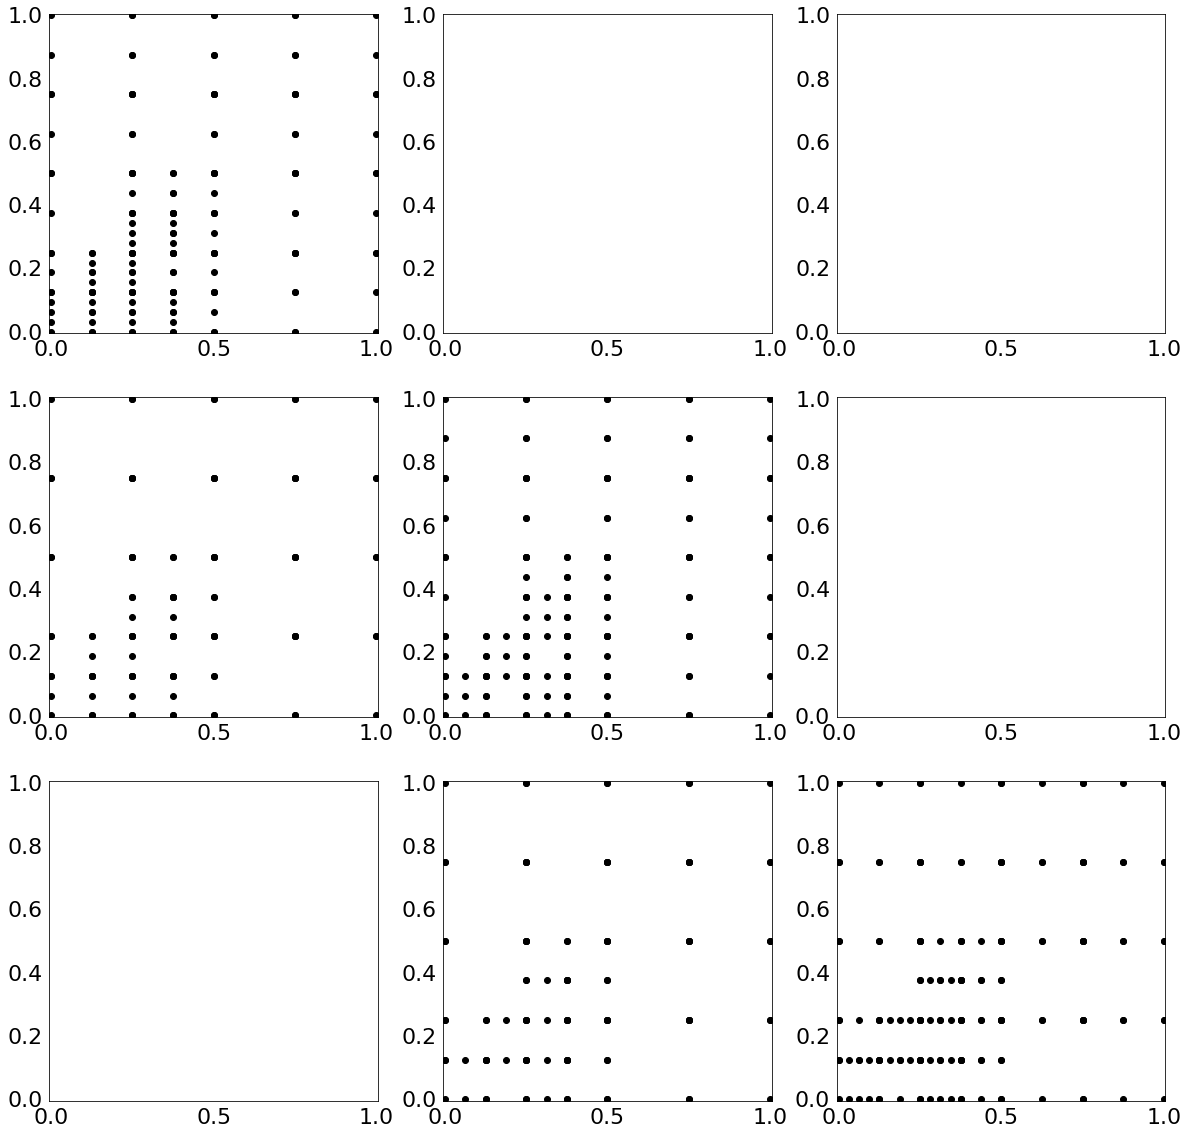

Resulting Sparse Grid:


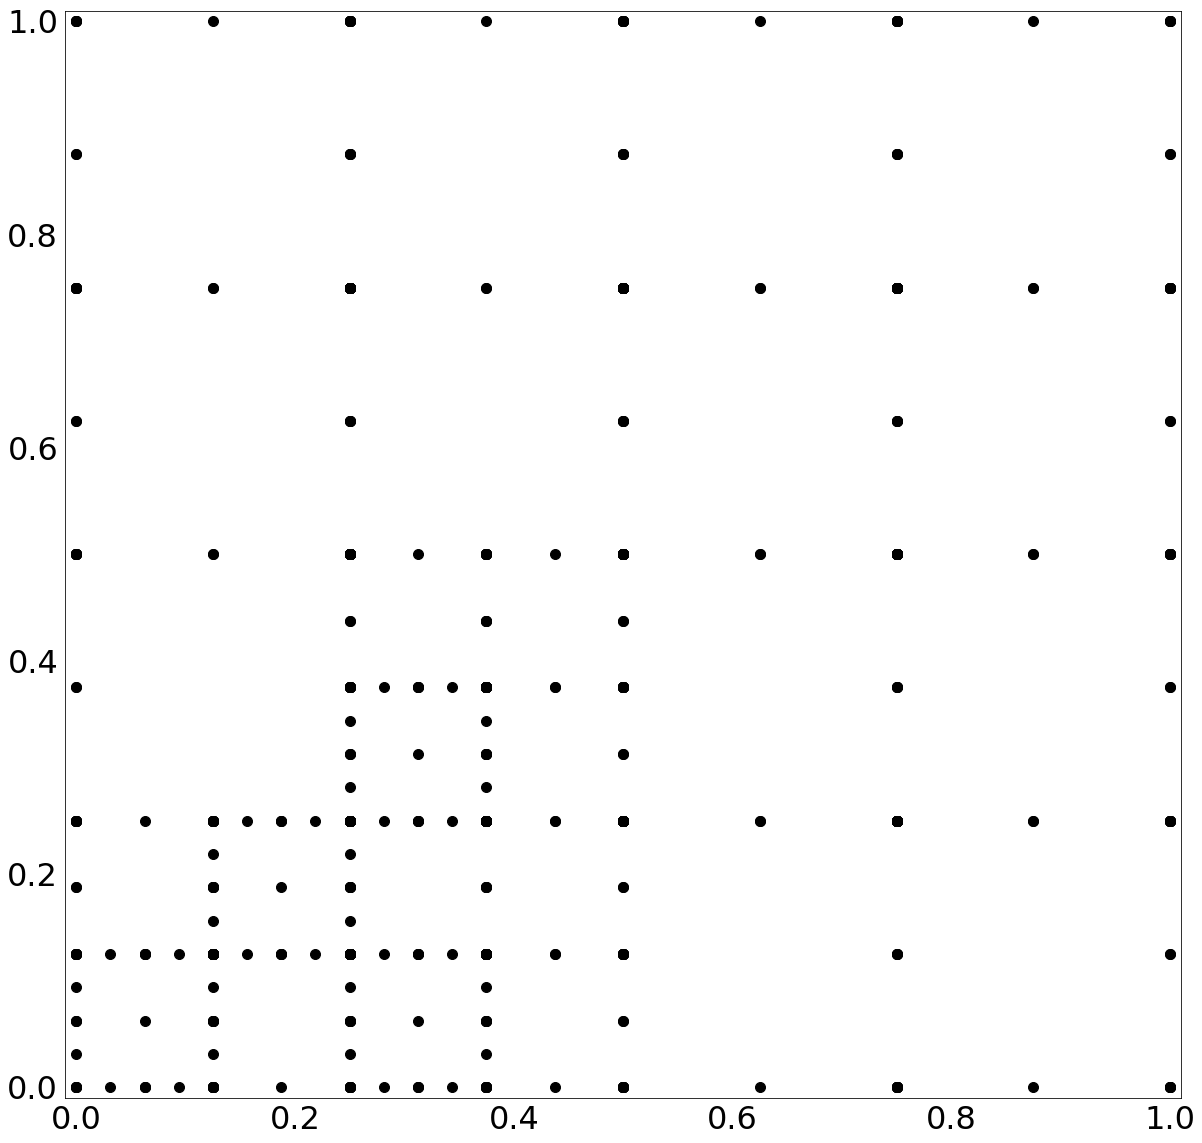

max surplus error: 0.00134327422185 total surplus error: 0.00679856763742
combiintegral: 0.11161590001
Current error: 0.102477698497
Finished refinement
Refinement Graph:


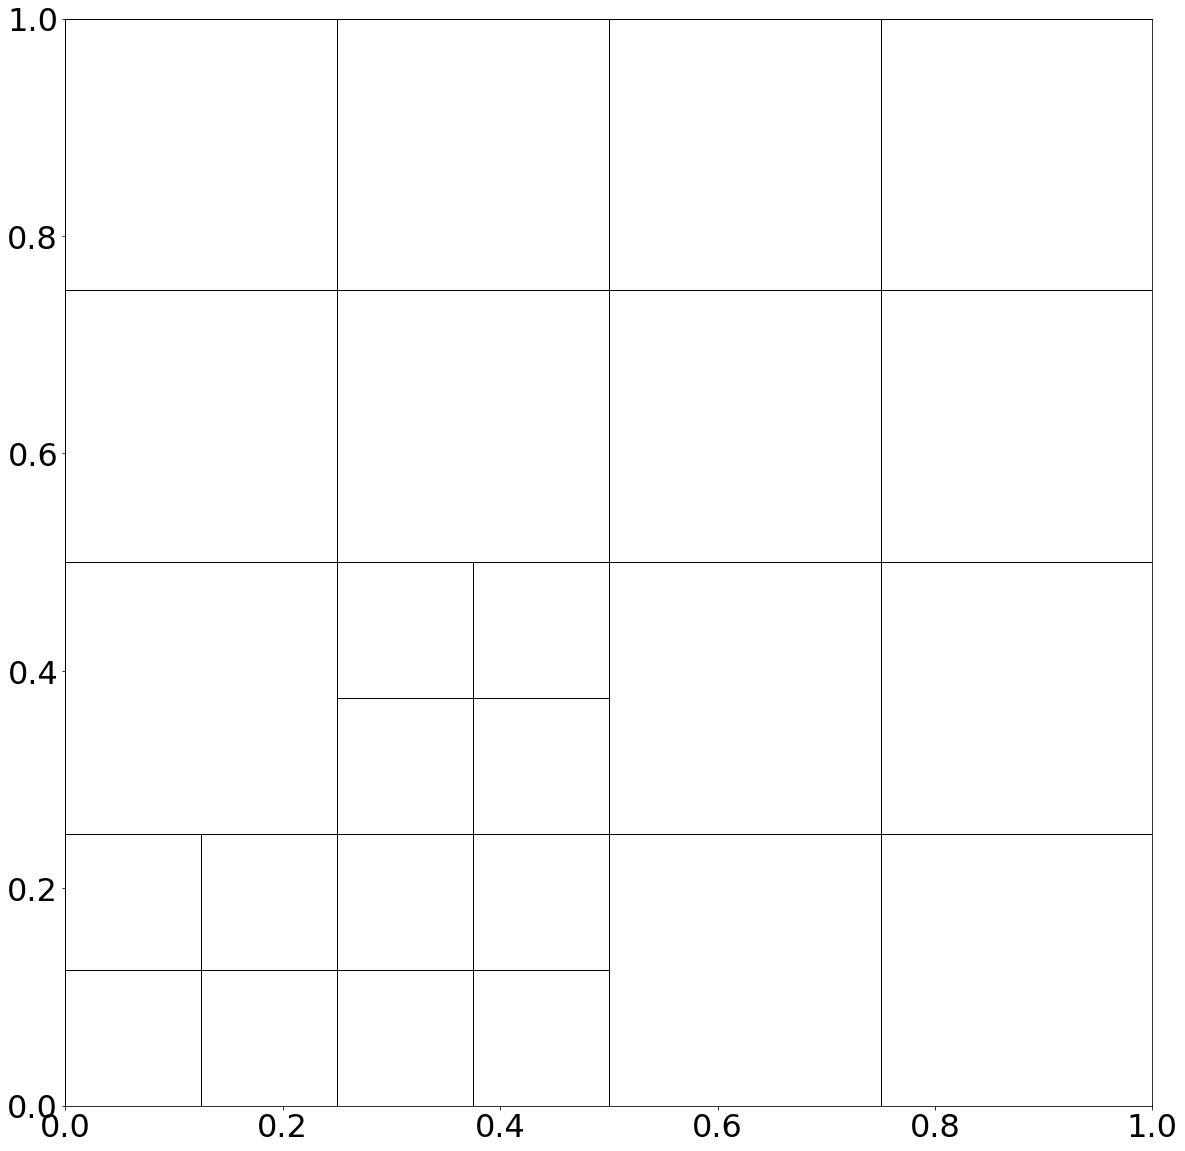

Combi Scheme:


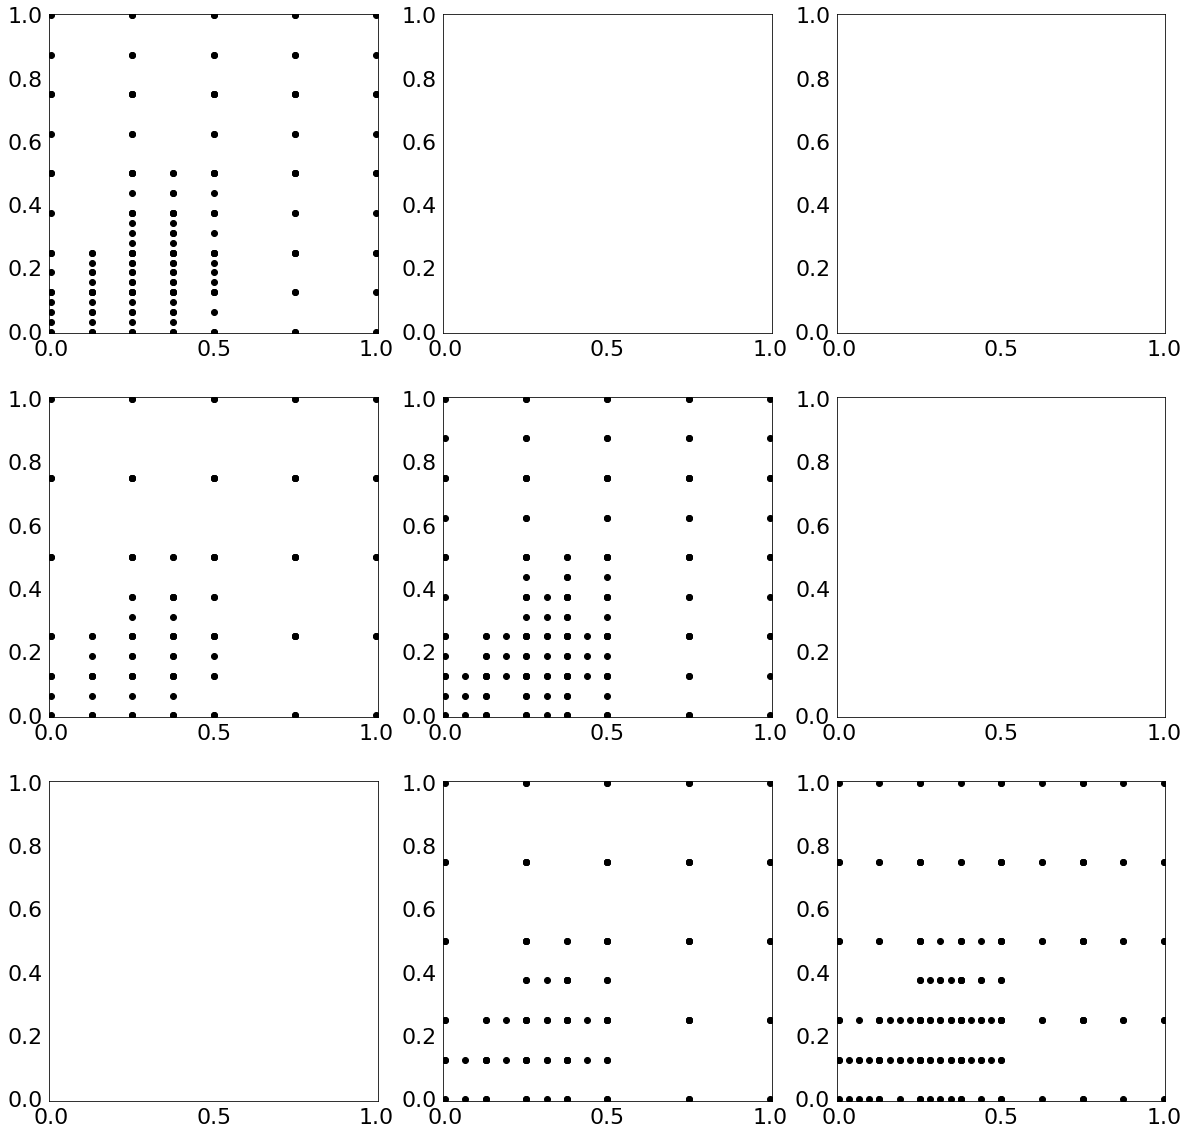

Resulting Sparse Grid:


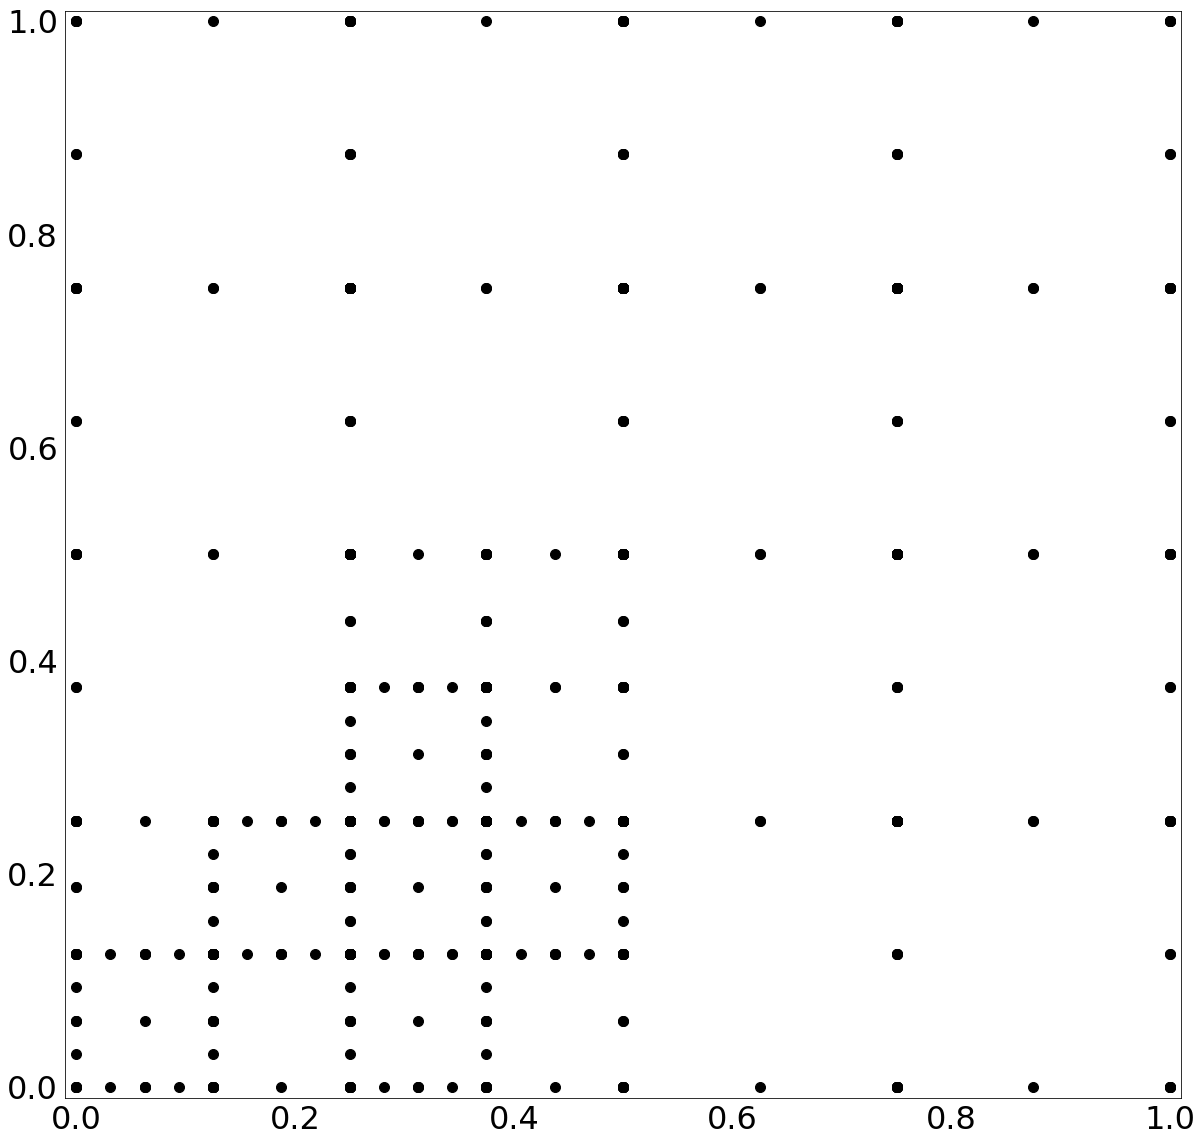

max surplus error: 0.00109268115511 total surplus error: 0.00506099634106
combiintegral: 0.112415181716
Current error: 0.0960505393175
Finished refinement
Refinement Graph:


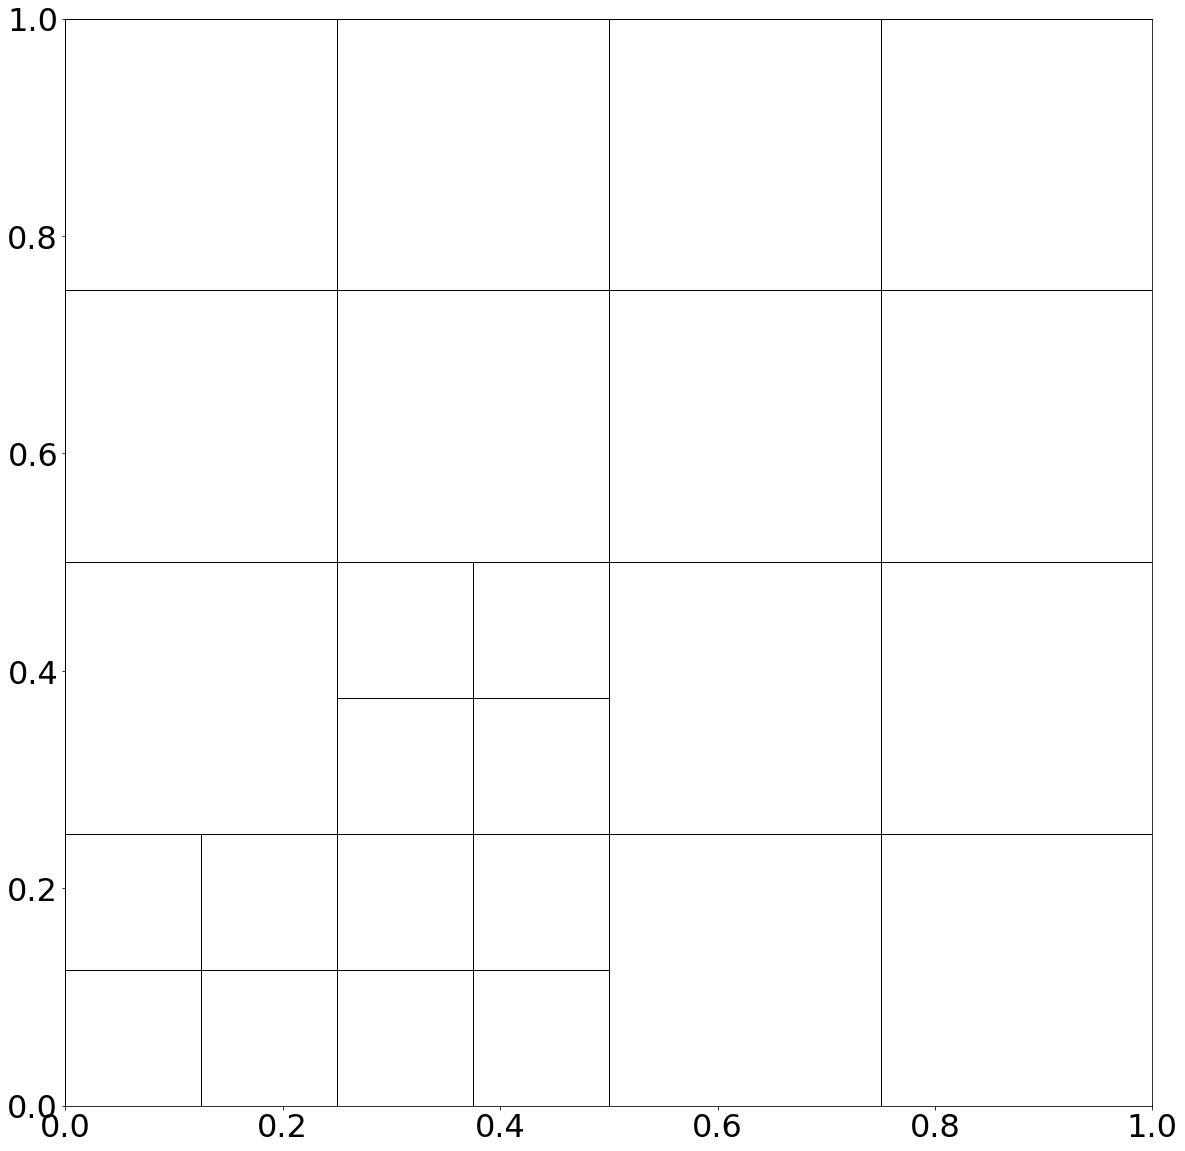

Combi Scheme:


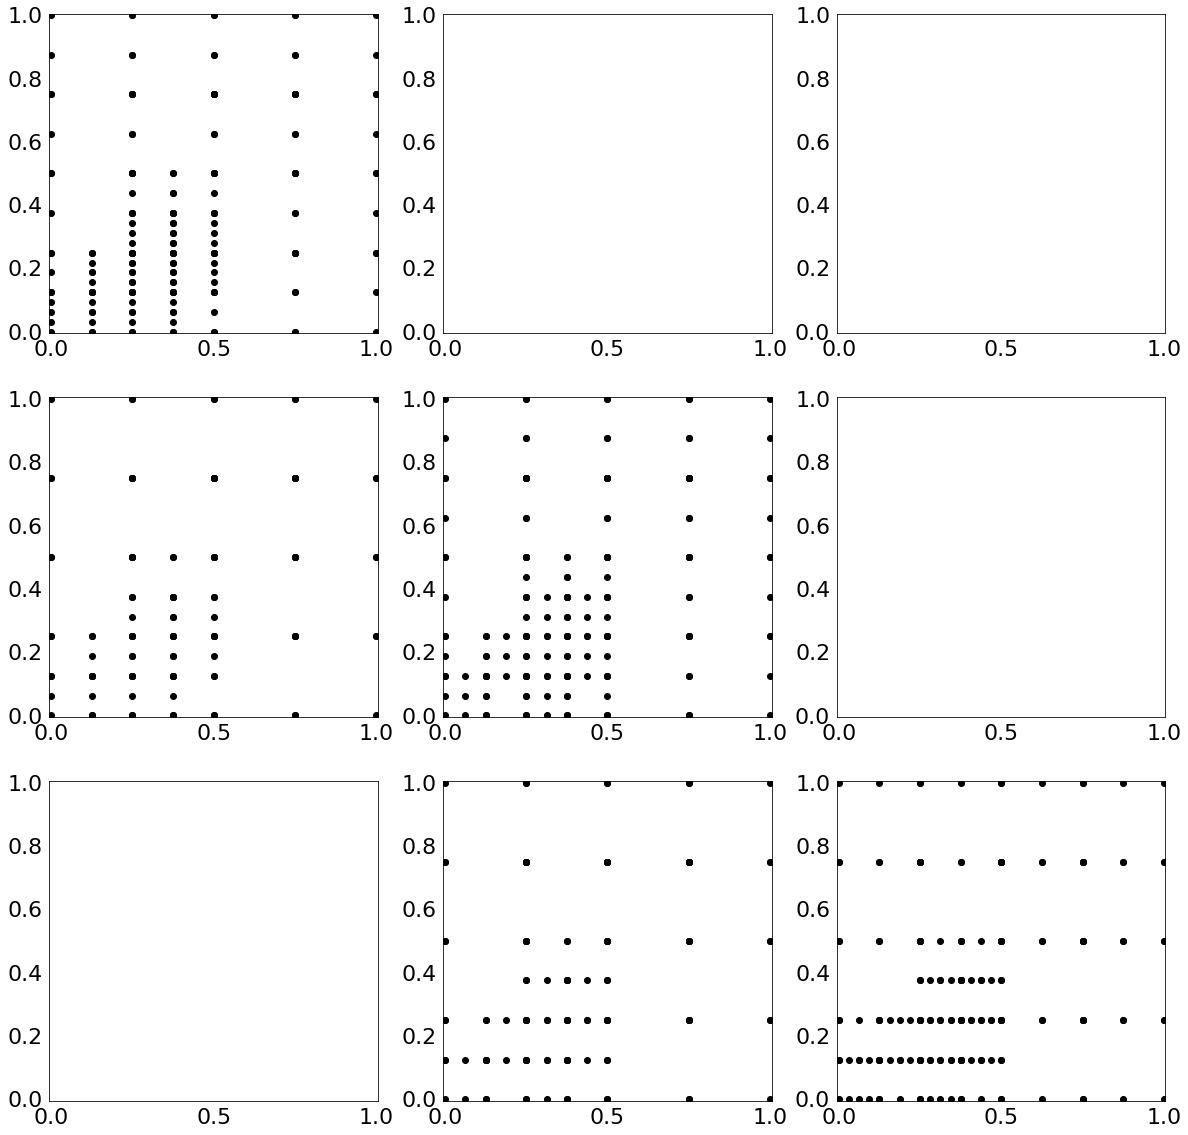

Resulting Sparse Grid:


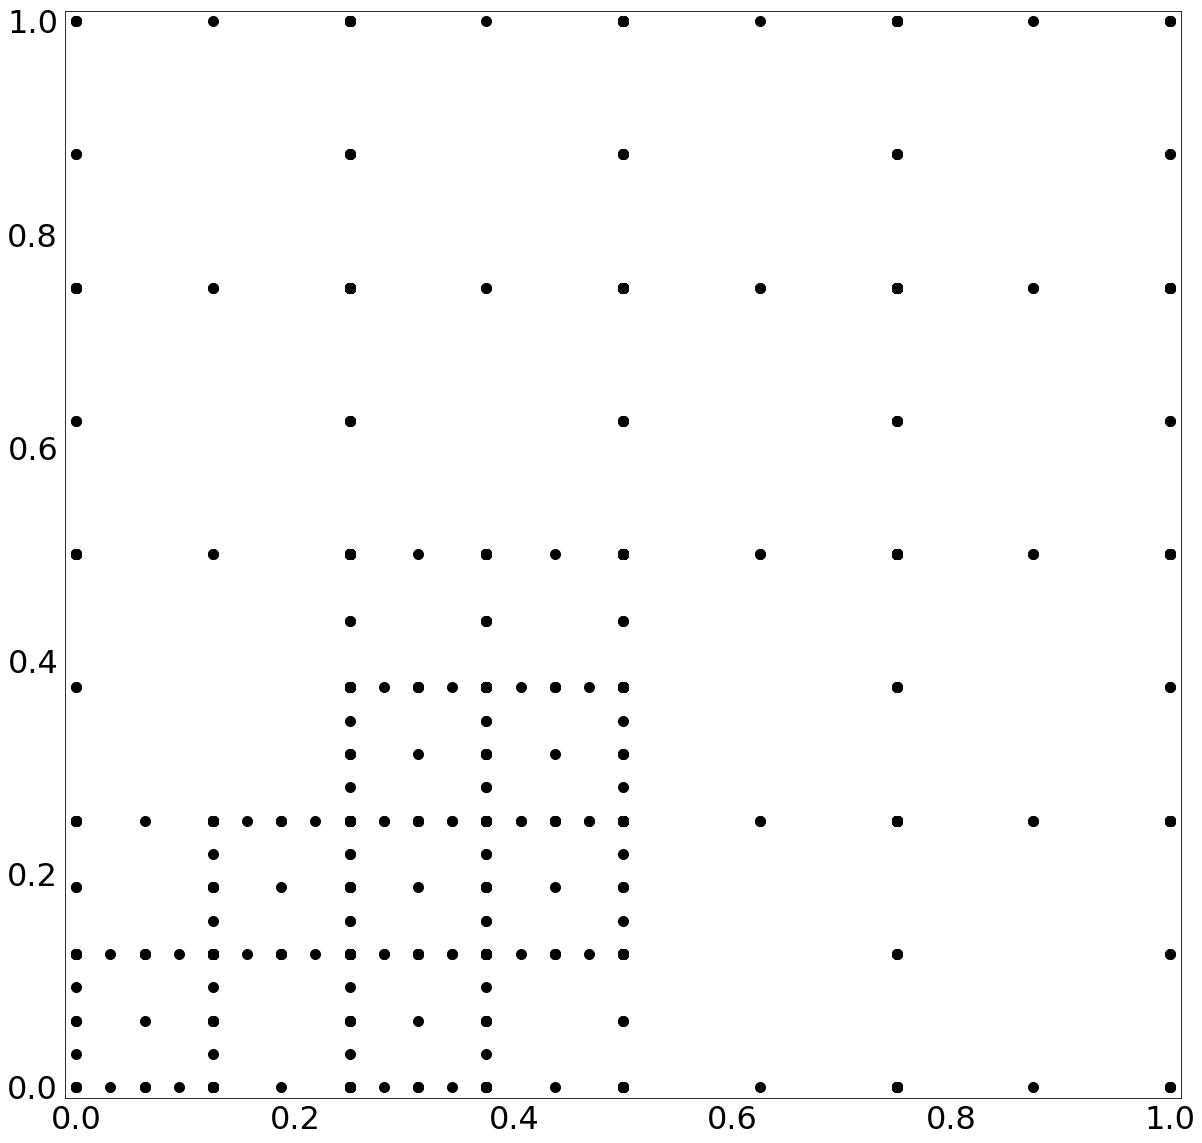

max surplus error: 0.000811997584791 total surplus error: 0.00459828017816
combiintegral: 0.113045146709
Current error: 0.0909848844276
New scheme
0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Finished refinement
Refinement Graph:


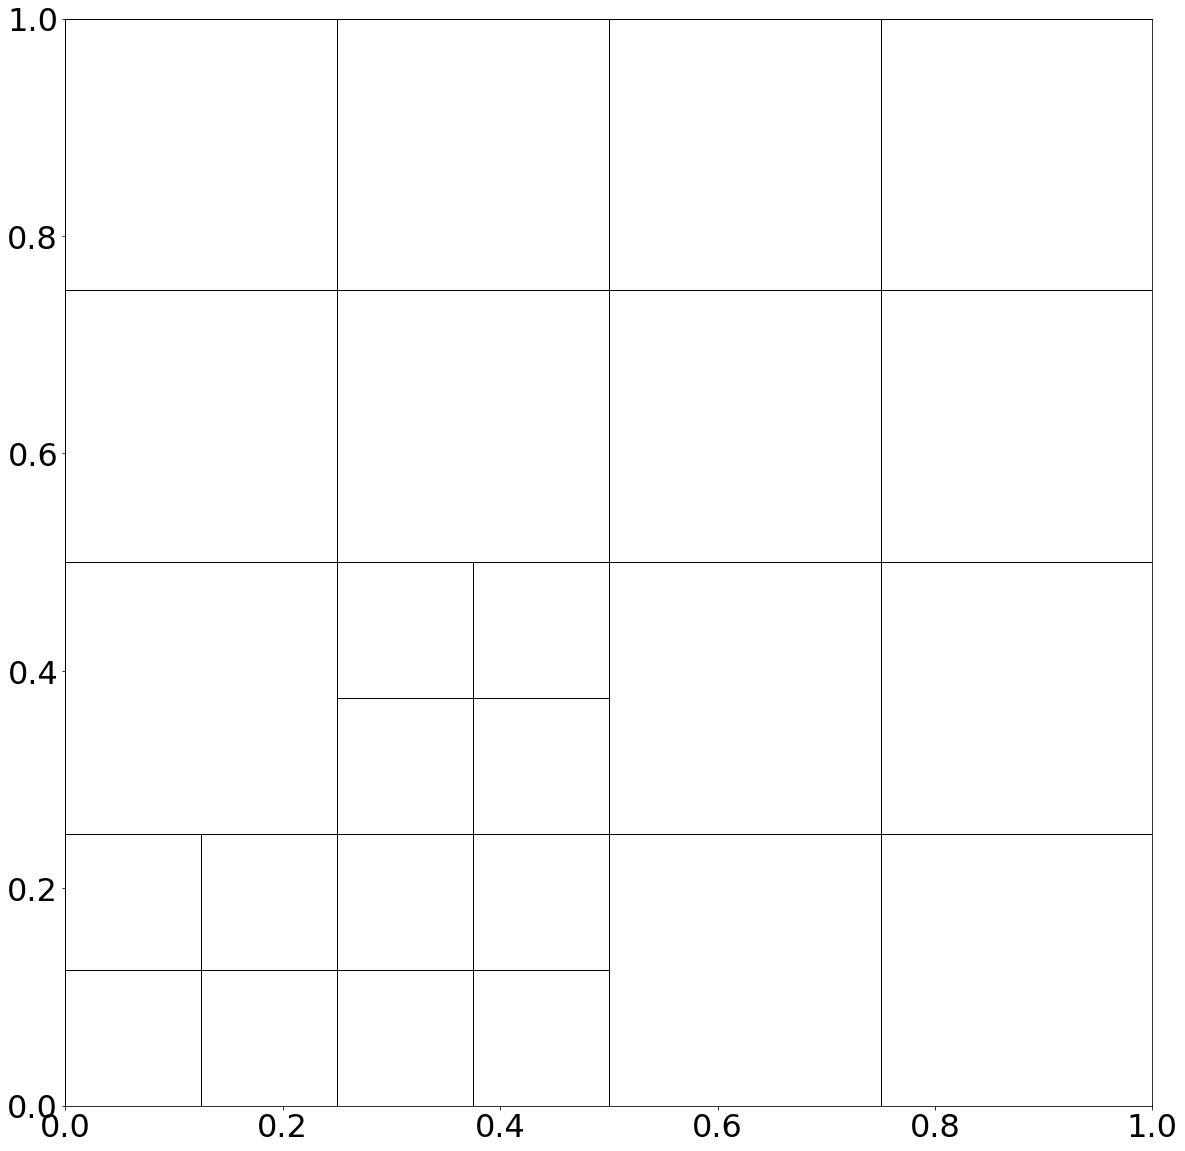

Combi Scheme:


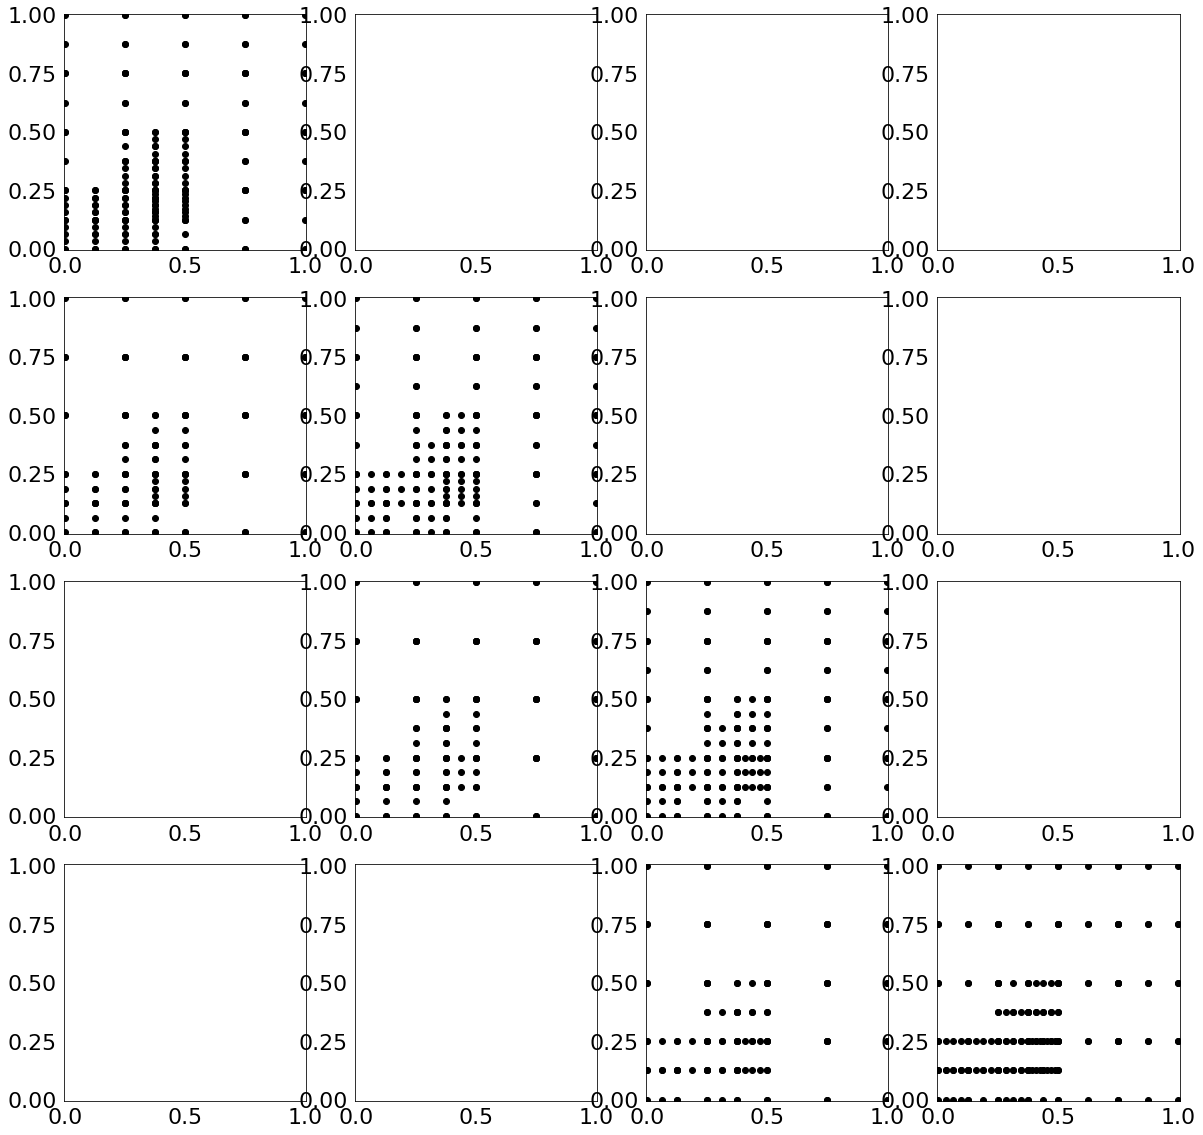

Resulting Sparse Grid:


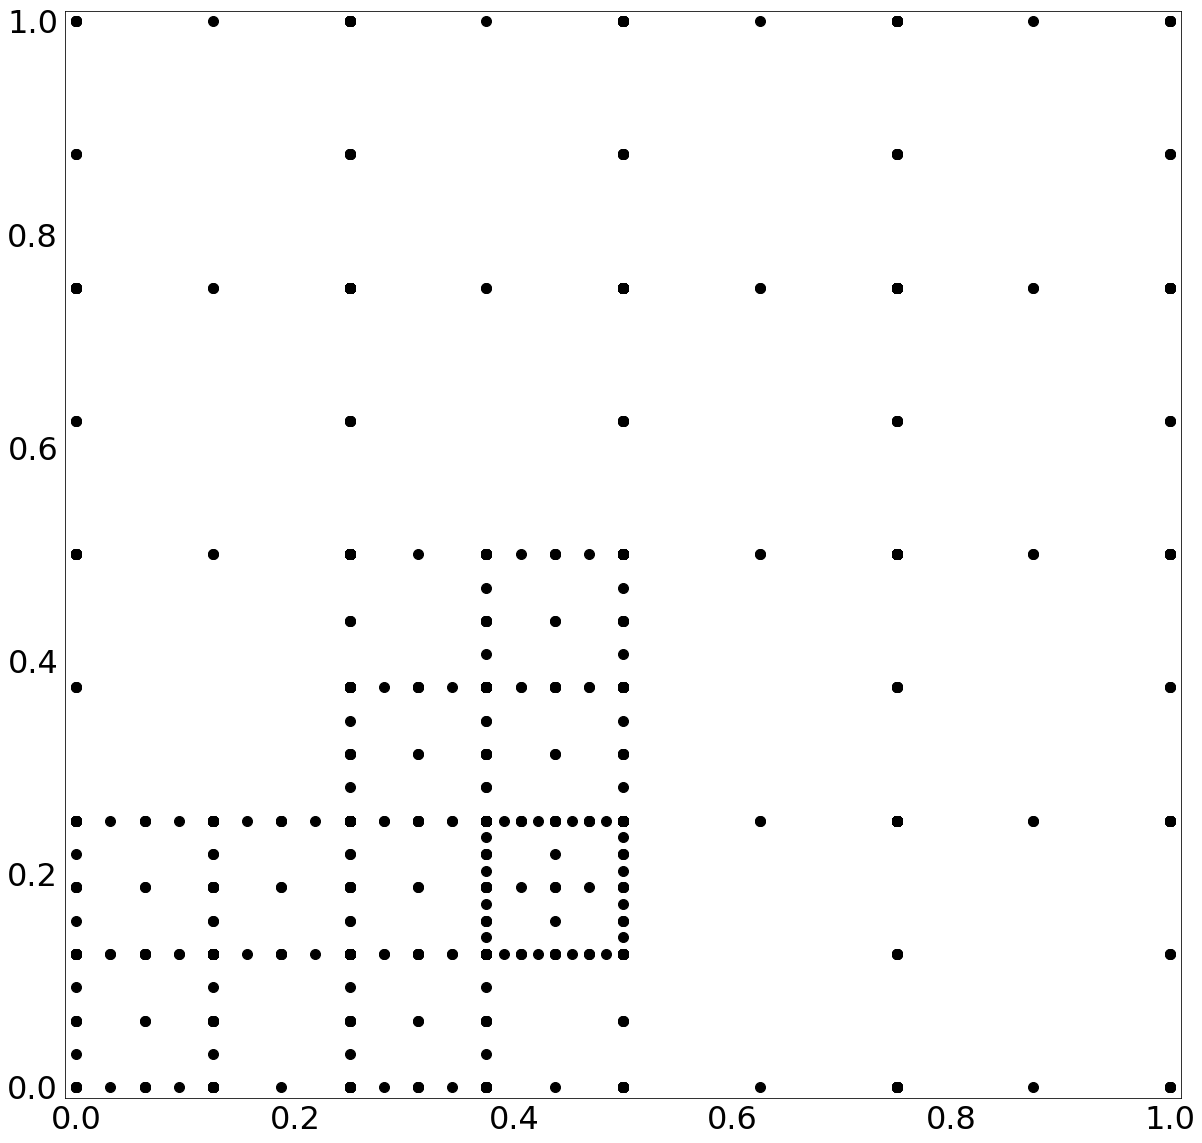

max surplus error: 0.000737077825142 total surplus error: 0.00337609121548
combiintegral: 0.114174067107
Current error: 0.0819070448533
Finished refinement
Refinement Graph:


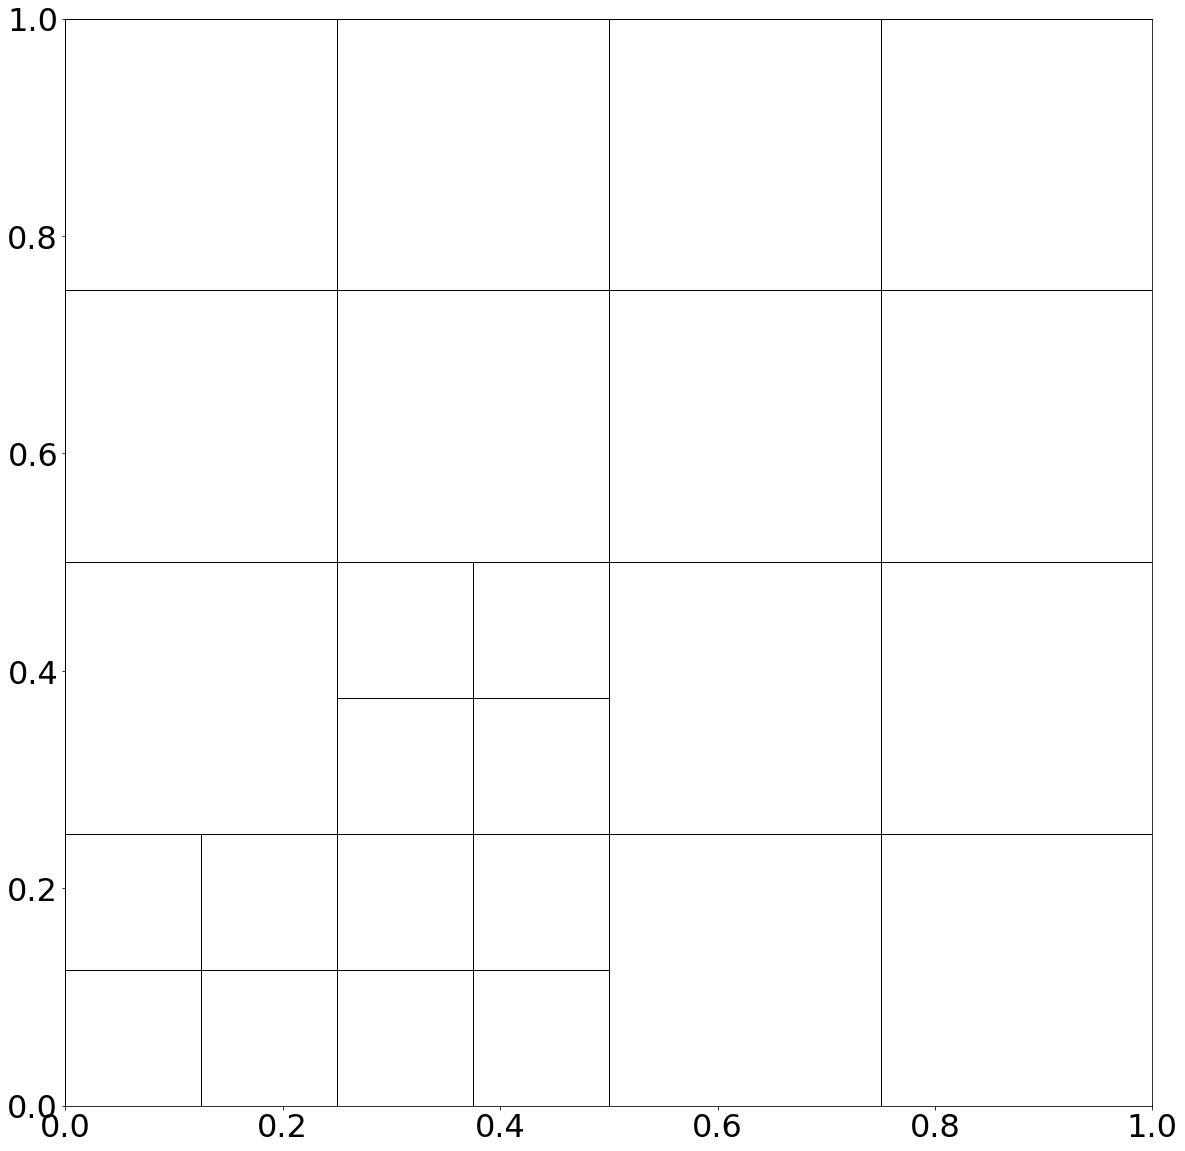

Combi Scheme:


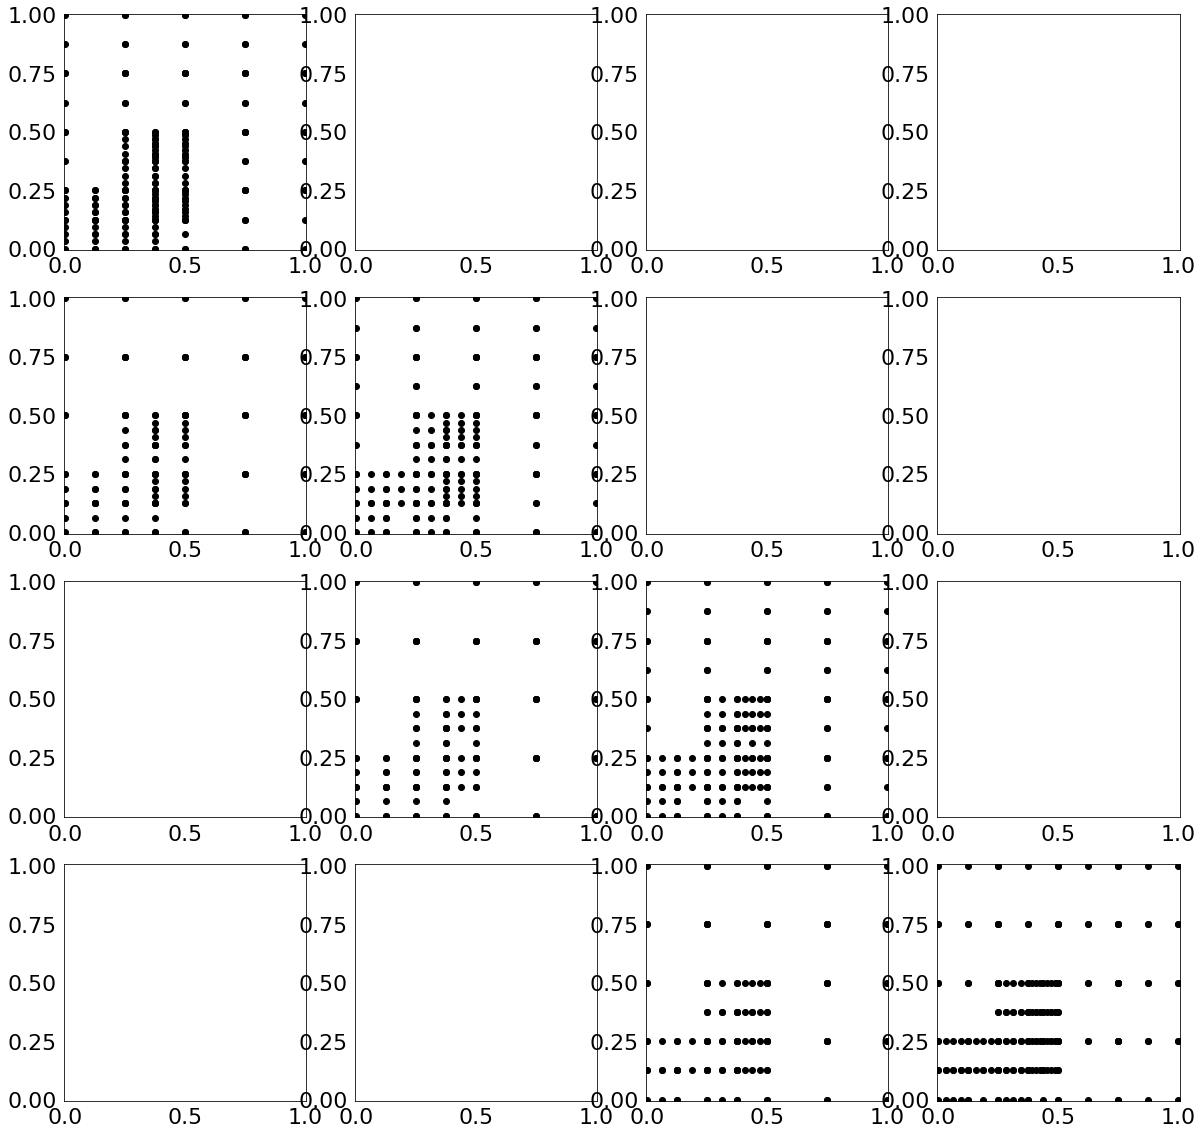

Resulting Sparse Grid:


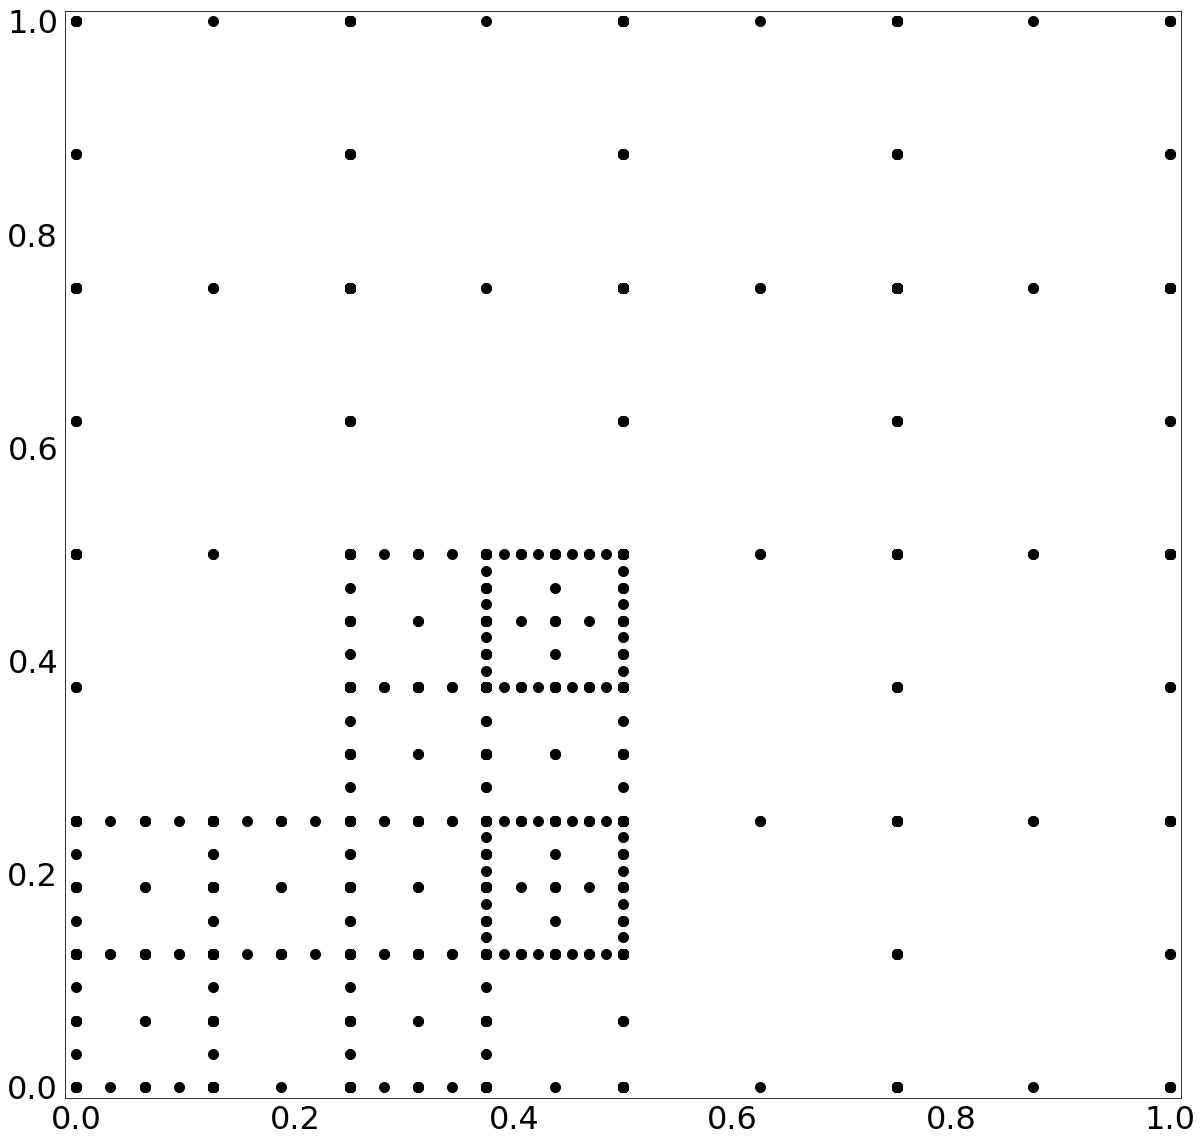

max surplus error: 0.000629964992213 total surplus error: 0.00296446343985
combiintegral: 0.115171417766
Current error: 0.0738871797758
Finished refinement
Refinement Graph:


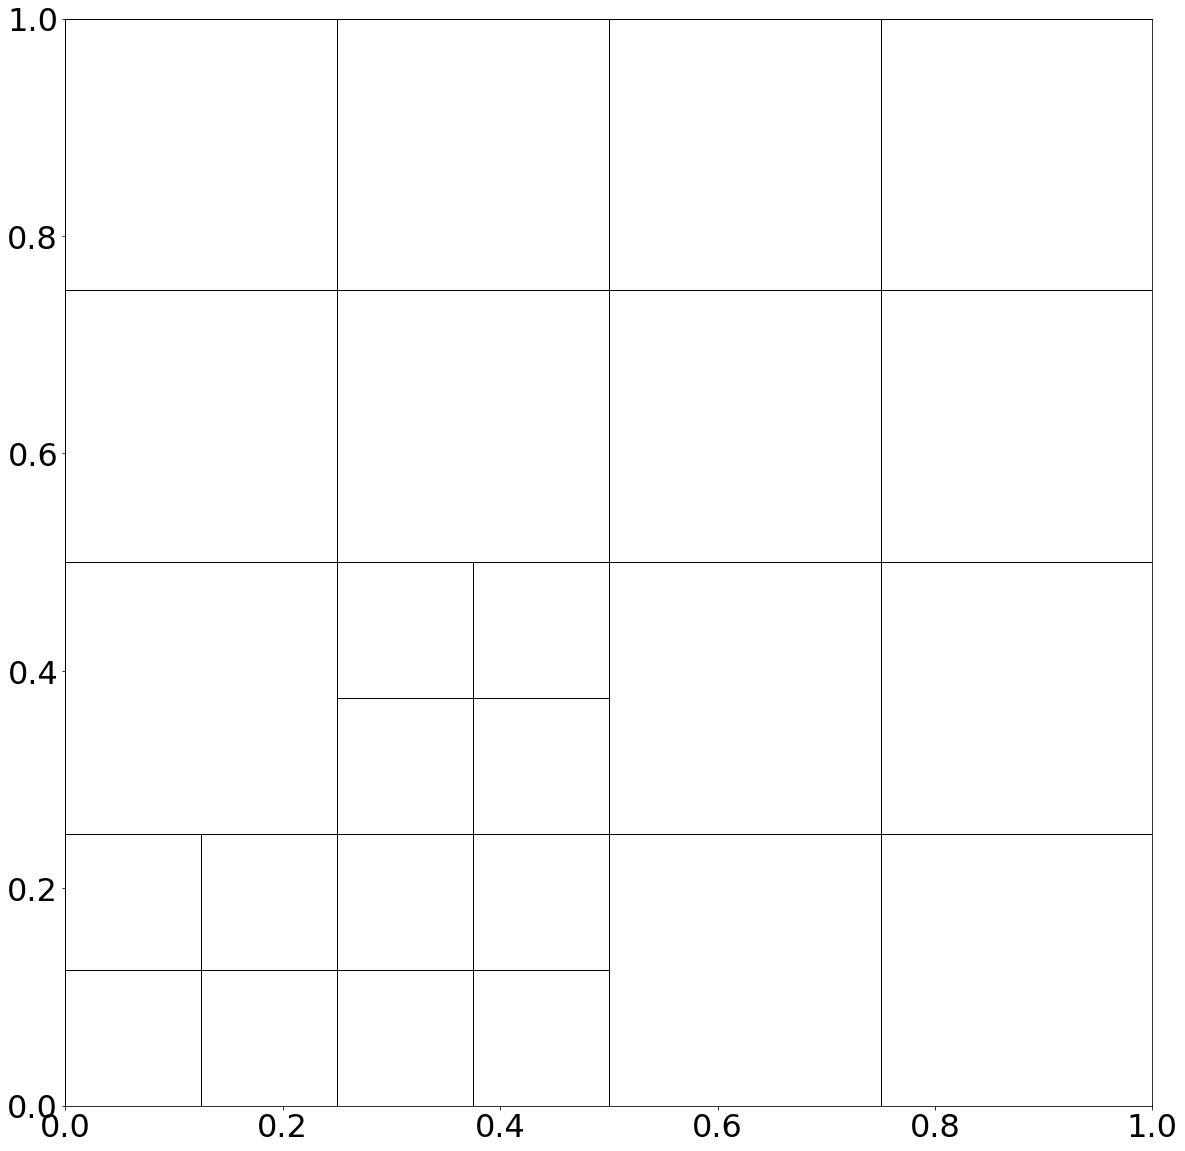

Combi Scheme:


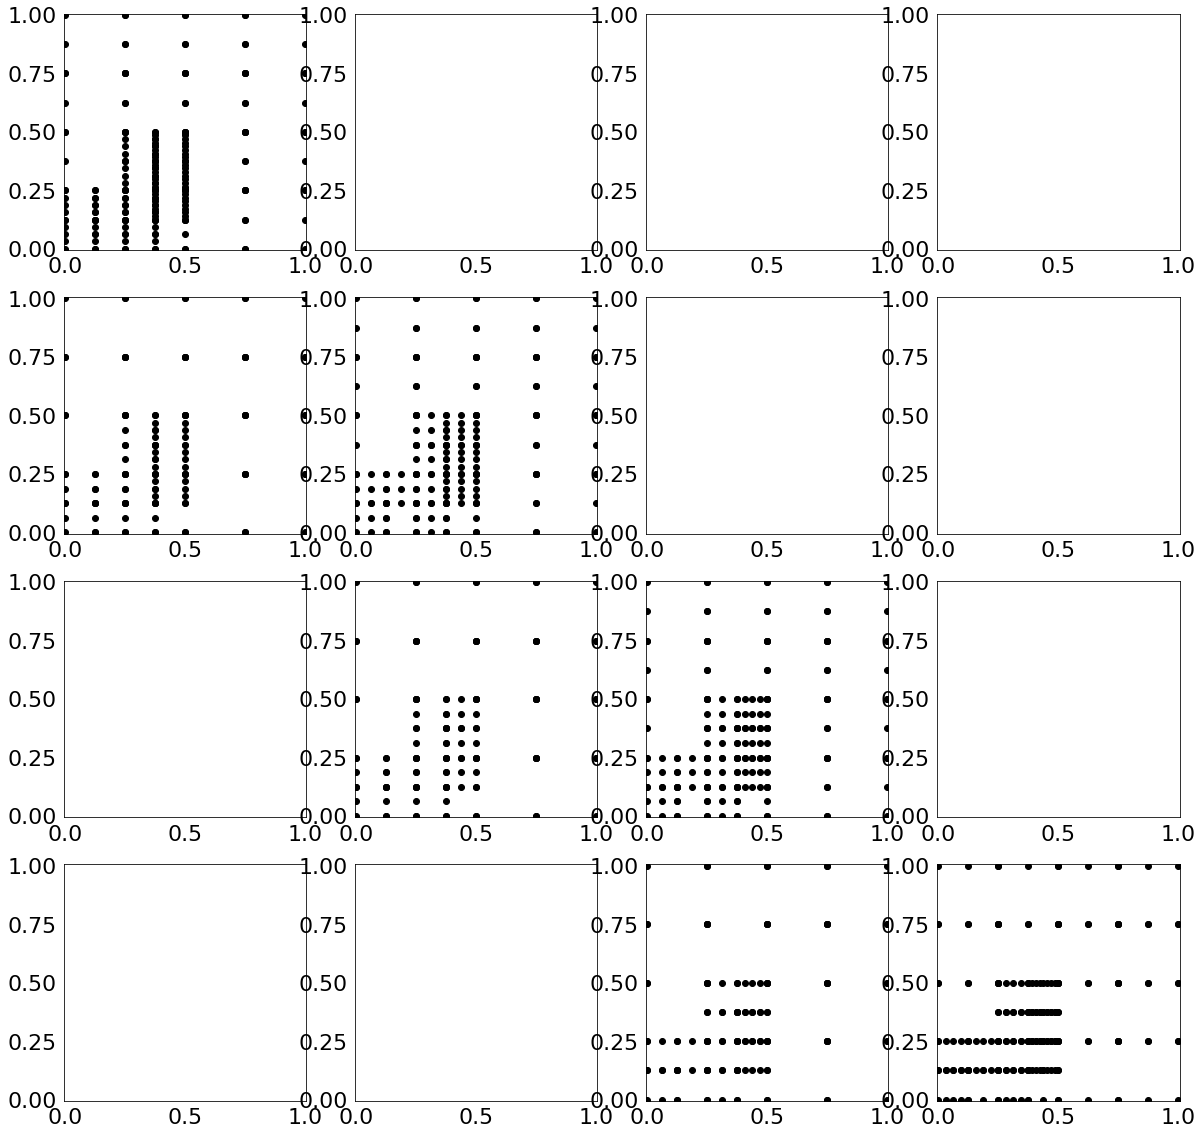

Resulting Sparse Grid:


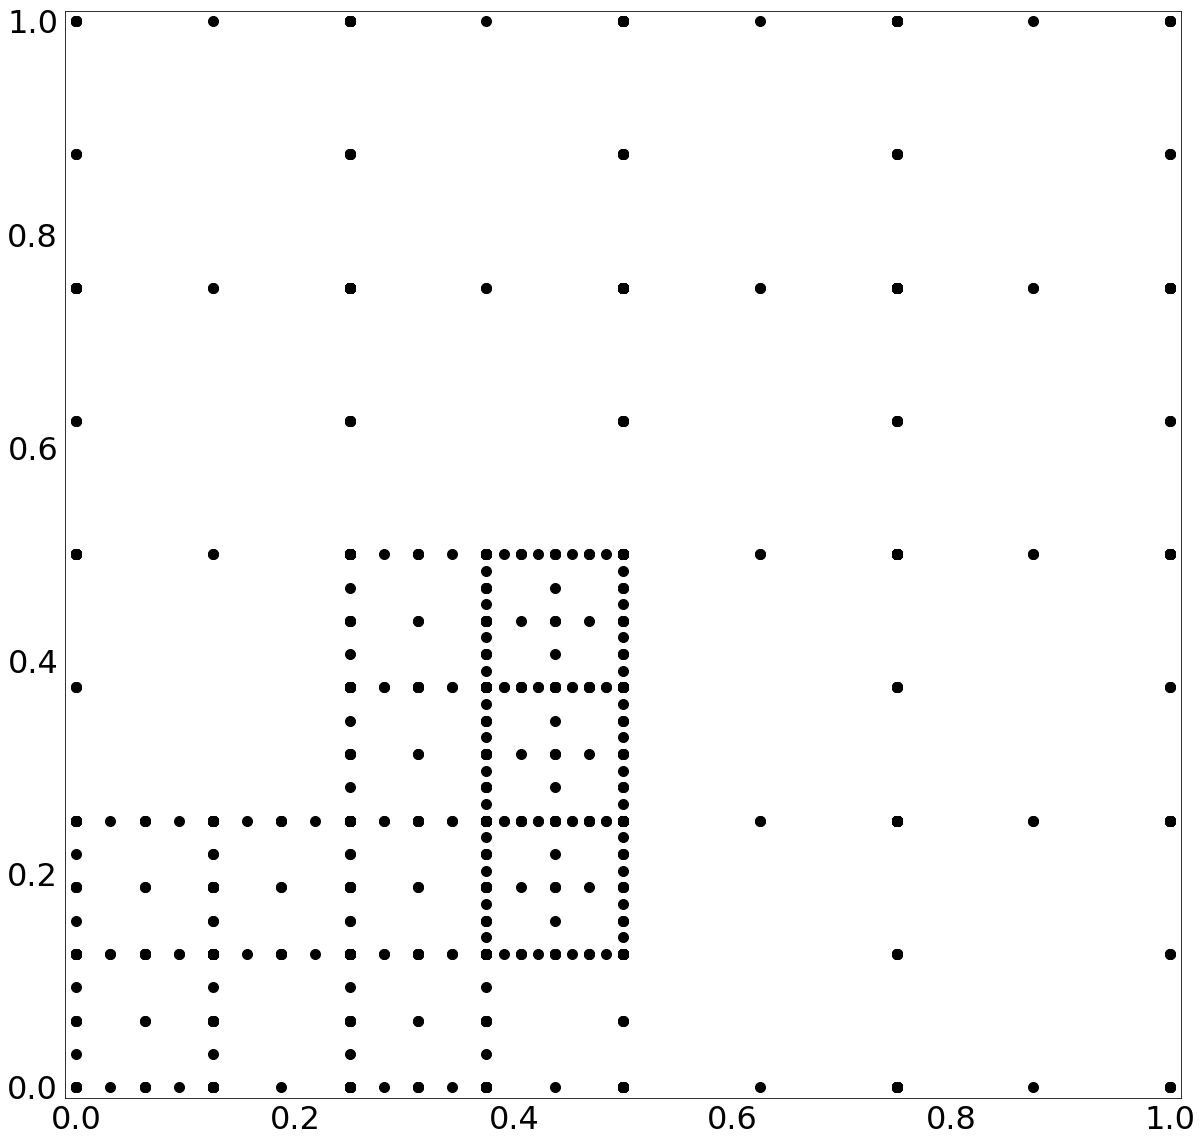

max surplus error: 0.000537804424153 total surplus error: 0.0026492751062
combiintegral: 0.115486194424
Current error: 0.0713560075053
Finished refinement
Refinement Graph:


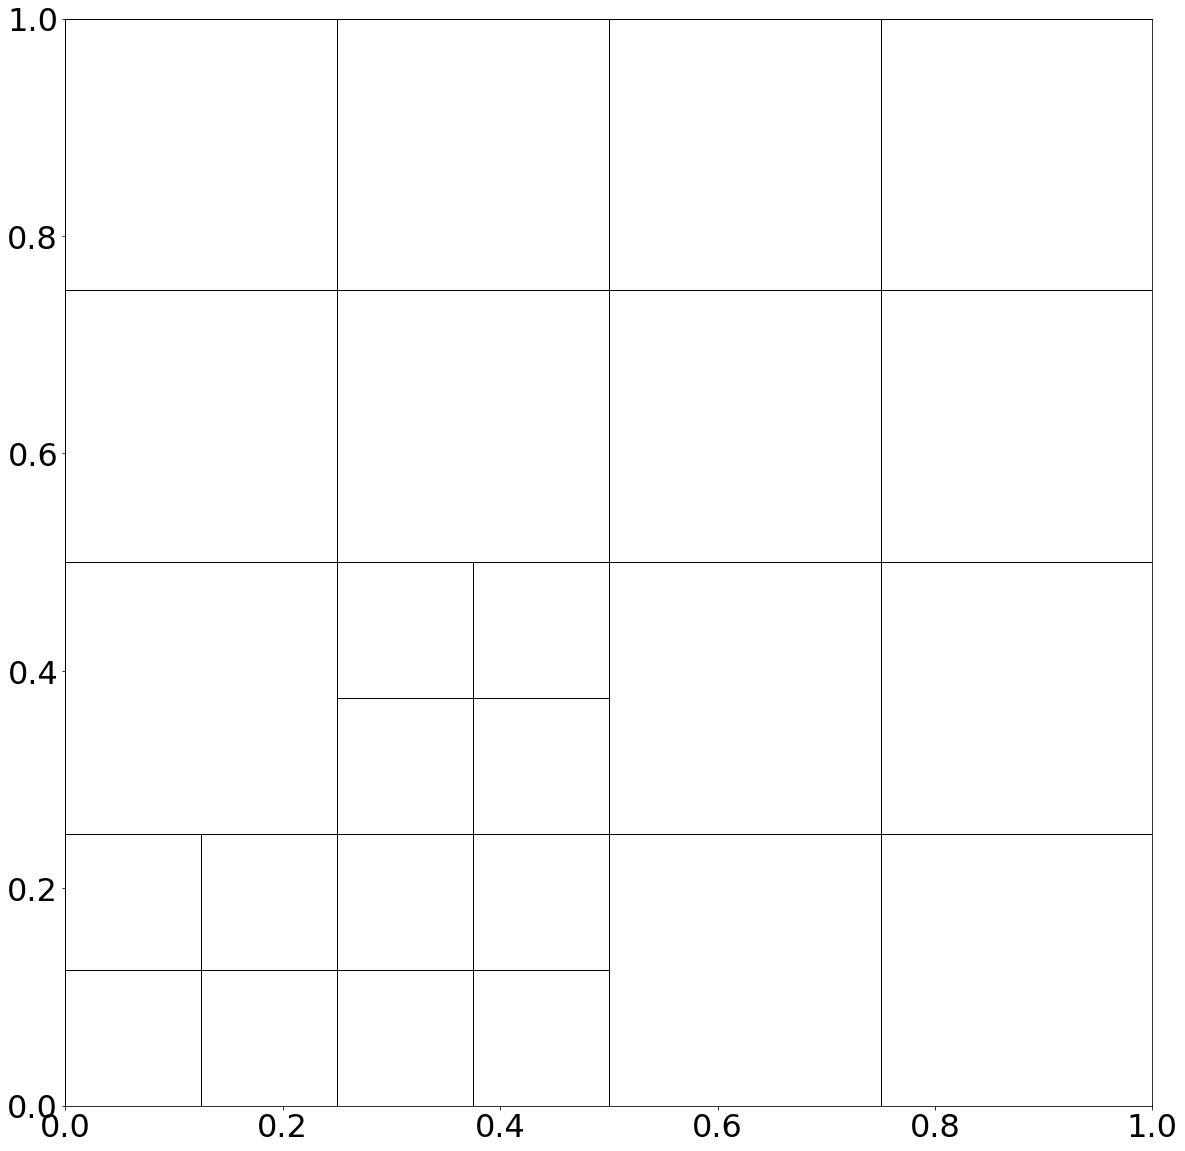

Combi Scheme:


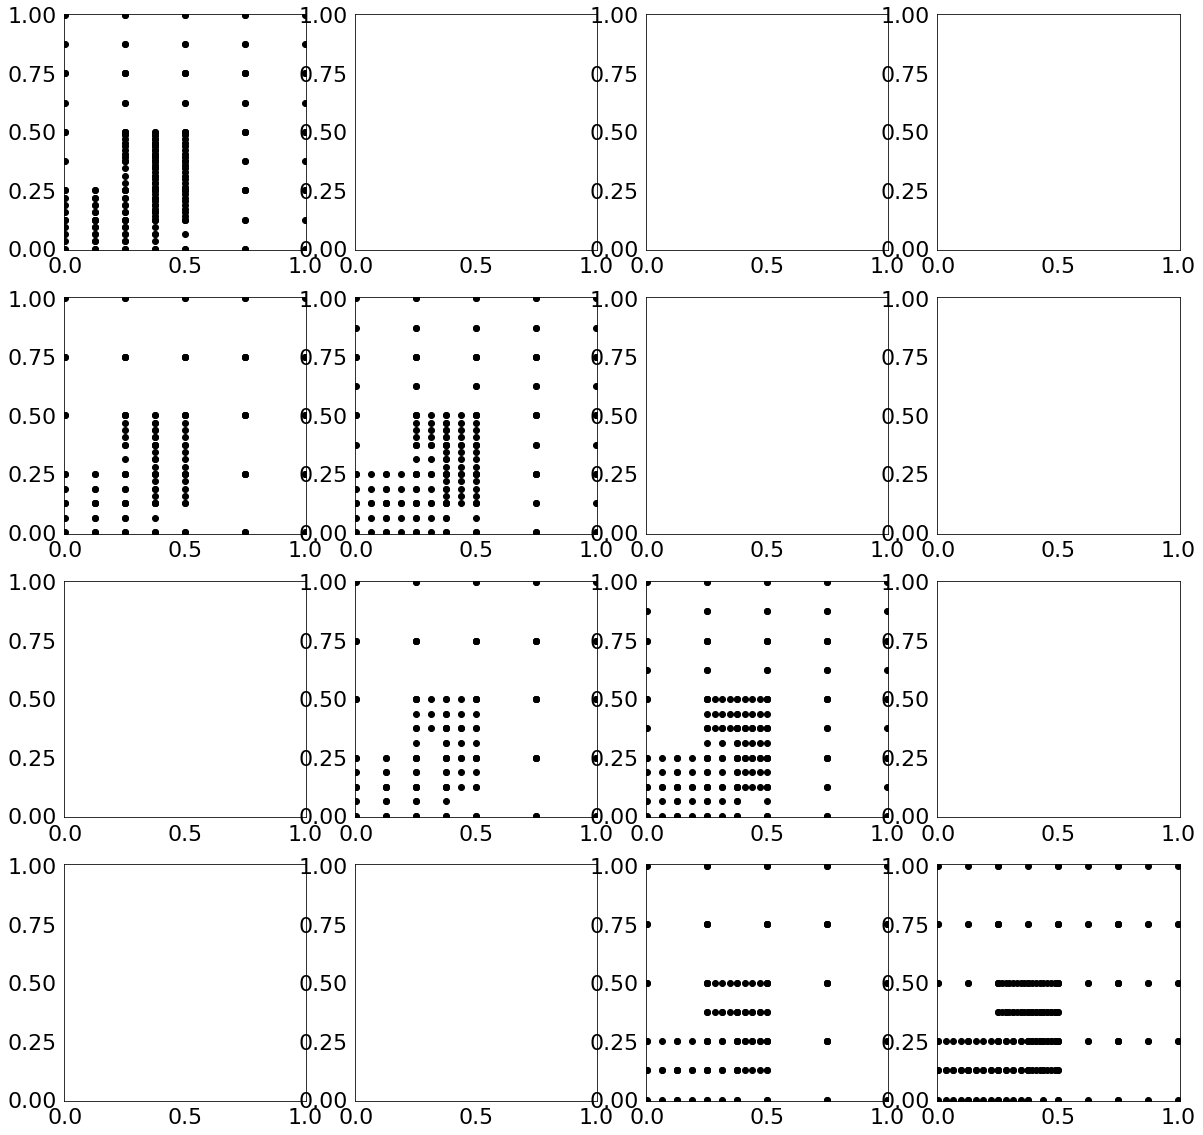

Resulting Sparse Grid:


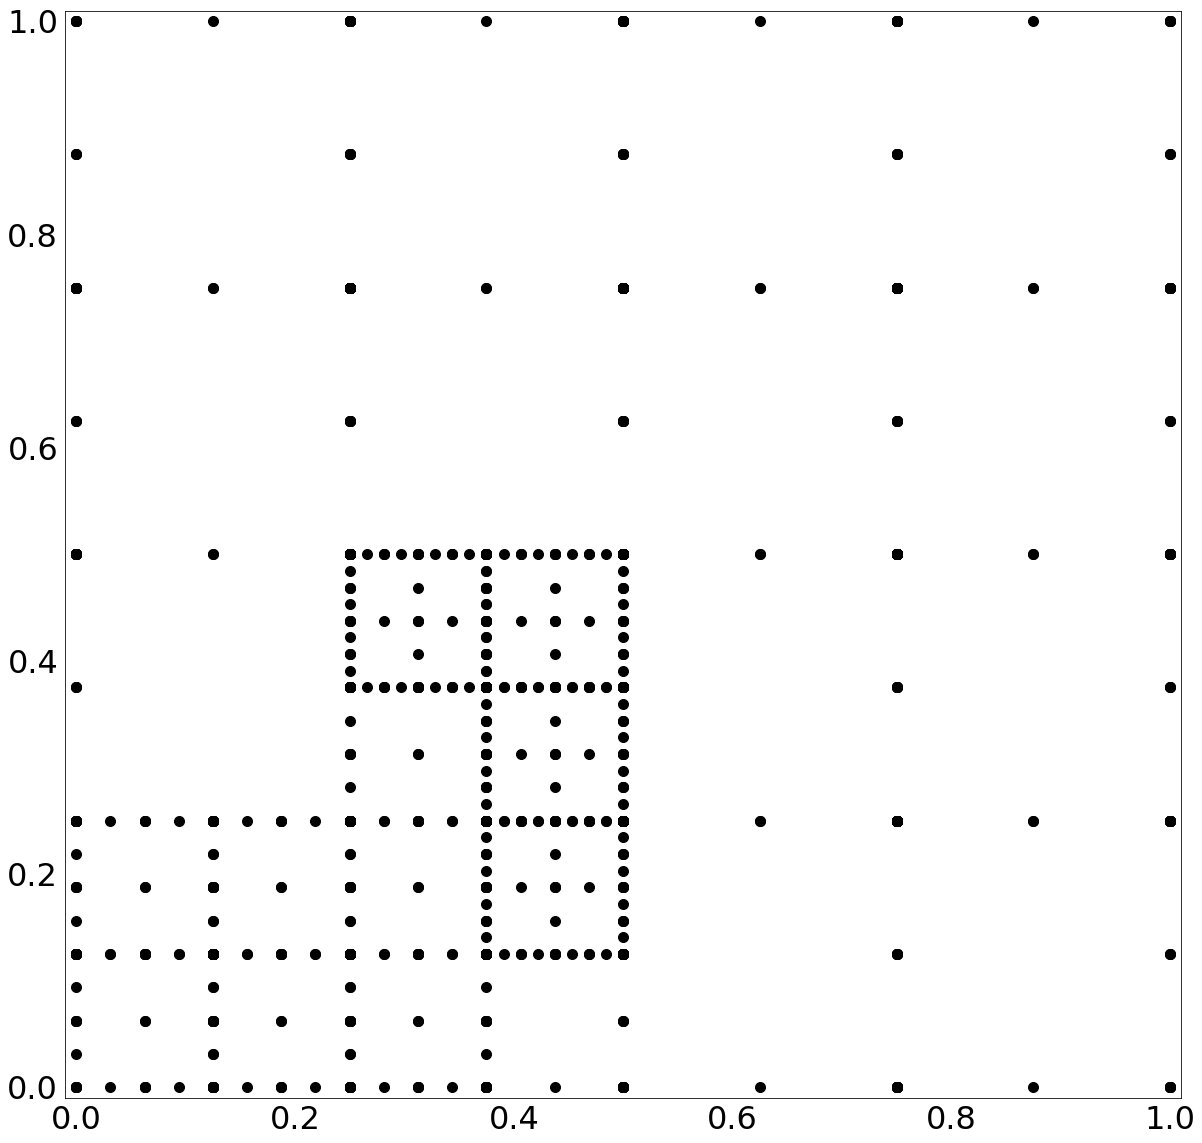

max surplus error: 0.000476988916715 total surplus error: 0.00186634745919
combiintegral: 0.115733469884
Current error: 0.069367623778
New scheme
0 [1, 5] 1.0
1 [2, 4] 1.0
2 [3, 3] 1.0
3 [4, 2] 1.0
4 [5, 1] 1.0
5 [1, 4] -1.0
6 [2, 3] -1.0
7 [3, 2] -1.0
8 [4, 1] -1.0
Finished refinement
Refinement Graph:


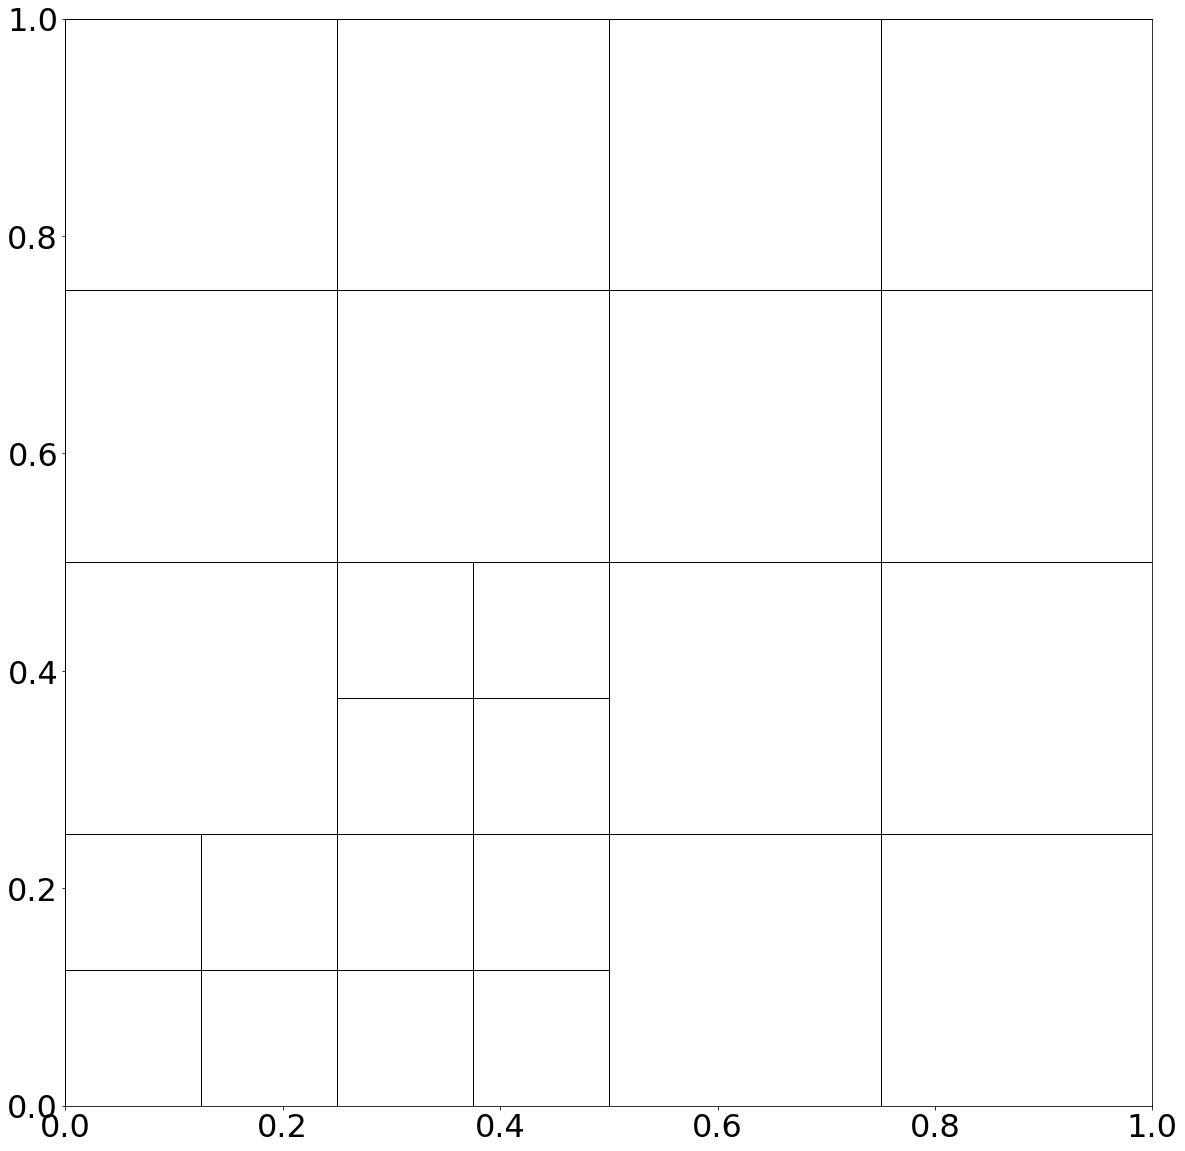

Combi Scheme:


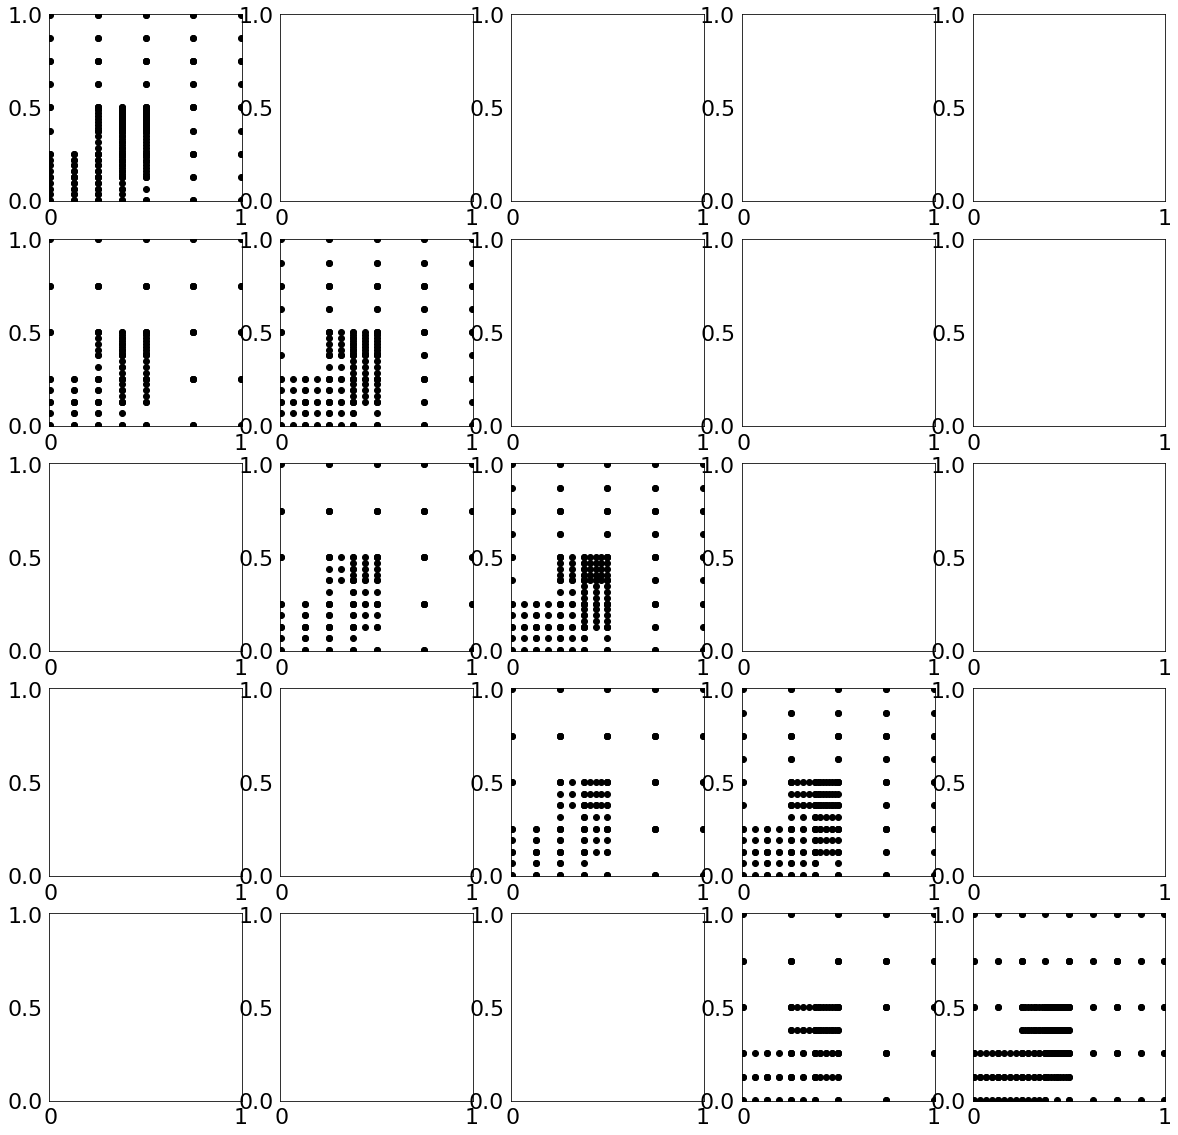

Resulting Sparse Grid:


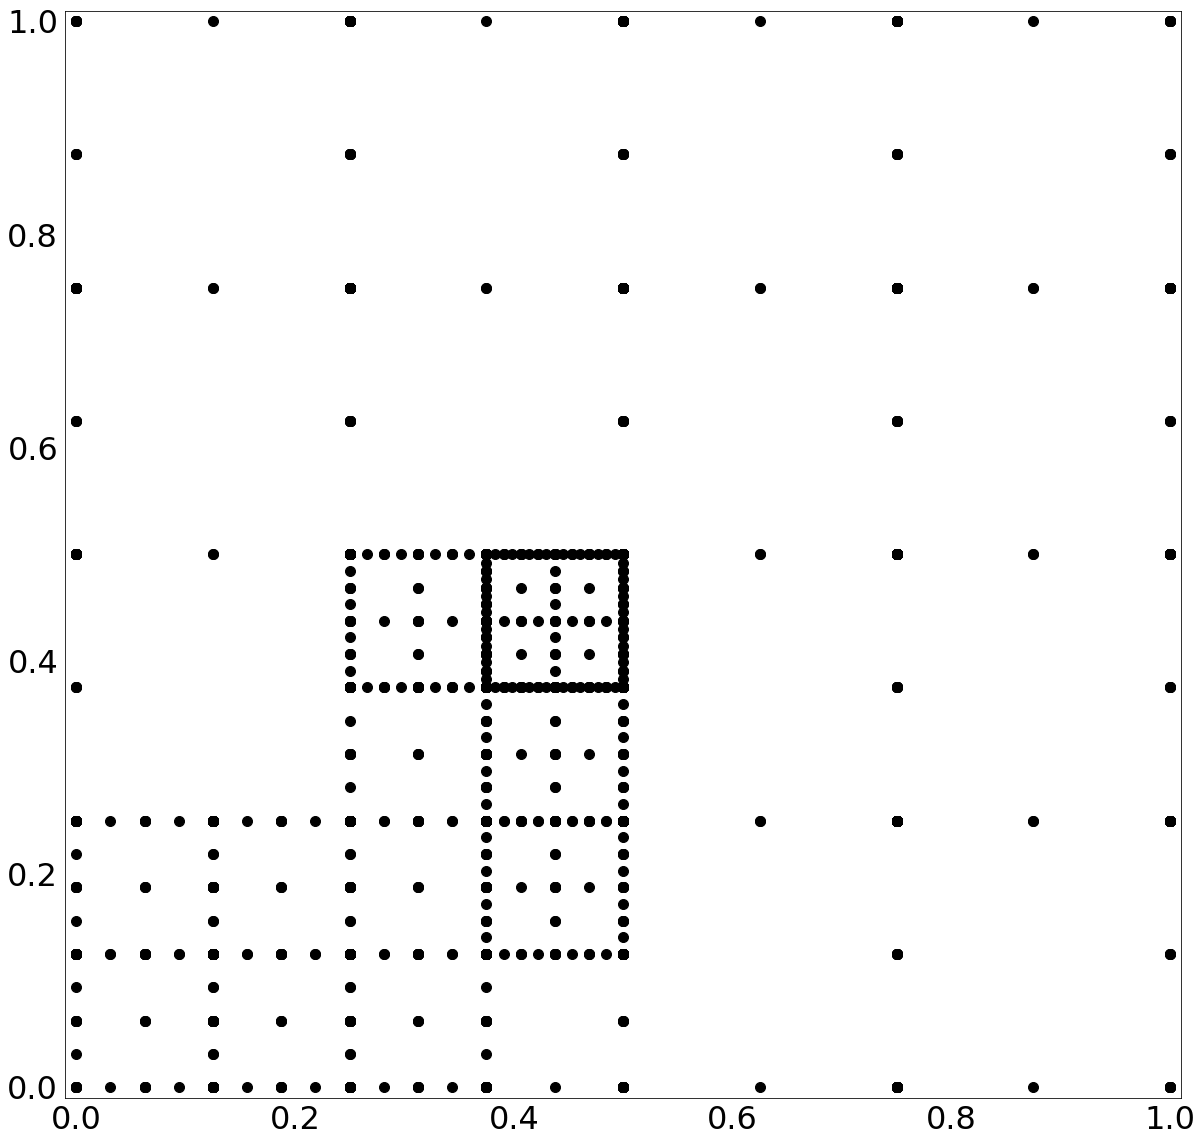

max surplus error: 0.000404181230174 total surplus error: 0.00168220206497
combiintegral: 0.116026313406
Current error: 0.0670128195587
Finished refinement
Refinement Graph:


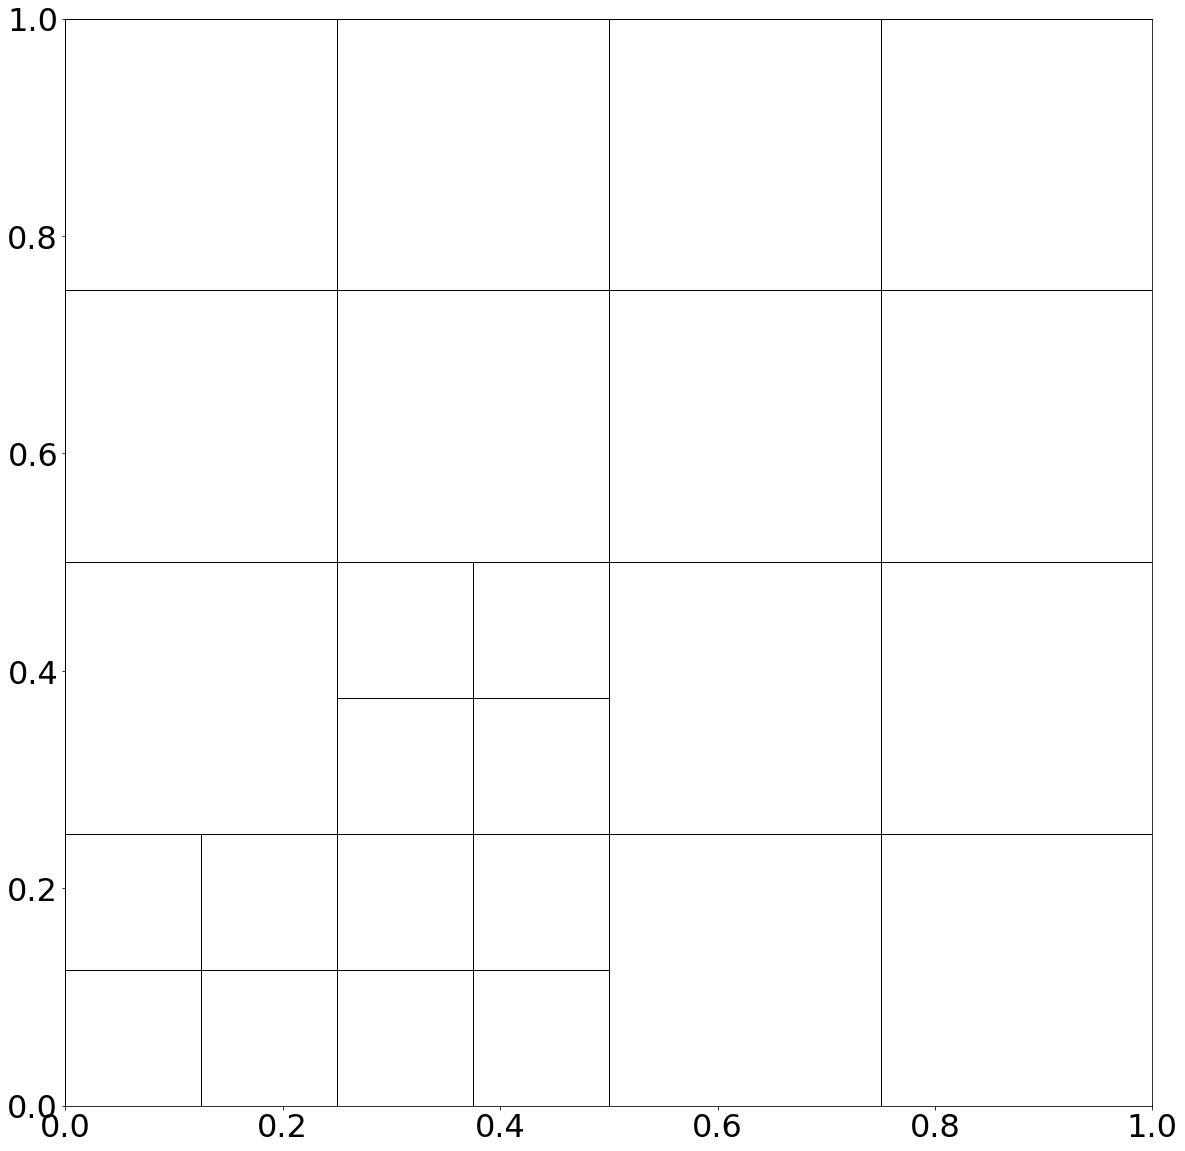

Combi Scheme:


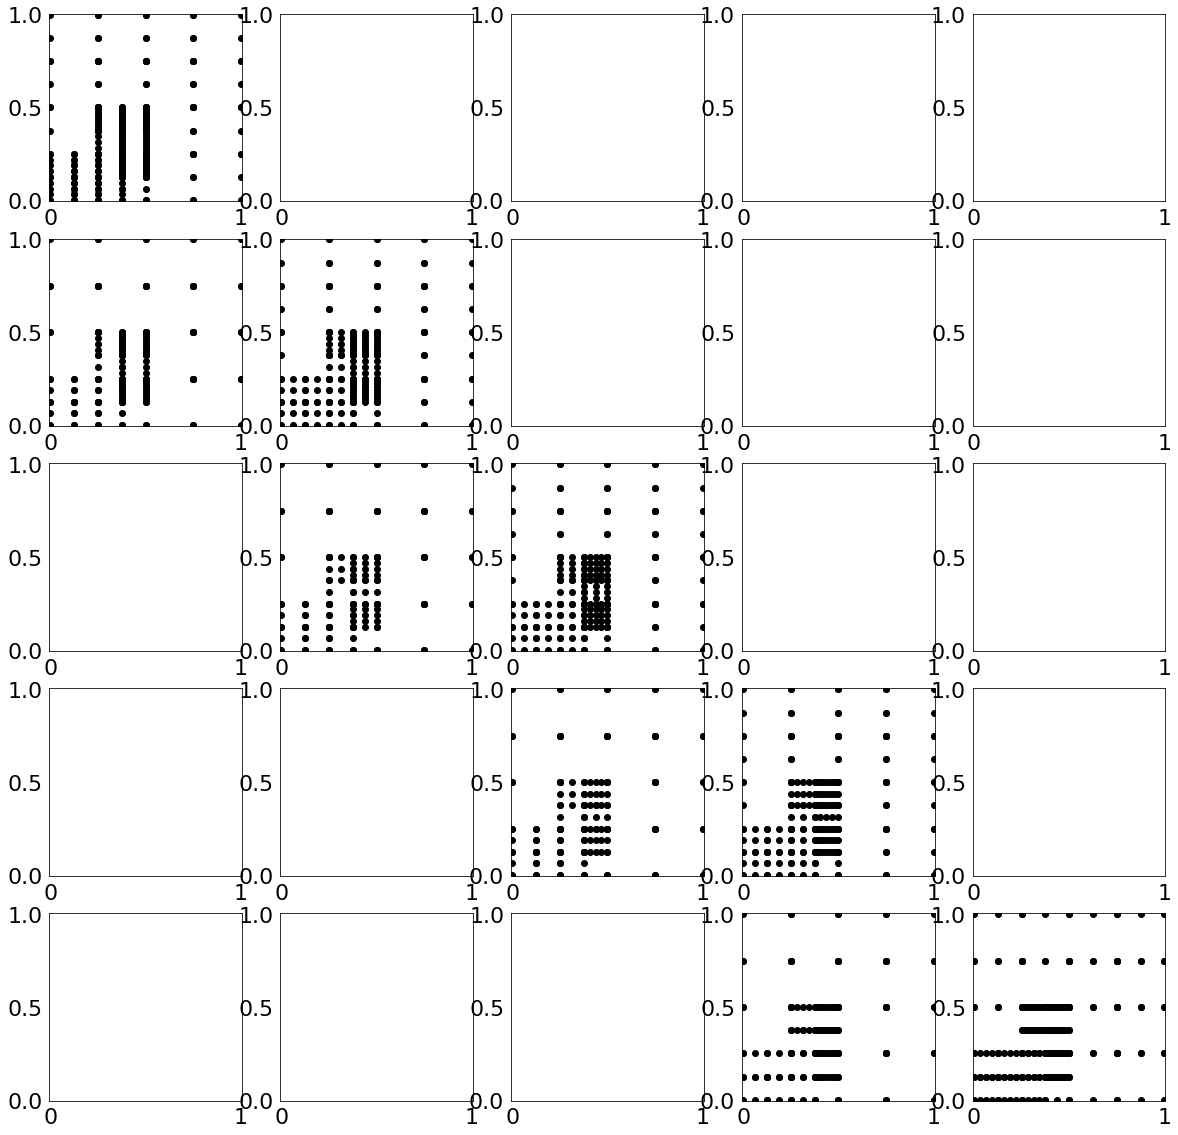

Resulting Sparse Grid:


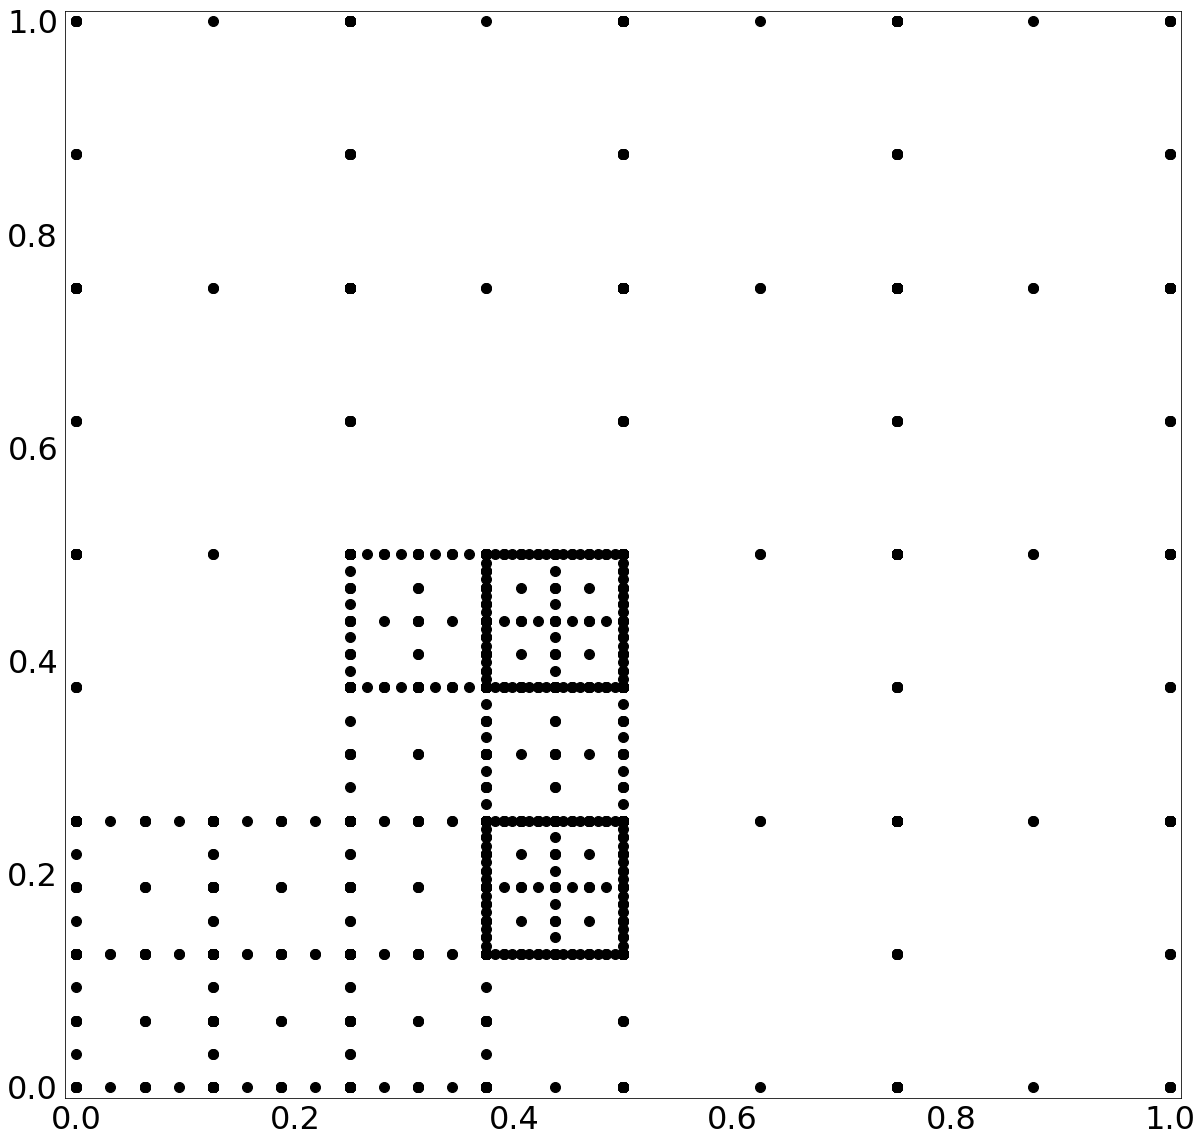

max surplus error: 0.000314776658562 total surplus error: 0.00148004372799
combiintegral: 0.116228336299
Current error: 0.0653883193572
New scheme
0 [1, 6] 1.0
1 [2, 5] 1.0
2 [3, 4] 1.0
3 [4, 3] 1.0
4 [5, 2] 1.0
5 [6, 1] 1.0
6 [1, 5] -1.0
7 [2, 4] -1.0
8 [3, 3] -1.0
9 [4, 2] -1.0
10 [5, 1] -1.0
Finished refinement
Refinement Graph:


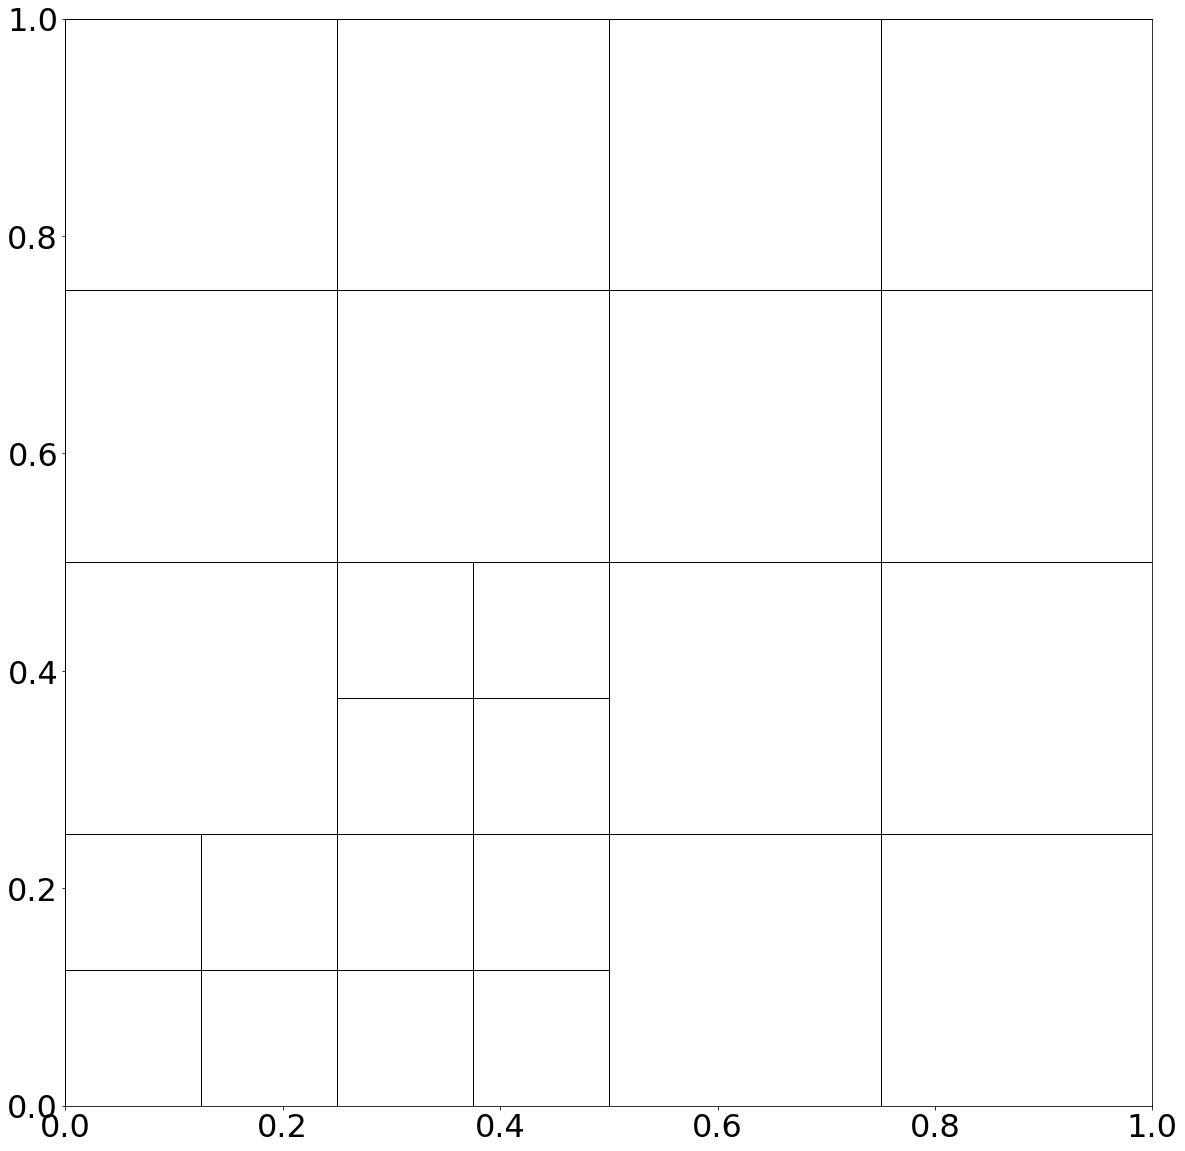

Combi Scheme:


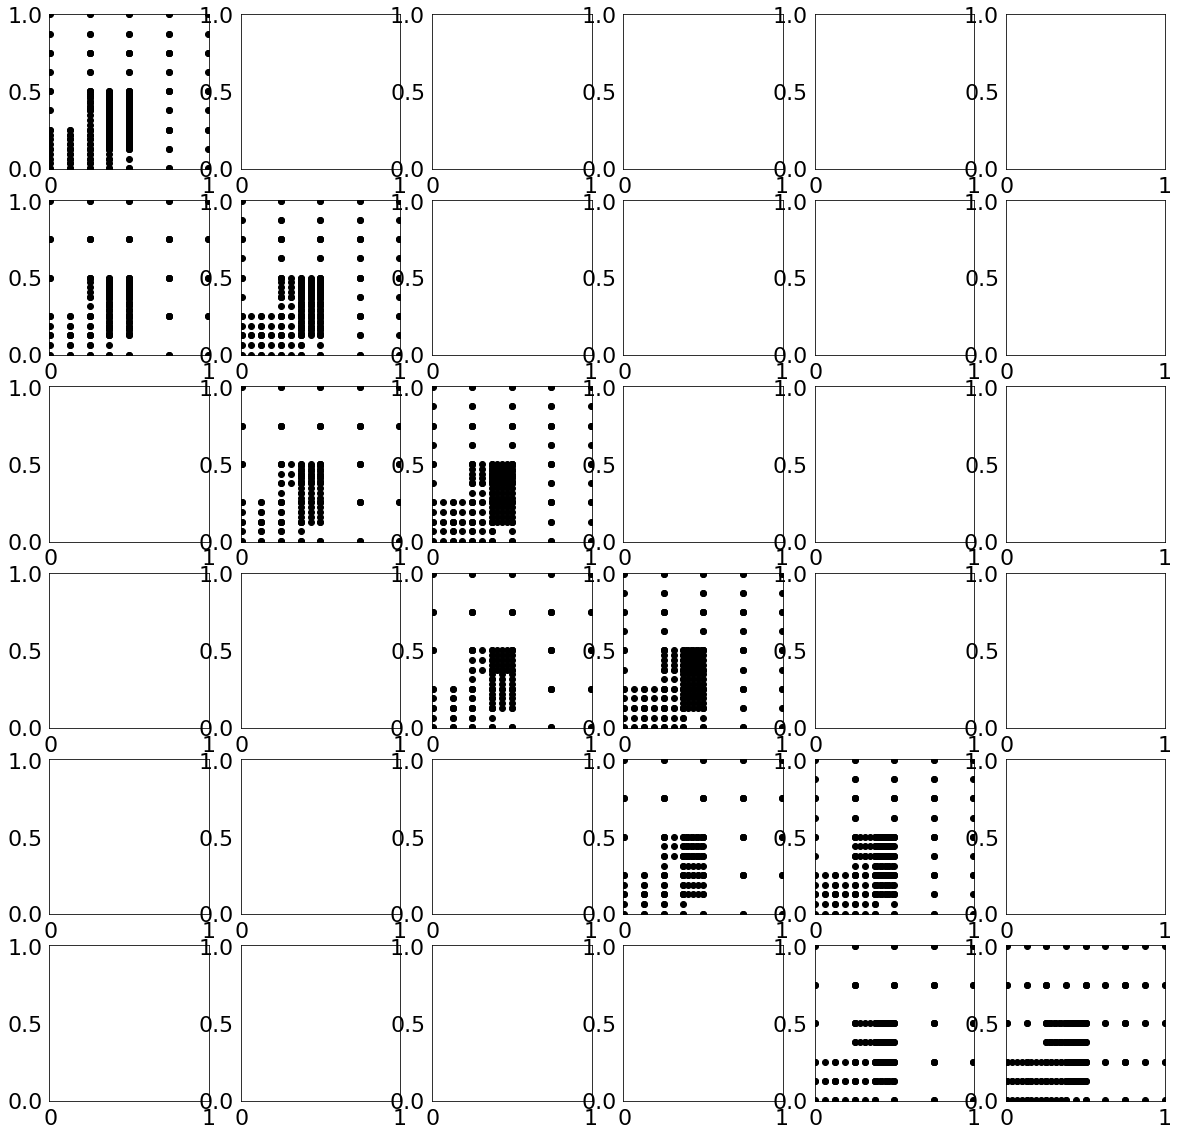

Resulting Sparse Grid:


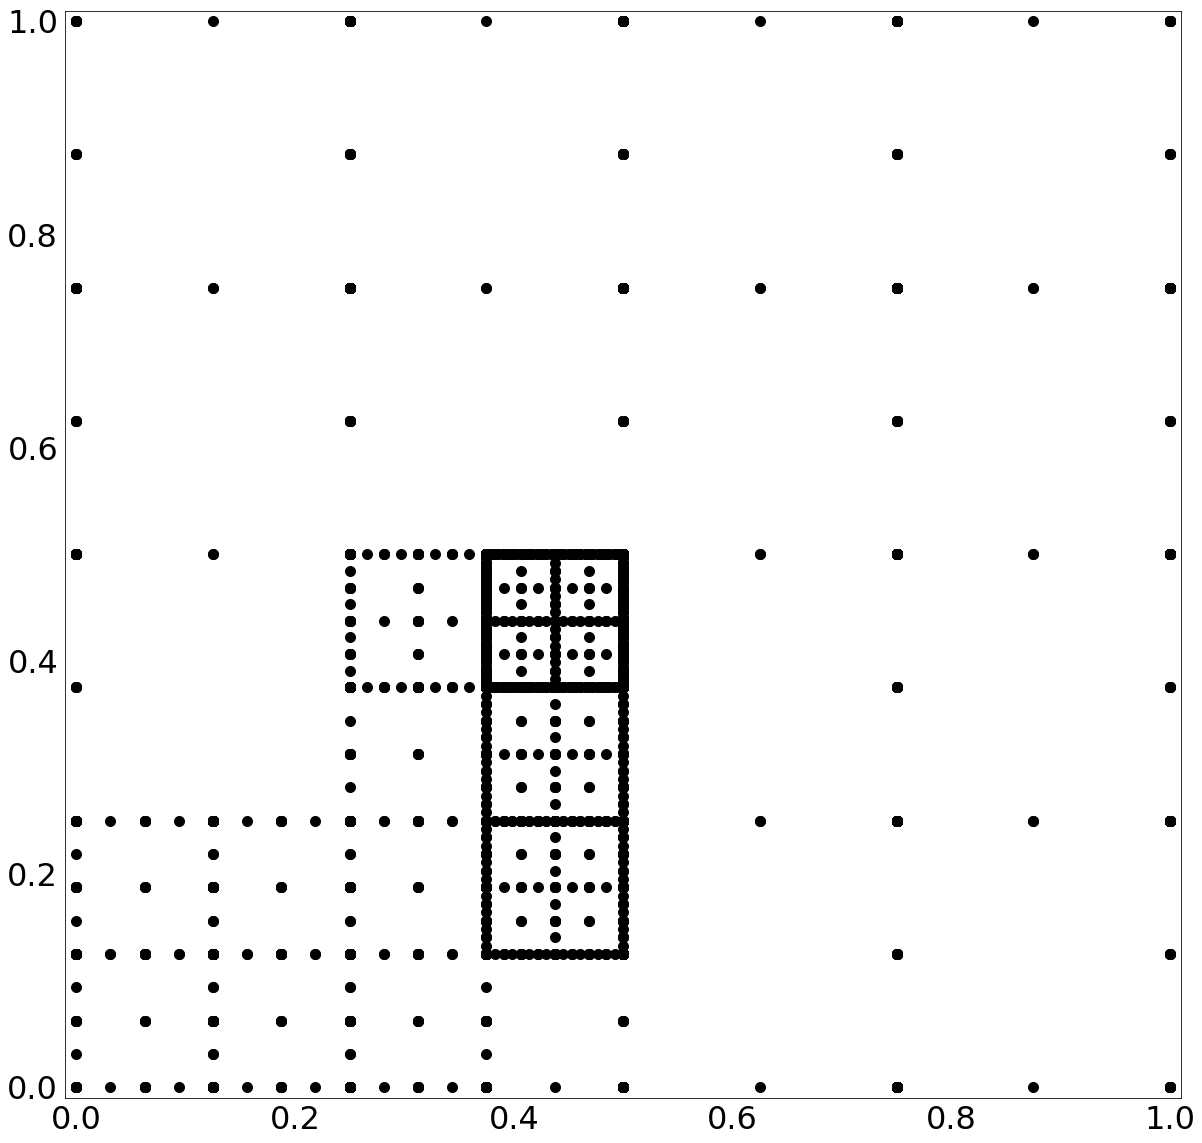

max surplus error: 0.000261256989175 total surplus error: 0.00120338669438
combiintegral: 0.116559299447
Current error: 0.062726988796
Finished refinement
Refinement Graph:


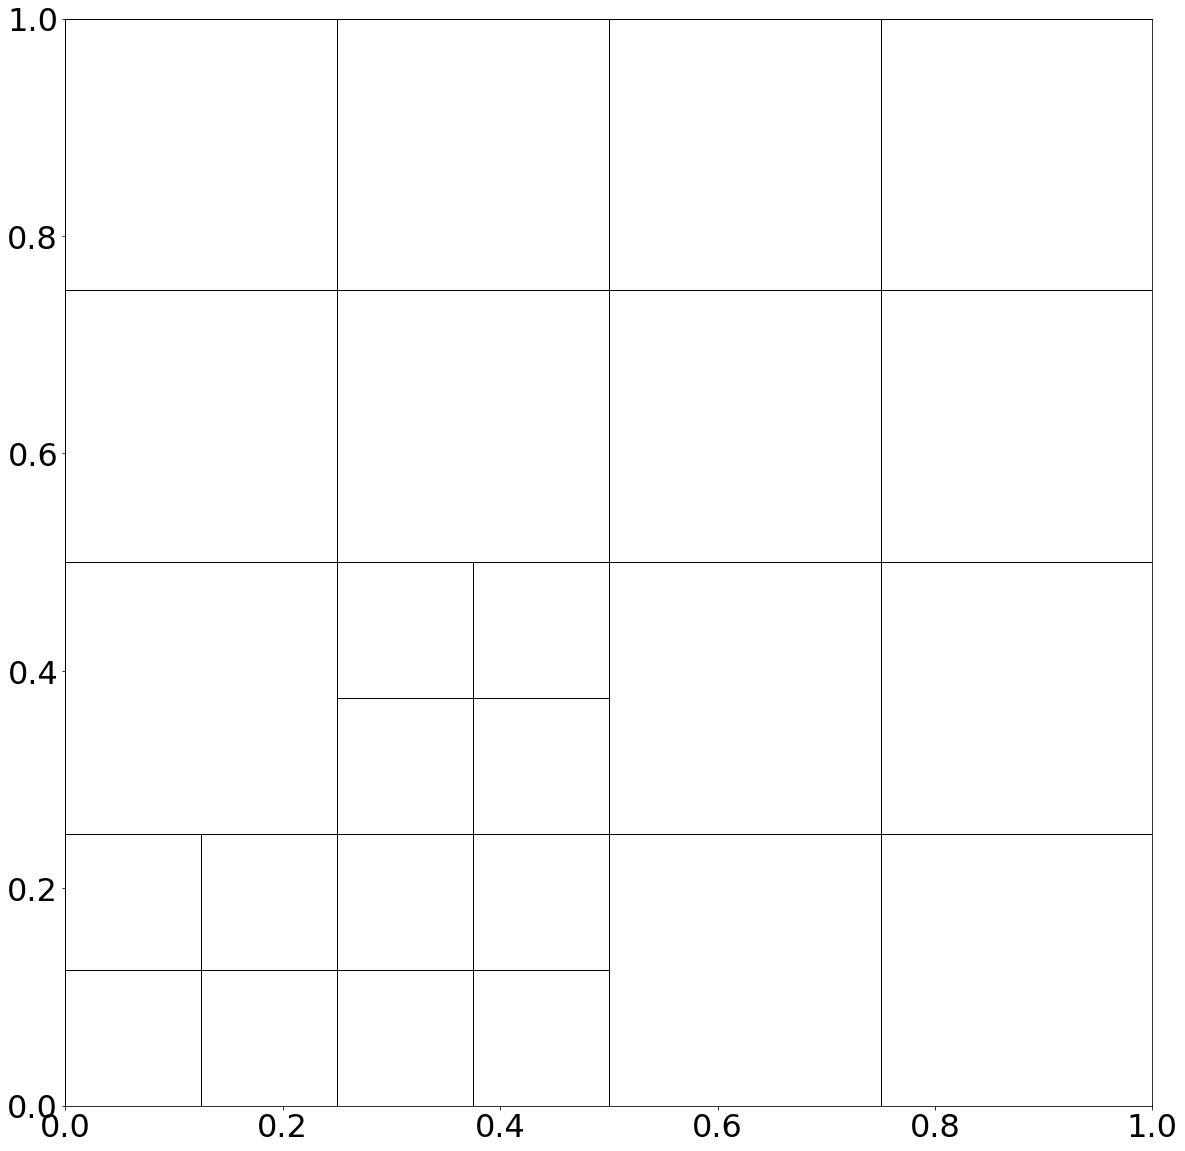

Combi Scheme:


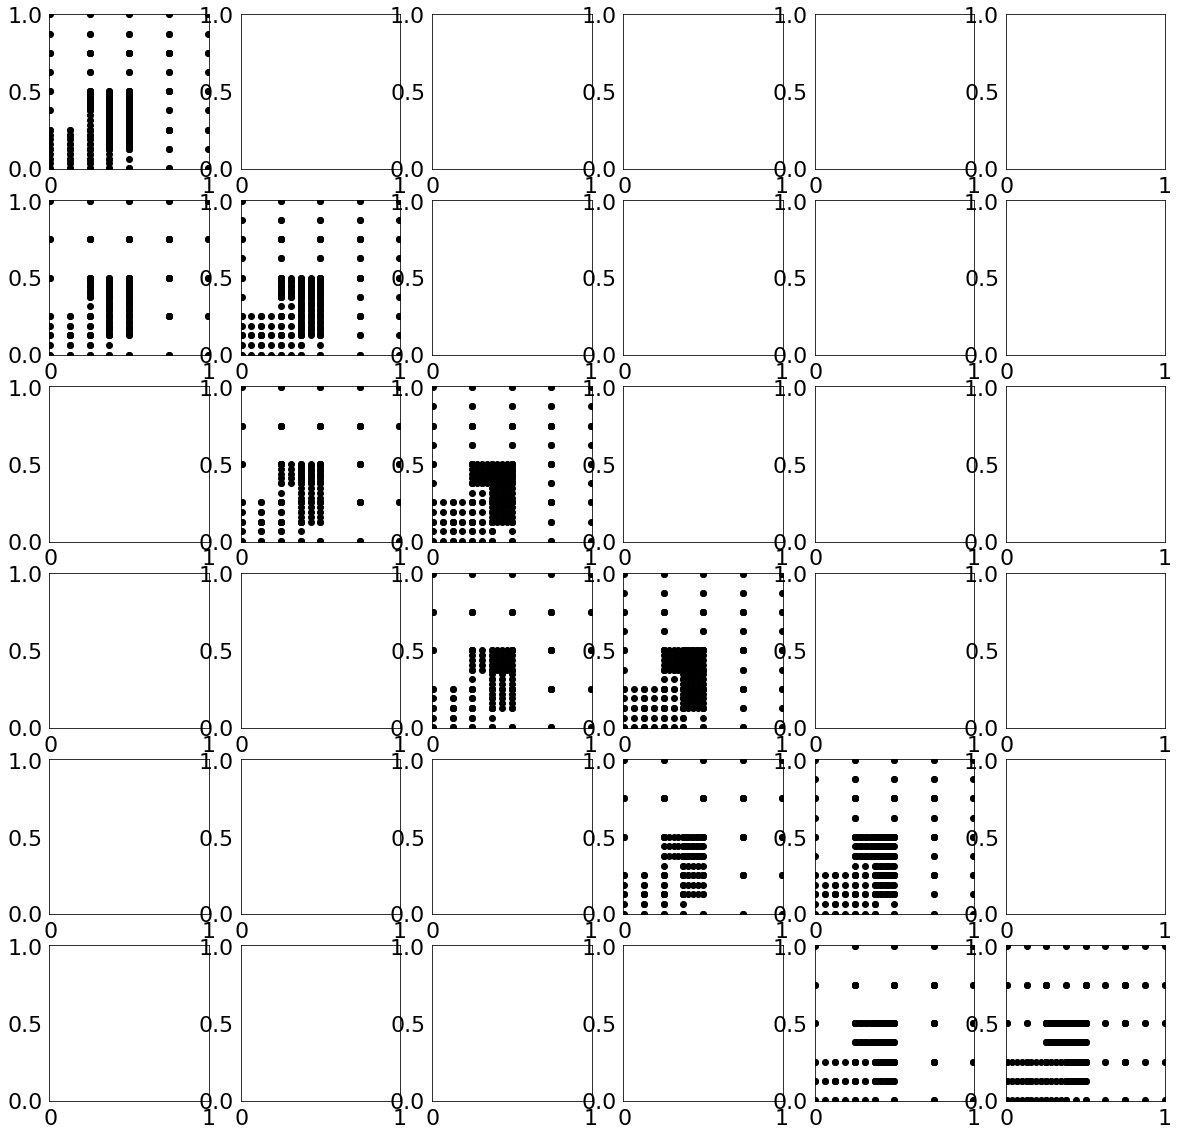

Resulting Sparse Grid:


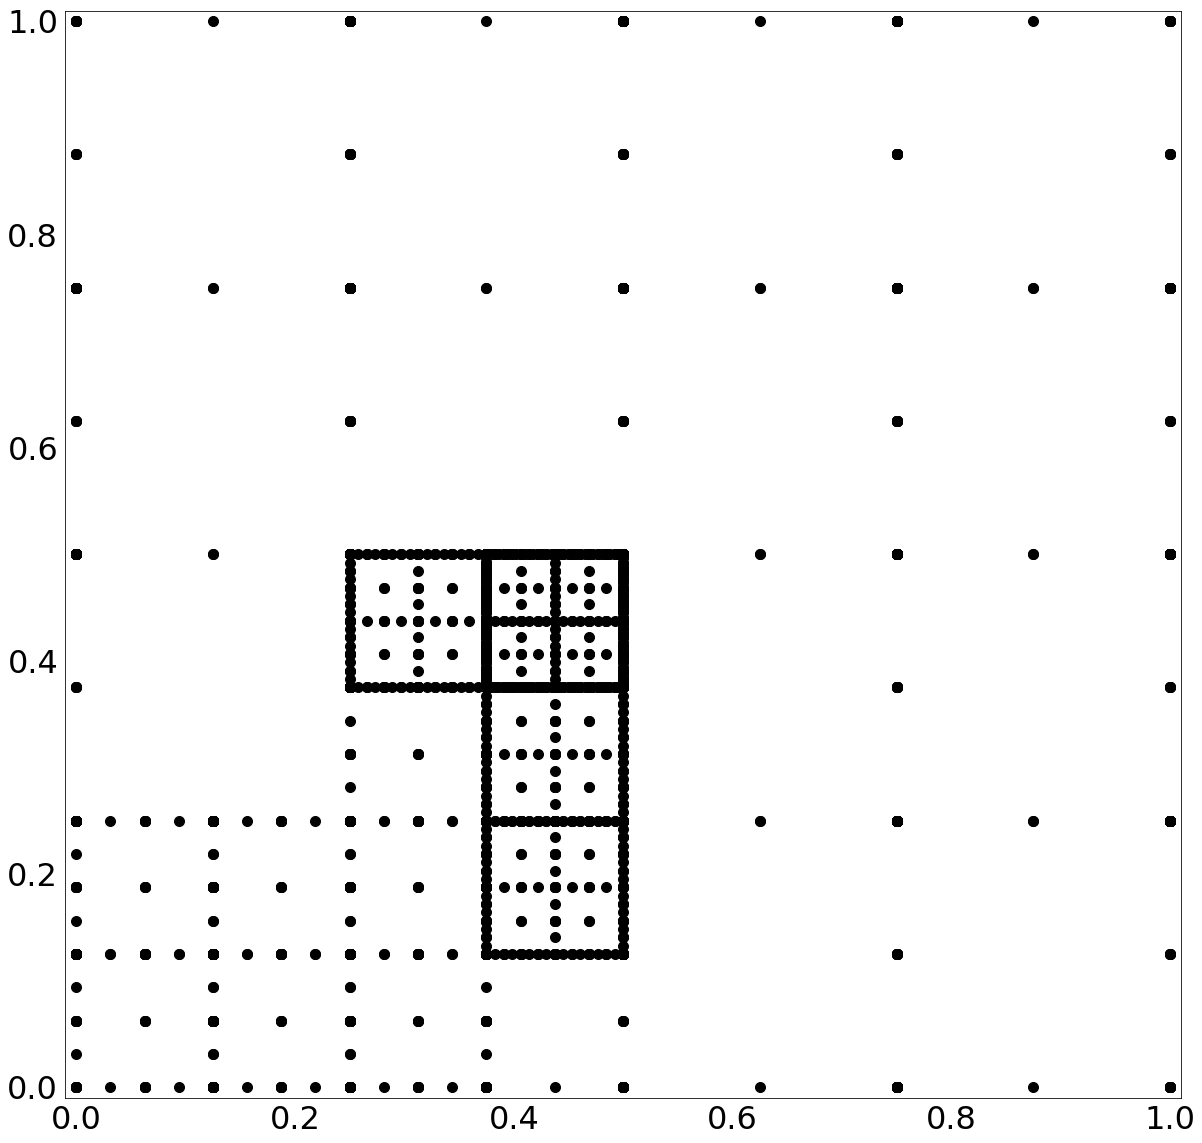

max surplus error: 0.000202022893197 total surplus error: 0.00107302621555
combiintegral: 0.116690195957
Current error: 0.0616744278507
Finished refinement
Refinement Graph:


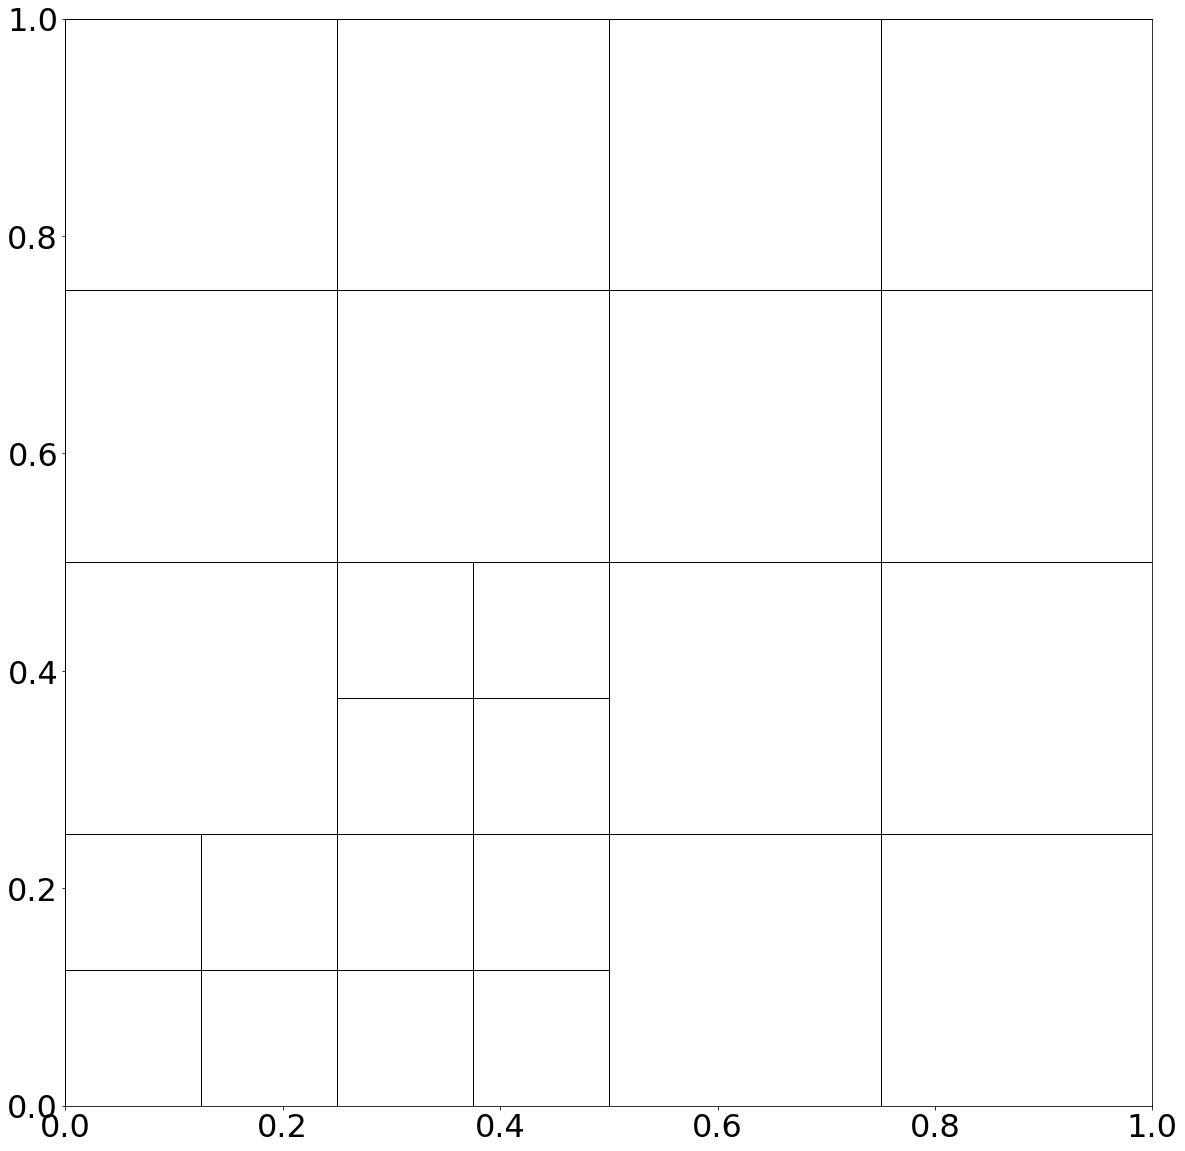

Combi Scheme:


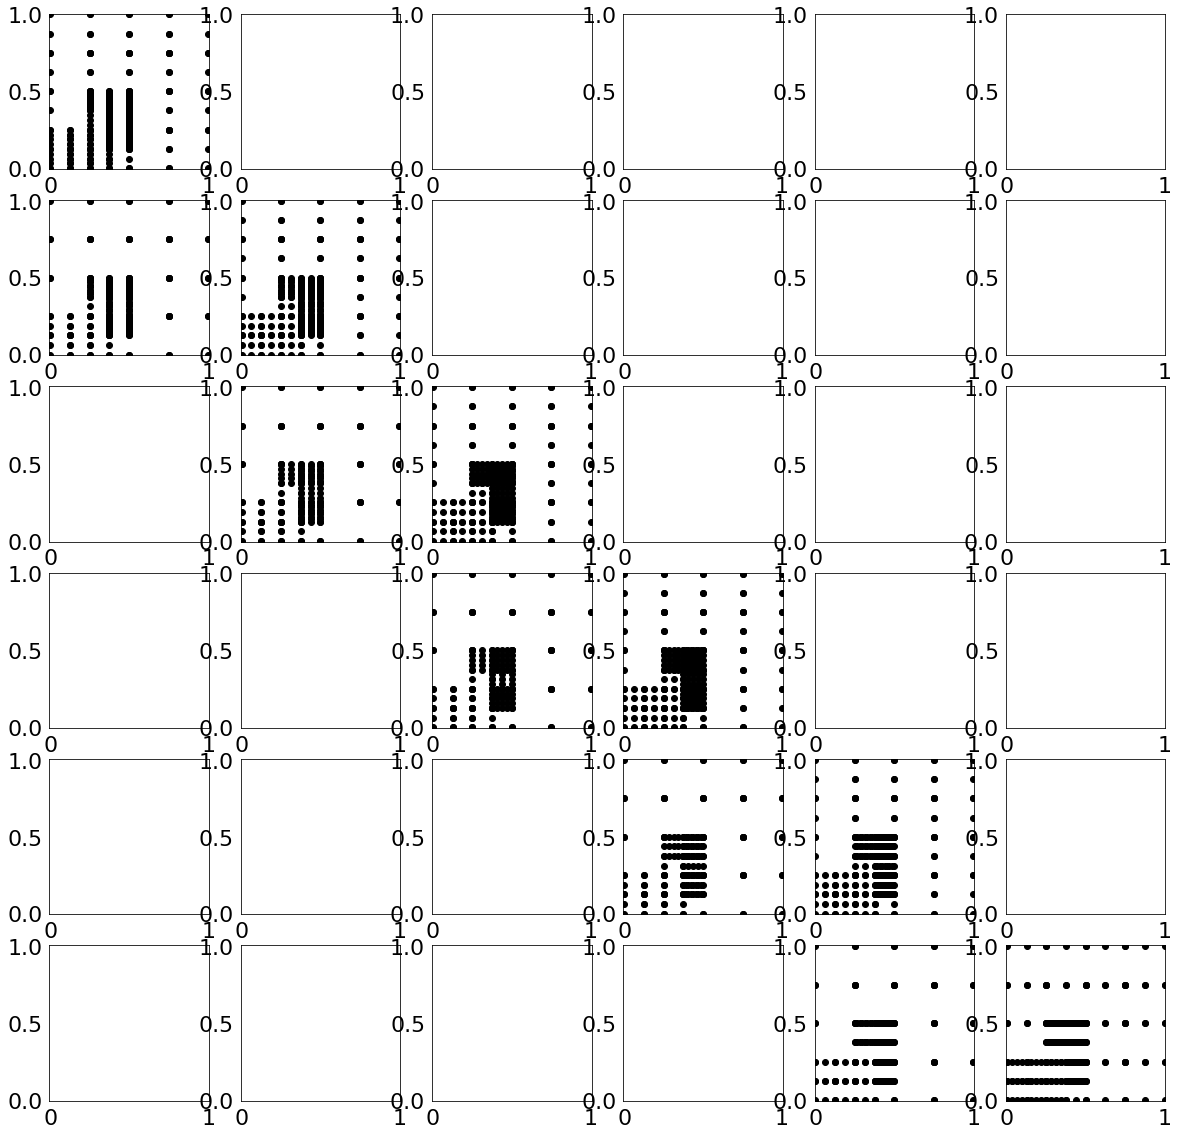

Resulting Sparse Grid:


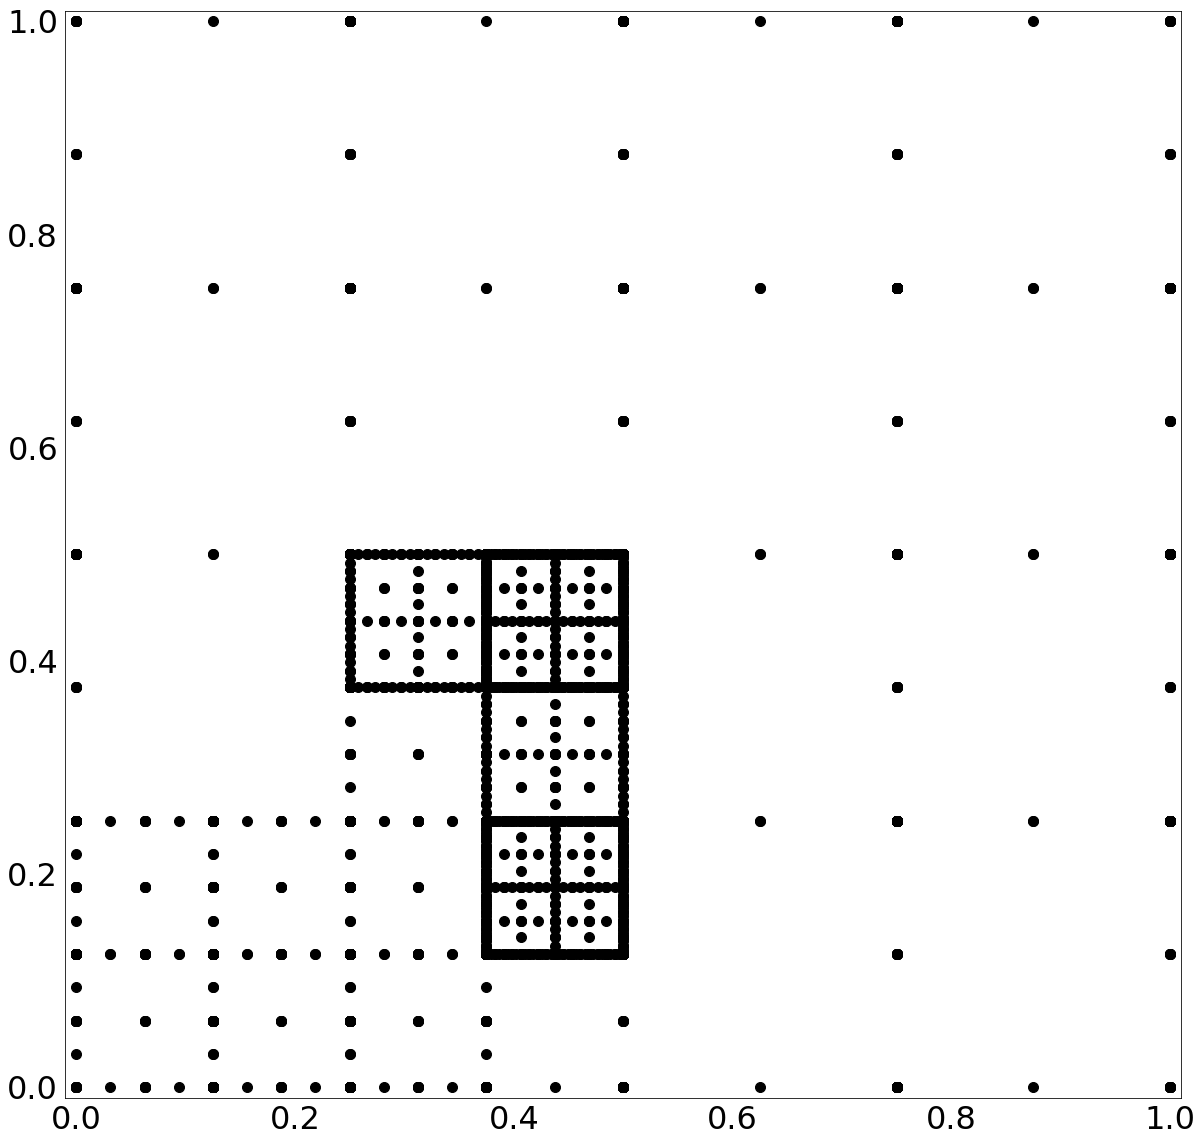

max surplus error: 0.000173627560031 total surplus error: 0.000971997424599
combiintegral: 0.116791190059
Current error: 0.0608623172189
New scheme
0 [1, 7] 1.0
1 [2, 6] 1.0
2 [3, 5] 1.0
3 [4, 4] 1.0
4 [5, 3] 1.0
5 [6, 2] 1.0
6 [7, 1] 1.0
7 [1, 6] -1.0
8 [2, 5] -1.0
9 [3, 4] -1.0
10 [4, 3] -1.0
11 [5, 2] -1.0
12 [6, 1] -1.0
Finished refinement
Refinement Graph:


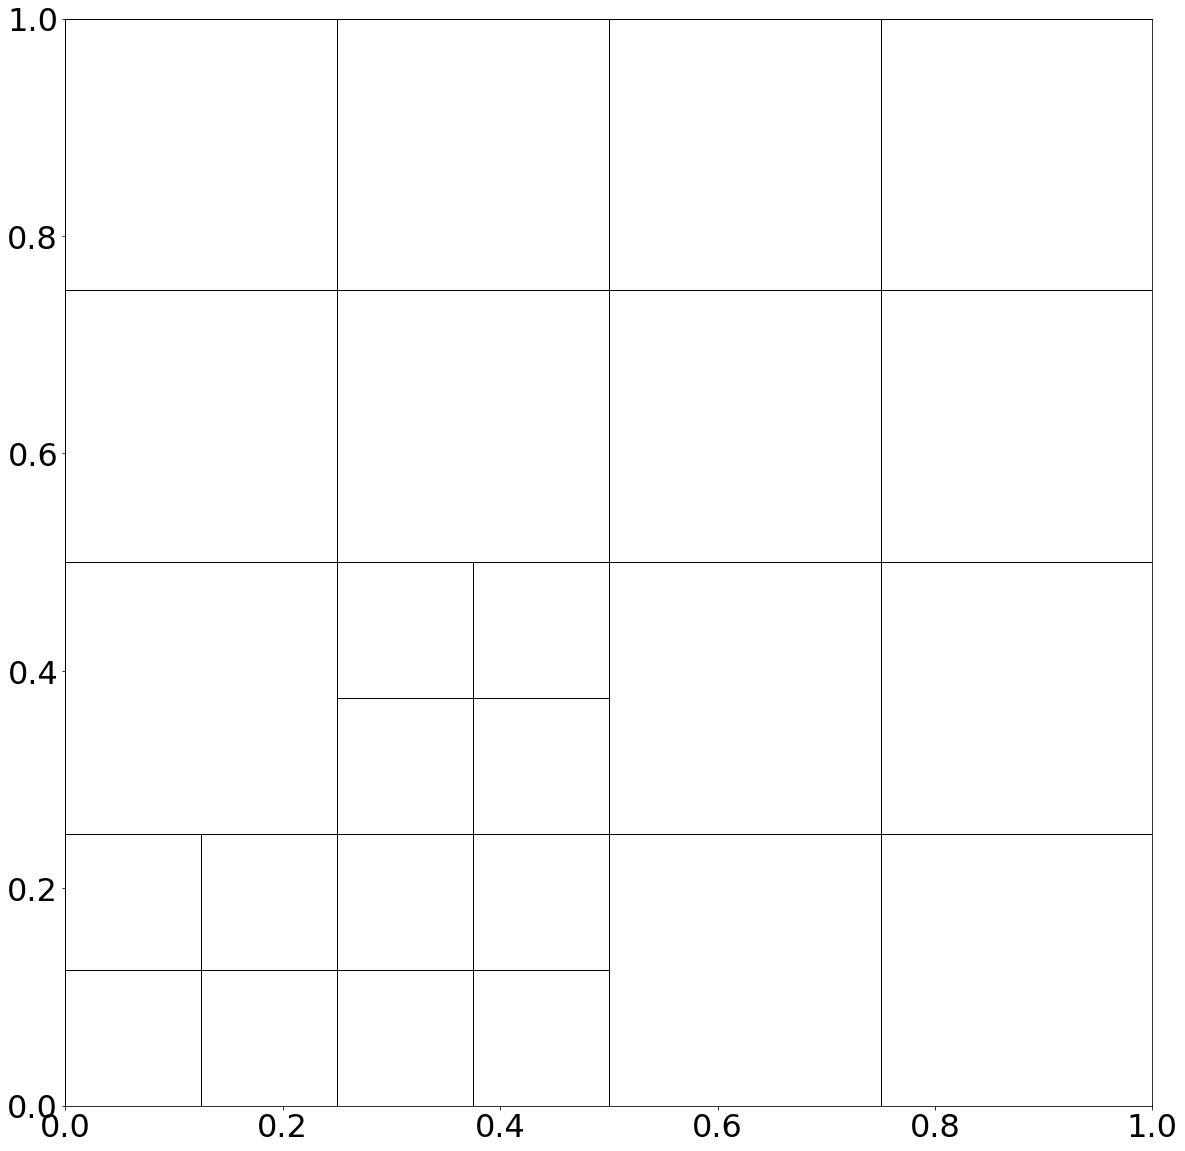

Combi Scheme:


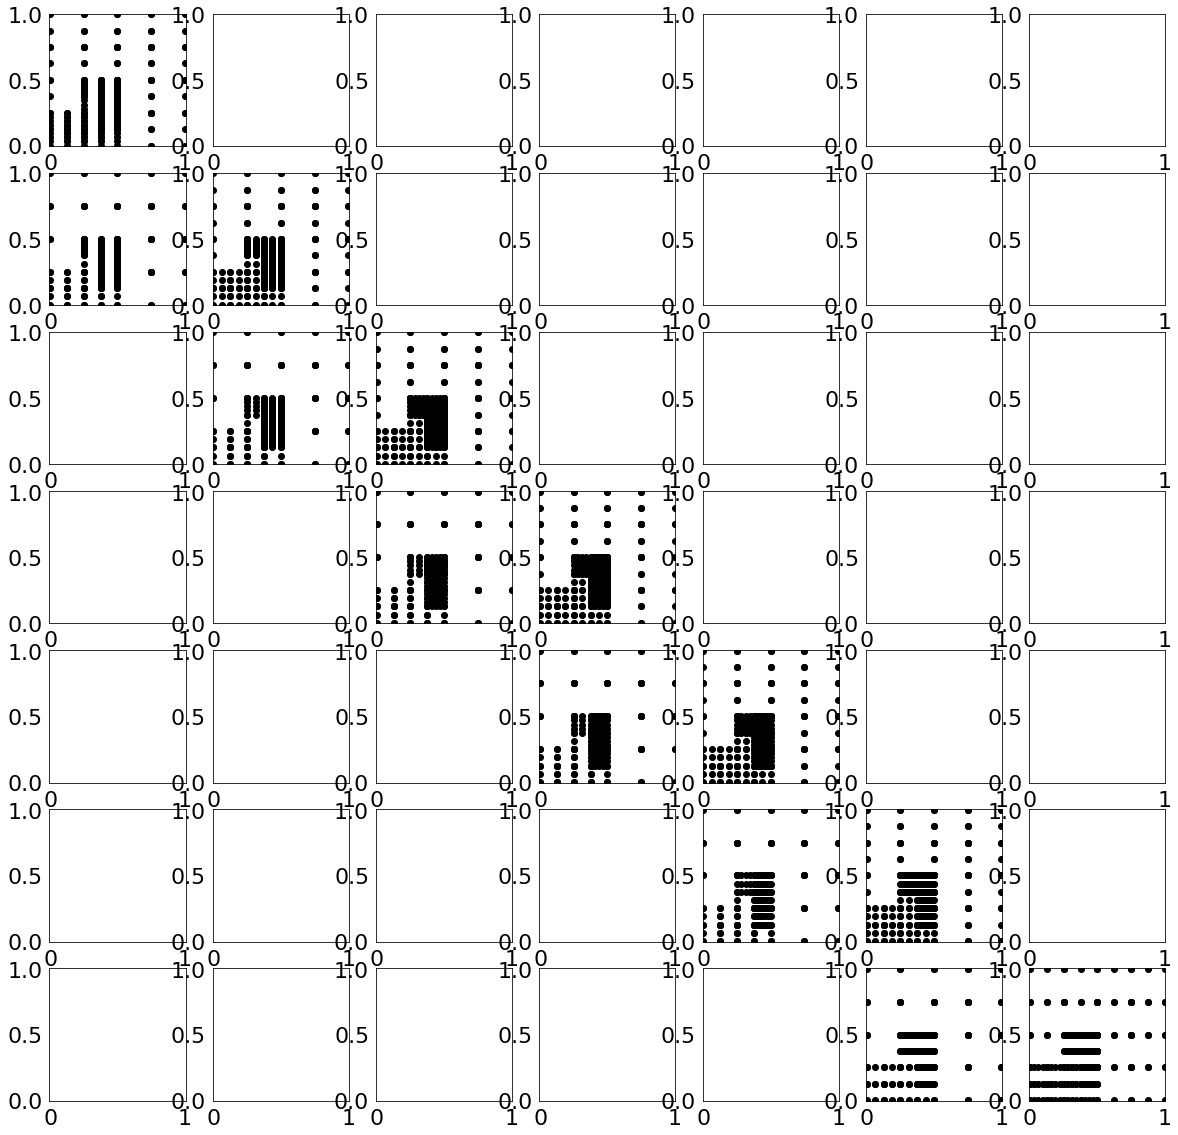

Resulting Sparse Grid:


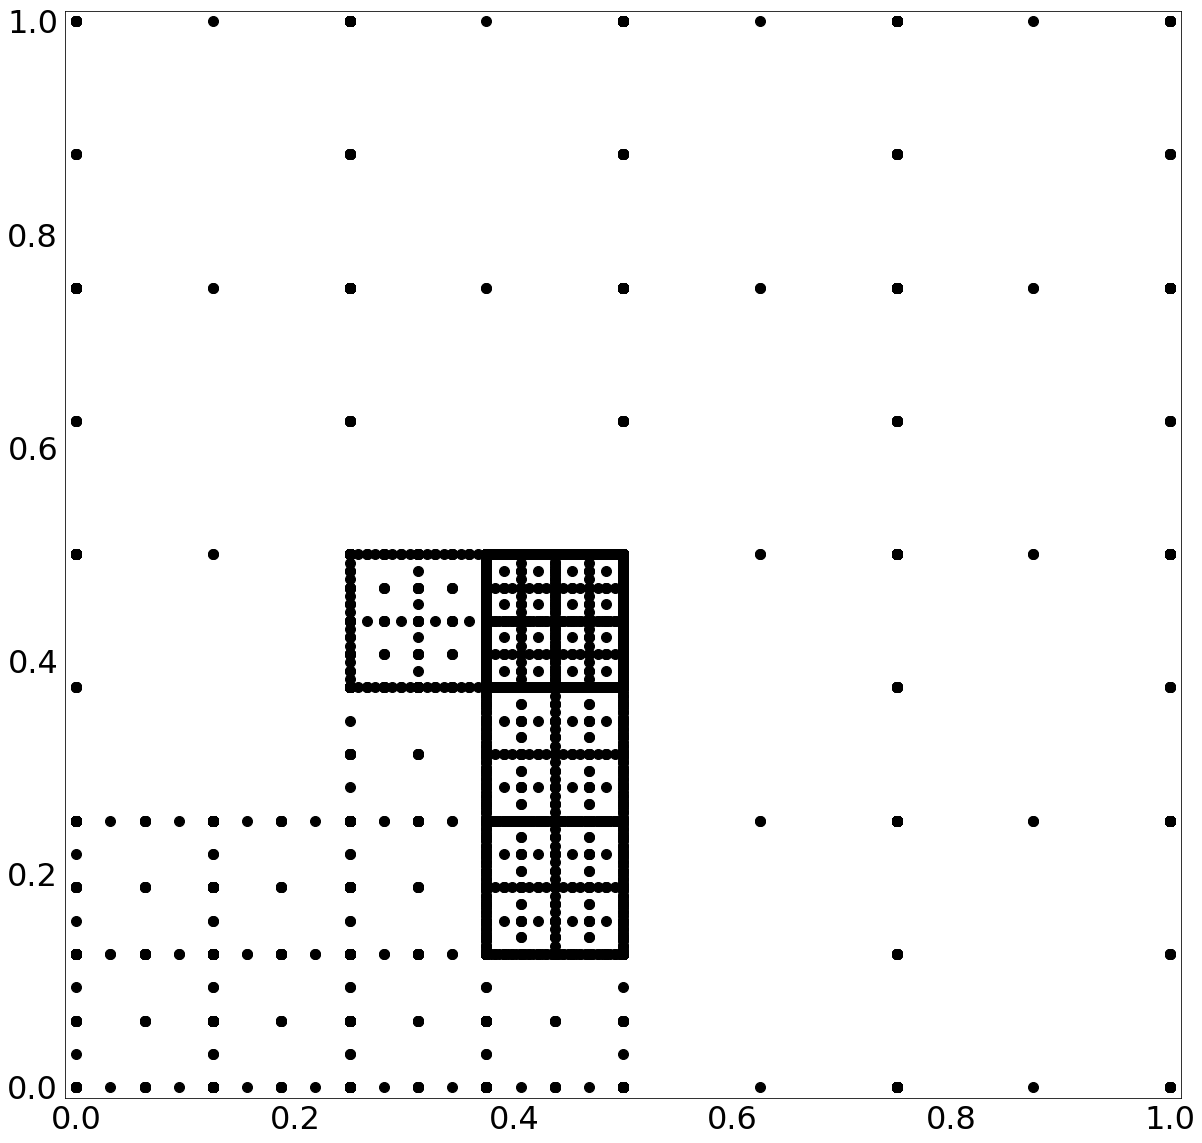

max surplus error: 0.00103863668246 total surplus error: 0.00168559040629
combiintegral: 0.118008905587
Current error: 0.0510704610179
Finished refinement
Refinement Graph:


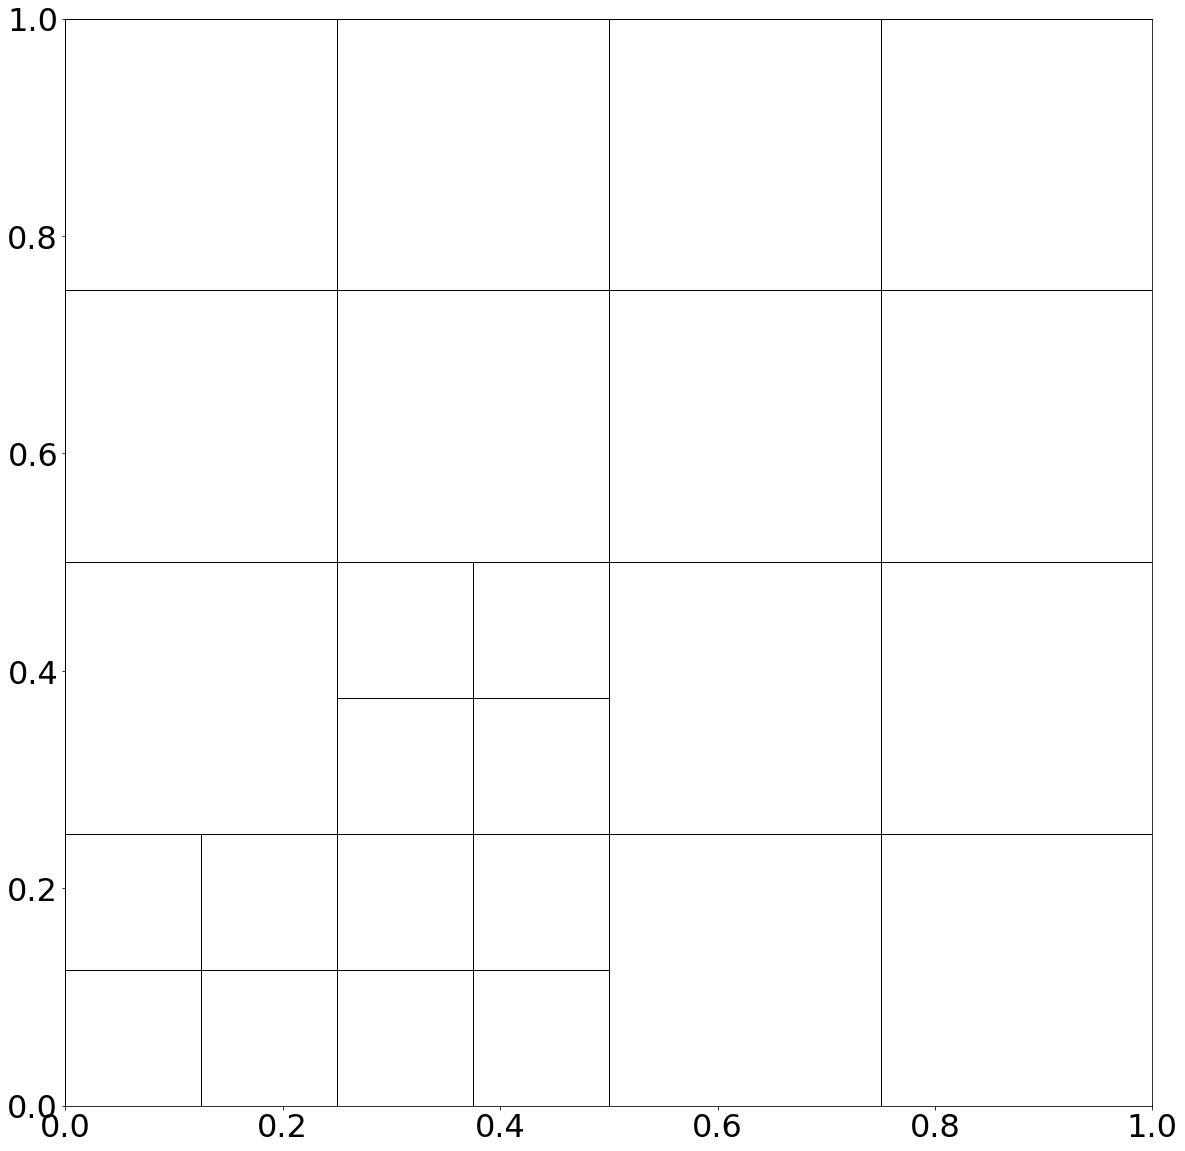

Combi Scheme:


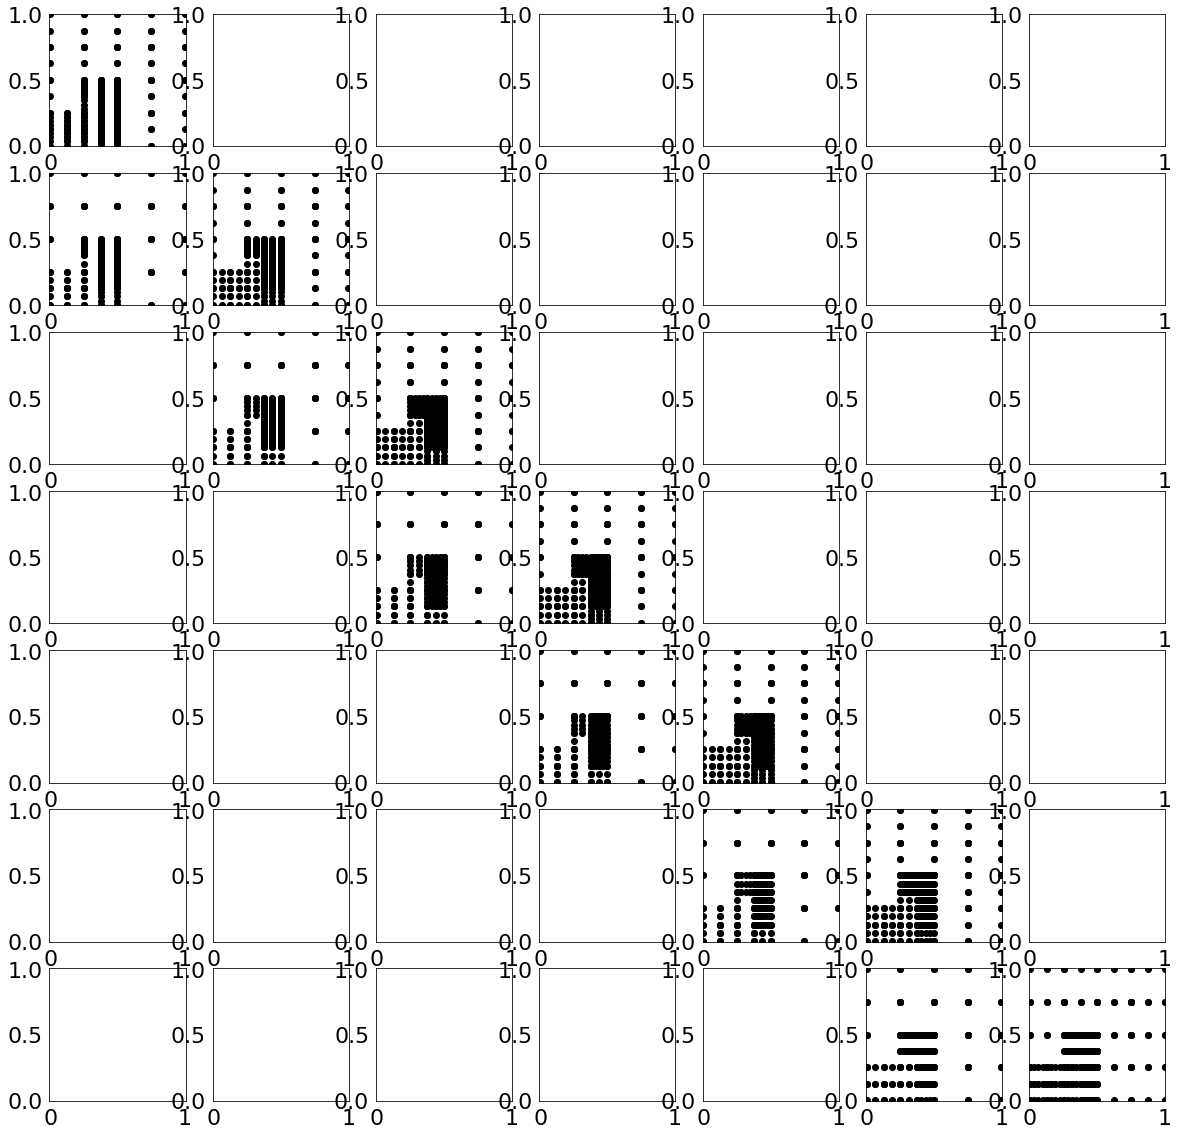

Resulting Sparse Grid:


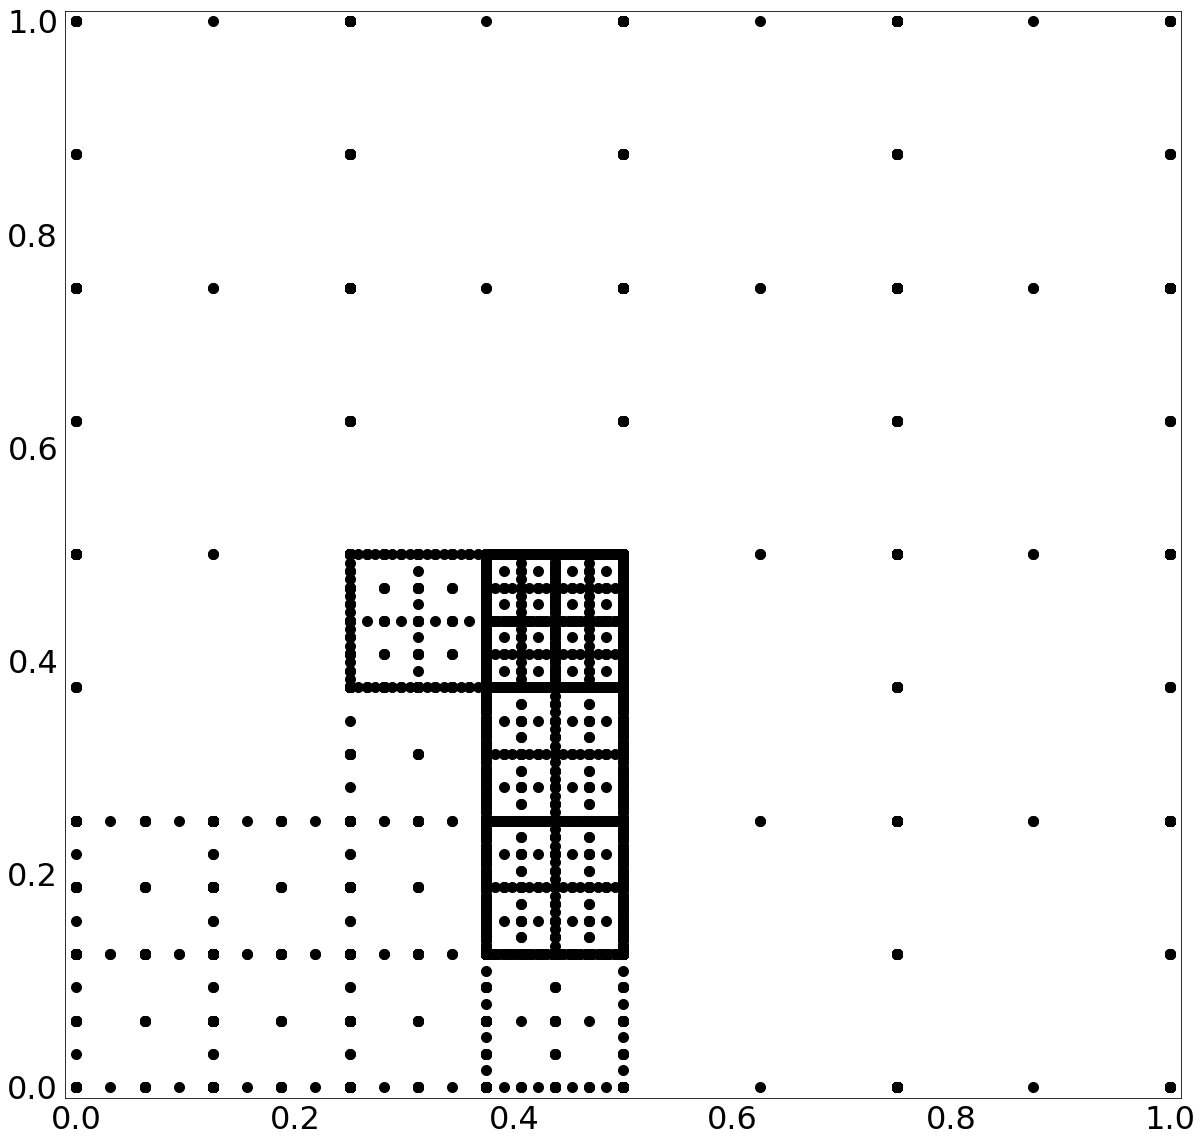

max surplus error: 0.000518978972492 total surplus error: 0.00116593269633
combiintegral: 0.118527884559
Current error: 0.0468972634557
Finished refinement
Refinement Graph:


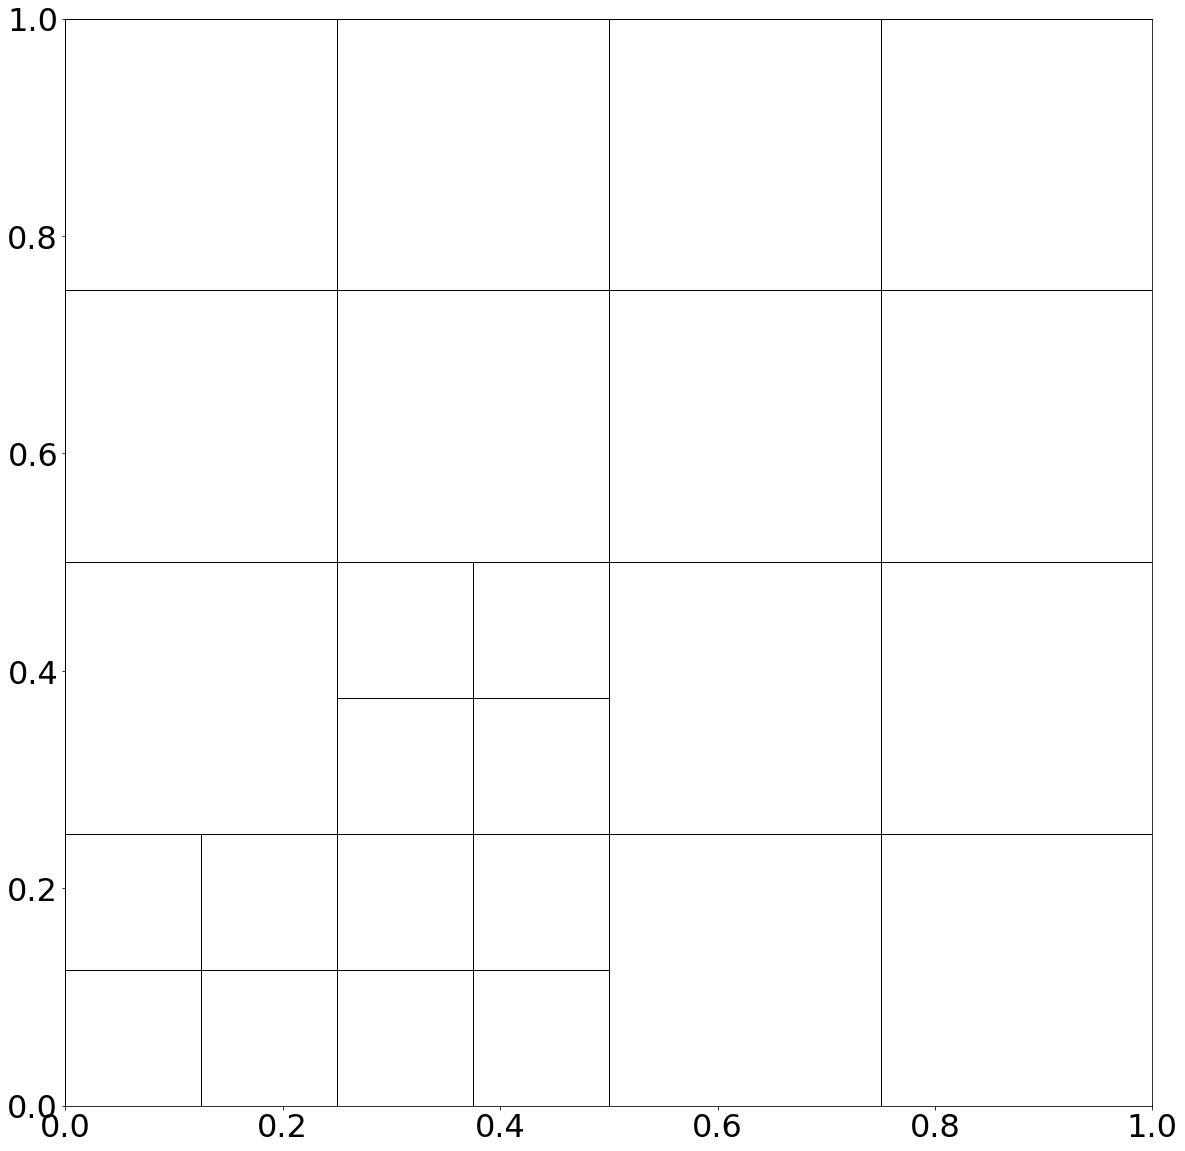

Combi Scheme:


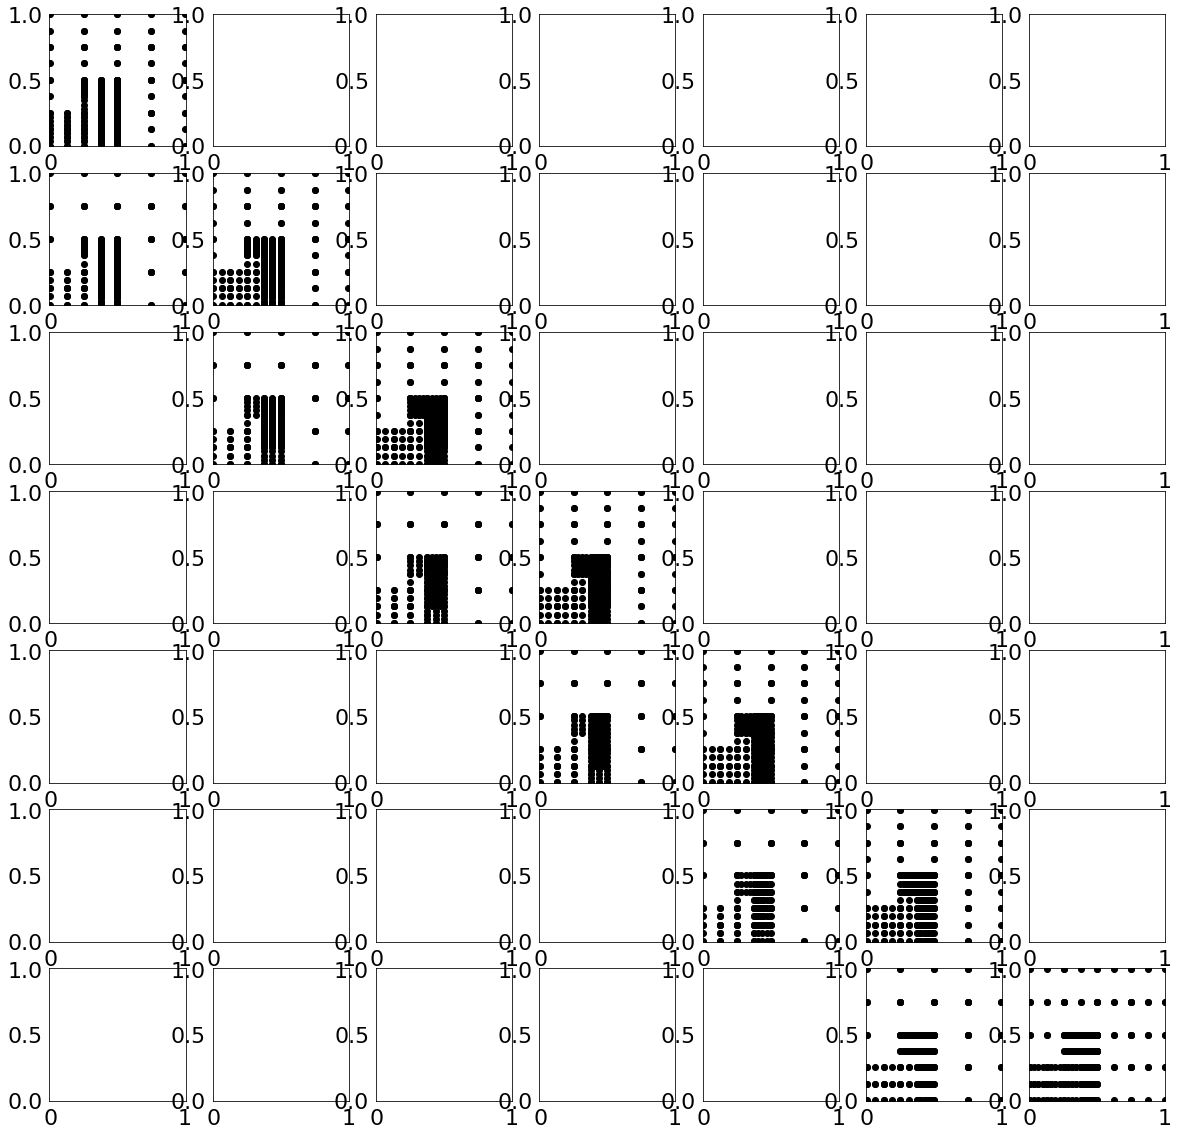

Resulting Sparse Grid:


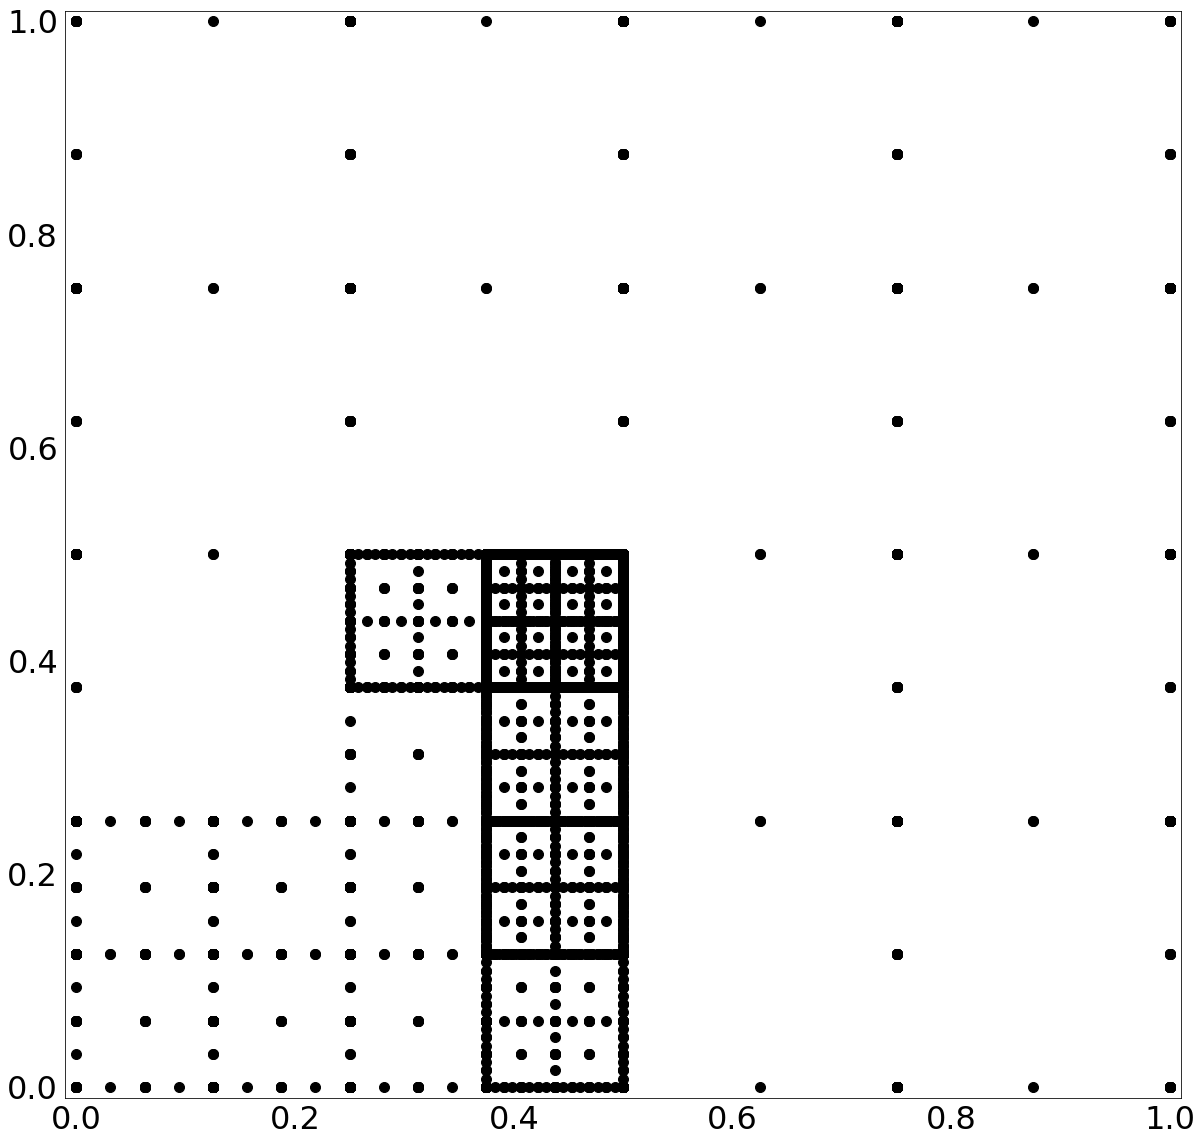

max surplus error: 0.000259402529618 total surplus error: 0.000906356253454
combiintegral: 0.118787287089
Current error: 0.0448113639076
Finished refinement
Refinement Graph:


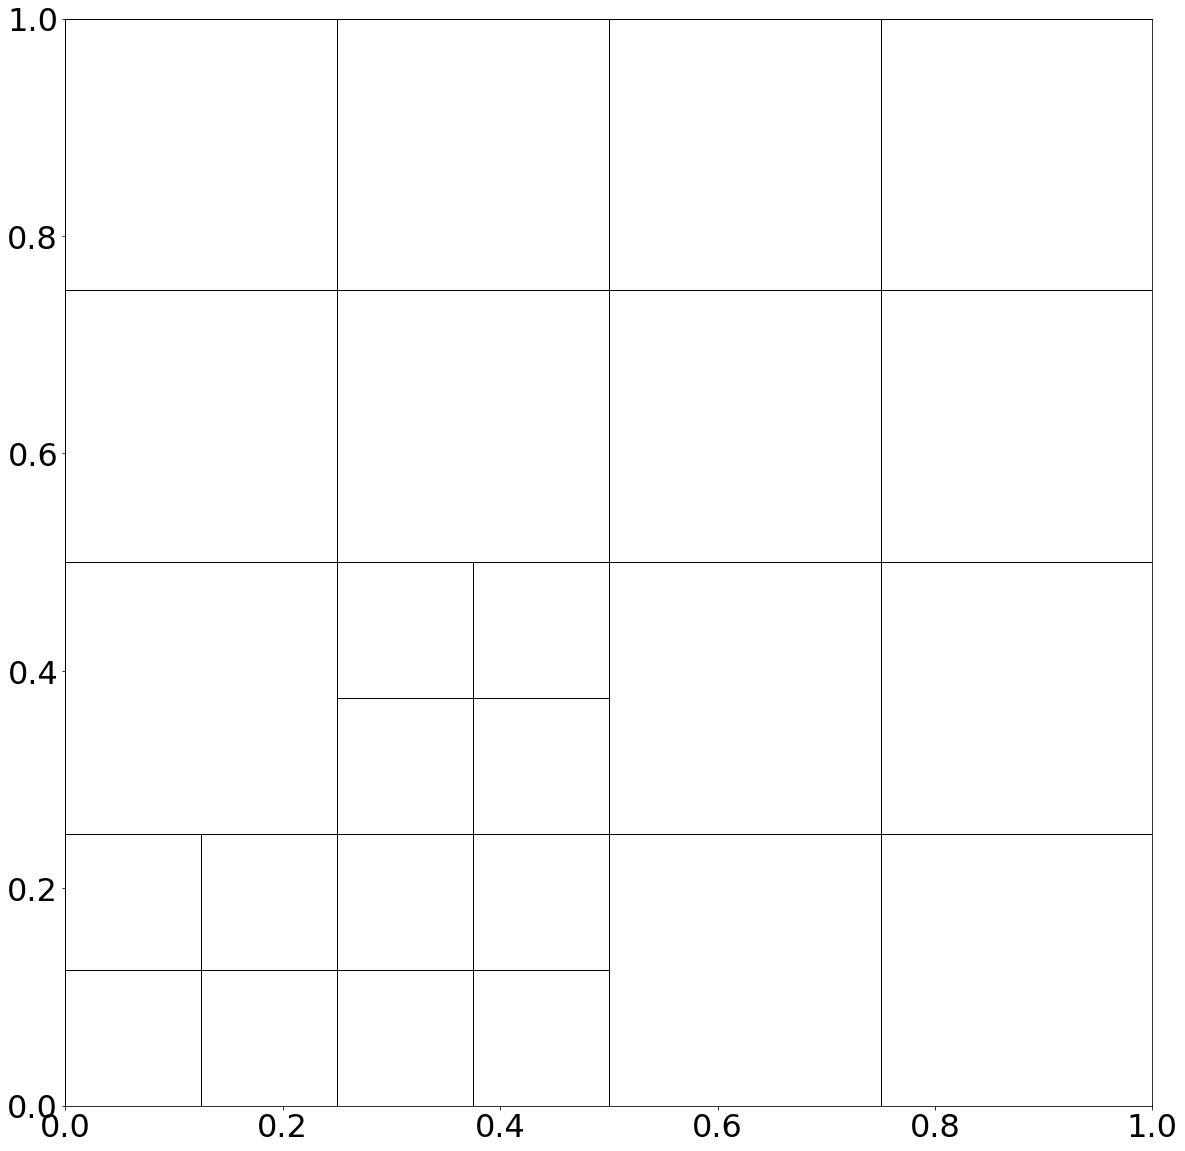

Combi Scheme:


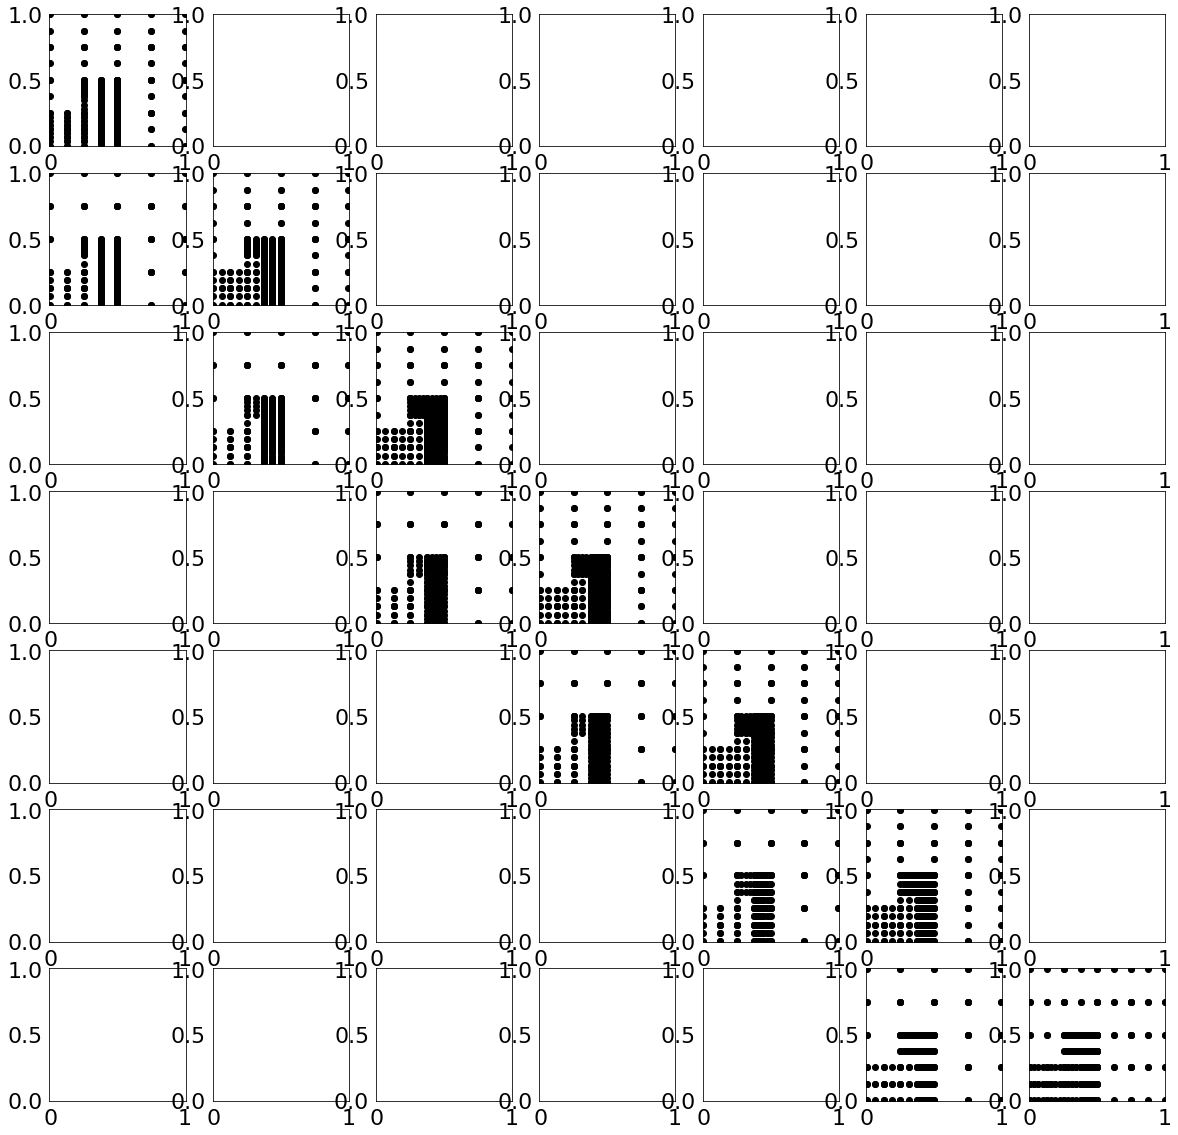

Resulting Sparse Grid:


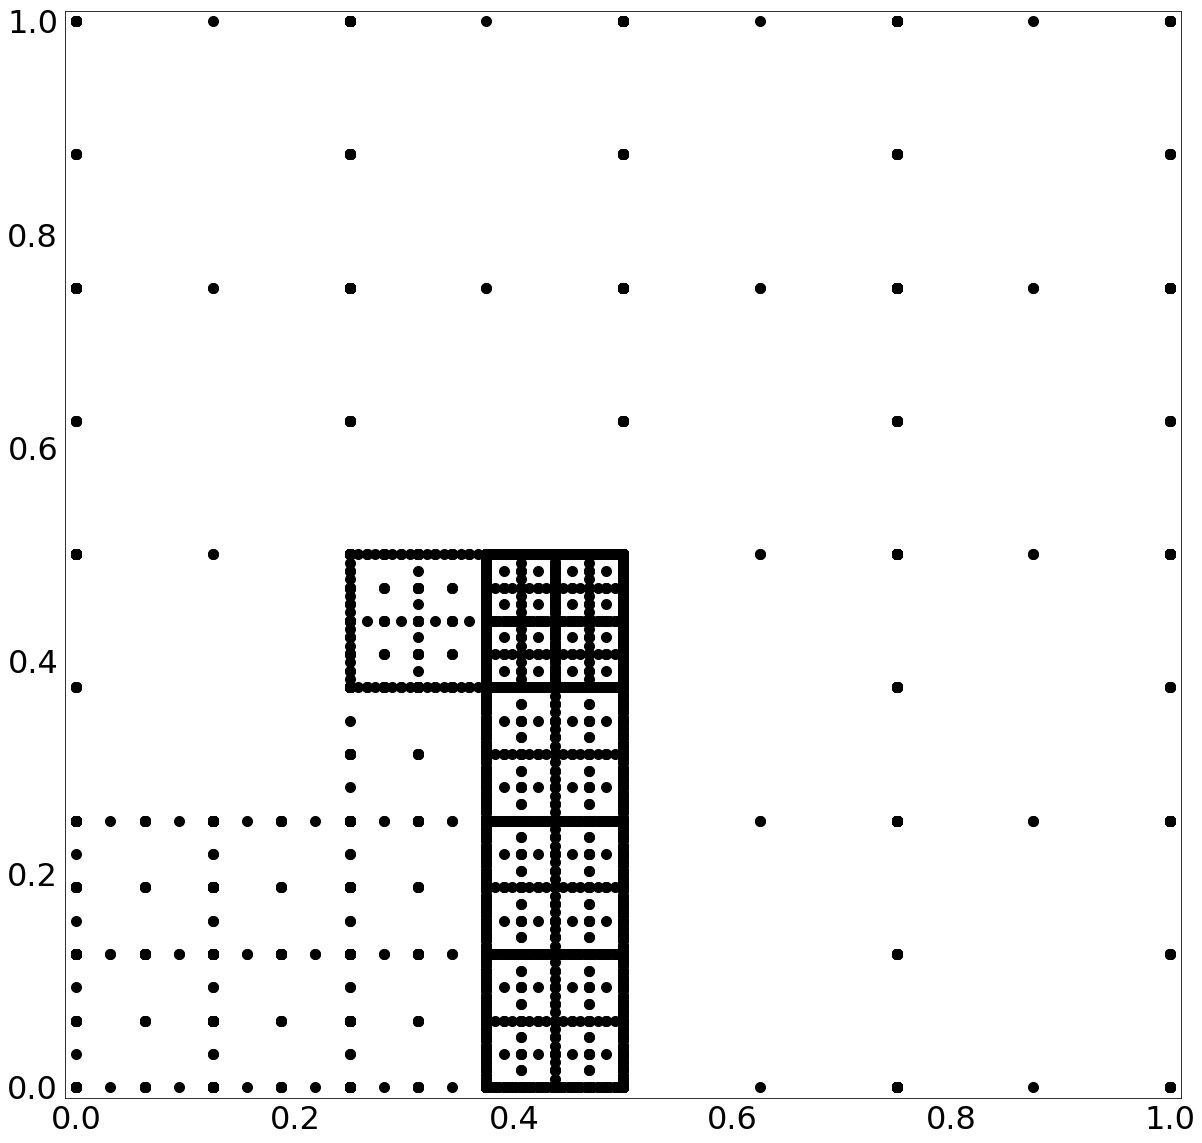

max surplus error: 0.000153500318009 total surplus error: 0.00077663271805
combiintegral: 0.118916966083
Current error: 0.0437685932151
Splitting [ 0.    0.25] [ 0.25  0.5 ]
Finished refinement
Refinement Graph:


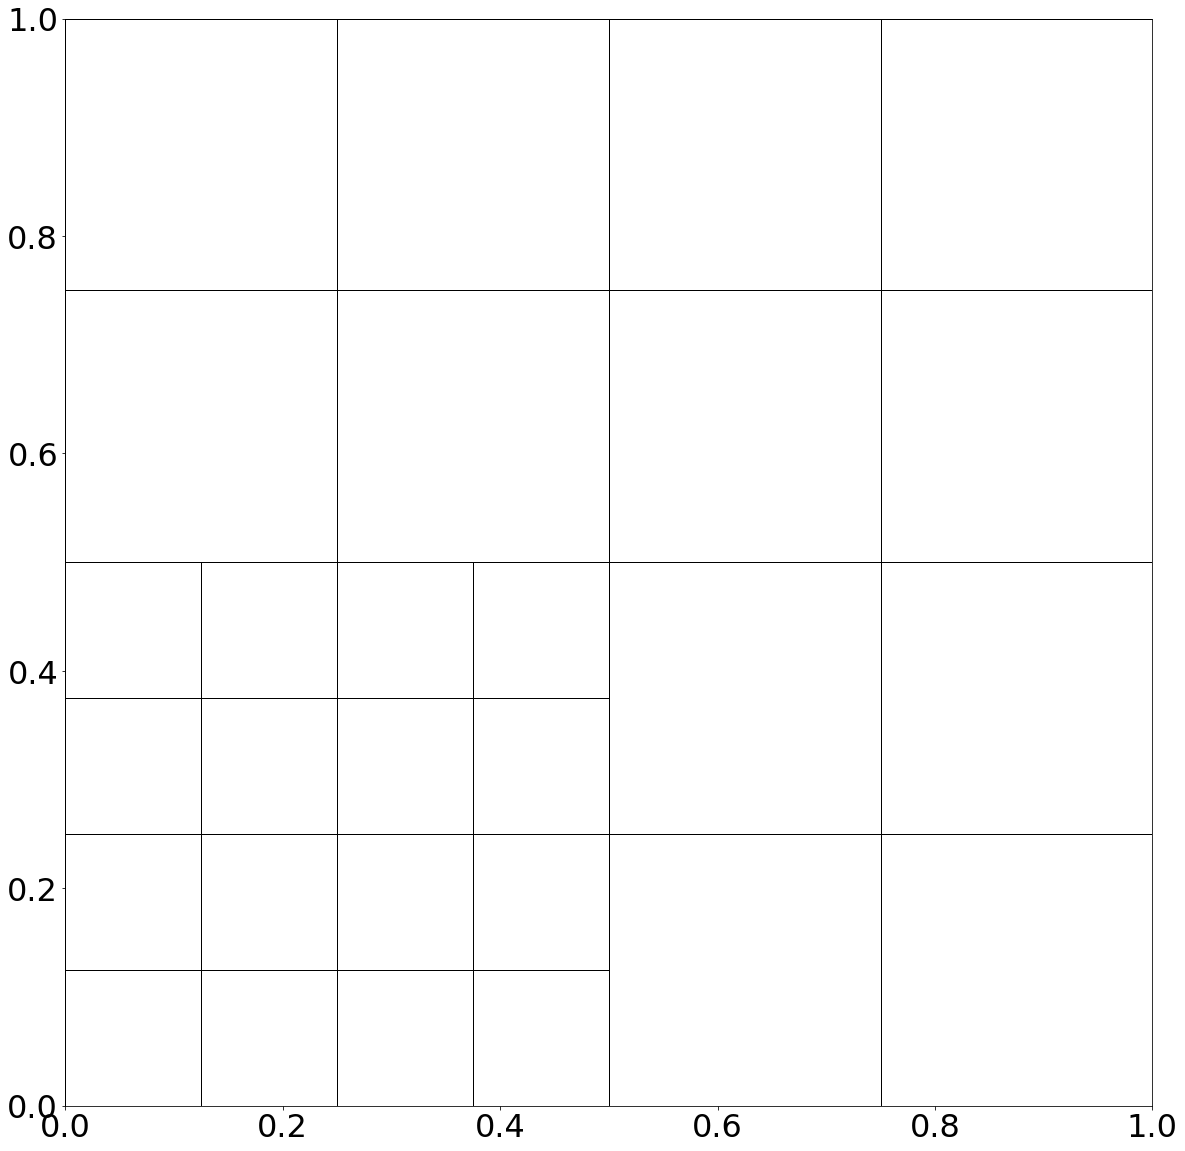

Combi Scheme:


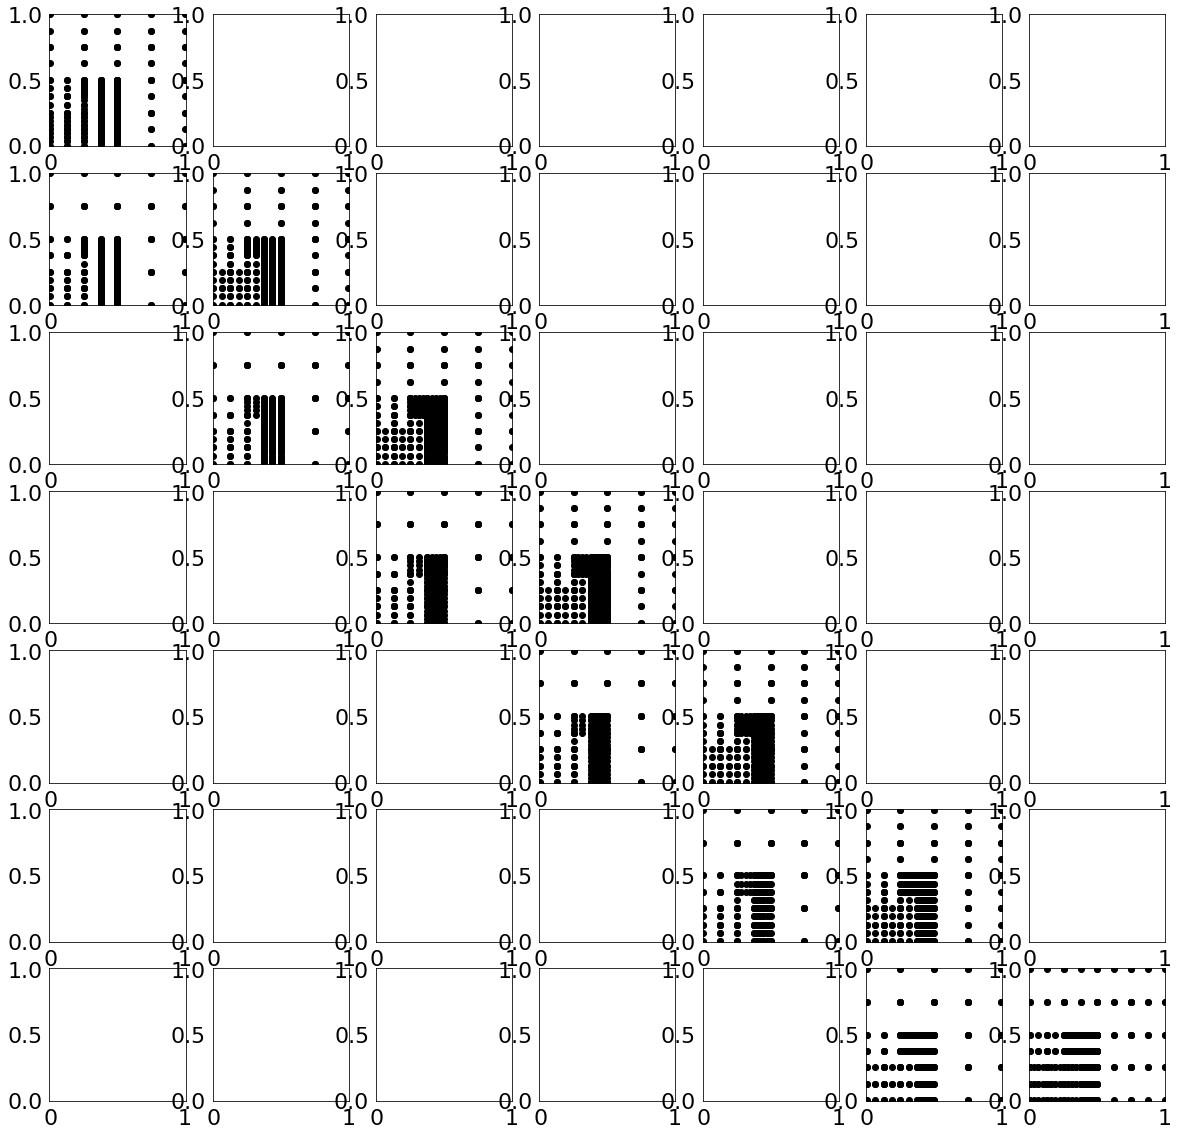

Resulting Sparse Grid:


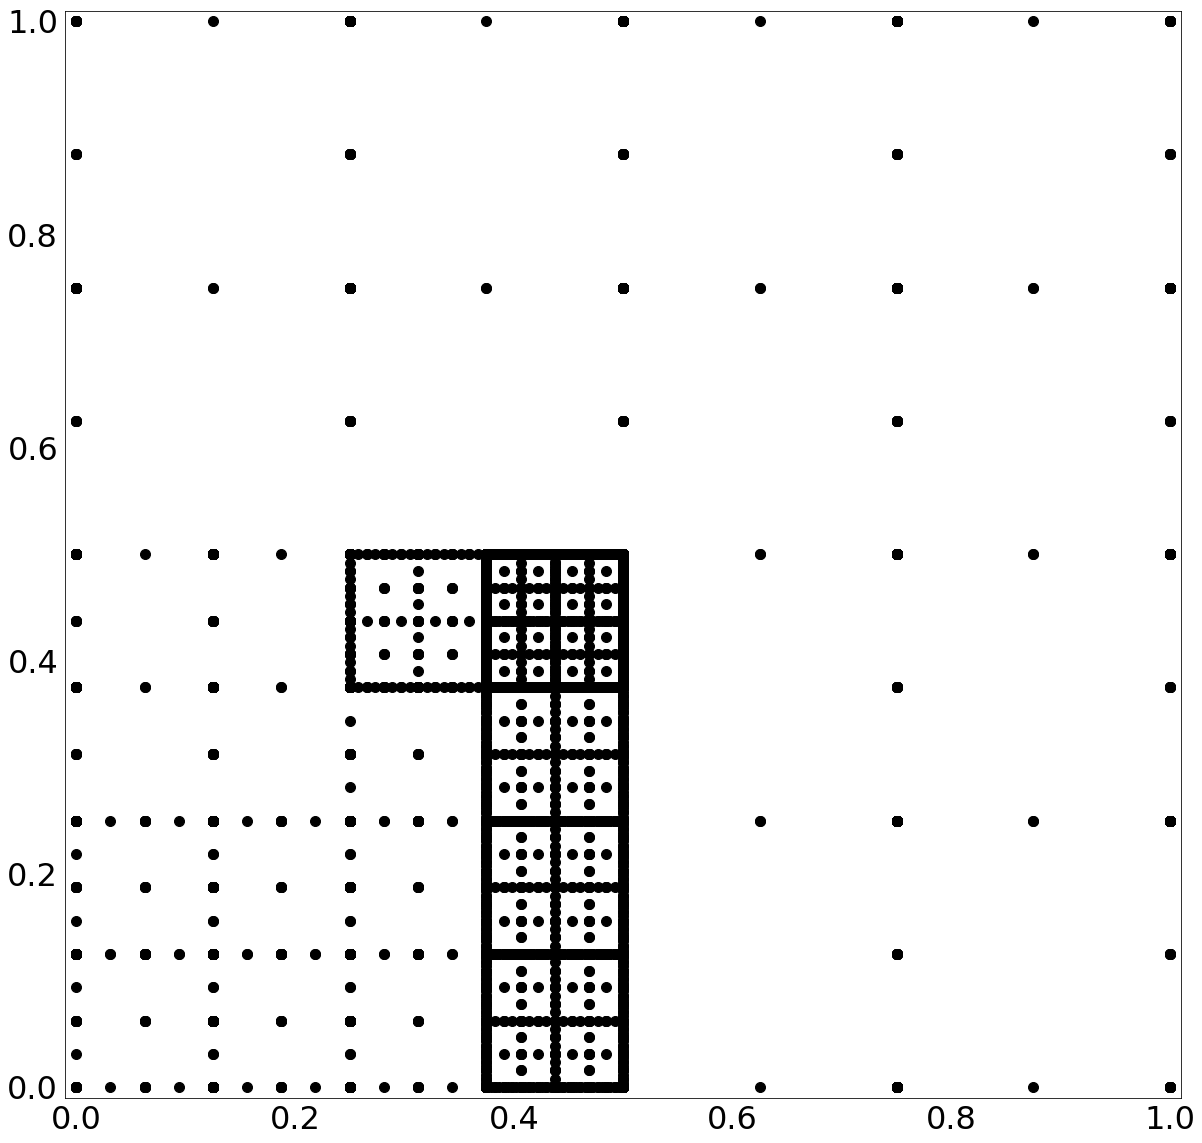

max surplus error: 0.00252207302203 total surplus error: 0.00645202922427
combiintegral: 0.121320952448
Current error: 0.0244377328692
Finished refinement
Refinement Graph:


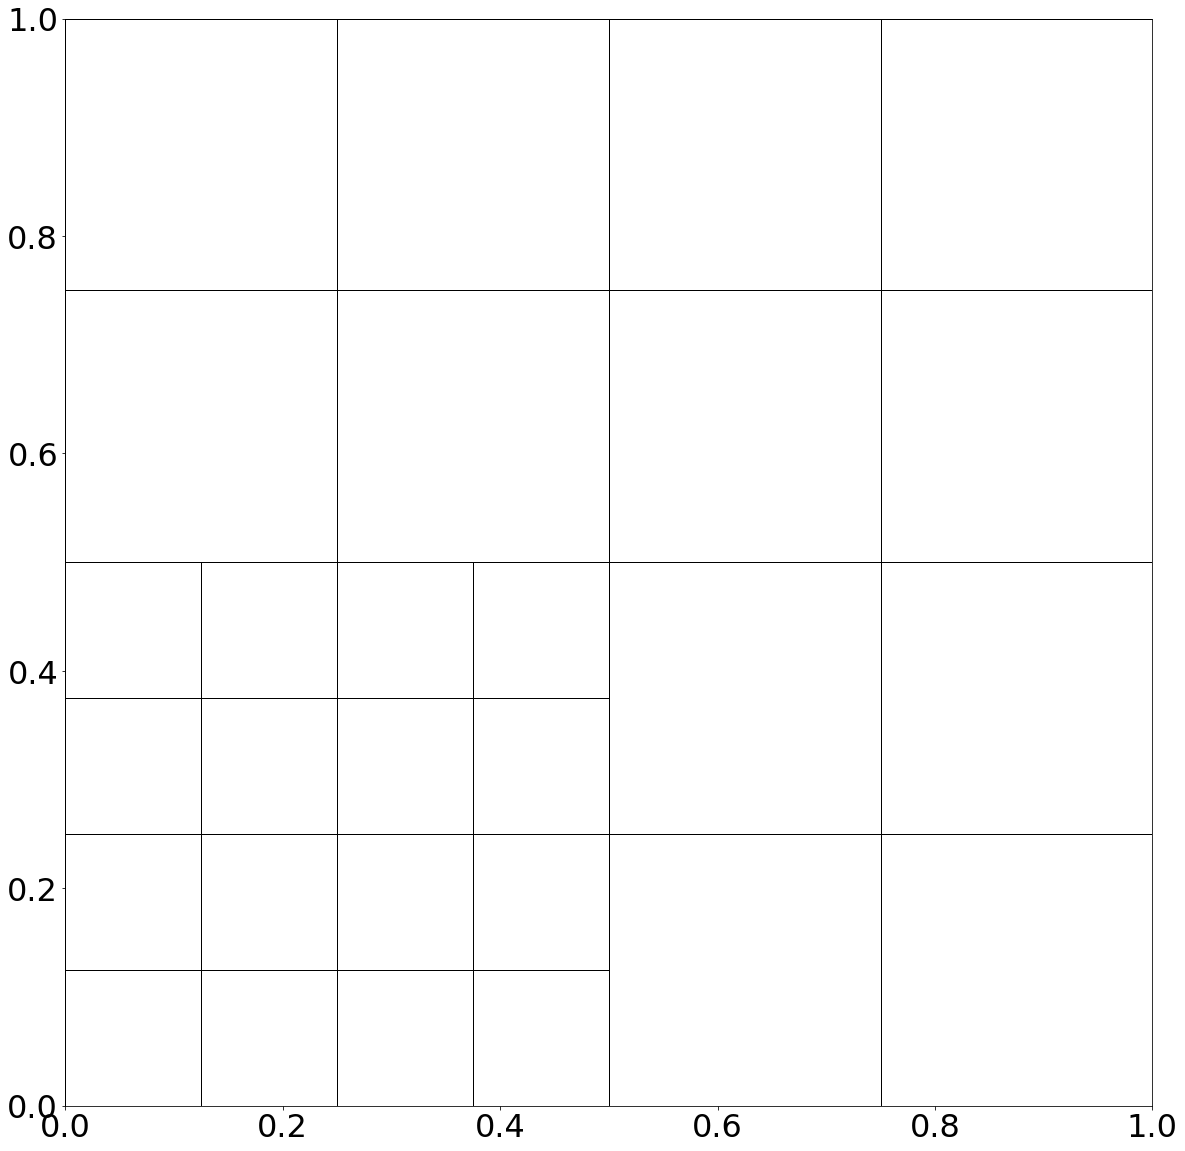

Combi Scheme:


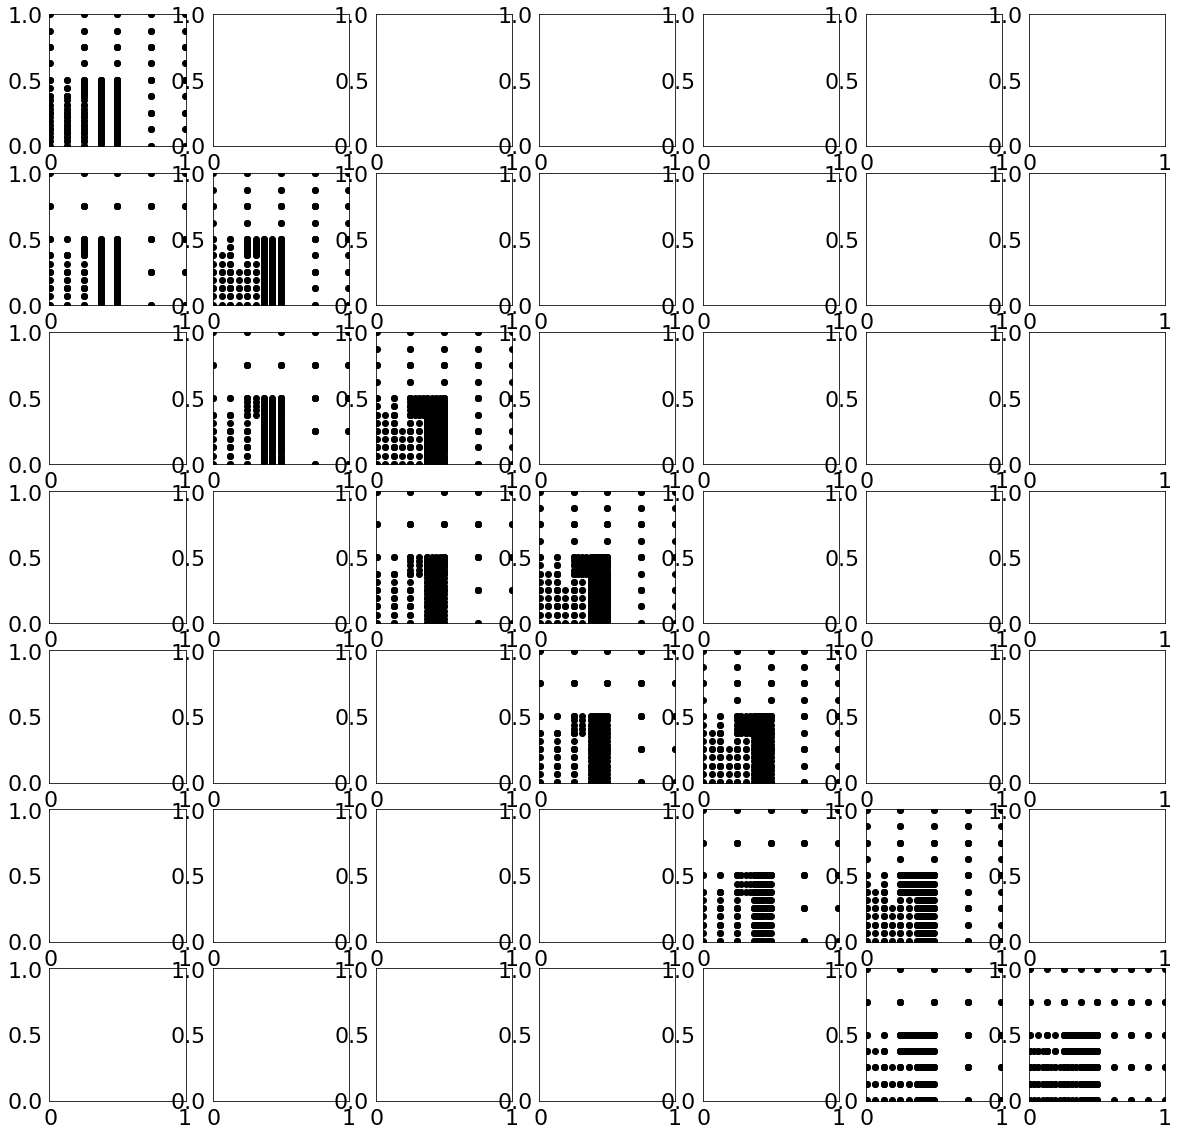

Resulting Sparse Grid:


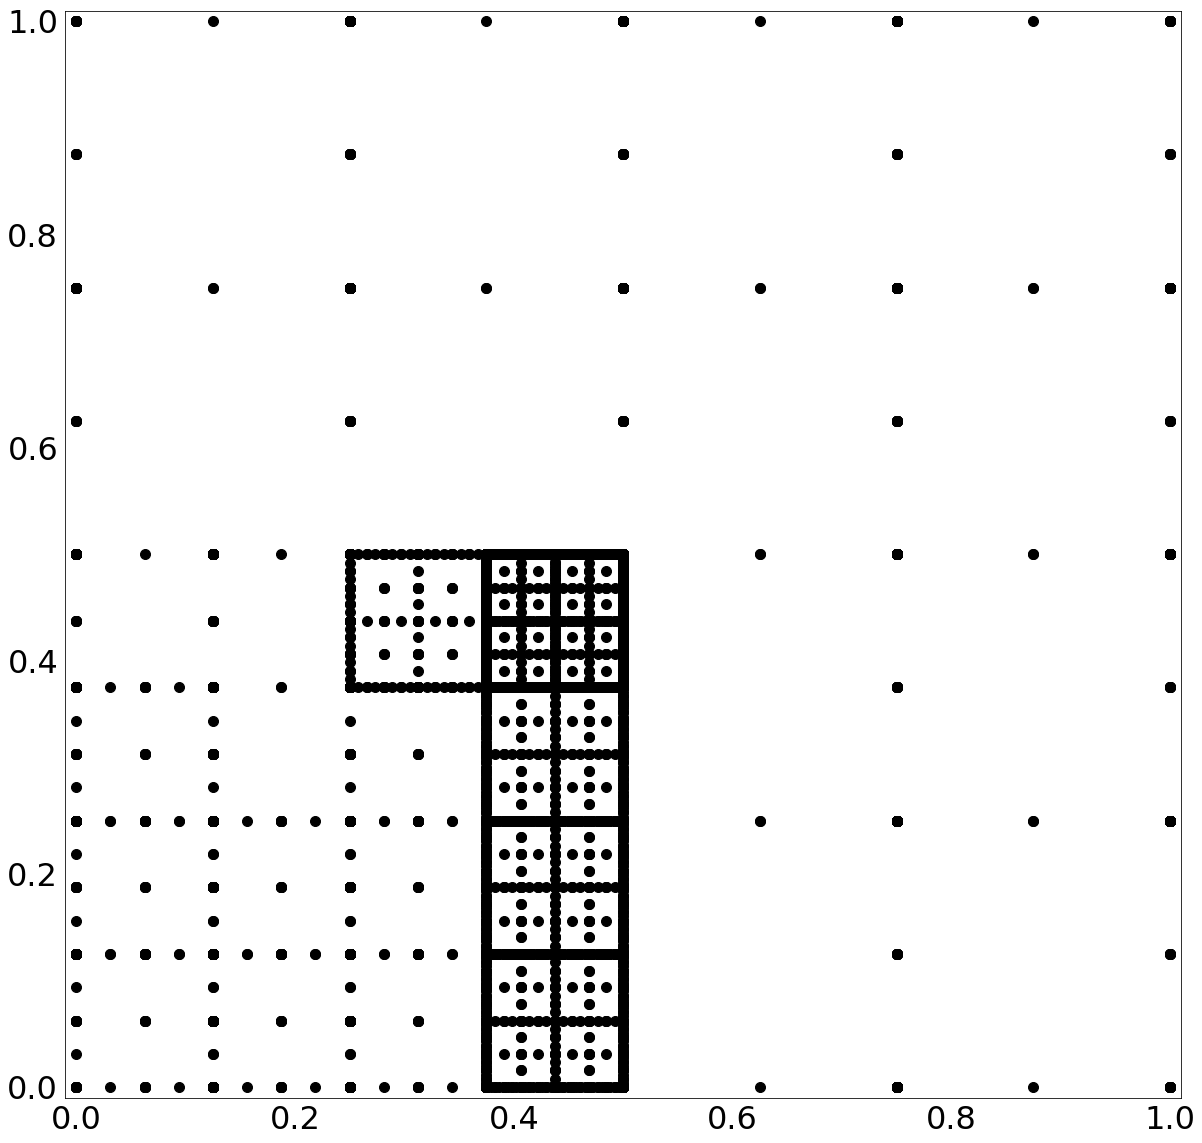

max surplus error: 0.0015943685728 total surplus error: 0.00393956555785
combiintegral: 0.121311343093
Current error: 0.0245150033205
Finished refinement
Refinement Graph:


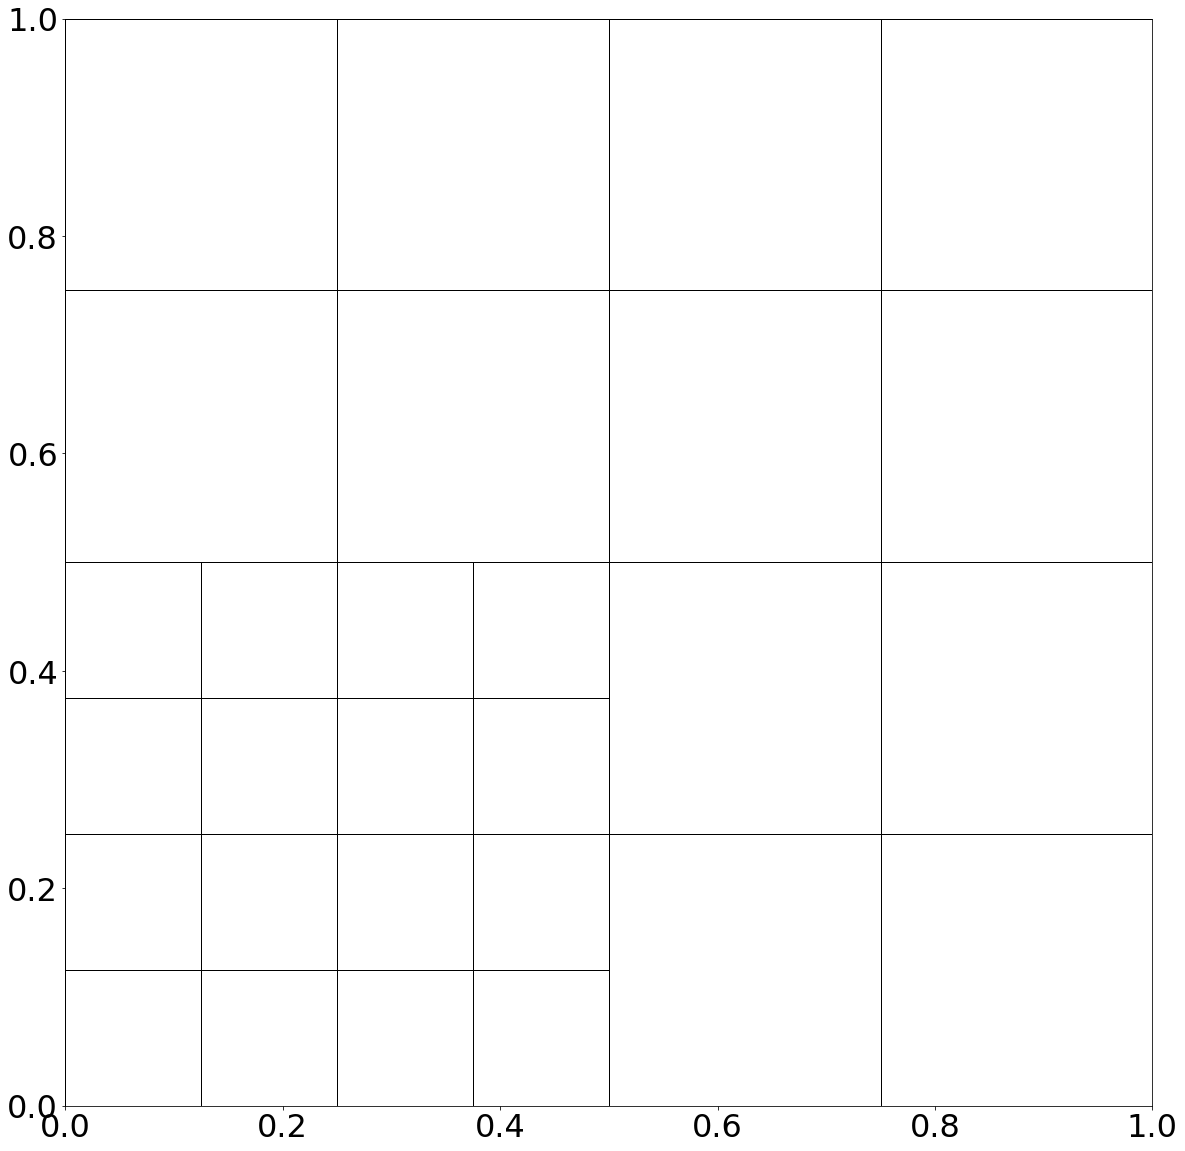

Combi Scheme:


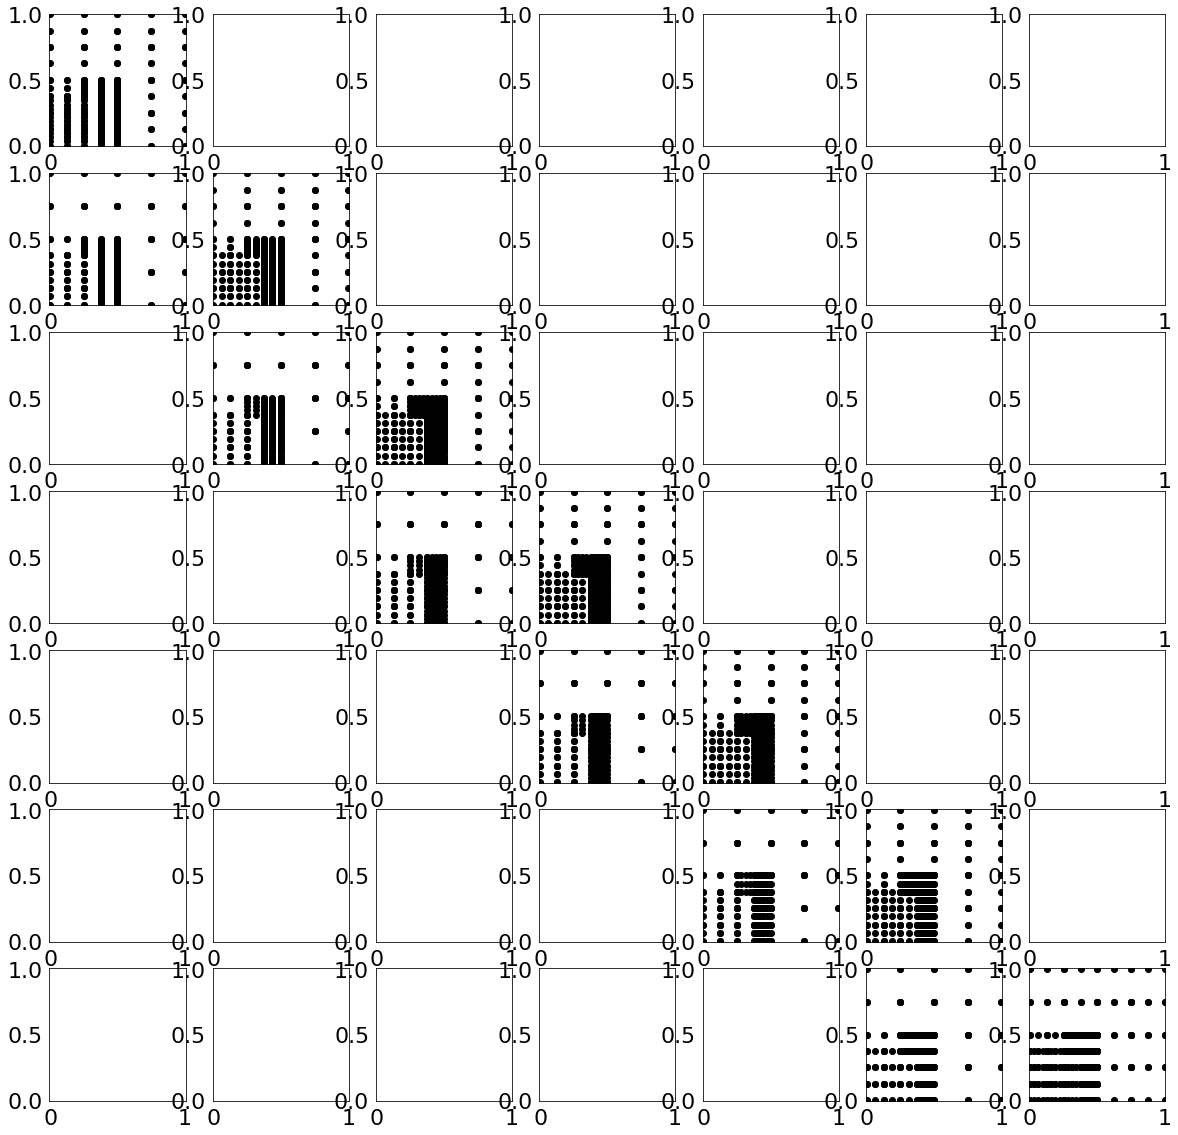

Resulting Sparse Grid:


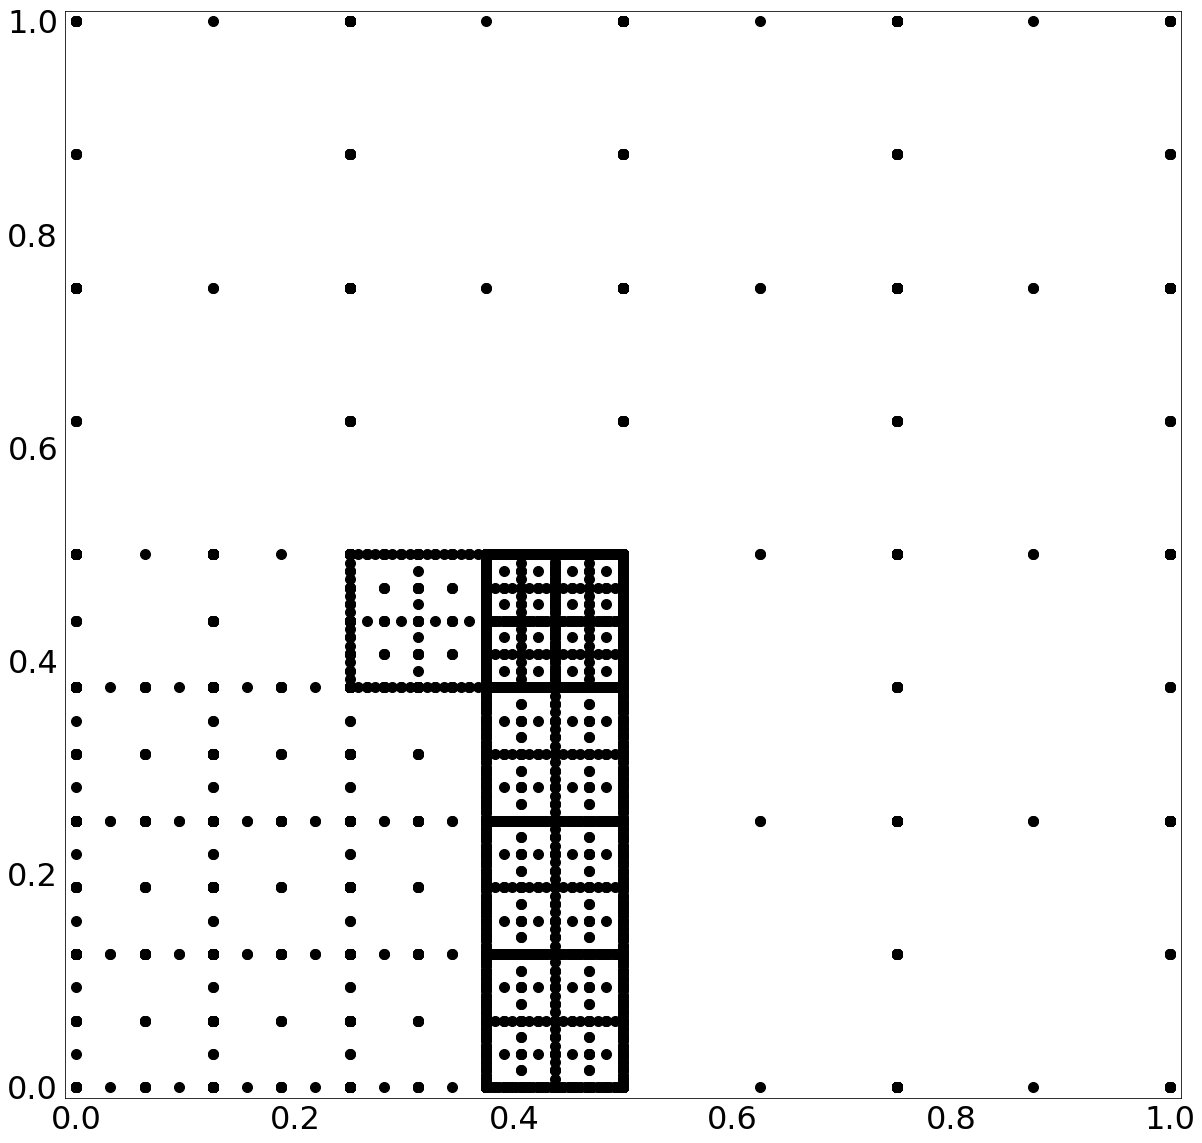

max surplus error: 0.00113816362197 total surplus error: 0.00235367721162
combiintegral: 0.121302862866
Current error: 0.0245831942545
Finished refinement
Refinement Graph:


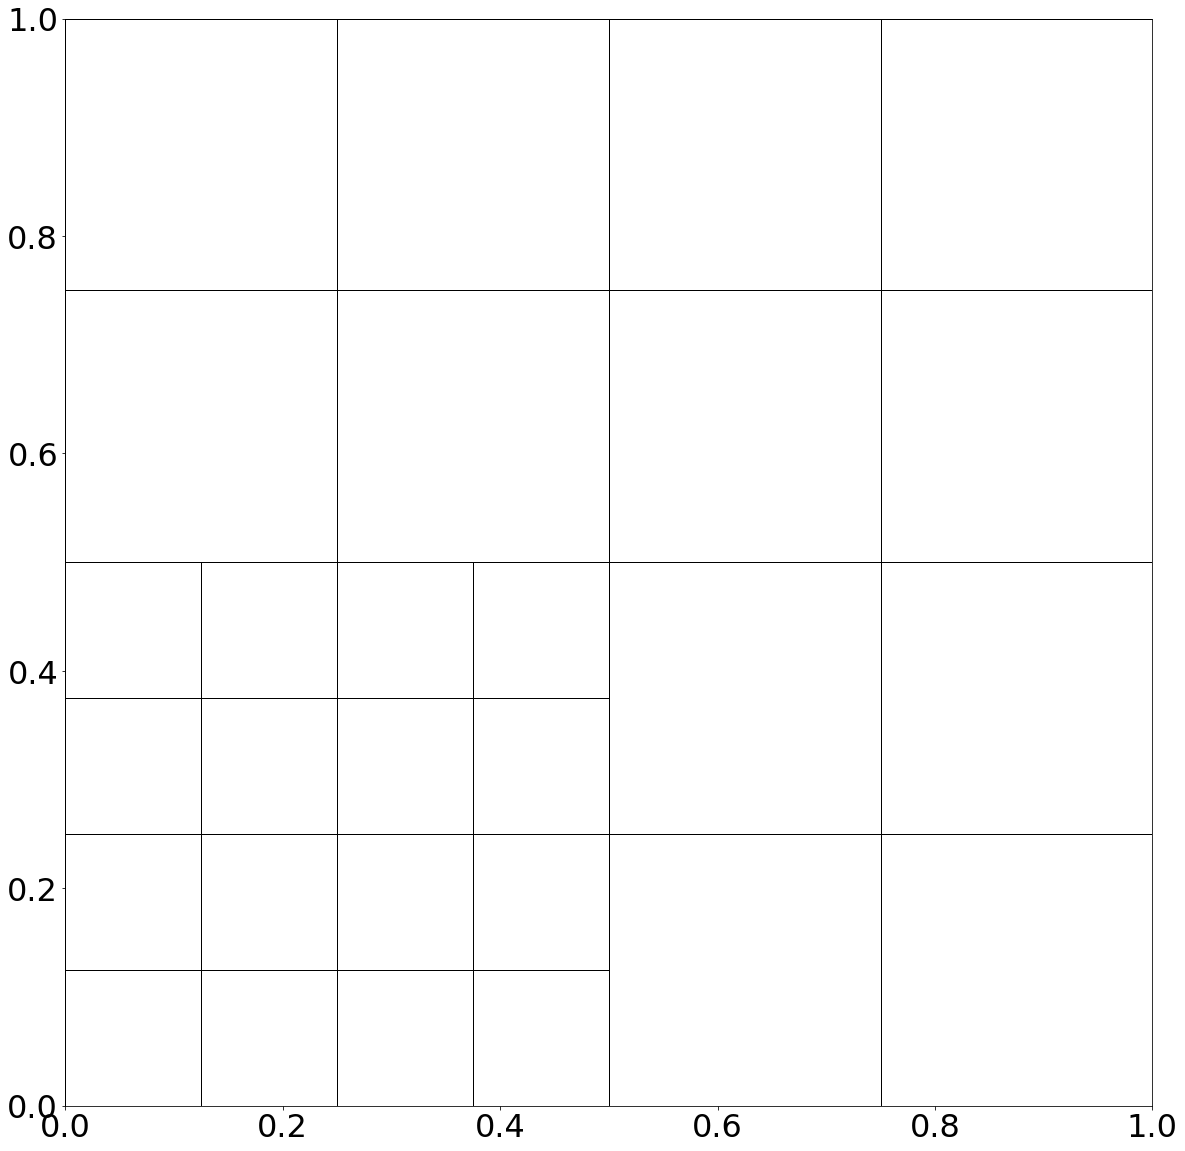

Combi Scheme:


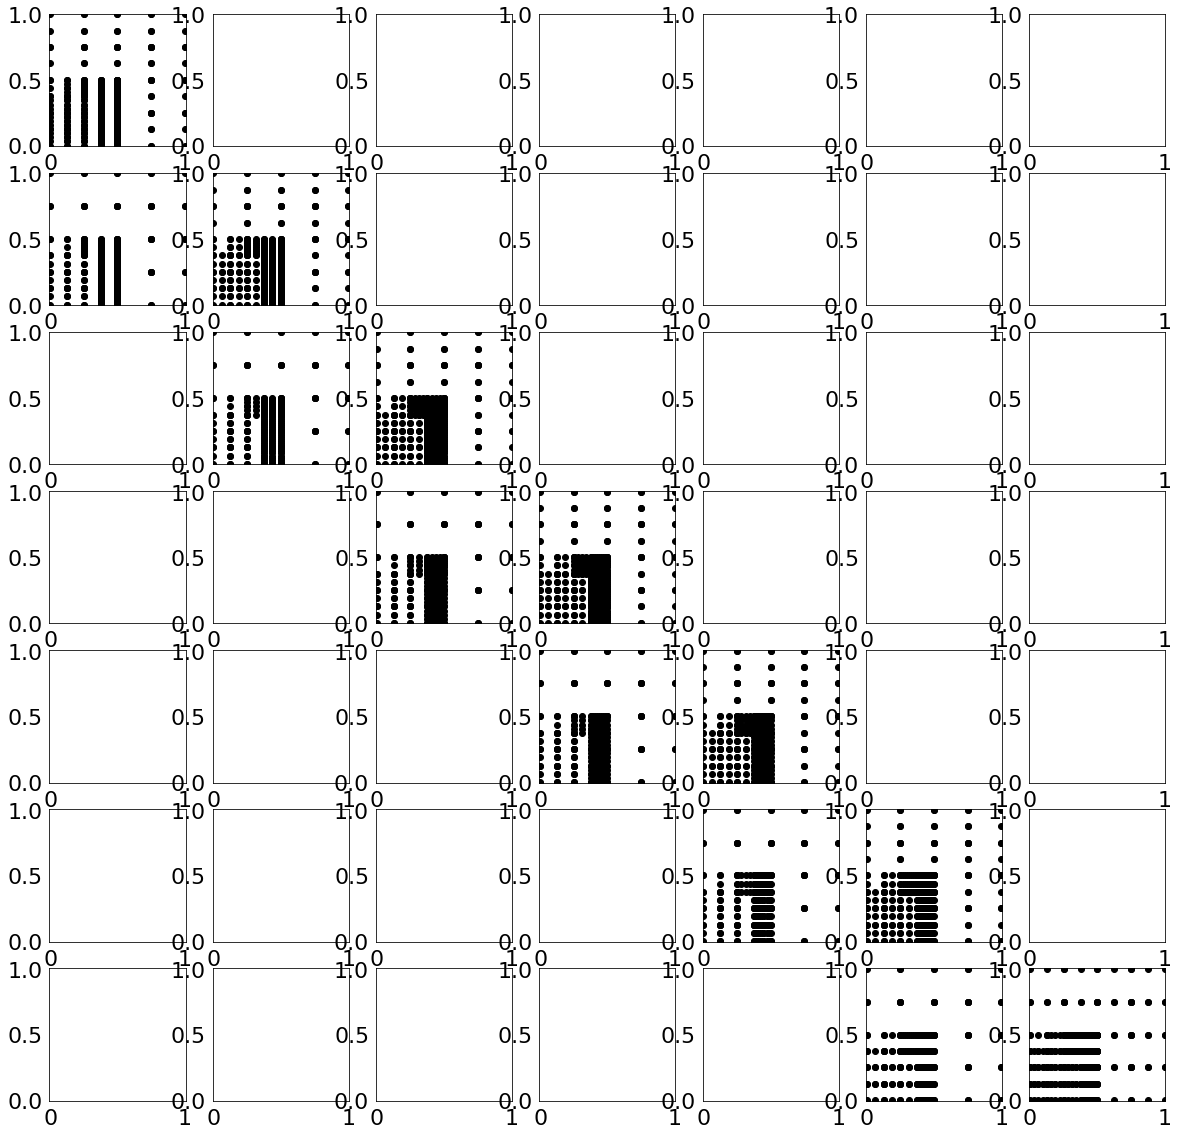

Resulting Sparse Grid:


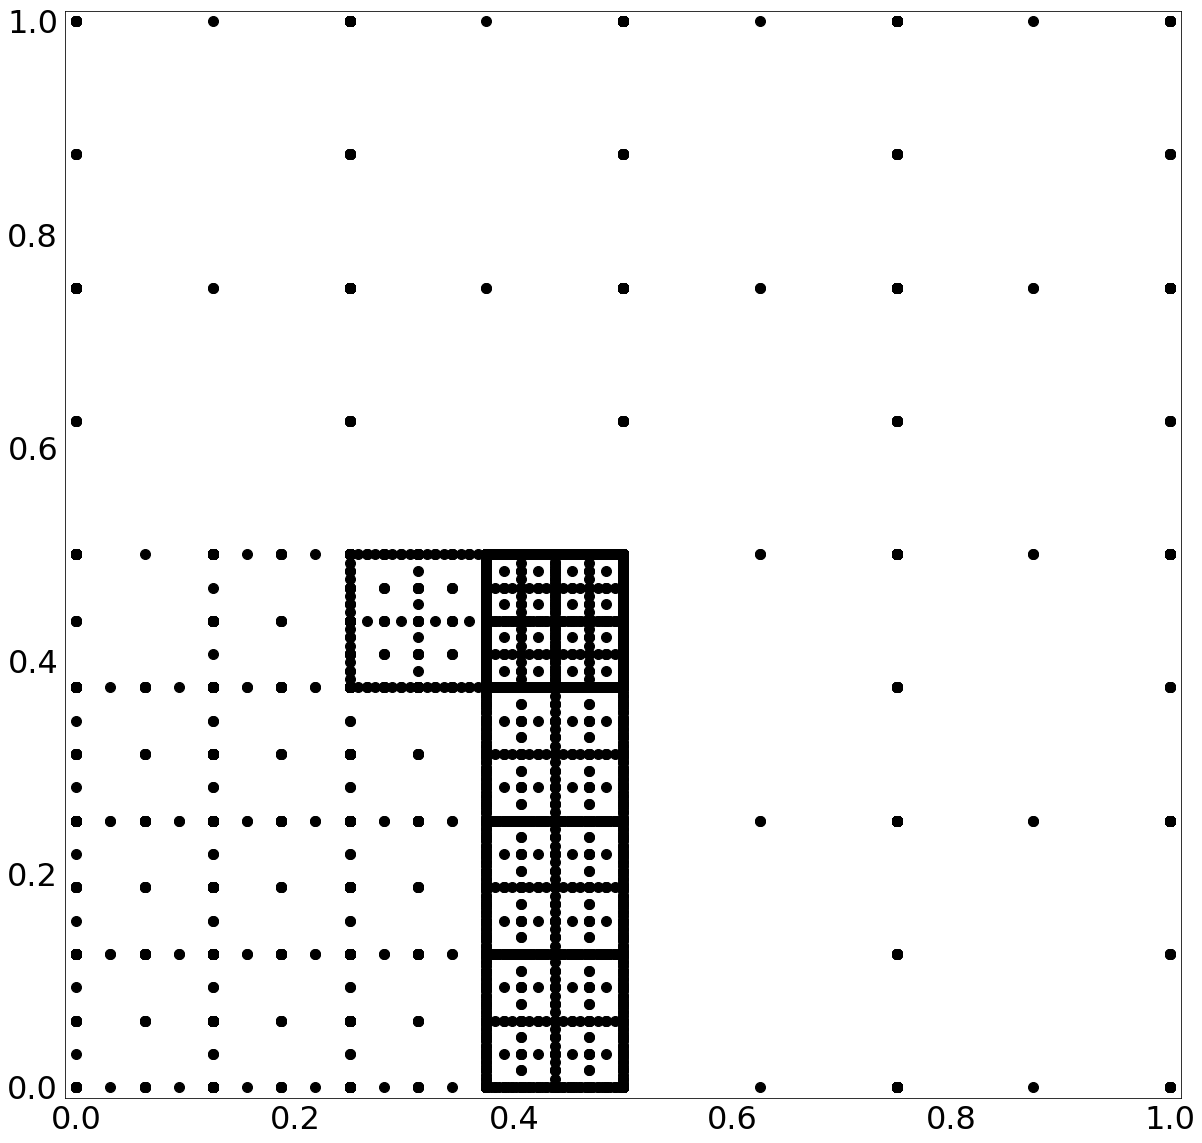

max surplus error: 0.000589647102938 total surplus error: 0.00180516069259
combiintegral: 0.121892509969
Current error: 0.0198417423211
Finished refinement
Refinement Graph:


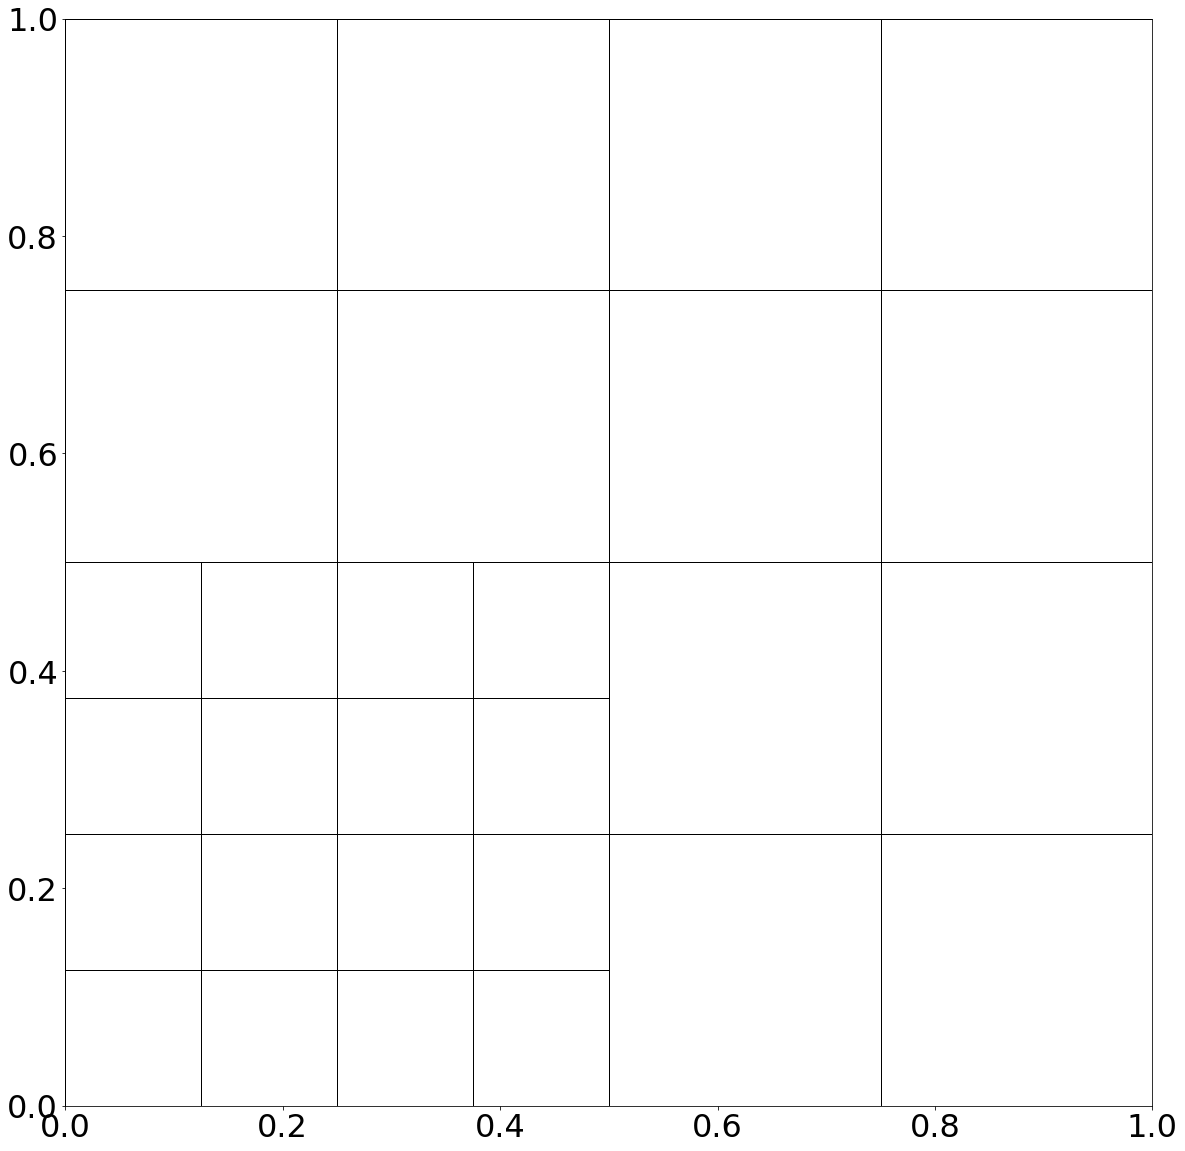

Combi Scheme:


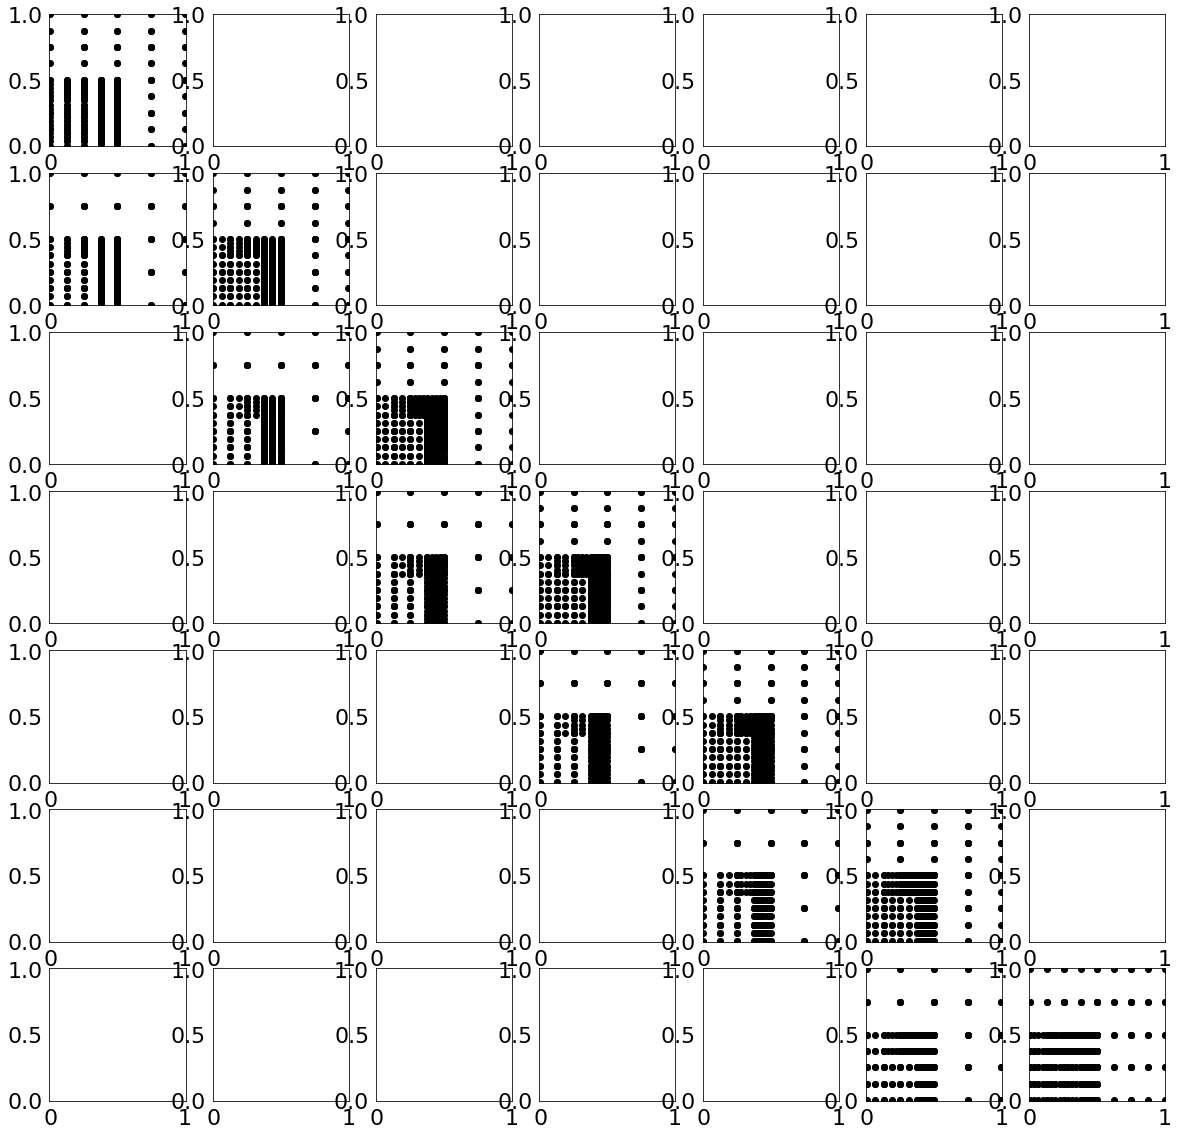

Resulting Sparse Grid:


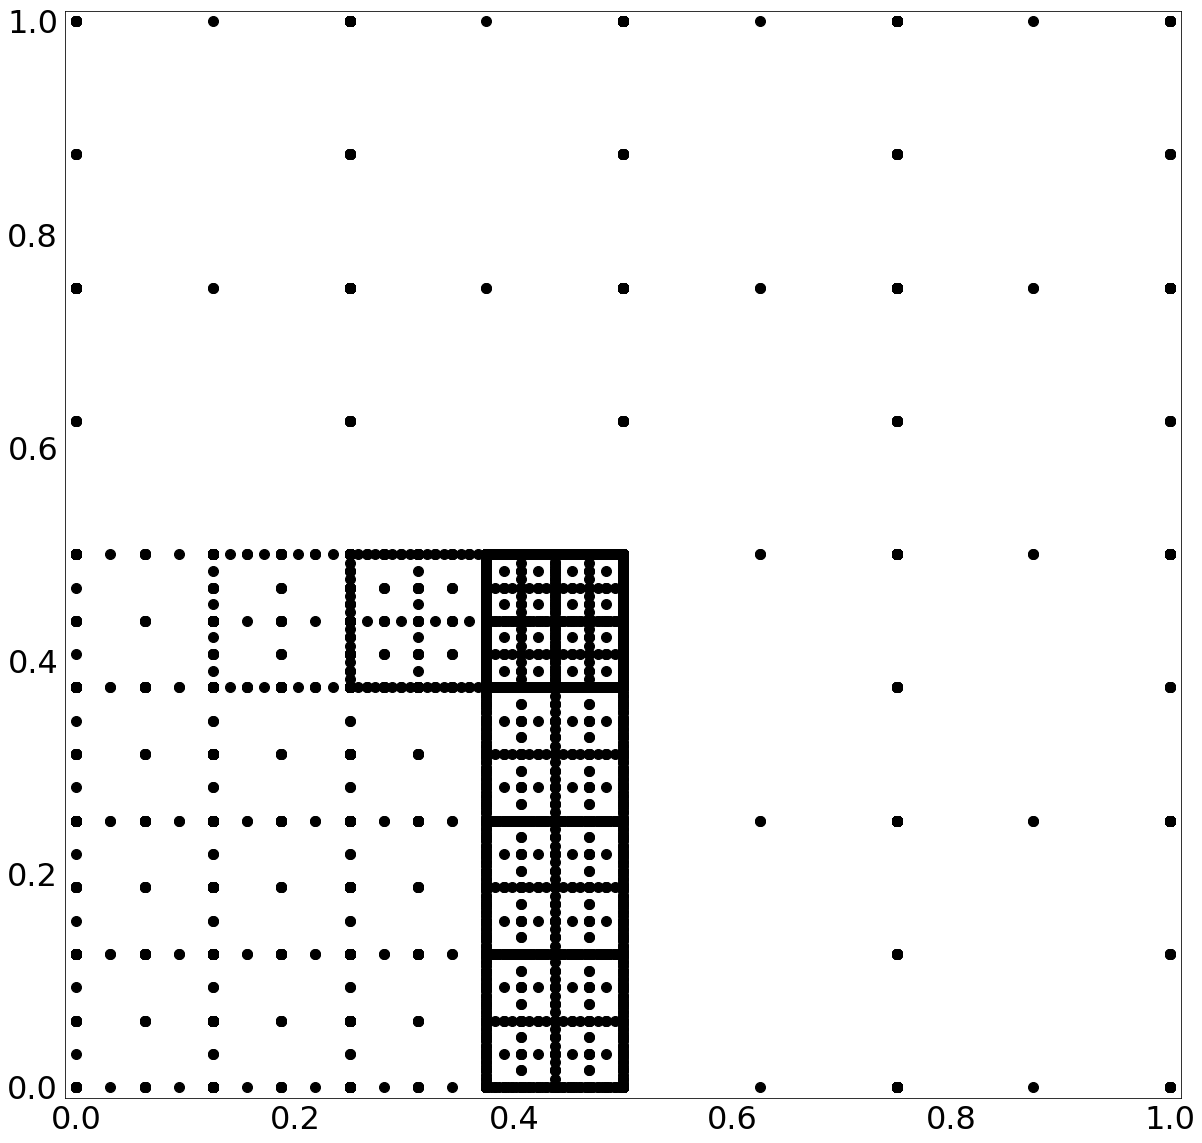

max surplus error: 0.000668157702549 total surplus error: 0.00160542263791
combiintegral: 0.122856710625
Current error: 0.012088442016
Finished refinement
Refinement Graph:


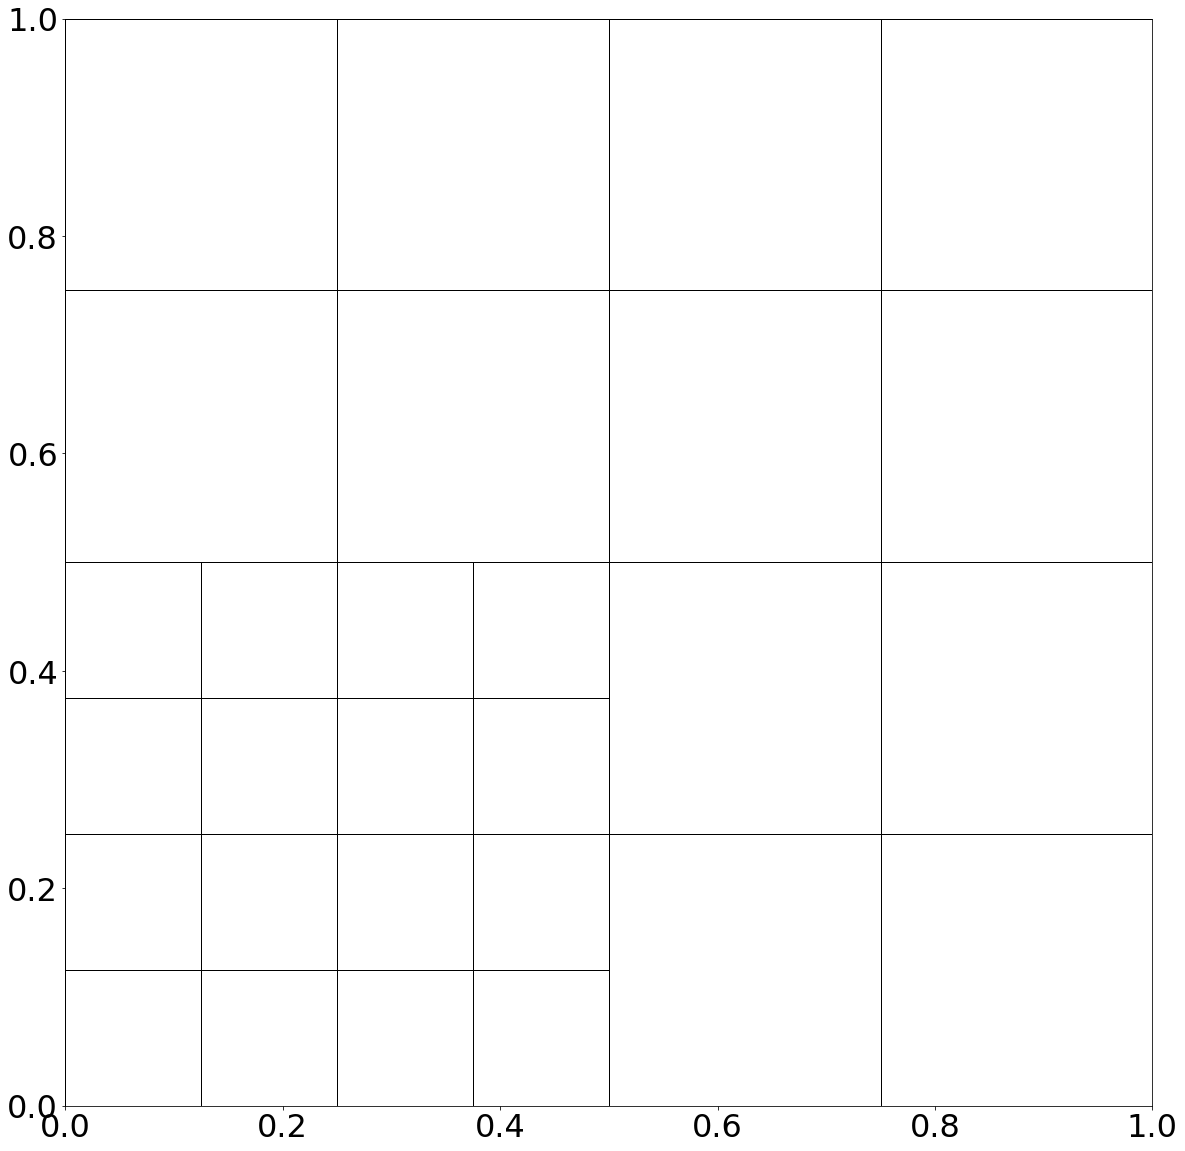

Combi Scheme:


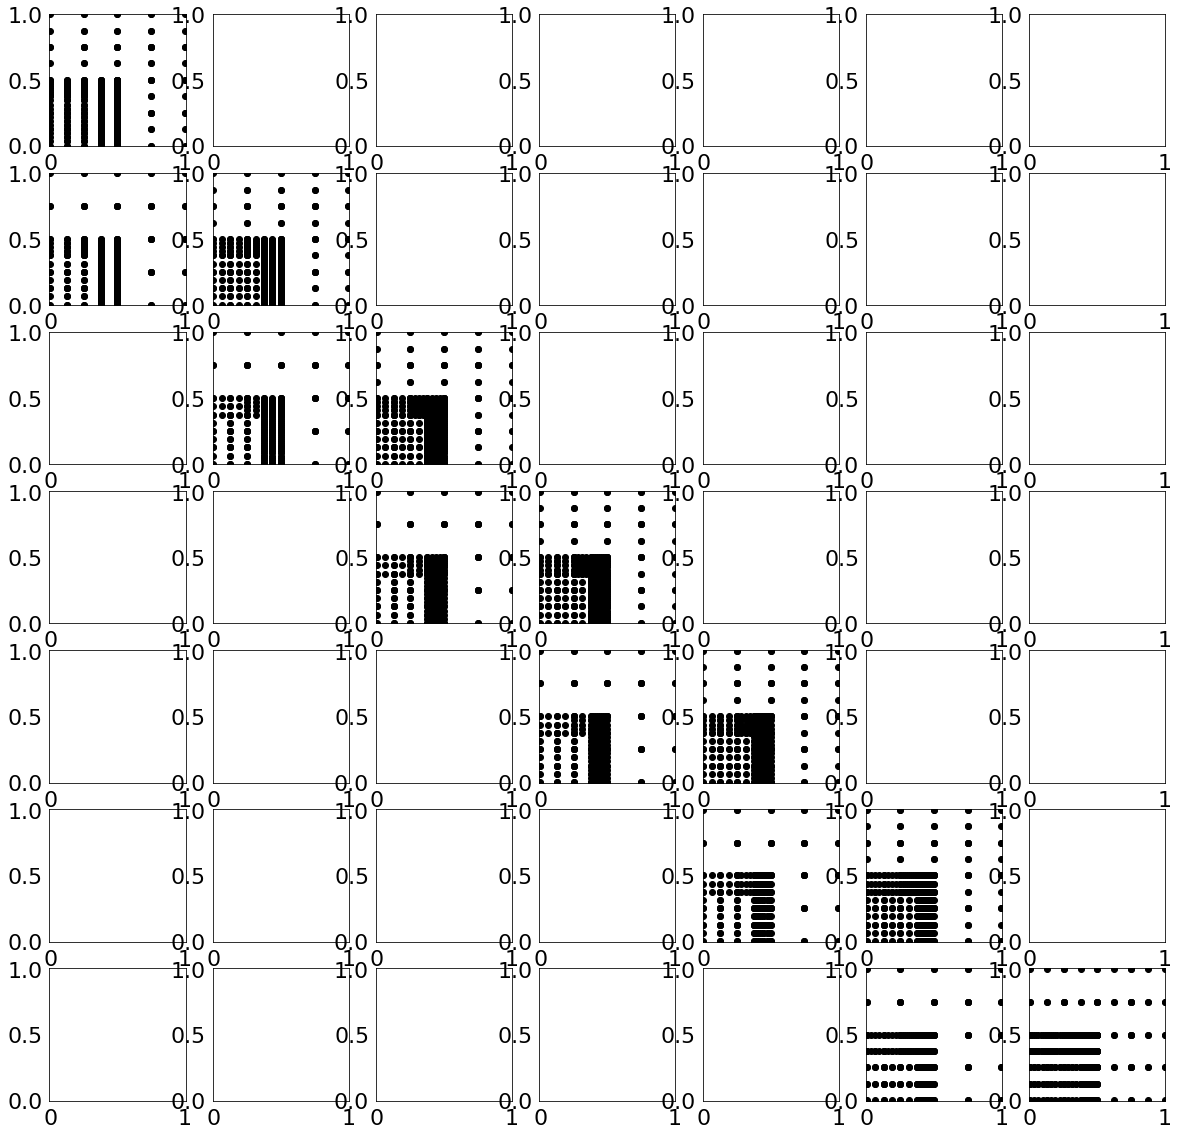

Resulting Sparse Grid:


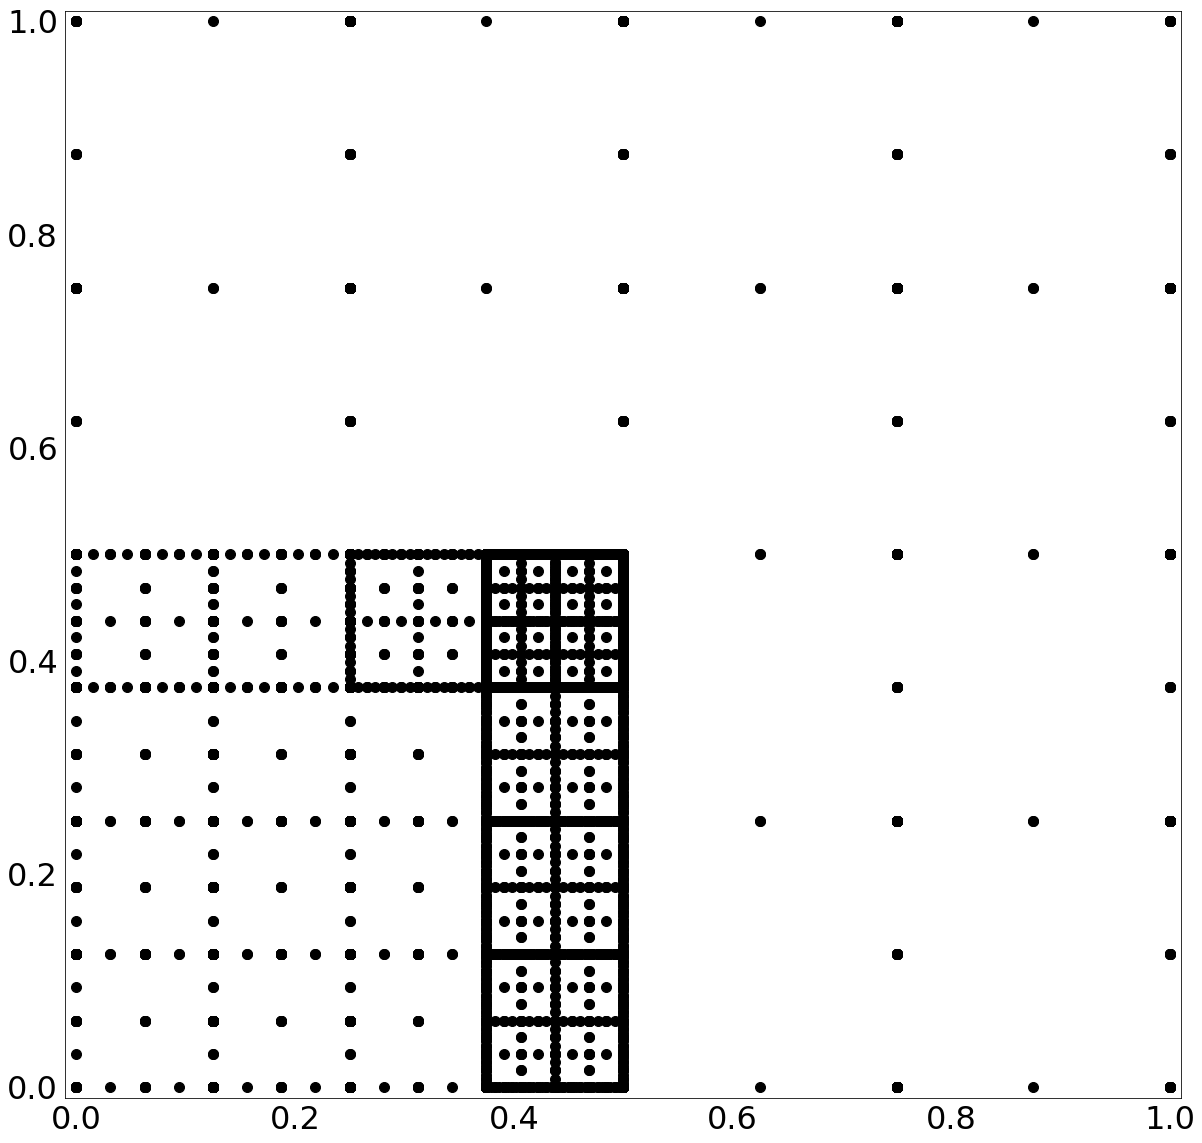

max surplus error: 0.000335460614388 total surplus error: 0.00127272554975
combiintegral: 0.123192171239
Current error: 0.00939094656368
Number of refinements 41


(<RefinementContainer.RefinementContainer at 0x7f4332041630>,
 [(array([1, 7]), 1.0),
  (array([2, 6]), 1.0),
  (array([3, 5]), 1.0),
  (array([4, 4]), 1.0),
  (array([5, 3]), 1.0),
  (array([6, 2]), 1.0),
  (array([7, 1]), 1.0),
  (array([1, 6]), -1.0),
  (array([2, 5]), -1.0),
  (array([3, 4]), -1.0),
  (array([4, 3]), -1.0),
  (array([5, 2]), -1.0),
  (array([6, 1]), -1.0)],
 [7, 7],
 0.12319217123924399,
 351.74225774225761,
 [0.30376974474763407,
  0.30376974474763407,
  0.16145426771529511,
  0.16314336633896231,
  0.13023057631142138,
  0.10210334665632613,
  0.10220256387980955,
  0.10226274216782379,
  0.10247769849695677,
  0.096050539317515657,
  0.090984884427628129,
  0.08190704485326479,
  0.073887179775837433,
  0.071356007505345792,
  0.069367623778027548,
  0.067012819558697326,
  0.065388319357190097,
  0.062726988795996169,
  0.06167442785070839,
  0.060862317218858049,
  0.051070461017880424,
  0.04689726345571462,
  0.04481136390756487,
  0.043768593215106705,
  0.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import path
import numpy as np

#from numpy import *
import scipy as sp
from spatiallyAdaptiveExtendSplit import *
from spatiallyAdaptiveSplit import *
from spatiallyAdaptiveSingleDimension import *
from spatiallyAdaptiveCell import *

from PerformTestCase import *
from Function import *
from ErrorCalculator import *
import math
dim = 2
a = np.zeros(dim)
b = np.ones(dim)
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = GenzDiscontinious(border=midpoint,coeffs=coefficients)
f.plot(np.ones(dim)*a,np.ones(dim)*b)
errorOperator=ErrorCalculatorSurplusCell()
errorOperator2=ErrorCalculatorExtendSplit()

grid=TrapezoidalGrid(a=a, b=b, dim=dim)
adaptiveCombiInstanceSingleDim = SpatiallyAdaptiveSingleDimensions(a, b,grid)
adaptiveCombiInstanceFixed = SpatiallyAdaptiveFixedScheme(a, b,grid)
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b,2,grid,version=0)
adaptiveCombiInstanceCell = SpatiallyAdaptiveCellScheme(a, b,grid)
reference_solution = f.getAnalyticSolutionIntegral(a,b)
adaptiveCombiInstanceExtend.performSpatiallyAdaptiv(1,2,f,errorOperator2,10**-2, do_plot=True, reference_solution=reference_solution)

Now experiment with different functions, different dimensions and different tolerances to get to know the framework.